In [1]:
import pandas as pd
import pickle

In [2]:
clean_data_df = pd.read_pickle('data/clean_data_df.pl')

In [3]:
clean_data_df

,state,subject,date,month,year,month-year,request,response_type
0,Veracruz,Ayuntamiento De Poza Rica De Hidalgo,08/10/2020,10,2020,10-2020,solicito un listado con la descripcion y los m...,Entrega de Información
1,Sinaloa,Pe05500-Secretaría General De Gobierno,20/05/2020,05,2020,05-2020,solicito conocer cuantas actas de defuncion se...,Información disponible vía Infomex
2,Tlaxcala,Secretaría De Salud Y O. P. D. Salud,30/06/2020,06,2020,06-2020,con fundamento en el articulo 8 de la constitu...,I. Entrega de información vía Infomex
3,Federación,Sspc-Guardia Nacional,25/11/2020,11,2020,11-2020,con fundamento en los articulos 1 y 6 de la co...,Entrega de información en medio electrónico
4,Morelos,Tribunal Superior De Justicia,23/09/2020,09,2020,09-2020,adjuntamos a la presente solicitud de acceso a...,No es de mi competencia
...,...,...,...,...,...,...,...,...
58641,Jalisco,Ayuntamiento Constitucional De Puerto Vallarta,20/04/2021,04,2021,04-2021,por medio de la presente peticion me dirijo a ...,Afirmativo
58642,Puebla,Convenciones Y Parques,23/10/2020,10,2020,10-2020,por medio de la presente solicito a su depende...,7. Información Vía INFOMEX
58643,Ciudad De México,Secretaría De Salud,16/04/2021,04,2021,04-2021,solicito el expediente clinico del sr isidoro ...,A. La solicitud corresponde a otro ente
58644,Federación,Secretaría De Hacienda Y Crédito Público (Shcp),26/03/2021,03,2021,03-2021,solicito la informacion de los fondos para la ...,Inexistencia de la información solicitada


In [4]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('spanish')

In [5]:
sw = sw + ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [6]:
all_text = ''
for i, r in enumerate(list(clean_data_df['request'].sample(10000))):
    if i%1000 == 0: print(i)
    all_text =all_text+ ' '.join([x for x in r.split() if x not in sw])

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [7]:
pd.DataFrame(all_text.split(' ')).value_counts()[0:9]

informacion    6850
covid19        5649
fecha          4947
personas       4203
si             3789
2020           3690
solicito       3608
numero         3533
cada           3274
dtype: int64

In [8]:
sw = sw + ['informacion', 'covid19', 'fecha', 'personas', 'solicito', 'si', '2020', 'numero', 'cada', 'conocer', 'adjuntamos', 'presente', 'solicitud']

In [9]:
clean_data_df['clean_request'] =clean_data_df['request'].apply(lambda r: ' '.join([x for x in r.split() if x not in sw]))

In [10]:
clean_data_df['clean_request'].head()

0    listado descripcion montos gastados productos ...
1    cuantas actas defuncion elaborado cuya causa m...
2    fundamento articulo constitucion politica unid...
3    fundamento articulos constitucion politica uni...
4    acceso documento word 21 peticiones referentes...
Name: clean_request, dtype: object

In [11]:
def concat_text(list_reqs):
    return' '.join(list(list_reqs))

In [12]:
%matplotlib inline

In [13]:
import streamlit as st
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pprint import pprint
# number of topics
import gensim.corpora as corpora
import gensim

In [24]:
output_data_base = {}
for state in list(clean_data_df['state'].unique()):
    if state not in output_data_base: output_data_base[state] = {}
    state_data = clean_data_df[clean_data_df['state'] == state]
    for drange in list(state_data['month-year'].unique()):
        print(state, drange)
        state_data_date = state_data[state_data['month-year']==drange]
        output_data_base[state][drange] = {
            'subject_counts': state_data_date['subject'].value_counts(),
            'response_type_counts': state_data_date['response_type'].value_counts(),
            'text': concat_text(state_data_date['clean_request']),
            'lda_model': generate_model(state_data_date['clean_request'])
        }

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(878 unique tokens: ['2019', 'covid', 'descripcion', 'gastados', 'higiene']...) from 111 documents (total 6588 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 111 documents, updating every 22000 documents, evaluating every ~111 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


Veracruz 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #111/111, outstanding queue size 1
topic #5 (0.167): 0.028*"crs" + 0.021*"ligas" + 0.019*"responder" + 0.018*"desagregada" + 0.016*"centro" + 0.013*"personal" + 0.013*"hermelinda" + 0.013*"c" + 0.013*"rotas" + 0.012*"municipio"
topic #0 (0.167): 0.021*"huerta" + 0.019*"c" + 0.018*"hermelinda" + 0.014*"mes" + 0.011*"personal" + 0.010*"contagio" + 0.010*"marzo" + 0.010*"rivera" + 0.010*"ayuntamiento" + 0.009*"septiembre"
topic #3 (0.167): 0.019*"cualquier" + 0.019*"lineamiento" + 0.019*"contenciosos" + 0.019*"manual" + 0.019*"juicios" + 0.019*"expedientes" + 0.019*"escaneo" + 0.019*"normativa" + 0.019*"digitalizacion" + 0.015*"dicho"
topic #4 (0.167): 0.035*"crs" + 0.020*"desagregada" + 0.020*"responder" + 0.018*"ligas" + 0.016*"marzo" + 0.015*"acciones" + 0.014*"estrategias" + 0.013*"medidas" + 0.013*"fines" + 0.013*"mpal"
topic #2 (0.167): 0.013*"municipio" + 0.012*"c" + 0.012*"hermelinda" + 0.009*"huerta" + 0.008*"personal" + 0.0

Veracruz 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #152/152, outstanding queue size 1
topic #0 (0.167): 0.033*"reprogramado" + 0.023*"recurso" + 0.022*"gustaria" + 0.022*"saber" + 0.018*"caso" + 0.017*"monto" + 0.013*"emergencia" + 0.013*"rubro" + 0.012*"originalmente" + 0.012*"afirmativo"
topic #3 (0.167): 0.014*"contingencia" + 0.011*"comision" + 0.011*"municipio" + 0.011*"medidas" + 0.010*"tomado" + 0.010*"cero" + 0.010*"seguridad" + 0.009*"debido" + 0.009*"19" + 0.009*"acciones"
topic #4 (0.167): 0.013*"asi" + 0.009*"informe" + 0.009*"persona" + 0.009*"situacion" + 0.009*"veracruz" + 0.007*"cuantas" + 0.007*"cuantos" + 0.007*"parte" + 0.007*"mayo" + 0.007*"forma"
topic #2 (0.167): 0.037*"naldy" + 0.037*"derivado" + 0.036*"falta" + 0.036*"organo" + 0.036*"niegue" + 0.036*"llegada" + 0.036*"documentos" + 0.036*"actuado" + 0.036*"comisionados" + 0.036*"comisionada"
topic #5 (0.167): 0.031*"reprogramado" + 0.021*"saber" + 0.020*"recurso" + 0.020*"gustaria" + 0.015*"covid" + 0.013*

Veracruz 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #92/92, outstanding queue size 1
topic #2 (0.167): 0.015*"estan" + 0.015*"saber" + 0.013*"acciones" + 0.013*"personal" + 0.012*"caso" + 0.012*"quisiera" + 0.011*"implementando" + 0.011*"junto" + 0.011*"implementado" + 0.011*"visto"
topic #0 (0.167): 0.010*"asi" + 0.009*"caso" + 0.009*"dicho" + 0.008*"parte" + 0.006*"persona" + 0.006*"covid" + 0.006*"c" + 0.005*"pruebas" + 0.005*"tipo" + 0.005*"respecto"
topic #3 (0.167): 0.032*"discapacidad" + 0.020*"traves" + 0.012*"instituciones" + 0.011*"inclusion" + 0.010*"ley" + 0.010*"auditiva" + 0.010*"sistema" + 0.009*"lengua" + 0.009*"senas" + 0.009*"saber"
topic #1 (0.167): 0.016*"seguridad" + 0.012*"saber" + 0.010*"policia" + 0.010*"publica" + 0.010*"municipal" + 0.010*"gustaria" + 0.008*"parte" + 0.008*"tambien" + 0.008*"secretaria" + 0.007*"dicho"
topic #4 (0.167): 0.075*"discapacidad" + 0.026*"traves" + 0.024*"lengua" + 0.023*"instituciones" + 0.019*"braille" + 0.019*"senas" + 0.018*

Veracruz 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #63/63, outstanding queue size 1
topic #4 (0.167): 0.034*"pandemia" + 0.014*"coronavirus" + 0.014*"cuantos" + 0.013*"requiero" + 0.012*"poder" + 0.012*"comisionados" + 0.012*"servidores" + 0.011*"febrero" + 0.011*"pruebas" + 0.010*"confianza"
topic #5 (0.167): 0.022*"cordoba" + 0.017*"personal" + 0.016*"estan" + 0.015*"medidas" + 0.014*"covid" + 0.012*"veracruz" + 0.012*"salud" + 0.011*"asi" + 0.011*"prevencion" + 0.010*"servidores"
topic #2 (0.167): 0.035*"sistema" + 0.025*"covid" + 0.023*"requiero" + 0.019*"solicitudes" + 0.017*"tambien" + 0.016*"naldy" + 0.014*"pandemia" + 0.013*"septiembre" + 0.012*"rodriguez" + 0.012*"personal"
topic #0 (0.167): 0.038*"covid" + 0.029*"tabulador" + 0.028*"19" + 0.020*"prueba" + 0.020*"social" + 0.019*"solicitar" + 0.019*"registrado" + 0.019*"seguridad" + 0.019*"resultados" + 0.019*"deseo"
topic #3 (0.167): 0.027*"defuncion" + 0.024*"llamado" + 0.024*"informe" + 0.024*"sarscov2" + 0.024*"covid1

Veracruz 08-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 89 documents, updating every 22000 documents, evaluating every ~89 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #89/89, outstanding queue size 1
topic #3 (0.167): 0.010*"caso" + 0.010*"requiero" + 0.009*"sido" + 0.008*"informe" + 0.008*"cuantos" + 0.007*"medio" + 0.007*"agosto" + 0.006*"angel" + 0.006*"creacion" + 0.006*"zoologico"
topic #2 (0.167): 0.014*"personal" + 0.010*"acciones" + 0.010*"covid" + 0.008*"caso" + 0.008*"municipio" + 0.007*"informe" + 0.007*"pandemia" + 0.007*"requiero" + 0.006*"indique" + 0.006*"dicha"
topic #4 (0.167): 0.019*"informe" + 0.017*"poder" + 0.017*"judicial" + 0.016*"veracruz" + 0.013*"linea" + 0.013*"justicia" + 0.012*"sistema" + 0.011*"pandemia" + 0.011*"personal" + 0.009*"caso"
topic #5 (0.167): 0.034*"personal" + 0.018*"enfermos" + 0.017*"fallecidas" + 0.015*"area" + 0.013*"pandemia" + 0.012*"dentro" + 0.012*"saber" + 0.011*"caso" + 0.010*"medidas" + 0.009*"alguien"
topic #0 (0.167): 0.021*"personal" + 0.013*"fallecidas" + 0.012*"dentro" + 0.012*"enfermos" + 0.011*"saber" + 0.010*"infantil" + 0.010*"caso

Veracruz 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #200/200, outstanding queue size 1
topic #0 (0.167): 0.055*"marzo" + 0.054*"15" + 0.054*"periodo" + 0.047*"enero" + 0.041*"trabajadores" + 0.030*"2021" + 0.028*"resultaron" + 0.026*"base" + 0.026*"fallecieron" + 0.025*"confianza"
topic #2 (0.167): 0.059*"comportamiento" + 0.031*"pandemia" + 0.031*"covid" + 0.031*"veracruz" + 0.030*"19" + 0.029*"haber" + 0.029*"tema" + 0.029*"lis" + 0.029*"flor" + 0.029*"particular"
topic #3 (0.167): 0.044*"trabajadores" + 0.032*"enero" + 0.025*"periodo" + 0.023*"15" + 0.021*"marzo" + 0.017*"contagiados" + 0.015*"causa" + 0.014*"confianza" + 0.014*"fallecieron" + 0.013*"base"
topic #5 (0.167): 0.027*"ano" + 0.023*"2021" + 0.016*"informe" + 0.013*"covid" + 0.013*"denominada" + 0.012*"pandemia" + 0.010*"compra" + 0.010*"sanitaria" + 0.010*"gobierno" + 0.010*"edad"
topic #4 (0.167): 0.029*"medidas" + 0.019*"caso" + 0.017*"dias" + 0.016*"cabo" + 0.015*"actual" + 0.015*"relacion" + 0.015*"cuales" + 0.01

Veracruz 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #39/39, outstanding queue size 1
topic #1 (0.167): 0.010*"federal" + 0.008*"2019" + 0.008*"cuales" + 0.007*"invertido" + 0.007*"especificar" + 0.007*"zoologico" + 0.007*"gasto" + 0.007*"mejoras" + 0.007*"miguel" + 0.007*"ultimo"
topic #2 (0.167): 0.012*"municipio" + 0.010*"canal" + 0.010*"noviembre" + 0.010*"febrero" + 0.009*"federal" + 0.008*"coronavirus" + 0.007*"veracruz" + 0.007*"realizadas" + 0.007*"cuenta" + 0.006*"zona"
topic #5 (0.167): 0.019*"municipio" + 0.015*"inmuebles" + 0.014*"cuenta" + 0.013*"federal" + 0.010*"maritimo" + 0.010*"zona" + 0.009*"posesionarios" + 0.008*"limites" + 0.008*"registro" + 0.008*"covid"
topic #3 (0.167): 0.012*"federal" + 0.011*"coronavirus" + 0.010*"municipio" + 0.008*"veracruz" + 0.008*"cuenta" + 0.007*"servicios" + 0.007*"contingencia" + 0.007*"atencion" + 0.007*"preguntas" + 0.007*"dentro"
topic #4 (0.167): 0.017*"municipal" + 0.017*"becas" + 0.017*"programa" + 0.011*"cantidad" + 0.009*"v

Veracruz 07-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 88 documents, updating every 22000 documents, evaluating every ~88 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 4), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #88/88, outstanding queue size 1
topic #5 (0.167): 0.016*"positivos" + 0.012*"confirmados" + 0.011*"pandemia" + 0.009*"porcentaje" + 0.008*"saber" + 0.008*"areas" + 0.007*"sospechosos" + 0.007*"sido" + 0.007*"ser" + 0.007*"cmas"
topic #4 (0.167): 0.026*"cuentan" + 0.021*"estan" + 0.019*"trabajadores" + 0.015*"cuantos" + 0.013*"seguridad" + 0.013*"seguro" + 0.013*"obligados" + 0.013*"social" + 0.013*"saber" + 0.010*"tomando"
topic #2 (0.167): 0.019*"fundacion" + 0.018*"organo" + 0.017*"garante" + 0.016*"requiero" + 0.016*"derivado" + 0.015*"ivai" + 0.012*"pandemia" + 0.011*"derecho" + 0.010*"acceso" + 0.010*"tomadas"
topic #3 (0.167): 0.010*"manera" + 0.010*"estan" + 0.009*"ser" + 0.008*"mencionarme" + 0.007*"servidores" + 0.007*"respuesta" + 0.007*"caso" + 0.007*"publicos" + 0.007*"medidas" + 0.007*"labores"
topic #0 (0.167): 0.014*"derivado" + 0.013*"requiero" + 0.012*"ivai" + 0.011*"nombre" + 0.011*"garante" + 0.010*"secretaria"

Veracruz 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #139/139, outstanding queue size 1
topic #5 (0.167): 0.025*"sido" + 0.023*"programas" + 0.018*"ano" + 0.018*"covid" + 0.017*"19" + 0.017*"bienes" + 0.015*"saber" + 0.015*"contingencia" + 0.014*"personal" + 0.014*"entregado"
topic #3 (0.167): 0.023*"sido" + 0.021*"cargo" + 0.018*"19" + 0.017*"covid" + 0.017*"programas" + 0.016*"empresa" + 0.014*"caso" + 0.013*"evaluacion" + 0.013*"gobierno" + 0.012*"diseno"
topic #2 (0.167): 0.030*"contingencia" + 0.030*"covid" + 0.027*"saber" + 0.023*"19" + 0.023*"sido" + 0.023*"cantidad" + 0.022*"derivado" + 0.021*"entregado" + 0.016*"personal" + 0.014*"unidad"
topic #1 (0.167): 0.028*"obra" + 0.019*"programas" + 0.014*"sido" + 0.013*"saber" + 0.011*"contingencia" + 0.011*"recursos" + 0.010*"covid" + 0.010*"personal" + 0.010*"cabo" + 0.009*"empresa"
topic #4 (0.167): 0.039*"programas" + 0.015*"programa" + 0.015*"bienes" + 0.015*"sido" + 0.013*"cabo" + 0.013*"materiales" + 0.012*"llevar" + 0.011*"

Veracruz 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #2 (0.167): 0.024*"indirectas" + 0.023*"victimas" + 0.022*"desaparicion" + 0.020*"favor" + 0.020*"edad" + 0.019*"particulares" + 0.019*"cometida" + 0.019*"delito" + 0.018*"sexo" + 0.017*"apoyo"
topic #5 (0.167): 0.012*"presupuesto" + 0.011*"protesta" + 0.010*"enviarme" + 0.010*"2019" + 0.010*"toma" + 0.010*"soporte" + 0.009*"asi" + 0.009*"publica" + 0.009*"covid" + 0.008*"xalapa"
topic #0 (0.167): 0.021*"noviembre" + 0.011*"laboral" + 0.011*"relacion" + 0.011*"plantilla" + 0.011*"premio" + 0.011*"copia" + 0.011*"ganadores" + 0.010*"servidora" + 0.010*"anterior" + 0.010*"periodo"
topic #3 (0.167): 0.031*"protesta" + 0.027*"municipio" + 0.027*"toma" + 0.019*"xalapa" + 0.016*"destinados" + 0.015*"citado" + 0.015*"asi" + 0.014*"actualidad" + 0.013*"funcionario" + 0.013*"publica"
topic #4 (0.167): 0.020*"soporte" + 0.020*"enviarme" + 0.016*"asi" + 0.013*"victimas" + 0.012*"virus" + 0.011*"edad" + 

Veracruz 12-2020
[(0, 2), (1, 1), (2, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 23 documents, updating every 22000 documents, evaluating every ~23 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #23/23, outstanding queue size 1
topic #4 (0.167): 0.034*"medidas" + 0.020*"persona" + 0.018*"caso" + 0.017*"relacion" + 0.017*"actual" + 0.017*"cuales" + 0.017*"dias" + 0.017*"contagiada" + 0.017*"llevan" + 0.017*"acabo"
topic #2 (0.167): 0.014*"competencias" + 0.013*"funciones" + 0.012*"ley" + 0.011*"publica" + 0.010*"articulo" + 0.010*"institucion" + 0.010*"obligados" + 0.009*"facultades" + 0.009*"sujetos" + 0.009*"diciembre"
topic #5 (0.167): 0.017*"funciones" + 0.014*"competencias" + 0.013*"facultades" + 0.011*"ley" + 0.011*"articulo" + 0.011*"acceso" + 0.011*"obli

Veracruz 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 218 documents, updating every 22000 documents, evaluating every ~218 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #218/218, outstanding queue size 1
topic #2 (0.167): 0.028*"saber" + 0.028*"acciones" + 0.018*"cuales" + 0.014*"forma" + 0.014*"gobierno" + 0.014*"casos" + 0.014*"disminuir" + 0.014*"inseguridad" + 0.014*"implementado" + 0.014*"uniformes"
topic #4 (0.167): 0.013*"pandemia" + 0.010*"sarscov2" + 0.009*"sesion" + 0.008*"pago" + 0.008*"gobierno" + 0.007*"firmas" + 0.007*"organo" + 0.007*"actas" + 0.006*"firma" + 0.006*"deceso"
topic #5 (0.167): 0.015*"pago" + 0.010*"informe" + 0.009*"firma" +

Veracruz 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #3 (0.167): 0.017*"casos" + 0.016*"cuantos" + 0.015*"dias" + 0.015*"buenos" + 0.015*"quisiera" + 0.015*"saber" + 0.014*"ano" + 0.013*"2021" + 0.013*"general" + 0.012*"registrado"
topic #5 (0.167): 0.013*"demas" + 0.011*"caso" + 0.008*"tener" + 0.007*"adjunto" + 0.007*"especifico" + 0.007*"horario" + 0.007*"deben" + 0.007*"areas" + 0.007*"direcciones" + 0.007*"administracion"
topic #1 (0.167): 0.067*"preliberacion" + 0.049*"beneficio" + 0.033*"fraccion" + 0.032*"articulo" + 0.030*"nacional" + 0.030*"ley" + 0.030*"penal" + 0.029*"centros" + 0.029*"146" + 0.028*"terminos"
topic #0 (0.167): 0.057*"preliberacion" + 0.039*"beneficio" + 0.028*"recibieron" + 0.026*"ejecucion" + 0.026*"cuantas" + 0.023*"vi" + 0.022*"penitenciarios" + 0.021*"solicitudes" + 0.020*"terminos" + 0.020*"ley"
topic #2 (0.167): 0.041*"penitenciarios" + 0.041*"centros" + 0.022*"cuantas" + 0.020*"falsas" + 0.020*"registraron" +

Veracruz 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 30 documents, updating every 22000 documents, evaluating every ~30 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #30/30, outstanding queue size 1
topic #2 (0.167): 0.023*"mal" + 0.021*"contaminados" + 0.020*"residuos" + 0.019*"manejo" + 0.014*"unidad" + 0.014*"veracruz" + 0.014*"asi" + 0.013*"casos" + 0.012*"especialidad" + 0.012*"alta"
topic #0 (0.167): 0.022*"menores" + 0.020*"cuantos" + 0.017*"edad" + 0.016*"dif" + 0.013*"febrero" + 0.012*"marzo" + 0.012*"apoyo" + 0.010*"asi" + 0.009*"causa" + 0.009*"fallecidas"
topic #1 (0.167): 0.032*"ano" + 0.031*"abril" + 0.021*"2021" + 0.021*"covid" + 0.018*"principios" + 0.017*"veracruz" + 0.017*"enero" + 0.016*"alto" + 0.016*"exacto" + 0

Veracruz 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #3 (0.167): 0.038*"separos" + 0.037*"unico" + 0.036*"contacto" + 0.036*"datos" + 0.036*"mezclando" + 0.036*"da" + 0.036*"multa" + 0.036*"motociclistas" + 0.036*"cordoba8" + 0.035*"mando"
topic #4 (0.167): 0.045*"tarjeton" + 0.042*"insisten" + 0.041*"pedir" + 0.040*"violentos" + 0.040*"comprobante" + 0.039*"arresto" + 0.038*"insalubres" + 0.038*"nombre" + 0.037*"multa7" + 0.036*"tan"
topic #5 (0.167): 0.034*"arresto" + 0.034*"placas" + 0.034*"pedir" + 0.034*"nombre" + 0.034*"tan" + 0.034*"generan" + 0.034*"comprobante" + 0.034*"insisten" + 0.034*"violentos" + 0.034*"tarjeton"
topic #2 (0.167): 0.034*"generan" + 0.034*"insisten" + 0.034*"arresto" + 0.034*"tan" + 0.034*"multa" + 0.034*"paga6" + 0.034*"comprobante" + 0.034*"contacto" + 0.034*"tarjeton" + 0.034*"detenidos"
topic #0 (0.167): 0.034*"contacto" + 0.034*"tan" + 0.034*"tarjeton" + 0.034*"generan" + 0.034*"placas" + 0.034*"administrativos"

Sinaloa 05-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 86 documents, updating every 22000 documents, evaluating every ~86 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #86/86, outstanding queue size 1
topic #5 (0.167): 0.035*"electronica" + 0.027*"copia" + 0.022*"requiero" + 0.015*"proporcionen" + 0.014*"mayo" + 0.013*"sarscov2" + 0.013*"productos" + 0.011*"realizo" + 0.011*"cheque" + 0.011*"abril"
topic #1 (0.167): 0.025*"informen" + 0.017*"enero" + 0.014*"mayo" + 0.013*"defuncion" + 0.013*"copia" + 0.013*"cuantas" + 0.012*"muerte" + 0.012*"certificados" + 0.012*"sarscov2" + 0.012*"electronica"
topic #2 (0.167): 0.021*"electronica" + 0.017*"informen" + 0.016*"copia" + 0.016*"sanitaria" + 0.013*"requiero" + 0.012*"emergencia" + 0.011*"derivado" + 0.011*"trabajadores" + 0.011*"proporcionen" + 0.010*"tambien"
topic #3 (0.167): 0.039*"electronica" + 0.027*"copia" + 0.026*"requiero" + 0.021*"reprogramado" + 0.018*"proporcionen" + 0.017*"concepto" + 0.016*"sanitaria" + 0.015*"caso" + 0.014*"saber" + 0.014*"gustaria"
topic #0 (0.167): 0.014*"datos" + 0.013*"sujeto" + 0.011*"enero" + 0.011*"personales"

Sinaloa 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 3), (13, 3), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #111/111, outstanding queue size 1
topic #3 (0.167): 0.020*"contenga" + 0.014*"gobierno" + 0.013*"evidencia" + 0.011*"tiempo" + 0.011*"municipios" + 0.011*"documentacion" + 0.011*"trabajadores" + 0.011*"digital" + 0.011*"municipal" + 0.010*"documento"
topic #0 (0.167): 0.026*"digital" + 0.017*"formato" + 0.015*"covid" + 0.015*"publico" + 0.015*"documentacion" + 0.014*"copia" + 0.014*"evidencia" + 0.014*"acciones" + 0.013*"contenga" + 0.013*"julio"
topic #4 (0.167): 0.044*"digital" + 0.038*"contenga" + 0.038*"documentacion" + 0.035*"evidencia" + 0.028*"gobierno" + 0.027*"diferentes" + 0.025*"municipal" + 0.014*"estatal" + 0.014*"protocolo" + 0.014*"pandemia"
topic #1 (0.167): 0.016*"agosto" + 0.016*"favor" + 0.015*"tambien" + 0.014*"recurso" + 0.014*"entidad" + 0.013*"cuantos" + 0.012*"31" + 0.011*"atencion" + 0.011*"cuanto" + 0.011*"corte"
topic #2 (0.167): 0.047*"contenga" + 0.045*"documentacion" + 0.044*"evidencia" + 0.042*"digi

Sinaloa 11-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 3), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #52/52, outstanding queue size 1
topic #3 (0.167): 0.018*"municipio" + 0.014*"pacientes" + 0.014*"favor" + 0.013*"edad" + 0.012*"registro" + 0.012*"covid" + 0.011*"cremado" + 0.011*"victimas" + 0.011*"apoyo" + 0.011*"medidas"
topic #0 (0.167): 0.035*"victimas" + 0.032*"indirectas" + 0.030*"apoyo" + 0.029*"directas" + 0.023*"tipo" + 0.021*"sexo" + 0.021*"edad" + 0.021*"medidas" + 0.020*"favor" + 0.019*"indicar"
topic #4 (0.167): 0.017*"apoyo" + 0.016*"favor" + 0.016*"indirectas" + 0.015*"directas" + 0.014*"medidas" + 0.013*"victimas" + 0.012*"gobierno" + 0.012*"sexo" + 0.011*"indicar" + 0.011*"edad"
topic #5 (0.167): 0.045*"gobierno" + 0.030*"crematorios" + 0.029*"sinaloa" + 0.027*"hornos" + 0.027*"municipio" + 0.025*"adquisicion" + 0.021*"coordinacion" + 0.018*"favor" + 0.018*"registro" + 0.013*"pagina"
topic #2 (0.167): 0.025*"indirectas" + 0.024*"apoyo" + 0.022*"favor" + 0.020*"victimas" + 0.020*"indicar" + 0.019*"delito" + 0.01

Sinaloa 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 52 documents, updating every 22000 documents, evaluating every ~52 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #52/52, outstanding queue size 1
topic #5 (0.167): 0.035*"covid" + 0.022*"pandemia" + 0.020*"19" + 0.019*"ano" + 0.017*"denominada" + 0.015*"estrategias" + 0.014*"monto" + 0.014*"ahorro" + 0.014*"salud" + 0.014*"recurso"
topic #2 (0.167): 0.017*"covid" + 0.015*"contingencia" + 0.012*"programas" + 0.010*"ano" + 0.010*"19" + 0.009*"educativos" + 0.008*"pandemia" + 0.007*"publica" + 0.006*"municipio" + 0.005*"cantidad"
topic #0 (0.167): 0.019*"covid" + 0.015*"contingencia" + 0.015*"total" + 0.

Sinaloa 07-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(597 unique tokens: ['2020toda', '31', 'atender', 'comprendido', 'concepto']...) from 86 documents (total 2576 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 86 documents, updating every 22000 documents, evaluating every ~86 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #86/86, outstanding queue size 1
topic #4 (0.167): 0.038*"formato" + 0.029*"relacion" + 0.022*"publico" + 0.021*"hacer" + 0.019*"frente" + 0.018*"emergencia" + 0.018*"digital" + 0.017*"fasp" + 0.016*"julio" + 0.016*"despensas"
topic #1 (0.167): 0.034*"publico" + 0.032*"formato" + 0.032*"digital" + 0.032*"proporcionar" + 0.028*"atender" + 0.027*"julio" + 0.027*"monto" + 0.027*"ejercido" + 0.027*"proyecto" + 0.027*"periodo"
topic #0 (0.167): 0.017*"salud" + 0.012*"contingencia" + 0.010*"personal" + 0.010*"publica" + 0.010*"sanitaria" + 0.009*"copia" + 0.009*"positivos" + 0.009*"sintomas" + 0.009*"version" + 0.008*"junio"
topic #2 (0.167): 0.022*"busqueda" + 0.018*"inmediata" + 0.017*"amber" + 0.017*"alba" + 0.017*"protocolo" + 0.016*"alerta" + 0.016*"formato" + 0.015*"favor" + 0.014*"desaparicion" + 0.014*"respecto"
topic #5 (0.167): 0.016*"municipio" + 0.014*"edad" + 0.012*"enfermedades" + 0.012*"julio" + 0.011*"informe" + 0.011*"r

Sinaloa 06-2020
[(0, 4), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 2), (13, 1), (14, 5), (15, 1), (16, 4), (17, 1), (18, 2), (19, 1), (20, 1), (21, 5), (22, 1), (23, 4), (24, 2), (25, 1), (26, 1), (27, 1), (28, 5), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #96/96, outstanding queue size 1
topic #5 (0.167): 0.031*"cargo" + 0.021*"empresa" + 0.016*"caso" + 0.014*"area" + 0.014*"diseno" + 0.014*"gobierno" + 0.014*"costo" + 0.014*"proveedor" + 0.011*"servicios" + 0.011*"medidas"
topic #3 (0.167): 0.017*"proteccion" + 0.014*"municipal" + 0.014*"junio" + 0.013*"publica" + 0.013*"saluddireccion" + 0.013*"transito" + 0.013*"general" + 0.013*"normatividaddepartamento" + 0.013*"inspeccion" + 0.012*"seguridad"
topic #1 (0.167): 0.020*"salud" + 0.019*"personal" + 0.019*"unidad" + 0.018*"junio" + 0.018*"base" + 0.017*"contrato" + 0.017*"28" + 0.017*"febrero" + 0.016*"municipio" + 0.013*"2019"
topic #4 (0.167): 0.038*"recursos" + 0.032*"pandemia" + 0.030*"gobierno" + 0.027*"cualquier" + 0.026*"sinaloa" + 0.018*"relacion" + 0.018*"pormenorizada" + 0.017*"incluyendo" + 0.016*"desagregada" + 0.014*"dia"
topic #2 (0.167): 0.024*"gobierno" + 0.021*"recursos" + 0.018*"sinaloa" + 0.016*"pandemia" + 0.01

Sinaloa 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #4 (0.167): 0.036*"apoyo" + 0.035*"mes" + 0.035*"pandemia" + 0.033*"ano" + 0.033*"abril" + 0.033*"prerrogativas" + 0.033*"empresas" + 0.020*"politicos" + 0.020*"partidos" + 0.018*"sinaloa"
topic #2 (0.167): 0.036*"japac" + 0.025*"cuantas" + 0.022*"fallecido" + 0.019*"causa" + 0.019*"sindicato" + 0.015*"atencion" + 0.015*"pacientes" + 0.014*"hospitales" + 0.014*"covid" + 0.014*"salud"
topic #5 (0.167): 0.026*"informe" + 0.017*"programa" + 0.017*"periodo" + 0.017*"fallecido" + 0.016*"favor" + 0.015*"pide" + 0.015*"persona" + 0.015*"sarscov2" + 0.014*"diagnostico" + 0.014*"posible"
topic #3 (0.167): 0.034*"apoyo" + 0.032*"programa" + 0.018*"entrega" + 0.017*"mes" + 0.017*"copia" + 0.016*"empresas" + 0.016*"prerrogativas" + 0.016*"pandemia" + 0.016*"ano" + 0.016*"abril"
topic #1 (0.167): 0.023*"sinaloa" + 0.013*"manera" + 0.013*"comenzo" + 0.013*"httpsplaygooglecomstoreappsdetailsidmxgobsinaloaas

Sinaloa 03-2021
[(0, 10), (1, 2), (2, 2), (3, 2), (4, 4), (5, 3), (6, 3), (7, 6), (8, 5), (9, 10), (10, 18), (11, 7), (12, 1), (13, 10), (14, 5), (15, 10), (16, 10), (17, 10), (18, 10), (19, 4), (20, 3), (21, 10), (22, 5), (23, 1), (24, 3), (25, 4), (26, 10), (27, 10), (28, 25), (29, 2)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 26 documents, updating every 22000 documents, evaluating every ~26 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #0 (0.167): 0.100*"preliberacion" + 0.049*"beneficio" + 0.044*"ley" + 0.041*"146" + 0.040*"penal" + 0.039*"cuantas" + 0.039*"articulo" + 0.039*"solicitudes" + 0.038*"ejecucion" + 0.037*"nacional"
topic #5 (0.167): 0.054*"penitenciarios" + 0.047*"preliberacion" + 0.037*"centros" + 0.029*"beneficio" + 0.028*"penal" + 0.026*"recibieron" + 0.025*"cuantas" + 0.025*"articulo" + 0.025*"ejecucion" + 0.024*"vi"
topic #1 (0.167): 0.118*"centros" + 0.104*"penitenciarios" + 0.052*"registraron" + 0.040*"medidas" + 0.029*"2019" + 0.028*"enfermed

Sinaloa 04-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(157 unique tokens: ['19', 'actividades', 'anterior', 'area', 'asignados']...) from 13 documents (total 252 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 13 documents, updating every 22000 documents, evaluating every ~13 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
topic #0 (0.167): 0.053*"informen" + 0.030*"estan" + 0.029*"derivado" + 0.029*"medidas" + 0.029*"municipio" + 0.029*"carencias" + 0.029*"implementando" + 0.029*"interior" + 0.029*"detectados" + 0.029*"pacientes"
topic #4 (0.167): 0.042*"escenciales" + 0.031*"estan" + 0.027*"dependencias" + 0.019*"amlo" + 0.018*"casa" + 0.017*"cuales" + 0.017*"presidente" + 0.016*"abiertas" + 0.014*"quedemos" + 0.014*"trabajadores"
topic #2 (0.167): 0.031*"trabajo" + 0.031*"banquetes" + 0.031*"quede" + 0.031*"empleo" + 0.031*"mesera" + 0.031*"patron" + 0.031*"desempleo" + 0.031*"causa" + 0.031*"ayuda" + 0.031*"fijo"
topic #1 (0.167): 0.027*"area" + 0.027*"anterior" + 0.027*"laborales" + 0.027*"actividades" + 0.027*"sexo" + 0.027*"contagiadas" + 0.027*"electronica" + 0.027*"copia" + 0.027*"covid" + 0.027*"trabajo"
topic #5 (0.167): 0.046*"archivo" + 0.035*"renglon" + 0.024*"c" + 0.024*"columnas" + 0.024*"campos" + 0.

Sinaloa 04-2021
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 7), (15, 1), (16, 1), (17, 2), (18, 9), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #2 (0.167): 0.018*"investigadora" + 0.017*"covid" + 0.017*"autoridad" + 0.014*"asuntos" + 0.013*"cantidad" + 0.012*"19" + 0.012*"investigacion" + 0.010*"enfermedad" + 0.010*"permiso" + 0.010*"causa"
topic #4 (0.167): 0.020*"municipio" + 0.019*"sinaloa" + 0.016*"estatal" + 0.015*"gracias" + 0.015*"atencion" + 0.014*"dif" + 0.014*"menores" + 0.013*"pandemia" + 0.012*"causa" + 0.012*"edad"
topic #3 (0.167): 0.053*"covid" + 0.038*"cantidad" + 0.031*"19" + 0.026*"datos" + 0.026*"causa" + 0.024*"enfermedad" + 0.018*"permiso" + 0.014*"dependencia" + 0.014*"publicos" + 0.014*"fallecidas"
topic #0 (0.167): 0.032*"dia" + 0.016*"recuperados" + 0.016*"pacientes" + 0.016*"buen" + 0.016*"mensual" + 0.016*"atencion" + 0.016*"casos" + 0.016*"entregue" + 0.016*"decesos" + 0.016*"muchas"
topic #1 (0.167): 0.023*"edad" + 0.017*"cuantos" + 0.016*"menores" + 0.012*"dif" + 0.010*"febrero" + 0.009*"autoridad" + 0.0

Sinaloa 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #5 (0.167): 0.018*"mes" + 0.018*"aplicados" + 0.018*"penitenciario" + 0.017*"ligas" + 0.015*"centro" + 0.014*"responder" + 0.014*"desagregada" + 0.012*"doscientos" + 0.012*"cuatro" + 0.012*"pesos"
topic #3 (0.167): 0.037*"ligas" + 0.033*"responder" + 0.028*"desagregada" + 0.028*"penitenciario" + 0.027*"centro" + 0.023*"mes" + 0.023*"toda" + 0.020*"documentos" + 0.020*"paginas" + 0.019*"encuentran"
topic #1 (0.167): 0.022*"formato" + 0.018*"penitenciario" + 0.017*"cuantos" + 0.017*"mes" + 0.017*"ligas" + 0.015*"centro" + 0.012*"cantidad" + 0.012*"desagregada" + 0.012*"relacion" + 0.012*"digital"
topic #0 (0.167): 0.040*"desagregada" + 0.038*"responder" + 0.038*"centro" + 0.035*"ligas" + 0.035*"penitenciario" + 0.021*"contar" + 0.020*"env

Sinaloa 12-2020


built Dictionary(619 unique tokens: ['01', '19', '2000', '2015', '2019']...) from 72 documents (total 9993 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 72 documents, updating every 22000 documents, evaluating every ~72 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 3), (1, 4), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #72/72, outstanding queue size 1
topic #4 (0.167): 0.022*"crs" + 0.016*"persona" + 0.015*"sexo" + 0.013*"indigenas" + 0.013*"edad" + 0.011*"privadas" + 0.011*"desagregar" + 0.011*"municipio" + 0.011*"pandemia" + 0.010*"origen"
topic #2 (0.167): 0.029*"crs" + 0.026*"ano" + 0.025*"libertad" + 0.021*"privadas" + 0.017*"desagregar" + 0.015*"otorgado" + 0.015*"persona" + 0.013*"2016" + 0.013*"sexo" + 0.011*"contratos"
topic #1 (0.167): 0.033*"crs" + 0.018*"libertad" + 0.017*"privadas" + 0.016*"covid" + 0.015*"desagregar" + 0.012*"marzo" + 0.011*"lgbttti" + 0.011*"persona" + 0.010*"medidas" + 0.010*"otorgado"
topic #3 (0.167): 0.022*"privadas" + 0.020*"crs" + 0.019*"desagregar" + 0.018*"ano" + 0.017*"libertad" + 0.014*"persona" + 0.011*"otorgado" + 0.011*"penitenciario" + 0.010*"sexo" + 0.010*"empresas"
topic #0 (0.167): 0.021*"persona" + 0.019*"ano" + 0.016*"privadas" + 0.015*"sexo" + 0.014*"desagregar" + 0.012*"2016" + 0.011*"empresas

Sinaloa 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
topic #2 (0.167): 0.063*"motivo" + 0.044*"van" + 0.044*"medidas" + 0.044*"indiquen" + 0.044*"evidencia" + 0.044*"documental" + 0.044*"tomar" + 0.044*"estan" + 0.044*"pandemia" + 0.044*"envien"
topic #4 (0.167): 0.043*"hogares" + 0.042*"sueldo" + 0.042*"integro" + 0.042*"contingencia" + 0.041*"pagaran" + 0.041*"trabajadores" + 0.041*"laboraran" + 0.041*"encontraran" + 0.041*"prestaciones" + 0.040*"cuanto"
topic #5 (0.167): 0.033*"publicidad" + 0.031*"garantizar" + 0.027*"judicial" + 0.027*"poder" + 0.026*"motivo" + 0.026*"informen" + 0.026*"pandemia" + 0.026*"medidas" + 0.026*"trabajadores" + 0.026*"positivos"
topic #1 (0.167): 0.069*"despensas" + 0.069*"total" + 0.039*"entregadas" + 0.039*"derivadas" + 0.038*"ahome" + 0.038*"despensa" + 0.038*"dela" + 0.038*"surte" + 0.038*"proveedor" + 0.038*"evidencia"
topic #3 (0.167): 0.042*"audiencias" + 0.040*"poder" + 0.040*"judicial" + 0.033*"garantizar" + 

Sinaloa 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #29/29, outstanding queue size 1
topic #5 (0.167): 0.029*"hecho" + 0.029*"informe" + 0.026*"cuantos" + 0.024*"agosto" + 0.022*"llamado" + 0.022*"registros" + 0.022*"e3" + 0.022*"coronavirus" + 0.022*"sarscov2" + 0.022*"tambien"
topic #0 (0.167): 0.022*"terreno" + 0.020*"espacios" + 0.019*"informe" + 0.016*"favor" + 0.014*"disponibles" + 0.014*"funciones" + 0.013*"nuevo" + 0.013*"municipal" + 0.013*"sepelios" + 0.013*"causa"
topic #3 (0.167): 0.015*"ayuntamiento" + 0.010*"gastos" + 0.009*"destinados" + 0.008*"pandemia" + 0.008*"covid" + 0.008*"desglosada" + 0.008*"lista" + 0.007*"19" + 0.007*"insumos" + 0.007*"hecho"
topic #2 (0.167): 0.045*"favor" + 0.025*"proporcione" + 0.025*"marzo" + 0.024*"funciones" + 0.024*"publica" + 0.024*"cuantos" + 0.023*"buenos" + 0.023*"reincorporo" + 0.023*"vida" + 0.023*"dias"
topic #4 (0.167): 0.020*"ayuntamiento" + 0.017*"sinaloa" + 0.014*"gastos" + 0.013*"desglosada" + 0.013*"covid" + 0.013*"19" +

Sinaloa 05-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #0 (0.167): 0.082*"covid" + 0.078*"cantidad" + 0.053*"datos" + 0.048*"causa" + 0.046*"enfermedad" + 0.042*"19" + 0.031*"unicamente" + 0.031*"cantidades" + 0.030*"servidores" + 0.029*"dependencia2"
topic #5 (0.167): 0.088*"covid" + 0.082*"cantidad" + 0.052*"datos" + 0.048*"causa" + 0.047*"19" + 0.042*"enfermedad" + 0.028*"pidiendo" + 0.027*"fallecidas" + 0.027*"siguiente" + 0.027*"191"
topic #1 (0.167): 0.093*"covid" + 0.064*"cantidad" + 0.046*"enfermedad" + 0.044*"datos" + 0.043*"19" + 0.042*"causa" + 0.031*"fallecidas" + 0.030*"reserv

Tlaxcala 06-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 27 documents, updating every 22000 documents, evaluating every ~27 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #27/27, outstanding queue size 1
topic #0 (0.167): 0.021*"covid" + 0.019*"atipica" + 0.018*"influenza" + 0.016*"cuantos" + 0.016*"19" + 0.016*"desglosado" + 0.016*"hecho" + 0.015*"llamado" + 0.015*"neumonia" + 0.015*"e3"
topic #1 (0.167): 0.024*"cargo" + 0.020*"llamadas" + 0.018*"empresa" + 0.015*"estan" + 0.015*"atencion" + 0.014*"gobierno" + 0.014*"comparado" + 0.014*"911" + 0.014*"caso" + 0.013*"saber"
topic #5 (0.167): 0.022*"pandemia" + 0.020*"19" + 0.019*"covid" + 0.014*"inicio" + 0.014*"hacer" + 0.012*"frente" + 0.011*"informe" + 0.010*"sarscov2" + 0.010*"cuantos" + 0.010*"tambien"
topic #4 (0.167): 0.049*"programa" + 0.041*"economia" + 0.041*"apoyo" + 0.039*"emergente" + 0.036*"estatal" + 0.021*"beneficiarios" + 0.014*"total" + 0.012*"padron" + 0.011*"cuales" + 0.010*"salud"
topic #3 (0.167): 0.020*"insumos" + 0.018*"pandemia" + 0.017*"salud" + 0.016*"limpieza" + 0.015*"organizaciones" + 0.015*"personal" + 0.015*"publicas"

Tlaxcala 01-2021
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #64/64, outstanding queue size 1
topic #2 (0.167): 0.043*"salud" + 0.034*"covid" + 0.030*"19" + 0.028*"enero" + 0.026*"sido" + 0.026*"relacionados" + 0.023*"programas" + 0.021*"contratos" + 0.017*"municipal" + 0.017*"consejo"
topic #3 (0.167): 0.017*"salud" + 0.014*"ano" + 0.014*"enero" + 0.013*"pandemia" + 0.013*"covid" + 0.011*"materia" + 0.010*"actual" + 0.010*"denominada" + 0.009*"estrategias" + 0.009*"2021"
topic #1 (0.167): 0.018*"partido" + 0.018*"salud" + 0.017*"morena" + 0.017*"prerrogativas" + 0.016*"compra" + 0.015*"vacunas" + 0.015*"enero" + 0.015*"2021" + 0.014*"covid" + 0.012*"sector"
topic #5 (0.167): 0.023*"cuales" + 0.019*"ano" + 0.019*"datos" + 0.018*"medidas" + 0.017*"instituto" + 0.017*"personales" + 0.016*"acciones" + 0.011*"tlaxcala" + 0.011*"proteccion

Tlaxcala 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #5 (0.167): 0.028*"seguridad" + 0.015*"dinero" + 0.013*"direccion" + 0.012*"cuanto" + 0.012*"publica" + 0.012*"destinado" + 0.011*"ciudadania" + 0.011*"pandemia" + 0.011*"preventiva" + 0.009*"laboran"
topic #0 (0.167): 0.048*"seguridad" + 0.030*"saber" + 0.028*"publica" + 0.026*"secretaria" + 0.024*"municipal" + 0.024*"policia" + 0.024*"direccion" + 0.024*"preventiva" + 0.023*"laboran" + 0.017*"prueba"
topic #2 (0.167): 0.027*"seguridad" + 0.026*"saber" + 0.023*"reprogramado" + 0.022*"gustaria" + 0.016*"recurso" + 0.012*"secretaria" + 0.012*"publica" + 0.012*"policia" + 0.012*"laboran" + 0.011*"direccion"
topic #1 (0.167): 0.032*"encuentra" + 0.032*"do" + 0.032*"docu" + 0.032*"anexa" + 0.032*"mento" + 0.018*"seguridad" + 0.017*"preventiva" + 0.015*"prueba" + 0.014*"saber" + 0.014*"laboran"
topic #4 (0.167): 0.024*"defuncion" + 0.024*"cuantos" + 0.024*"hecho" + 0.024*"registros" + 0.024*"desgl

Tlaxcala 08-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #4 (0.167): 0.012*"casos" + 0.012*"publico" + 0.011*"cuantas" + 0.010*"general" + 0.010*"conducto" + 0.010*"siguiente" + 0.009*"temas" + 0.009*"pacientes" + 0.009*"interes" + 0.008*"momento"
topic #1 (0.167): 0.015*"personal" + 0.013*"casos" + 0.013*"dato" + 0.012*"institucion" + 0.011*"medica" + 0.010*"julio" + 0.010*"mas" + 0.010*"tlaxcala" + 0.010*"general" + 0.010*"publico"
topic #3 (0.167): 0.017*"pandemia" + 0.015*"fondo" + 0.013*"salud" + 0.010*"economico" + 0.010*"debido" + 0.009*"dia" + 0.009*"hoy" + 0.009*"siguiente" + 0.009*"pocentaje" + 0.009*"hospitalizacion"
topic #5 (0.167): 0.018*"indicadores" + 0.016*"publico" + 0.015*"covid" + 0.012*"trazabilidad" + 0.012*"casos" + 0.011*"70" + 0.011*"julio" + 0.011*"funciones" + 0.010*"social" + 0.010*"ley"
topic #2 (0.167): 0.016*"enfermedad" + 0.016*"estudios" + 0.016*"brote" + 0.015*"respiratoria" + 

Tlaxcala 10-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 4), (9, 8), (10, 4), (11, 1), (12, 5), (13, 2), (14, 2), (15, 3), (16, 5), (17, 2), (18, 2), (19, 10), (20, 1), (21, 1), (22, 5), (23, 1), (24, 5), (25, 5), (26, 1), (27, 1), (28, 4), (29, 5)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #3 (0.167): 0.018*"siguiente" + 0.015*"mes" + 0.011*"hospitales" + 0.011*"conducto" + 0.011*"julio" + 0.011*"meses" + 0.010*"adquiridas" + 0.010*"compra" + 0.010*"s" + 0.010*"publicos"
topic #1 (0.167): 0.032*"desagregada" + 0.030*"responder" + 0.025*"cuantos" + 0.024*"ligas" + 0.023*"rotas" + 0.022*"toda" + 0.020*"sino" + 0.020*"favor" + 0.019*"centro" + 0.019*"ocasiones"
topic #2 (0.167): 0.044*"ligas" + 0.032*"responder" + 0.031*"desagregada" + 0.023*"vez" + 0.023*"cuente" + 0.023*"solicitados" + 0.023*"enviar" + 0.023*"centro" + 0.023*"penitenciario" + 0.022*"contar"
topic #5 (0.167): 0.026*"ligas" + 0.025*"responder" + 0.019*"ocasiones" + 0.018*"personal" + 0.017*"desagregada" + 0.016*"penitenciario" + 0.016*"segun" + 0.015*"favor" + 0.015*"centro" + 0.015*"respuesta"
topic #4 (0.167): 0.013*"covid" + 0.012*"servicios" + 0.012*"privadas" + 0.012*"are

Tlaxcala 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #23/23, outstanding queue size 1
topic #1 (0.167): 0.026*"estan" + 0.017*"salud" + 0.014*"poblacion" + 0.012*"medidas" + 0.011*"tratamientos" + 0.011*"julio" + 0.010*"manera" + 0.008*"casa" + 0.007*"mexicanos" + 0.007*"unidos"
topic #3 (0.167): 0.020*"positivos" + 0.015*"sintomas" + 0.012*"estan" + 0.012*"junio" + 0.010*"porcentaje" + 0.010*"llamadas" + 0.010*"hacer" + 0.009*"medidas" + 0.009*"salud" + 0.008*"emergencia"
topic #4 (0.167): 0.023*"policia" + 0.021*"municipal" + 0.017*"decir" + 0.015*"manera" + 0.014*"mas" + 0.013*"buenas" + 0.013*"ano" + 0.013*"atenta" + 0.013*"20162019" + 0.013*"policial"
topic #0 (0.167): 0.013*"induvit" + 0.008*"sr" + 0.007*"duda" + 0.006*"ahora" + 0.006*"porcentaje" + 0.006*"positivos" + 0.006*"serrano" + 0.006*"mas" + 0.006*"reglas" + 0.005*"nunca"
topic #5 (0.167): 0.012*"induvit" + 0.010*"sr" + 0.008*"hecho" + 0.007*"duda" + 0.006*"serrano" + 0.006*"padron" + 0.006*"listado" + 0.006*"covid" +

Tlaxcala 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #5 (0.167): 0.023*"situacion" + 0.022*"privadas" + 0.022*"libertad" + 0.022*"clinicas" + 0.022*"discapacidad" + 0.022*"hospitales" + 0.022*"psicosocial" + 0.022*"respecto" + 0.022*"psiquiatricas" + 0.016*"pandemia"
topic #3 (0.167): 0.025*"ano" + 0.023*"cuantas" + 0.023*"favor" + 0.020*"indirectas" + 0.016*"forzada" + 0.016*"sexo" + 0.016*"particulares" + 0.016*"victimas" + 0.015*"desglosar" + 0.015*"delito"
topic #0 (0.167): 0.014*"dos" + 0.014*"tlaxcala" + 0.013*"privadas" + 0.013*"sospechosos" + 0.012*"casos" + 0.008*"2019" + 0.008*"respecto" + 0.008*"bienes" + 0.008*"documentacion" + 0.008*"word"
topic #2 (0.167): 0.045*"medidas" + 0.022*"cabo" + 0.021*"actual" + 0.021*"sanitarias" + 0.021*"recomendaciones" + 0.021*"persona" + 0.021*"recetan" + 0.021*"contagiada" + 0.021*"medicamentos" + 0.021*"acabo"
topic #4 (0.167): 0.019*"covid" + 0.018*"pandemia" + 0.017*"municipio" + 0.014*"cremado"

Tlaxcala 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #1 (0.167): 0.022*"competencias" + 0.019*"facultades" + 0.016*"funciones" + 0.015*"publica" + 0.014*"transparencia" + 0.014*"articulo" + 0.013*"obligados" + 0.012*"ley" + 0.011*"sujetos" + 0.011*"persona"
topic #0 (0.167): 0.016*"publica" + 0.015*"facultades" + 0.015*"competencias" + 0.015*"funciones" + 0.013*"transparencia" + 0.012*"ley" + 0.011*"articulo" + 0.010*"acceso" + 0.009*"persona" + 0.009*"cualquier"
topic #4 (0.167): 0.019*"ley" + 0.016*"transparencia" + 0.014*"persona" + 0.013*"publica" + 0.013*"acceso" + 0.013*"funciones" + 0.012*"competencias" + 0.012*"medidas" + 0.011*"facultades" + 0.011*"articulos"
topic #3 (0.167): 0.019*"publica" + 0.017*"competencias" + 0.013*"funciones" + 0.013*"transparencia" + 0.013*"facultades" + 0.012*"acceso" + 0.011*"articulo" + 0.011*"articulos" + 0.009*"persona" + 0.009*"13"
topic #5 (0.167): 0.023*"competencias" + 0.020*"publica" + 0.019*"funcio

Tlaxcala 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #4 (0.167): 0.063*"preliberacion" + 0.048*"beneficio" + 0.033*"cuantas" + 0.030*"fraccion" + 0.030*"terminos" + 0.029*"recibieron" + 0.028*"centros" + 0.027*"vi" + 0.027*"nacional" + 0.026*"146"
topic #3 (0.167): 0.038*"preliberacion" + 0.024*"cuantas" + 0.023*"medidas" + 0.021*"beneficio" + 0.019*"penal" + 0.017*"articulo" + 0.016*"penitenciarios" + 0.016*"ejecucion" + 0.015*"terminos" + 0.015*"recetan"
topic #0 (0.167): 0.077*"preliberacion" + 0.053*"beneficio" + 0.033*"penal" + 0.032*"146" + 0.032*"solicitudes" + 0.031*"ley" + 0.031*"articulo" + 0.030*"penitenciarios" + 0.029*"terminos" + 0.029*"ejecucion"
topic #1 (0.167): 0.056*"preliberacion" + 0.043*"beneficio" + 0.035*"cuantas" + 0.032*"ley" + 0.031*"articulo" + 0.031*"solicitudes" + 0.031*"penitenciarios" + 0.029*"nacional" + 0.029*"vi" + 0.028*"ejecucion"
topic #2 (0.167): 0.117*"centros" + 0.117*"penitenciarios" + 0.059*"registraro

Tlaxcala 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #3 (0.167): 0.040*"menores" + 0.030*"cuantos" + 0.028*"dif" + 0.025*"edad" + 0.020*"febrero" + 0.018*"marzo" + 0.014*"perdieron" + 0.014*"estatal" + 0.012*"albergues" + 0.011*"padre"
topic #4 (0.167): 0.025*"saber" + 0.021*"mayores" + 0.018*"quisiera" + 0.016*"area" + 0.016*"cuantos" + 0.015*"asi" + 0.015*"sido" + 0.015*"ano" + 0.015*"cuantas" + 0.015*"vacunadas"
topic #0 (0.167): 0.028*"marzo" + 0.021*"area" + 0.020*"publicos" + 0.020*"menores" + 0.019*"edad" + 0.019*"enero" + 0.016*"pandemia" + 0.016*"dif" + 0.016*"actualmente" + 0.016*"servidores"
topic #5 (0.167): 0.073*"covid" + 0.048*"cantidad" + 0.036*"causa" + 0.035*"enfermedad" + 0.033*"19" + 0.025*"datos" + 0.023*"relacionada" + 0.021*"fallecidas" + 0.021*"propagacion" + 0.020*"advierte"
topic #2 (0.167): 0.050*"covid" + 0.042*"cantidad" + 0.033*"datos" + 0.029*"19" + 0.027*"enfermedad" + 0.026*"causa" + 0.017*"servidores" + 0.017*"

Tlaxcala 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 24 documents, updating every 22000 documents, evaluating every ~24 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #0 (0.167): 0.011*"induvit" + 0.009*"adjunto" + 0.009*"sr" + 0.007*"vivienda" + 0.007*"persona" + 0.006*"instituto" + 0.006*"cuahutle" + 0.005*"simplemente" + 0.005*"casilla" + 0.005*"electoral"
topic #1 (0.167): 0.015*"archivo" + 0.011*"renglon" + 0.010*"induvit" + 0.008*"columnas" + 0.008*"riesgo" + 0.007*"publica" + 0.007*"tiempo" + 0.007*"apoyo" + 0.007*"campos" + 0.006*"medidas"
topic #2 (0.167): 0.022*"elecciones" + 0.015*"formato" + 0.015*"ayuntamientos" + 0.014*"2010" + 0.013*"1998" + 0

Tlaxcala 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #4 (0.167): 0.012*"medidas" + 0.012*"caso" + 0.012*"llevando" + 0.012*"medicamentos" + 0.012*"cabo" + 0.012*"cuales" + 0.012*"departamento" + 0.012*"implementacion" + 0.012*"recetan" + 0.012*"siguiente"
topic #1 (0.167): 0.012*"medidas" + 0.012*"alguien" + 0.012*"cabo" + 0.012*"dias" + 0.012*"buenos" + 0.012*"caso" + 0.012*"actual" + 0.012*"siguiente" + 0.012*"llevan" + 0.012*"situacion"
topic #0 (0.167): 0.077*"medidas" + 0.039*"sanitarias" + 0.039*"acabo" + 0.039*"relacion" + 0.039*"recomendaciones" + 0.039*"persona" + 0.039*"llevando" + 0.039*"contagiada" + 0.039*"llevan" + 0.039*"cabo"
topic #5 (0.167): 0.028*"28" + 0.028*"institucion" + 0.028*"colonia" + 0.027*"recibido" + 0.027*"detalle" + 0.027*"denuncias" + 0.026*"documento" + 0.026*"mes" + 0.026*"realizacion" + 0.026*"informe"
topic #3 (0.167): 0.061*"conducto" + 0.060*"siguiente" + 0.050*"momento" + 0.048*"saber" + 0.048*"organizado

Tlaxcala 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #3 (0.167): 0.017*"2019" + 0.015*"canal" + 0.014*"casas" + 0.014*"febrero" + 0.014*"noviembre" + 0.013*"realizadas" + 0.012*"hogar" + 0.012*"cuentas" + 0.012*"mensual" + 0.011*"ninas"
topic #4 (0.167): 0.029*"casas" + 0.021*"ninos" + 0.019*"hogar" + 0.014*"ninas" + 0.013*"hogares" + 0.012*"adolescentes" + 0.011*"casa" + 0.009*"exclusivamente" + 0.009*"febrero" + 0.009*"cantidad"
topic #0 (0.167): 0.013*"estan" + 0.012*"febrero" + 0.011*"covid" + 0.010*"canal" + 0.010*"cuantos" + 0.010*"cuentas" + 0.009*"saber" + 0.009*"noviembre" + 0.009*"virus" + 0.009*"vivienda"
topic #1 (0.167): 0.031*"febrero" + 0.029*"canal" + 0.026*"noviembre" + 0.025*"2019" + 0.022*"realizadas" + 0.022*"cuentas" + 0.016*"ventanilla" + 0.015*"mensual" + 0.015*"periodo" + 0.015*"operacion"
topic #5 (0.167): 0.011*"ano" + 0.010*"dicha" + 0.009*"sr" + 0.008*"recibido" + 0.008*"respuesta" + 0.007*"resolucion" + 0.007*"vivie

Tlaxcala 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #29/29, outstanding queue size 1
topic #2 (0.167): 0.034*"covid" + 0.028*"19" + 0.027*"defuncion" + 0.026*"agosto" + 0.020*"tabletas" + 0.020*"monto" + 0.020*"proveedor" + 0.020*"detalle" + 0.020*"finalidad" + 0.020*"listado"
topic #1 (0.167): 0.021*"encontrara" + 0.021*"archivo" + 0.021*"utilizado" + 0.021*"correspondaen" + 0.021*"bioetico" + 0.021*"quedo" + 0.021*"compraen" + 0.021*"respuesta" + 0.021*"omitir" + 0.021*"espera"
topic #3 (0.167): 0.040*"cuantos" + 0.032*"informe" + 0.031*"neumonia" + 0.031*"coronavirus" + 0.031*"e3" + 0.031*"atipica" + 0.031*"covid192" + 0.031*"registros" + 0.031*"sarscov2" + 0.031*"desglosado"
topic #4 (0.167): 0.053*"laboratorio" + 0.046*"muestras" + 0.031*"tener" + 0.027*"empresas" + 0.027*"requerimientos" + 0.024*"tomadas" + 0.024*"cumplieron" + 0.024*"sospechosas" + 0.017*"encargan" + 0.016*"debian"
topic #0 (0.167): 0.006*"28" + 0.006*"defuncion" + 0.006*"22" + 0.006*"influenza" + 0.006*"tam

Tlaxcala 02-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #0 (0.167): 0.029*"positivo" + 0.028*"salud" + 0.028*"atencion" + 0.028*"dentro" + 0.027*"protocolos" + 0.026*"virus" + 0.026*"casos" + 0.025*"dado" + 0.025*"nacional" + 0.023*"poblacion"
topic #2 (0.167): 0.020*"positivo" + 0.019*"virus" + 0.019*"protocolos" + 0.019*"dentro" + 0.019*"atencion" + 0.019*"poblacion" + 0.019*"salud" + 0.018*"dado" + 0.018*"general" + 0.018*"nacional"
topic #1 (0.167): 0.018*"poblacion" + 0.018*"atencion" + 0.018*"dado" + 0.018*"salud" + 0.018*"protocolos" + 0.018*"casos" + 0.018*"positivo" + 0.018*"virus" + 0.018*"dentro" + 0.018*"tipo"
topic #5 (0.167): 0.030*"poblacion" + 0.030*"dado" + 0.029*"nacional" + 0.027*"casos" + 0.026*"virus" + 0.026*"atencion" + 0.026*"salud" + 0.025*"protocolos" + 0.023*"positivo" + 0.023*"dentro"
topic #4 (0.167): 0.028*"casos" + 0.025*"virus" + 0.025*"protocolos" + 0.025*"dentro" + 0.023*"nacional" + 0.022*"salud" + 0.022*"dado" + 0

Federación 11-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1383/1383, outstanding queue size 1
topic #5 (0.167): 0.012*"sanitarios" + 0.009*"solicita" + 0.008*"solicitudes" + 0.007*"registros" + 0.007*"casos" + 0.007*"asi" + 0.006*"proteccion" + 0.006*"covid" + 0.006*"ley" + 0.006*"junta"
topic #0 (0.167): 0.008*"pruebas" + 0.007*"sanitario" + 0.007*"denominacion" + 0.007*"junta" + 0.007*"solicitudes" + 0.007*"comision" + 0.007*"proteccion" + 0.007*"asi" + 0.007*"indique" + 0.007*"registro"
topic #2 (0.167): 0.009*"junta" + 0.007*"solicita" + 0.007*"protocolo" + 0.006*"casos" + 0.006*"proteccion" + 0.006*"seguridad" + 0.006*"registro" + 0.006*"cabo" + 0.005*"actividades" + 0.005*"area"
topic #3 (0.167): 0.018*"registro" + 0.016*"sanitario" + 0.008*"solicita" + 0.006*"principio" + 0.006*"medio" + 0.006*"junta" + 0.006*"siguiente" + 0.006*"activo" + 0.006*"caso" + 0.005*"solicitudes"
topic #4 (0.167): 0.015*"medio" + 0.014*"activo" + 0.014*"principio" + 0.013*"sanitarios" + 0.012*"protecci

Federación 03-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1667/1667, outstanding queue size 1
topic #4 (0.167): 0.021*"servicio" + 0.019*"estacion" + 0.017*"medio" + 0.015*"yucatan" + 0.013*"publico" + 0.013*"expendio" + 0.012*"proteccion" + 0.011*"petroliferos" + 0.010*"seguridad" + 0.009*"emitida"
topic #0 (0.167): 0.009*"federal" + 0.008*"comision" + 0.008*"registro" + 0.008*"asi" + 0.007*"social" + 0.007*"solicita" + 0.007*"sanitarios" + 0.006*"respuesta" + 0.006*"medicos" + 0.006*"sanitario"
topic #2 (0.167): 0.023*"estacion" + 0.016*"petroliferos" + 0.016*"medio" + 0.015*"servicio" + 0.015*"publico" + 0.015*"expendio" + 0.011*"yucatan" + 0.010*"comision" + 0.010*"nacional" + 0.009*"respecto"
topic #1 (0.167): 0.007*"dia" + 0.007*"cuanto" + 0.007*"expendio" + 0.007*"cuantas" + 0.006*"precios" + 0.006*"pais" + 0.006*"precio" + 0.006*"gustaria" + 0.006*"vigentes" + 0.006*"personal"
topic #5 (0.167): 0.014*"medio" + 0.013*"estacion" + 0.012*"emitida" + 0.010*"proteccion" + 0.010*"serv

Federación 12-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #884/884, outstanding queue size 1
topic #1 (0.167): 0.010*"covid" + 0.009*"mexico" + 0.007*"ano" + 0.007*"personal" + 0.007*"registro" + 0.006*"vacuna" + 0.005*"medio" + 0.005*"solicitudes" + 0.005*"informe" + 0.005*"sanitario"
topic #2 (0.167): 0.007*"atencion" + 0.007*"mes" + 0.006*"salud" + 0.005*"covid" + 0.005*"copia" + 0.005*"federal" + 0.005*"personal" + 0.004*"anterior" + 0.004*"ano" + 0.004*"diciembre"
topic #0 (0.167): 0.012*"sanitarios" + 0.011*"activo" + 0.011*"principio" + 0.010*"medio" + 0.010*"federal" + 0.010*"comision" + 0.010*"informe" + 0.008*"registro" + 0.008*"expedido" + 0.008*"proteccion"
topic #5 (0.167): 0.011*"sanitarios" + 0.007*"consulado" + 0.007*"mexico" + 0.007*"asi" + 0.007*"informe" + 0.007*"cuantas" + 0.007*"registro" + 0.007*"respecto" + 0.007*"solicitudes" + 0.007*"principio"
topic #4 (0.167): 0.016*"mexico" + 0.009*"consulado" + 0.007*"general" + 0.006*"mes" + 0.005*"competencias" + 0.005*"dic

Federación 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #665/665, outstanding queue size 1
topic #1 (0.167): 0.025*"favor" + 0.025*"copia" + 0.024*"simple" + 0.024*"decir" + 0.024*"inicio" + 0.023*"expediente" + 0.023*"completa" + 0.023*"conclusion" + 0.023*"proporcionar" + 0.012*"registro"
topic #4 (0.167): 0.033*"registro" + 0.032*"sanitario" + 0.016*"enero" + 0.015*"sanitarios" + 0.014*"principio" + 0.013*"denominacion" + 0.012*"activo" + 0.012*"comision" + 0.011*"solicitudes" + 0.011*"siguiente"
topic #3 (0.167): 0.018*"activo" + 0.018*"principio" + 0.015*"medio" + 0.013*"comision" + 0.013*"solicitudes" + 0.012*"informe" + 0.012*"sanitarios" + 0.011*"registro" + 0.011*"sanitario" + 0.010*"ano"
topic #0 (0.167): 0.011*"cre" + 0.010*"expendio" + 0.009*"vigentes" + 0.009*"dicho" + 0.008*"precios" + 0.008*"precio" + 0.008*"copia" + 0.008*"febrero" + 0.008*"dia" + 0.008*"registro"
topic #2 (0.167): 0.026*"copia" + 0.024*"simple" + 0.024*"proporcionar" + 0.023*"favor" + 0.023*"expediente

Federación 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1702/1702, outstanding queue size 1
topic #0 (0.167): 0.015*"registro" + 0.014*"sanitarios" + 0.012*"comision" + 0.012*"medio" + 0.011*"federal" + 0.010*"proteccion" + 0.009*"riesgos" + 0.008*"cv" + 0.008*"sanitario" + 0.008*"principio"
topic #2 (0.167): 0.010*"registro" + 0.009*"principio" + 0.009*"activo" + 0.008*"respecto" + 0.008*"informe" + 0.008*"sanitarios" + 0.007*"medio" + 0.007*"comision" + 0.007*"sanitario" + 0.007*"federal"
topic #5 (0.167): 0.010*"principio" + 0.010*"activo" + 0.009*"sanitario" + 0.008*"medio" + 0.008*"sanitarios" + 0.007*"registro" + 0.007*"nombre" + 0.006*"publica" + 0.006*"registros" + 0.006*"informe"
topic #3 (0.167): 0.011*"covid" + 0.010*"sanitario" + 0.009*"registro" + 0.008*"solicita" + 0.008*"cuantos" + 0.008*"cefereso" + 0.008*"cofepris" + 0.006*"hospital" + 0.006*"centro" + 0.006*"servicios"
topic #1 (0.167): 0.007*"federal" + 0.006*"salud" + 0.006*"publica" + 0.006*"cefereso" + 0.005*"cen

Federación 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1332/1332, outstanding queue size 1
topic #0 (0.167): 0.015*"registro" + 0.013*"sanitario" + 0.012*"sanitarios" + 0.011*"solicita" + 0.010*"comision" + 0.009*"activo" + 0.009*"denominacion" + 0.009*"respecto" + 0.009*"solicitudes" + 0.008*"importacion"
topic #2 (0.167): 0.018*"registro" + 0.017*"sanitario" + 0.008*"principio" + 0.008*"comision" + 0.007*"solicita" + 0.007*"solicitudes" + 0.007*"medio" + 0.006*"covid" + 0.006*"activo" + 0.006*"copia"
topic #3 (0.167): 0.007*"acta" + 0.006*"asi" + 0.006*"num" + 0.006*"nacional" + 0.005*"mexico" + 0.004*"pandemia" + 0.004*"publica" + 0.004*"nivel" + 0.004*"copia" + 0.004*"solicita"
topic #1 (0.167): 0.006*"federal" + 0.006*"salud" + 0.005*"activo" + 0.005*"sanitarios" + 0.005*"comision" + 0.005*"pandemia" + 0.005*"informe" + 0.005*"medio" + 0.005*"autorizacion" + 0.005*"publica"
topic #5 (0.167): 0.012*"investigacion" + 0.007*"activo" + 0.007*"desarrollo" + 0.007*"principio" + 0.006*

Federación 05-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2164 documents, updating every 22000 documents, evaluating every ~2164 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/2164, outstanding queue size 1
PROGRESS: pass 0, dispatched chunk #1 = documents up to #2164/2164, outstanding queue size 2
topic #5 (0.167): 0.023*"registro" + 0.015*"sanitario" + 0.009*"cv" + 0.009*"sanitarios" + 0.009*"sa" + 0.008*"cuantos" + 0.008*"asi" + 0.007*"solicita" + 0.007*"solicitudes" + 0.007*"comision"
topic #3 (0.167): 0.011*"hospital" + 0.007*"general" + 0.006*"asi" + 0.006*"registro" + 0.006*"mayo" + 0.005*"prueba" + 0.005*"ser" + 0.005*"informe" + 0.005*"federal" + 0.004*"listado"
topic #2 (0.167): 0.010*"principio" + 0.010*"informe" + 0.009*"activo" + 0.008*"universidad" + 0.007*"registro" + 0.007*"investigacion" + 0.007*"favor" + 0.007*"federal" + 0.007*"sido" + 0.007*"comision"
topic #4 (0.167): 0.021*"registro" + 0.013*"sanitario" + 0.012*"medio" + 0.012*"activo" + 0.011*"principio" + 0.009*"recursos" + 0.008*"algun" + 0.008*"solicitudes" + 0.008*"respuesta" + 0.007*"denominacion"
topic #0 (0.167): 0.01

Federación 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1629/1629, outstanding queue size 1
topic #0 (0.167): 0.009*"registro" + 0.007*"traves" + 0.006*"2019" + 0.005*"federal" + 0.005*"transparencia" + 0.005*"respuesta" + 0.005*"marzo" + 0.005*"recursos" + 0.005*"acuerdo" + 0.004*"2003"
topic #2 (0.167): 0.011*"medicos" + 0.008*"publica" + 0.008*"copia" + 0.007*"registro" + 0.007*"asi" + 0.006*"respuesta" + 0.006*"denominacion" + 0.006*"sanitario" + 0.005*"tipo" + 0.005*"instituto"
topic #4 (0.167): 0.013*"registro" + 0.008*"sanitario" + 0.007*"asi" + 0.006*"denominacion" + 0.006*"federal" + 0.006*"medio" + 0.006*"2019" + 0.005*"sanitarios" + 0.005*"sistema" + 0.005*"abril"
topic #5 (0.167): 0.012*"pcr" + 0.007*"pruebas" + 0.007*"cuantas" + 0.006*"funcionarios" + 0.006*"prueba" + 0.006*"nombre" + 0.006*"copia" + 0.005*"publicos" + 0.005*"traves" + 0.005*"registro"
topic #1 (0.167): 0.025*"registro" + 0.020*"sanitario" + 0.014*"activo" + 0.013*"principio" + 0.012*"denominacion" + 0.01

Federación 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1640/1640, outstanding queue size 1
topic #4 (0.167): 0.007*"medio" + 0.006*"mexico" + 0.006*"banco" + 0.005*"activo" + 0.005*"covid" + 0.005*"nombre" + 0.005*"principio" + 0.005*"sanitario" + 0.005*"algun" + 0.005*"informe"
topic #3 (0.167): 0.009*"solicitudes" + 0.009*"denominacion" + 0.008*"asi" + 0.007*"comision" + 0.007*"activo" + 0.006*"solicita" + 0.006*"principio" + 0.006*"investigacion" + 0.006*"publica" + 0.006*"informe"
topic #1 (0.167): 0.010*"traves" + 0.008*"transparencia" + 0.007*"articulo" + 0.007*"ley" + 0.007*"sistema" + 0.007*"sanitarios" + 0.006*"acceso" + 0.006*"asi" + 0.006*"federal" + 0.005*"respuesta"
topic #2 (0.167): 0.013*"principio" + 0.012*"activo" + 0.012*"registro" + 0.011*"comision" + 0.011*"informe" + 0.009*"medio" + 0.008*"sanitarios" + 0.008*"ano" + 0.008*"sanitario" + 0.008*"solicitudes"
topic #5 (0.167): 0.008*"informe" + 0.007*"medio" + 0.006*"caso" + 0.006*"ano" + 0.006*"activo" + 0.006*"res

Federación 01-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 1862 documents, updating every 22000 documents, evaluating every ~1862 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1862/1862, outstanding queue size 1
topic #3 (0.167): 0.008*"solicitudes" + 0.007*"informe" + 0.007*"enero" + 0.006*"covid" + 0.006*"solicita" + 0.005*"vacuna" + 0.005*"sanitarios" + 0.005*"federal" + 0.005*"trabajadores" + 0.005*"asi"
topic #1 (0.167): 0.014*"vacuna" + 0.010*"covid" + 0.009*"presidente" + 0.008*"pruebas" + 0.008*"informe" + 0.008*"enero" + 0.007*"republica" + 0.006*"salud" + 0.006*"lopez" + 0.005*"solicita"
topic #2 (0.167): 0.011*"publica" + 0.007*"vacuna" + 0.006*"vacunas" + 0.006*"nombre" + 0.005*"version" + 0.005*"registro" + 0.005*"general" + 0.005*"convenios" + 0.005*"saber" + 0.004*"diciembre"
topic #0 (0.167): 0.010*"covid" + 0.009*"respecto" + 0.009*"principio" + 0.009*"federal" + 0.009*"activo" + 0.008*"informe" + 0.008*"sanitarios" + 0.008*"medio" + 0.007*"caso" + 0.007*"comision"
topic #5 (0.167): 0.010*"sanitarios" + 0.010*"vacuna" + 0.009*"personal" + 0.009*"solicitudes" + 0.008*"comision" + 0.008*

Federación 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1381/1381, outstanding queue size 1
topic #5 (0.167): 0.012*"medio" + 0.012*"activo" + 0.011*"principio" + 0.010*"vacuna" + 0.009*"vacunas" + 0.009*"ano" + 0.008*"nombre" + 0.007*"algun" + 0.007*"mexico" + 0.007*"protocolo"
topic #3 (0.167): 0.014*"umf" + 0.013*"sanitarios" + 0.010*"enero" + 0.008*"vacunas" + 0.008*"vacuna" + 0.008*"asi" + 0.007*"respecto" + 0.007*"solicita" + 0.007*"federal" + 0.007*"principio"
topic #0 (0.167): 0.020*"registro" + 0.019*"sanitario" + 0.010*"salud" + 0.010*"personal" + 0.009*"institucion" + 0.008*"comision" + 0.008*"publica" + 0.008*"forma" + 0.008*"solicitudes" + 0.007*"vacuna"
topic #1 (0.167): 0.013*"vacunas" + 0.009*"salud" + 0.009*"umf" + 0.007*"nacional" + 0.007*"vacuna" + 0.007*"cuantos" + 0.005*"vacunacion" + 0.005*"enero" + 0.005*"2021" + 0.005*"favor"
topic #4 (0.167): 0.019*"cuantos" + 0.019*"pacientes" + 0.013*"caso" + 0.011*"positivo" + 0.010*"asi" + 0.010*"forma" + 0.010*"detallar" 

Federación 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #1553/1553, outstanding queue size 1
topic #1 (0.167): 0.013*"registro" + 0.010*"sanitario" + 0.009*"activo" + 0.008*"medio" + 0.008*"federal" + 0.008*"principio" + 0.007*"solicitudes" + 0.007*"comision" + 0.007*"caso" + 0.006*"ano"
topic #3 (0.167): 0.011*"sanitarios" + 0.011*"principio" + 0.009*"activo" + 0.009*"denominacion" + 0.008*"proteccion" + 0.008*"comision" + 0.008*"asi" + 0.007*"registro" + 0.007*"medio" + 0.006*"federal"
topic #4 (0.167): 0.007*"asi" + 0.007*"activo" + 0.006*"principio" + 0.006*"caso" + 0.005*"solicita" + 0.005*"respecto" + 0.005*"sanitarios" + 0.005*"federal" + 0.004*"publica" + 0.004*"informe"
topic #2 (0.167): 0.013*"sanitario" + 0.011*"registro" + 0.007*"asi" + 0.006*"forma" + 0.006*"comision" + 0.006*"solicitudes" + 0.006*"federal" + 0.006*"publica" + 0.005*"solicita" + 0.005*"respuesta"
topic #5 (0.167): 0.010*"sanitarios" + 0.007*"sustancia" + 0.007*"federal

Federación 04-2020
[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 1), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1569/1569, outstanding queue size 1
topic #0 (0.167): 0.018*"registro" + 0.014*"activo" + 0.014*"principio" + 0.014*"sanitarios" + 0.013*"sanitario" + 0.013*"medio" + 0.010*"informe" + 0.010*"federal" + 0.009*"solicitudes" + 0.009*"comision"
topic #3 (0.167): 0.018*"contratos" + 0.017*"pandemia" + 0.013*"publicas" + 0.012*"ustedes" + 0.011*"versiones" + 0.010*"datos" + 0.009*"servicios" + 0.009*"motivo" + 0.009*"compras" + 0.008*"favor"
topic #2 (0.167): 0.016*"sanitario" + 0.014*"registro" + 0.012*"enero" + 0.011*"neumonia" + 0.010*"asi" + 0.010*"solicita" + 0.010*"principio" + 0.009*"activo" + 0.008*"comision" + 0.008*"informe"
topic #1 (0.167): 0.012*"informe" + 0.007*"caso" + 0.007*"pandemia" + 0.006*"importacion" + 0.006*"respuesta" + 0.006*"contratos" + 0.006*"servicios" + 0.005*"federal" + 0.005*"motivo" + 0.005*"publicas"
topic #5 (0.167): 0.008*"neumonia" + 0.008*"informe" + 0.008*"enero" + 0.008*"solicita" + 0.006*"inco

Federación 01-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #60/60, outstanding queue size 1
topic #0 (0.167): 0.022*"denominacion" + 0.018*"sanitarios" + 0.016*"activo" + 0.014*"registros" + 0.014*"publica" + 0.013*"propiedad" + 0.013*"industrial" + 0.012*"principio" + 0.011*"registro" + 0.011*"solicitante"
topic #5 (0.167): 0.021*"sanitarios" + 0.014*"activo" + 0.013*"proteccion" + 0.012*"federal" + 0.011*"principio" + 0.011*"comision" + 0.011*"instituto" + 0.010*"registros" + 0.010*"riesgos" + 0.010*"respecto"
topic #1 (0.167): 0.016*"sanitarios" + 0.013*"registros" + 0.009*"medio" + 0.008*"presupuestal" + 0.007*"presupuesto" + 0.007*"partida" + 0.007*"toda" + 0.006*"instituto" + 0.006*"numeros" + 0.006*"ano"
topic #2 (0.167): 0.021*"industrial" + 0.020*"solicitante" + 0.020*"propiedad" + 0.016*"instituto" + 0.015*"mexicano" + 0.015*"dentro" + 0.012*"secretaria" + 0.011*"informes" + 0.011*"activo" + 0.009*"sustancia"
topic #4 (0.167): 0.017*"proteccion" + 0.015*"publica" + 0.014*"datos"

Federación 12-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #2 (0.167): 0.052*"copia" + 0.052*"simple" + 0.052*"favor" + 0.049*"registro" + 0.043*"sanitario" + 0.039*"proporcionar" + 0.023*"completa" + 0.021*"cofepris" + 0.017*"ssa" + 0.016*"aviso"
topic #3 (0.167): 0.039*"forma" + 0.039*"presenta" + 0.039*"adjunta" + 0.039*"tramite" + 0.039*"solicita" + 0.024*"documentacion" + 0.024*"documento" + 0.024*"puede" + 0.024*"pagina" + 0.024*"173300421a0065"
topic #5 (0.167): 0.022*"comision" + 0.018*"registro" + 0.018*"sanitarios" + 0.017*"federal" + 0.017*"denominacion" + 0.016*"activo" + 0.016*"principio" + 0.016*"proteccion" + 0.015*"medicamentos" + 0.015*"riesgos"
topic #4 (0.167): 0.008*"polvo" + 0.007*"u" + 0.007*"proporcionar" + 0.006*"tipo" + 0.006*"libre" + 0.006*"ssa" + 0.006*"guante" + 0.006*"bajo" + 0.006*"evidenciedetallemencione" + 0.006*"favor"
topic #1 (0.167): 0.031*"sanitarios" + 0.021*"registros" + 0.019*"darunavir" + 0.018*"cofepris" + 

Federación 03-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(5642 unique tokens: ['04', '11', '2021', '20212', 'agregar']...) from 1293 documents (total 68898 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 1293 documents, updating every 22000 documents, evaluating every ~1293 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 4), (1, 4), (2, 3), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 4), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 4), (23, 1), (24, 8), (25, 4), (26, 4), (27, 4), (28, 1), (29, 5)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1293/1293, outstanding queue size 1
topic #2 (0.167): 0.012*"sanitarios" + 0.011*"activo" + 0.011*"caso" + 0.010*"comision" + 0.010*"principio" + 0.010*"federal" + 0.010*"respecto" + 0.010*"registro" + 0.009*"proteccion" + 0.008*"vacuna"
topic #3 (0.167): 0.012*"registro" + 0.009*"asi" + 0.008*"caso" + 0.007*"principio" + 0.007*"federal" + 0.007*"sanitario" + 0.006*"medio" + 0.006*"pacientes" + 0.006*"cuantos" + 0.006*"forma"
topic #5 (0.167): 0.009*"caso" + 0.006*"ano" + 0.006*"atencion" + 0.006*"solicita" + 0.006*"datos" + 0.006*"2021" + 0.005*"federal" + 0.005*"mexicanos" + 0.005*"hospital" + 0.005*"publica"
topic #0 (0.167): 0.006*"2021" + 0.006*"sido" + 0.006*"salud" + 0.006*"nacional" + 0.006*"publica" + 0.006*"marzo" + 0.006*"vacuna" + 0.005*"copia" + 0.005*"cuantas" + 0.005*"pandemia"
topic #4 (0.167): 0.014*"registro" + 0.013*"sanitario" + 0.007*"medio" + 0.007*"cuantas" + 0.007*"principio" + 0.006*"activo" + 0.005*"info

Federación 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 4), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #652/652, outstanding queue size 1
topic #5 (0.167): 0.019*"registro" + 0.016*"sanitario" + 0.011*"sanitarios" + 0.011*"comision" + 0.011*"medio" + 0.010*"principio" + 0.010*"proteccion" + 0.009*"activo" + 0.009*"federal" + 0.008*"solicitudes"
topic #3 (0.167): 0.008*"vacunas" + 0.008*"cuantos" + 0.007*"caso" + 0.007*"personal" + 0.006*"pacientes" + 0.006*"asi" + 0.006*"nombre" + 0.005*"medio" + 0.005*"protocolo" + 0.005*"principio"
topic #2 (0.167): 0.014*"personal" + 0.012*"vacunas" + 0.011*"datos" + 0.010*"informe" + 0.008*"2021" + 0.008*"respecto" + 0.007*"vacuna" + 0.007*"proteccion" + 0.006*"cuantas" + 0.006*"contratos"
topic #4 (0.167): 0.016*"covid" + 0.014*"personal" + 0.011*"19" + 0.011*"programa" + 0.010*"requiero" + 0.009*"marzo" + 0.008*"vacuna" + 0.008*"apoyo" + 0.007*"saber" + 0.006*"2021"
topic #1 (0.167): 0.014*"pacientes" + 0.013*"cuantos" + 0.012*"caso" + 0.011*"vacunas" + 0.009*"vacuna" + 0.007*"salud" + 0.007*

Federación 05-2021
[(0, 1), (1, 1), (2, 1), (3, 3), (4, 3), (5, 2), (6, 3), (7, 1), (8, 1), (9, 3), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 3), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #27/27, outstanding queue size 1
topic #3 (0.167): 0.084*"vacuna" + 0.021*"vacunas" + 0.019*"vacunacion" + 0.015*"nacional" + 0.013*"tetanos" + 0.013*"difteria" + 0.011*"covidsolicito" + 0.011*"sedes" + 0.011*"tareas" + 0.011*"indique"
topic #1 (0.167): 0.019*"vacunacion" + 0.017*"atribuciones" + 0.017*"biologico" + 0.015*"plan" + 0.015*"aplicar" + 0.014*"dosis" + 0.014*"tareas" + 0.014*"gobierno" + 0.013*"sedes" + 0.012*"covidsolicito"
topic #5 (0.167): 0.032*"vacuna" + 0.012*"cualquier" + 0.009*"vacunas" + 0.009*"gobierno" + 0.009*"presidente" + 0.009*"dia" + 0.008*"prueba" + 0.008*"covid" + 0.008*"2021" + 0.008*"publica"
topic #0 (0.167): 0.063*"vacuna" + 0.016*"vacunas" + 0.013*"saber" + 0.010*"gobierno" + 0.010*"aplicacion" + 0.010*"tetanos" + 0.009*"difteria" + 0.009*"cualquier" + 0.009*"pertussis" + 0.008*"clinica"
topic #4 (0.167): 0.021*"covid" + 0.013*"sinaloa" + 0.013*"registrados" + 0.013*"fallecimientos" + 0.013*"fall

Federación 11-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #5 (0.167): 0.021*"verificacion" + 0.018*"sa" + 0.017*"cv" + 0.017*"acta" + 0.016*"cofepris" + 0.016*"mexico" + 0.014*"datos" + 0.012*"verificaron" + 0.011*"resumen" + 0.011*"periodo"
topic #4 (0.167): 0.037*"sistema" + 0.037*"sa" + 0.035*"entregue" + 0.035*"certificacion" + 0.034*"dlp" + 0.034*"traves" + 0.033*"pharmaceutical" + 0.033*"infomexpnt" + 0.032*"cofepris" + 0.032*"cv"
topic #1 (0.167): 0.049*"sanitarios" + 0.046*"darunavir" + 0.031*"registros" + 0.030*"medio" + 0.029*"respecto" + 0.029*"principio" + 0.028*"activo" + 0.028*"atentamente" + 0.026*"copia" + 0.025*"2010"
topic #0 (0.167): 0.034*"sa" + 0.034*"cv" + 0.033*"mexico" + 0.033*"solicita" + 0.033*"cofepris" + 0.028*"mediante" + 0.028*"documento" + 0.024*"equipos" + 0.024*"biomedicina" + 0.021*"acta"
topic #2 (0.167): 0.028*"cofepris" + 0.028*"sa" + 0.027*"mexico" + 0.026*"tramite" + 0.025*"mediante" + 0.025*"solicita" + 0.022*

Federación 08-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #2 (0.167): 0.048*"esteriles" + 0.048*"cofepris" + 0.048*"ampara" + 0.048*"practicas" + 0.048*"solicita" + 0.048*"equipos" + 0.048*"cas3or35342016" + 0.048*"cv" + 0.048*"documental" + 0.048*"conste"
topic #0 (0.167): 0.048*"equipos" + 0.048*"cas3or35342016" + 0.048*"esteriles" + 0.048*"biomedicina" + 0.048*"cv" + 0.048*"cofepris" + 0.048*"practicas" + 0.048*"ambos" + 0.048*"guantes" + 0.048*"fabricacion"
topic #1 (0.167): 0.048*"esteriles" + 0.048*"cas3or3

Federación 10-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #7/7, outstanding queue size 1
topic #3 (0.167): 0.062*"registro" + 0.056*"colombia" + 0.055*"medicamento" + 0.054*"sas" + 0.033*"fabricante" + 0.032*"sa" + 0.032*"proyectos" + 0.032*"bodegas" + 0.032*"franca" + 0.032*"laboratorios"
topic #5 (0.167): 0.037*"sanitarios" + 0.031*"respecto" + 0.028*"expedido" + 0.028*"simple" + 0.027*"atentamente" + 0.027*"medicamentos" + 0.027*"medio" + 0.026*"modificaciones" + 0.026*"comision" + 0.026*"copia"
topic #4 (0.167): 0.026*"sas" + 0.024*"medicamento" + 0.023*"colombia" + 0.022*"registro" + 0.021*"aerosol" + 0.021*"109m2019" + 0.021*"5g" + 0.020*"prescribir" + 0.020*"franca" + 0.020*"ssa"
topic #0 (0.167): 0.070*"sanitarios" + 0.039*"proteccion" + 0.038*"denominada" + 0.038*"atentamente" + 0.038*"modificaciones" + 0.038*"2010" + 0.038*"contengan" + 0.038*"federal" + 0.037*"registros" + 0.037*"riesgos"
topic #2 (0.167): 0.051*"registro" + 0.046*"cv" + 0.043*"sanitario" + 0.040*"sa" + 0.040*

Federación 07-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #4 (0.167): 0.093*"registros" + 0.050*"dichos" + 0.050*"vigentes" + 0.050*"etanercept" + 0.050*"atentamente" + 0.050*"simple" + 0.050*"denominacion" + 0.050*"cuya" + 0.050*"sanitarios" + 0.050*"comision"
topic #5 (0.167): 0.032*"registros" + 0.032*"entregue" + 0.032*"incluyendo" + 0.032*"traves" + 0.032*"infomexpnt" + 0.032*"generica" + 0.032*"ciudadana" + 0.032*"anexos" + 0.032*"denominacion" + 0.032*"completo"
topic #1 (0.167): 0.032*"registros" + 0.032*"infomexpnt" + 0.032*"0788c2009ssa" + 0.032*"generica" + 0.032*"incluyendo" + 0.032*"completo" + 0.032*"ciudadana" + 0.032*"sanitario" + 0.032*"denominacion" + 0.032*"contraloria"
topic #0 (0.167): 0.032*"registros" + 0.032*"entregue" + 0.032*"0788c2009ssa" + 0.032*"anexos" + 0.032*"incluyendo" + 0.032*"sistema" + 0.032*"infomexpnt" + 0.032*"comision" + 0.032*"completo" + 0.032*"generica"
topic #3 (0.167): 0.061*"cofepris" + 0.061*"solicita" +

Federación 03-2019
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #2 (0.167): 0.030*"electronicos" + 0.030*"copia" + 0.030*"formatos" + 0.030*"versiones" + 0.030*"documental" + 0.030*"publicas" + 0.030*"tecnologia" + 0.030*"solicitando" + 0.030*"estan" + 0.030*"transparencia"
topic #4 (0.167): 0.054*"versiones" + 0.045*"copia" + 0.044*"publicas" + 0.042*"electronicos" + 0.040*"formatos" + 0.040*"documental" + 0.038*"nacional" + 0.036*"transparencia" + 0.034*"ademas" + 0.032*"energia"
topic #0 (0.167): 0.050*"copia" + 0.047*"electronicos" + 0.042*"documental" + 0.041*"formatos" + 0.040*"versiones" + 0.038*"publicas" + 0.033*"transparencia" + 0.032*"adjuntar" + 0.032*"sesion" + 0.031*"estan"
topic #3 (0.167): 0.052*"publicas" + 0.052*"documental" + 0.052*"electronicos" + 0.051*"formatos" + 0.048*"versiones" + 0.047*"copia" + 0.030*"relacionada" + 0.029*"pago" + 0.028*"preferencia" + 0.028*"museo"
topic #5 (0.167): 0.048*"formatos" + 0.043*"publicas" + 0.043*"co

Morelos 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #5 (0.167): 0.031*"morelos" + 0.028*"word" + 0.028*"respecto" + 0.028*"seis" + 0.028*"adoptadas" + 0.028*"centros" + 0.028*"acceso" + 0.028*"prevencion" + 0.028*"atencion" + 0.028*"reclusion"
topic #1 (0.167): 0.018*"sesiones" + 0.016*"covid" + 0.015*"frente" + 0.014*"distintas" + 0.014*"hacer" + 0.013*"aprobado" + 0.013*"cantidad" + 0.012*"cabildo" + 0.012*"fondo" + 0.012*"muestras"
topic #3 (0.167): 0.020*"separado" + 0.020*"localidad" + 0.018*"desglosado" + 0.014*"municipio" + 0.014*"genero" + 0.013*"defuncion" + 0.013*"xochitepec" + 0.013*"alpuyeca" + 0.013*"hecho" + 0.012*"informe"
topic #0 (0.167): 0.015*"19" + 0.013*"imipe" + 0.011*"causa" + 0.011*"formato" + 0.011*"estudios" + 0.011*"obras" + 0.011*"dentro" + 0.011*"universidad" + 0.011*"publicas" + 0.010*"covid"
topic #2 (0.167): 0.021*"imipe" + 0.020*"hecho" + 0.015*"manera" + 0.015*"covid" + 0.011*"evaluaciones" + 0.011*"enfermos" 

Morelos 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #32/32, outstanding queue size 1
topic #5 (0.167): 0.026*"crs" + 0.022*"covid" + 0.016*"medidas" + 0.014*"desagregar" + 0.013*"privadas" + 0.012*"ano" + 0.012*"pandemia" + 0.011*"libertad" + 0.011*"19" + 0.009*"otorgado"
topic #1 (0.167): 0.054*"crs" + 0.042*"covid" + 0.030*"marzo" + 0.029*"privadas" + 0.026*"libertad" + 0.026*"19" + 0.020*"otorgado" + 0.018*"desagregar" + 0.015*"personal" + 0.014*"pandemia"
topic #0 (0.167): 0.047*"crs" + 0.046*"covid" + 0.041*"libertad" + 0.039*"marzo" + 0.030*"privadas" + 0.021*"19" + 0.017*"otorgado" + 0.015*"desagregar" + 0.013*"cubrebocas" + 0.012*"poblacion"
topic #4 (0.167): 0.041*"crs" + 0.025*"libertad" + 0.023*"privadas" + 0.019*"desagregar" + 0.017*"covid" + 0.012*"marzo" + 0.012*"contrato" + 0.011*"pandemia" + 0.010*"medidas" + 0.010*"otorgado"
topic #2 (0.167): 0.036*"crs" + 0.020*"libertad" + 0.020*"desagregar" + 0.016*"privadas" + 0.015*"ano" +

Morelos 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 54 documents, updating every 22000 documents, evaluating every ~54 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
topic #0 (0.167): 0.023*"asi" + 0.020*"morelos" + 0.019*"entrega" + 0.013*"siguiente" + 0.012*"municipios" + 0.012*"casos" + 0.012*"comunicado" + 0.012*"copia" + 0.011*"dano" + 0.011*"ixtla"
topic #5 (0.167): 0.017*"seguridad" + 0.016*"solteros" + 0.015*"madres" + 0.015*"padres" + 0.012*"publica" + 0.011*"relacionada" + 0.011*"dia" + 0.010*"modificacion" + 0.010*"informatica" + 0.010*"cargo"
topic #3 (0.167): 0.041*"seguridad" + 0.030*"saber" + 0.025*"secretaria" + 0.025*"laboran" + 0.017*"publica" + 0.017*"ultimo" + 0.017*"policia" + 0.

Morelos 10-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 43 documents, updating every 22000 documents, evaluating every ~43 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #5 (0.167): 0.028*"responder" + 0.025*"ligas" + 0.016*"centro" + 0.016*"desagregada" + 0.014*"enviar" + 0.014*"rotas" + 0.013*"mes" + 0.012*"favor" + 0.012*"contar" + 0.012*"personal"
topic #1 (0.167): 0.048*"ligas" + 0.034*"desagregada" + 0.027*"responder" + 0.023*"centro" + 0.021*"penitenciario" + 0.020*"ocasiones" + 0.020*"aquella" + 0.020*"encuentran" + 0.019*"enviar" + 0.019*"cuente"
topic #4 (0.167): 0.037*"desagregada" + 0.034*"responder" + 0.027*"centro" + 0.025*"ligas" + 0.020*"toda" + 0.019*"penitenciario" + 0.019*"contar" + 0.019*"centros" + 0.018*"vez" + 0.018*"internet"
topic #0 (0.167): 0.014*"desinfeccion" + 0.013*"areas" + 0.012*"privadas" + 0.012*"servicios" + 0.012*"publicas" + 0.010*"covid" + 0.010*"prestar" + 0.010*"servicio" + 0.009*"morelos" + 0.008*"personal"
topic #3 (0.167): 0.021*"responder" + 0.021*"desagregada" + 0.019*"favor" + 0.017*"ligas" + 0.015*"mes" + 0.013*

Morelos 03-2020


built Dictionary(294 unique tokens: ['18', '2016', '2019', '31', 'adultos']...) from 38 documents (total 1185 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 38 documents, updating every 22000 documents, evaluating every ~38 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 4), (7, 2), (8, 2), (9, 2), (10, 2), (11, 2), (12, 2), (13, 2), (14, 3), (15, 1), (16, 2), (17, 2), (18, 2), (19, 4), (20, 2), (21, 2), (22, 2), (23, 2), (24, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #38/38, outstanding queue size 1
topic #0 (0.167): 0.042*"medidas" + 0.030*"tomadas" + 0.016*"avaladas" + 0.015*"exijo" + 0.015*"algoritmo" + 0.015*"feria" + 0.014*"viernes" + 0.014*"casos" + 0.014*"ello" + 0.014*"evento"
topic #4 (0.167): 0.034*"juicio" + 0.031*"delito" + 0.027*"casa" + 0.027*"robo" + 0.021*"salud" + 0.019*"dictada" + 0.019*"proporcione" + 0.018*"sentencia" + 0.016*"secretaria" + 0.015*"dictadas"
topic #5 (0.167): 0.037*"funcionarios" + 0.029*"gobierno" + 0.028*"nombre" + 0.028*"escoltas" + 0.023*"publicos" + 0.018*"parrafo" + 0.018*"institucion" + 0.016*"ser" + 0.016*"cuentan" + 0.015*"comisionados"
topic #3 (0.167): 0.050*"medidas" + 0.039*"tomadas" + 0.024*"diagnostico" + 0.024*"conglomeraciones" + 0.023*"secretaria" + 0.023*"permitio" + 0.023*"casos" + 0.023*"cuaresma" + 0.023*"4to" + 0.023*"prevencion"
topic #1 (0.167): 0.026*"delito" + 0.024*"2019" + 0.021*"medidas" + 0.020*"cautelares" + 0.020*"diciembre" 

Morelos 05-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 82 documents, updating every 22000 documents, evaluating every ~82 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #82/82, outstanding queue size 1
topic #1 (0.167): 0.008*"gastos" + 0.008*"publica" + 0.008*"favor" + 0.008*"tambien" + 0.007*"sala" + 0.007*"sentencias" + 0.007*"mayo" + 0.007*"jurisdiccional" + 0.007*"enero" + 0.007*"asi"
topic #2 (0.167): 0.012*"victima" + 0.011*"seguridad" + 0.010*"sexo" + 0.010*"asi" + 0.010*"tipo" + 0.009*"sentencias" + 0.008*"localizacion" + 0.007*"arma" + 0.007*"edad" + 0.007*"lesiones"
topic #4 (0.167): 0.021*"sexo" + 0.017*"delito" + 0.016*"jurisdiccional" + 0.016*"edad" + 0.015*"victima" + 0.014*"tentativa" + 0.012*"sentencia" + 0.012*"2009" 

Morelos 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 4), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #3 (0.167): 0.029*"sintomas" + 0.027*"junio" + 0.020*"salud" + 0.019*"positivos" + 0.016*"probables" + 0.015*"covid192" + 0.014*"publica" + 0.014*"linea" + 0.014*"derecho" + 0.014*"convocatoria"
topic #0 (0.167): 0.022*"publica" + 0.020*"hacer" + 0.019*"emergencia" + 0.018*"frente" + 0.018*"caso" + 0.015*"pruebas" + 0.015*"recursos" + 0.014*"fasp" + 0.014*"realizo" + 0.014*"convenio"
topic #1 (0.167): 0.036*"contratos" + 0.032*"publica" + 0.028*"contrato" + 0.028*"ser" + 0.028*"empresas" + 0.027*"mes" + 0.027*"motivo" + 0.027*"sapac" + 0.027*"particulares" + 0.027*"version"
topic #2 (0.167): 0.030*"produccion" + 0.021*"publica" + 0.018*"publico" + 0.018*"caso" + 0.017*"ser" + 0.017*"version" + 0.017*"contratos" + 0.016*"serie" + 0.016*"convenios" + 0.016*"requiere"
topic #5 (0.167): 0.014*"produccion" + 0.010*"27" + 0.010*"deseo" + 0.010*"cuanto" + 0.010*"coronavirus" + 0.010*"julio" + 0.009*

Morelos 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]

using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 37 documents, updating every 22000 documents, evaluating every ~37 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


PROGRESS: pass 0, dispatched chunk #0 = documents up to #37/37, outstanding queue size 1
topic #1 (0.167): 0.025*"competencias" + 0.019*"facultades" + 0.016*"funciones" + 0.016*"articulo" + 0.014*"obligados" + 0.012*"publica" + 0.012*"ley" + 0.012*"transparencia" + 0.011*"persona" + 0.011*"sujetos"
topic #0 (0.167): 0.016*"publica" + 0.015*"facultades" + 0.014*"competencias" + 0.013*"transparencia" + 0.012*"ley" + 0.010*"funciones" + 0.010*"ejercicio" + 0.009*"articulo" + 0.009*"persona" + 0.009*"obligados"
topic #4 (0.167): 0.015*"institucion" + 0.015*"diciembre" + 0.014*"ley" + 0.013*"competencias" + 0.012*"publica" + 0.012*"funciones" + 0.011*"transparencia" + 0.010*"acceso" + 0.009*"articulos" + 0.009*"facultades"
topic #3 (0.167): 0.016*"funciones" + 0.014*"competencias" + 0.014*"persona" + 0.013*"facultades" + 0.012*"transparencia" + 0.011*"ley" + 0.011*"publica" + 0.010*"obligados" + 0.009*"acceso" + 0.008*"publico"
topic #5 (0.167): 0.020*"funciones" + 0.019*"competencias" + 0.

Morelos 03-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(230 unique tokens: ['adultos', 'aplicacion', 'calendario', 'dicha', 'incluya']...) from 42 documents (total 1224 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 42 documents, updating every 22000 documents, evaluating every ~42 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #2 (0.167): 0.033*"cuantos" + 0.030*"seguridad" + 0.029*"elementos" + 0.023*"penitenciarios" + 0.022*"centros" + 0.018*"personal" + 0.017*"materia" + 0.016*"estatal" + 0.016*"actualmente" + 0.014*"medidas"
topic #3 (0.167): 0.041*"vacuna" + 0.037*"cuantos" + 0.021*"aplicacion" + 0.021*"nombre" + 0.021*"mayores" + 0.021*"adultos" + 0.021*"laboratorio" + 0.021*"dicha" + 0.021*"morelos" + 0.021*"incluya"
topic #0 (0.167): 0.088*"centros" + 0.087*"penitenciarios" + 0.044*"registraron" + 0.036*"medidas" + 0.024*"fallecido" + 0.023*"casos" + 0.023*"libertad" + 0.023*"enfermedad" + 0.023*"2019" + 0.023*"causa"
topic #4 (0.167): 0.059*"vacuna" + 0.031*"incluya" + 0.031*"calendario" + 0.030*"laboratorio" + 0.030*"nombre" + 0.030*"morelos" + 0.030*"mayores" + 0.030*"dicha" + 0.030*"adultos" + 0.029*"aplicacion"
topic #1 (0.167): 0.046*"realizada" + 0.034*"covid" + 0.033*"19" + 0.032*"mes" + 0.030*"dete

Morelos 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #3 (0.167): 0.056*"menores" + 0.044*"dif" + 0.042*"cuantos" + 0.041*"edad" + 0.031*"febrero" + 0.024*"estatal" + 0.020*"perdieron" + 0.020*"marzo" + 0.016*"padre" + 0.016*"ambos"
topic #2 (0.167): 0.013*"desglosar" + 0.013*"vacuna" + 0.012*"tipo" + 0.012*"irregular" + 0.011*"situacion" + 0.011*"genero" + 0.011*"regular" + 0.010*"anos" + 0.010*"mayores" + 0.010*"dividir"
topic #4 (0.167): 0.028*"tipo" + 0.025*"genero" + 0.025*"regular" + 0.025*"migrantes" + 0.023*"edad" + 0.022*"situacion" + 0.021*"irregular" + 0.021*"vacuna" + 0.020*"desglosar" + 0.020*"dividir"
topic #5 (0.167): 0.064*"medicos" + 0.037*"enfermeros" + 0.020*"marzo" + 0.019*"publicos" + 0.019*"toda" + 0.019*"19" + 0.019*"actual" + 0.019*"primera" + 0.019*"clinicas" + 0.019*"imss"
topic #1 (0.167): 0.033*"edad" + 0.026*"tipo" + 0.026*"vacuna" + 0.022*"anos" + 0.021*"menores" + 0.021*"cuantos" + 0.019*"dividir" + 0.018*"irregular"

Morelos 06-2020
[(0, 3), (1, 3), (2, 3), (3, 1), (4, 3), (5, 3), (6, 3), (7, 3), (8, 1), (9, 3), (10, 1), (11, 3), (12, 2), (13, 3), (14, 2), (15, 1), (16, 1), (17, 3), (18, 3), (19, 3), (20, 3), (21, 14), (22, 3), (23, 3), (24, 6), (25, 3), (26, 1), (27, 1), (28, 3), (29, 5)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #66/66, outstanding queue size 1
topic #0 (0.167): 0.013*"covid" + 0.013*"19" + 0.011*"pandemia" + 0.010*"coronavirus" + 0.009*"contratos" + 0.008*"solicita" + 0.008*"cuantos" + 0.008*"neumonia" + 0.008*"cuantas" + 0.007*"entidad"
topic #1 (0.167): 0.031*"municipal" + 0.023*"contratos" + 0.019*"2012" + 0.015*"cuantos" + 0.013*"local" + 0.012*"diputado" + 0.010*"2017" + 0.010*"sido" + 0.010*"controversia" + 0.010*"monto"
topic #2 (0.167): 0.015*"municipal" + 0.014*"cuantos" + 0.013*"coronavirus" + 0.012*"cuantas" + 0.009*"contratos" + 0.009*"carpetas" + 0.008*"neumonia" + 0.007*"datos" + 0.007*"2012" + 0.006*"sido"
topic #5 (0.167): 0.016*"cuantos" + 0.014*"delito" + 0.013*"contratos" + 0.012*"carpetas" + 0.012*"investigacion" + 0.012*"determino" + 0.011*"policias" + 0.011*"resueltas" + 0.011*"2018" + 0.011*"publicos"
topic #4 (0.167): 0.040*"datos" + 0.034*"personales" + 0.014*"organo" + 0.013*"sujeto" + 0.012*"dicho" + 0.012*"rea

Morelos 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #23/23, outstanding queue size 1
topic #3 (0.167): 0.033*"solicita" + 0.018*"prevenir" + 0.018*"instituciones" + 0.018*"mujeres" + 0.018*"medidas" + 0.018*"educacion" + 0.018*"pueda" + 0.018*"ninas" + 0.018*"archivo" + 0.018*"comprobantes"
topic #4 (0.167): 0.047*"cuanto" + 0.037*"hospitales" + 0.034*"servicios" + 0.025*"emergencia" + 0.025*"moviles" + 0.025*"costaron" + 0.025*"brindando" + 0.025*"compraron" + 0.025*"estan" + 0.025*"sanitaria"
topic #2 (0.167): 0.034*"pacientes" + 0.030*"covid" + 0.026*"2021" + 0.025*"marzo" + 0.024*"contagiaron" + 0.023*"periodo" + 0.015*"hospitales" + 0.015*"sido" + 0.014*"sospecha" + 0.014*"17"
topic #5 (0.167): 0.052*"vacuna" + 0.037*"covid" + 0.036*"19" + 0.028*"2021" + 0.026*"enero" + 0.026*"envien" + 0.026*"respecto" + 0.019*"cuantas" + 0.019*"municipios" + 0.019*"procedimiento"
topic #1 (0.167): 0.035*"valores" + 0.035*"pandemia" + 0.026*"ingrese" + 0.026*"separado" + 0.026*"diciembre" + 0

Morelos 08-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 73 documents, updating every 22000 documents, evaluating every ~73 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #73/73, outstanding queue size 1
topic #5 (0.167): 0.028*"procedimientos" + 0.026*"suspension" + 0.023*"plazos" + 0.021*"materia" + 0.020*"senalar" + 0.014*"medios" + 0.013*"impugnacion" + 0.013*"tramites" + 0.012*"transparencia" + 0.011*"garante"
topic #3 (0.167): 0.019*"anos" + 0.016*"tramites" + 0.014*"suspension" + 0.014*"procedimientos" + 0.013*"cuales" + 0.013*"establecidos" + 0.013*"gastos" + 0.012*"dependencia" + 0.011*"siguientes" + 0.011*"proyectos"
topic #2 (0.167): 0.009*"tambien" + 0.008*"cuales" + 0.008*"pacientes" + 0.008*"materia" + 0.008*"salud" + 0.007*"favor" + 0.007*"secretaria" + 0.007*"coronavirus" + 0.007*"positivos" + 0.007*"cuantos"
topic #1 (0.167): 0.014*"gasto" + 0.014*"educacion" + 0.014*"materia" + 0.013*"fechas" + 0.010*"gastos" + 0.010*"procedimientos" + 0.010*"plazos" + 0.010*"reporte" + 0.010*"anos" + 0.010*"tramites"
topic #0 (0.167): 0.020*"universidad" + 0.018*"dentro" + 0.015*"presupuesto" + 0

Morelos 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #46/46, outstanding queue size 1
topic #4 (0.167): 0.020*"pandemia" + 0.019*"covid" + 0.017*"salud" + 0.016*"estrategias" + 0.015*"19" + 0.015*"denominada" + 0.015*"ano" + 0.014*"mas" + 0.012*"ahorro" + 0.011*"defunciones"
topic #5 (0.167): 0.023*"organizaciones" + 0.020*"requiero" + 0.017*"privadas" + 0.015*"programas" + 0.015*"capacitacion" + 0.015*"libertad" + 0.014*"cuales" + 0.014*"talleres" + 0.011*"colectivos" + 0.010*"sociedad"
topic #2 (0.167): 0.022*"informe" + 0.019*"adolescentes" + 0.016*"2021" + 0.014*"edad" + 0.014*"huerfanos" + 0.011*"documento" + 0.011*"cuantos" + 0.011*"cia" + 0.010*"enero" + 0.010*"marzo"
topic #3 (0.167): 0.022*"pandemia" + 0.017*"denominada" + 0.017*"estrategias" + 0.016*"covid" + 0.015*"recurso" + 0.015*"ano" + 0.014*"salud" + 0.014*"ahorro" + 0.013*"cuanto" + 0.012*"2021"
topic #0 (0.167): 0.050*"covid" + 0.033*"ano" + 0.029*"denominada" + 0.029*"estrategias" + 0.027*"salud" + 0.027*"ahorro" 

Morelos 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #3 (0.167): 0.077*"nombre" + 0.077*"uaem" + 0.077*"formato" + 0.077*"pension" + 0.077*"jubilacion" + 0.077*"paga" + 0.077*"datos" + 0.077*"monto" + 0.077*"requiere" + 0.077*"asi"
topic #1 (0.167): 0.077*"apellido" + 0.077*"nombre" + 0.077*"asi" + 0.077*"monto" + 0.077*"datos" + 0.077*"uaem" + 0.077*"abiertos" + 0.077*"beneficiario" + 0.077*"paga" + 0.077*"requiere"
topic #0 (0.167): 0.077*"nombre" + 0.077*"uaem" + 0.077*"abiertos" + 0.077*"pension" + 0.077*"formato" + 0.077*"jubilacion" + 0.077*"asi" + 0.077*"datos" + 0.077*"paga" + 0.077*"beneficiario"
topic #2 (0.167): 0.077*"nombre" + 0.077*"pension" + 0.077*"uaem" + 0.077*"jubilacion" + 0.077*"formato" + 0.077*"paga" + 0.077*"abiertos" + 0.077*"apellido" + 0.077*"beneficiario" + 0.077

San Luis Potosí 10-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(469 unique tokens: ['casos', 'cifras', 'mes', 'positivos', 'septiembre']...) from 55 documents (total 3541 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 55 documents, updating every 22000 documents, evaluating every ~55 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #55/55, outstanding queue size 1
topic #0 (0.167): 0.039*"desagregada" + 0.037*"responder" + 0.034*"ligas" + 0.030*"centro" + 0.022*"penitenciario" + 0.022*"rotas" + 0.022*"mes" + 0.021*"segun" + 0.021*"solicitados" + 0.021*"cuente"
topic #5 (0.167): 0.035*"salud" + 0.024*"san" + 0.023*"potosi" + 0.023*"luis" + 0.022*"centro" + 0.022*"covid" + 0.016*"institucion" + 0.013*"pandemia" + 0.012*"ligas" + 0.011*"publica"
topic #2 (0.167): 0.028*"desagregada" + 0.025*"responder" + 0.024*"ligas" + 0.023*"centro" + 0.018*"solicitados" + 0.018*"enviar" + 0.016*"penitenciario" + 0.016*"crs" + 0.015*"sino" + 0.015*"causa"
topic #4 (0.167): 0.022*"mes" + 0.021*"ligas" + 0.019*"responder" + 0.017*"crs" + 0.016*"desagregada" + 0.015*"penitenciario" + 0.013*"aquella" + 0.013*"solicitados" + 0.013*"enviar" + 0.013*"covid"
topic #3 (0.167): 0.014*"meses" + 0.013*"julio" + 0.013*"ligas" + 0.013*"respuesta" + 0.013*"responder" + 0.012*"mes" + 0.012*"

San Luis Potosí 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 67 documents, updating every 22000 documents, evaluating every ~67 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #67/67, outstanding queue size 1
topic #1 (0.167): 0.026*"operativos" + 0.025*"delito" + 0.025*"elementos" + 0.025*"mes" + 0.025*"ano" + 0.025*"diciembre" + 0.025*"responsables" + 0.025*"penales" + 0.024*"procesos" + 0.024*"indique"
topic #2 (0.167): 0.016*"municipio" + 0.014*"2021" + 0.013*"cuenta" + 0.013*"politica" + 0.012*"cuanto" + 0.012*"trabajo" + 0.012*"diputado" + 0.011*"ruben" + 0.011*"plan" + 0.010*"apoyo"
topic #5 (0.167): 0.021*"informe" + 0.016*"resultados" + 0.016*"luis" + 0.016*"san" + 0.016*"potosi" + 0.014*"motivo" + 0.014*"mujeres" + 0.011*"2017" + 0.011*"2021" + 0.011*"2015"
topic #3 (0.167): 0.018*"agua" + 0.015*"enviados" + 0.014*"base" + 0.014*"comision" + 0.014*"funciones" + 0.014*"estatal" + 0.014*"empleados" + 0.014*"confianza" + 0.013*"virus" + 0.013*"sarscov2"
topic #4 (0.167): 0.021*"2015" + 0.017*"pandemia" + 0.016*"ano" + 0.014*"indique" + 0.013*"trabajo" + 0.013*"presupuesto" + 0.013*"municipio" + 0

San Luis Potosí 08-2020
[(0, 1), (1, 3), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 4), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 5), (26, 1), (27, 2), (28, 3), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #35/35, outstanding queue size 1
topic #5 (0.167): 0.014*"cuantos" + 0.014*"sarscov2" + 0.013*"defuncion" + 0.012*"informe" + 0.012*"atipica" + 0.011*"tambien" + 0.011*"neumonia" + 0.010*"coronavirus" + 0.009*"covid192" + 0.009*"desglosado"
topic #2 (0.167): 0.014*"estatal" + 0.012*"cuantos" + 0.011*"ano" + 0.010*"agosto" + 0.009*"congreso" + 0.009*"enfermedad" + 0.008*"estudios" + 0.007*"gobierno" + 0.007*"recurso" + 0.007*"h"
topic #4 (0.167): 0.019*"transparencia" + 0.014*"cuales" + 0.013*"proporcione" + 0.010*"fraccion" + 0.010*"ley" + 0.010*"articulo" + 0.009*"procedimientos" + 0.008*"contrato" + 0.008*"unidad" + 0.007*"invitacion"
topic #1 (0.167): 0.015*"lxi" + 0.011*"poder" + 0.011*"ejecutivo" + 0.011*"actividades" + 0.010*"u" + 0.009*"autonomos" + 0.009*"organos" + 0.009*"medidas" + 0.008*"comisiones" + 0.008*"procedimientos"
topic #3 (0.167): 0.012*"unidad" + 0.011*"transparencia" + 0.010*"procedimientos" + 0.007*"plazos

San Luis Potosí 07-2020
[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 2)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 46 documents, updating every 22000 documents, evaluating every ~46 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #46/46, outstanding queue size 1
topic #1 (0.167): 0.024*"covid" + 0.016*"luis" + 0.016*"san" + 0.012*"potosi" + 0.011*"publica" + 0.007*"19protocolo" + 0.007*"19que" + 0.007*"sentencia" + 0.007*"realizan" + 0.006*"saber"
topic #4 (0.167): 0.024*"covid" + 0.012*"san" + 0.010*"luis" + 0.009*"19protocolo" + 0.008*"realizan" + 0.008*"potosi" + 0.007*"copia" + 0.007*"proporcione" + 0.007*"persona" + 0.007*"certificada"
topic #3 (0.167): 0.019*"covid" + 0.012*"busqueda" + 0.010*"publica" + 0.010*"sarscov2" + 0.010*"protocolo" + 0.010*"inmediata" + 0.009*"alerta" + 0.009*"cas

San Luis Potosí 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 72 documents, updating every 22000 documents, evaluating every ~72 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #72/72, outstanding queue size 1
topic #0 (0.167): 0.018*"saber" + 0.017*"medidas" + 0.016*"riesgo" + 0.012*"individuos" + 0.012*"seguridad" + 0.012*"dentro" + 0.011*"2019" + 0.011*"quisiera" + 0.010*"cuanto" + 0.009*"municipal"
topic #2 (0.167): 0.014*"seguridad" + 0.014*"saber" + 0.013*"medidas" + 0.010*"riesgo" + 0.010*"madres" + 0.009*"facturas" + 0.009*"tomado" + 0.009*"solteros" + 0.009*"secretaria" + 0.008*"publica"
topic #4 (0.167): 0.013*"estimulos" + 0.013*"van" + 0.012*"realizar" + 0.012*"asi" + 0.011*"contingencia" + 0.0

San Luis Potosí 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 29 documents, updating every 22000 documents, evaluating every ~29 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #29/29, outstanding queue size 1
topic #0 (0.167): 0.018*"clases" + 0.014*"forma" + 0.014*"igual" + 0.013*"poder" + 0.013*"nueva" + 0.012*"educacion" + 0.012*"acerca" + 0.012*"covid" + 0.008*"saber" + 0.007*"registro"
topic #4 (0.167): 0.015*"cuantas" + 0.013*"covid" + 0.013*"salud" + 0.012*"estatal" + 0.012*"beneficiarcomo" + 0.012*"comunitario" + 0.012*"impartiran" + 0.011*"van" + 0.011*"contingencia" + 0.011*"dif"
topic #3 (0.167): 0.029*"via" + 0.016*"digital" + 0.016*"poder" + 0.016*"contratos" + 0.015*"residuos" + 0.015*"luis"

San Luis Potosí 12-2020


built Dictionary(693 unique tokens: ['atender', 'atendido', 'beneficiados', 'casos', 'centinela']...) from 74 documents (total 7174 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 74 documents, updating every 22000 documents, evaluating every ~74 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #74/74, outstanding queue size 1
topic #3 (0.167): 0.035*"crs" + 0.023*"libertad" + 0.019*"privadas" + 0.012*"desagregar" + 0.011*"covid" + 0.011*"empresas" + 0.010*"cuales" + 0.009*"ano" + 0.009*"marzo" + 0.009*"medidas"
topic #0 (0.167): 0.037*"crs" + 0.023*"privadas" + 0.017*"libertad" + 0.016*"desagregar" + 0.015*"empresas" + 0.011*"contrato" + 0.011*"acceso" + 0.010*"contratos" + 0.010*"ano" + 0.010*"covid"
topic #2 (0.167): 0.035*"crs" + 0.021*"libertad" + 0.019*"privadas" + 0.013*"poblacion" + 0.012*"medidas" + 0.011*"trans" + 0.010*"lgbttti" + 0.009*"persona" + 0.008*"covid" + 0.007*"marzo"
topic #5 (0.167): 0.021*"crs" + 0.019*"privadas" + 0.015*"libertad" + 0.014*"covid" + 0.012*"empresas" + 0.012*"desagregar" + 0.012*"contratos" + 0.011*"pues" + 0.009*"cuales" + 0.009*"ano"
topic #1 (0.167): 0.032*"crs" + 0.018*"privadas" + 0.016*"desagregar" + 0.011*"libertad" + 0.010*"empresas" + 0.010*"contratos" + 0.010*"acceso" + 0

San Luis Potosí 03-2020
[(0, 1), (1, 10), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 10), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 8), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 4), (29, 20)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #1 (0.167): 0.015*"federal" + 0.012*"telecomunicaciones" + 0.009*"trabajadores" + 0.008*"servicios" + 0.008*"asi" + 0.007*"estan" + 0.007*"contingencia" + 0.006*"concesion" + 0.006*"medidas" + 0.006*"marcatel"
topic #3 (0.167): 0.014*"telecomunicaciones" + 0.014*"servicios" + 0.014*"federal" + 0.007*"salud" + 0.007*"servicio" + 0.007*"taxi" + 0.007*"instituto" + 0.006*"marcatel" + 0.006*"manera" + 0.006*"representada"
topic #2 (0.167): 0.053*"enero" + 0.032*"2019" + 0.024*"canal" + 0.019*"realizadas" + 0.017*"cuentas" + 0.016*"mensual" + 0.015*"ventanilla" + 0.013*"periodo" + 0.010*"operaciones" + 0.009*"maneja"
topic #4 (0.167): 0.011*"medidas" + 0.011*"estan" + 0.009*"transporte" + 0.009*"asi" + 0.008*"federal" + 0.007*"victima" + 0.007*"seguridad" + 0.007*"implementando" + 0.007*"informen" + 0.006*"telecomunicaciones"
topic #0 (0.167): 0.010*"ano" + 0.009*"federal" + 0.009*"cautelares" + 0

San Luis Potosí 05-2020


built Dictionary(1068 unique tokens: ['15', '2009', 'ano', 'delito', 'desglosar']...) from 127 documents (total 6758 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 127 documents, updating every 22000 documents, evaluating every ~127 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #127/127, outstanding queue size 1
topic #3 (0.167): 0.027*"sa" + 0.017*"enero" + 0.013*"empresa" + 0.013*"digital" + 0.011*"cv" + 0.011*"dia" + 0.009*"caso" + 0.008*"morales" + 0.008*"kubal" + 0.008*"integral"
topic #2 (0.167): 0.033*"sa" + 0.016*"enero" + 0.016*"cv" + 0.015*"digital" + 0.013*"empresa" + 0.013*"copia" + 0.012*"integral" + 0.010*"comercializadora" + 0.010*"zf" + 0.009*"morales"
topic #0 (0.167): 0.021*"sexo" + 0.015*"delito" + 0.010*"enviada" + 0.010*"jurisdiccional" + 0.010*"enero" + 0.010*"entidad" + 0.009*"trabajadores" + 0.009*"femenino" + 0.009*"victima" + 0.009*"mayo"
topic #1 (0.167): 0.042*"digital" + 0.041*"enero" + 0.037*"copia" + 0.035*"2012" + 0.025*"sa" + 0.018*"pagadas" + 0.018*"facturas" + 0.018*"contratos" + 0.017*"celebrados" + 0.017*"anexos"
topic #4 (0.167): 0.015*"sexo" + 0.014*"enero" + 0.014*"mayo" + 0.013*"15" + 0.011*"sa" + 0.011*"organismo" + 0.010*"2009" + 0.010*"sentencias" + 0.010*"envi

San Luis Potosí 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #89/89, outstanding queue size 1
topic #1 (0.167): 0.020*"despensas" + 0.014*"cargo" + 0.012*"empresa" + 0.009*"caso" + 0.008*"monto" + 0.008*"acuerdo" + 0.008*"contingencia" + 0.008*"diseno" + 0.008*"gobierno" + 0.008*"algun"
topic #3 (0.167): 0.010*"municipio" + 0.010*"plaza" + 0.009*"espana" + 0.007*"2019" + 0.007*"medidas" + 0.006*"cuantas" + 0.006*"miembros" + 0.006*"sido" + 0.006*"declaracion" + 0.006*"comision"
topic #0 (0.167): 0.017*"trabajo" + 0.017*"ninas" + 0.016*"adolescentes" + 0.014*"mujeres" + 0.014*"solicitar" + 0.013*"estrategias" + 0.012*"promedio" + 0.011*"implementan" + 0.011*"algun" + 0.008*"servicio"
topic #5 (0.167): 0.015*"mujeres" + 0.014*"adolescentes" + 0.013*"trabajo" + 0.013*"ninas" + 0.013*"cuantas" + 0.010*"luis" + 0.010*"san" + 0.009*"algun" + 0.009*"implementan" + 0.009*"promedio"
topic #2 (0.167): 0.013*"cuanto" + 0.012*"presupuesto" + 0.011*"pandemia" + 0.010*"covid" + 0.010*"medidas" + 0.009*"1

San Luis Potosí 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 7), (7, 1), (8, 1), (9, 2), (10, 3), (11, 2), (12, 2), (13, 1), (14, 2), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 4), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
topic #4 (0.167): 0.018*"informe" + 0.015*"partido" + 0.012*"covid" + 0.012*"compra" + 0.012*"prerrogativas" + 0.012*"morena" + 0.012*"vacunas" + 0.011*"2021" + 0.010*"ano" + 0.007*"poder"
topic #2 (0.167): 0.011*"completo" + 0.011*"nombre" + 0.008*"adolescentes" + 0.008*"asi" + 0.008*"poder" + 0.008*"programas" + 0.007*"judicial" + 0.007*"covid" + 0.007*"educativos" + 0.007*"ano"
topic #3 (0.167): 0.011*"institucion" + 0.008*"gestion" + 0.007*"proyecto" + 0.006*"ser" + 0.006*"covid" + 0.006*"proyectos" + 0.005*"san" + 0.005*"caso" + 0.005*"publica" + 0.005*"loredo"
topic #1 (0.167): 0.014*"covid" + 0.013*"penal" + 0.013*"contingencia" + 0.012*"ano" + 0.012*"adolescentes" + 0.012*"programas" + 0.008*"19" + 0.008*"mujeres" + 0.008*"educativos" + 0.008*"cia"
topic #0 (0.167): 0.034*"municipio" + 0.020*"asi" + 0.020*"unidos" + 0.020*"repatriados" + 0.020*"lugar" + 0.019*"indigenas" + 0.018*"causa" + 0

San Luis Potosí 11-2020


built Dictionary(470 unique tokens: ['clinicas', 'discapacidad', 'hospitales', 'libertad', 'privadas']...) from 24 documents (total 1244 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 24 documents, updating every 22000 documents, evaluating every ~24 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #4 (0.167): 0.026*"indirectas" + 0.022*"victimas" + 0.022*"directas" + 0.021*"apoyo" + 0.019*"medidas" + 0.016*"delito" + 0.016*"indicar" + 0.015*"sexo" + 0.014*"favor" + 0.014*"edad"
topic #5 (0.167): 0.013*"situacion" + 0.013*"victimas" + 0.012*"directas" + 0.011*"medidas" + 0.011*"discapacidad" + 0.011*"favor" + 0.011*"libertad" + 0.011*"edad" + 0.011*"privadas" + 0.011*"respecto"
topic #1 (0.167): 0.023*"personal" + 0.016*"ojala" + 0.010*"mas" + 0.010*"cubrebocas" + 0.010*"solo" + 0.009*"piso" + 0.008*"instituciones" + 0.008*"ciegos" + 0.008*"directoras" + 0.008*"cursos"
topic #2 (0.167): 0.016*"respecto" + 0.013*"covid" + 0.012*"directas" + 0.011*"tipo" + 0.011*"personal" + 0.011*"victimas" + 0.009*"edad" + 0.009*"favor" + 0.009*"situacion" + 0.009*"apoyo"
topic #3 (0.167): 0.014*"covid" + 0.013*"personal" + 0.011*"hospital" + 0.010*"ojala" + 0.008*"44" + 0.008*"pacientes" + 0.008*"octub

San Luis Potosí 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 6), (29, 2)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #5 (0.167): 0.019*"tanque" + 0.019*"agua" + 0.018*"tenorio" + 0.017*"tratamiento" + 0.016*"mujer" + 0.014*"humedal" + 0.012*"planta" + 0.010*"aguas" + 0.009*"residuales" + 0.009*"hacia"
topic #2 (0.167): 0.066*"preliberacion" + 0.039*"beneficio" + 0.031*"cuantas" + 0.026*"solicitudes" + 0.025*"146" + 0.025*"terminos" + 0.024*"fraccion" + 0.024*"penal" + 0.024*"recibieron" + 0.024*"penitenciarios"
topic #0 (0.167): 0.024*"titulo" + 0.022*"medidas" + 0.018*"anos" + 0.017*"cedula" + 0.016*"encuentran" + 0.015*"tomaran" + 0.013*"cabildo" + 0.009*"integrantes" + 0.009*"fiestas" + 0.009*"articulo"
topic #4 (0.167): 0.013*"2021" + 0.011*"covid" + 0.011*"cuantas" + 0.010*"pruebas" + 0.010*"preliberacion" + 0.010*"beneficio" + 0.008*"articulo" + 0.008*"deteccion" + 0.008*"rapidas" + 0.007*"informe"
topic #1 (0.167): 0.018*"beneficio" + 0.015*"preliberacion" + 0.01

San Luis Potosí 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #1 (0.167): 0.019*"cuantos" + 0.018*"edad" + 0.017*"anos" + 0.015*"menores" + 0.015*"causa" + 0.015*"saber" + 0.013*"contaminacion" + 0.013*"guantes" + 0.013*"cuanto" + 0.013*"mascarillas"
topic #2 (0.167): 0.017*"mismo" + 0.012*"informe" + 0.012*"dicha" + 0.011*"debido" + 0.011*"potosi" + 0.011*"san" + 0.011*"empresa" + 0.010*"publica" + 0.010*"luis" + 0.010*"octubre"
topic #4 (0.167): 0.021*"menores" + 0.017*"edad" + 0.014*"cuantos" + 0.013*"45" + 0.013*"dif" + 0.011*"febrero" + 0.010*"trabajo" + 0.010*"ser" + 0.010*"san" + 0.009*"direccion"
topic #0 (0.167): 0.027*"cuantos" + 0.020*"ser" + 0.019*"cadaveres" + 0.018*"edad" + 0.018*"instituciones" + 0.018*"va" + 0.011*"identificacion" + 0.010*"menores" + 0.010*"entregas" + 0.010*"afirmativo"
topic #3 (0.167): 0.013*"luis" + 0.013*"potosi" + 0.013*"san" + 0.010*"octubre" + 0.010*"empresa" + 0.009*"publica" + 0.008*"realizo" + 0.008*"slp" + 0.

San Luis Potosí 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #5 (0.167): 0.250*"word" + 0.250*"documento" + 0.250*"encuentra" + 0.250*"anexo"
topic #4 (0.167): 0.250*"encuentra" + 0.250*"documento" + 0.250*"word" + 0.250*"anexo"
topic #1 (0.167): 0.250*"anexo" + 0.250*"encuentra" + 0.250*"documento" + 0.250*"word"
topic #3 (0.167): 0.250*"encuentra" + 0.250*"word" + 0.250*"documento" + 0.250*"anexo"
topic #2 (0.167): 0.250*"anexo" + 0.250*"documento" + 0.250*"word" + 0.250*"encuentra"
topic diff=2.167230, rho=1.000000
-3.110 per-word bound, 8.6 perplexity estimate based on a held-out corpus of 2 documents with 8 words
adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(3605 unique tokens: ['19', '19s', 'alcaldia4', 'altamente', 'aplicadas']...) from 676 documents (total 45853 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA

Ciudad De México 04-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 1), (14, 3), (15, 2), (16, 2), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #676/676, outstanding queue size 1
topic #3 (0.167): 0.010*"gobierno" + 0.010*"saber" + 0.009*"ciudad" + 0.008*"contingencia" + 0.007*"mas" + 0.006*"medidas" + 0.006*"covid" + 0.006*"19" + 0.005*"cuales" + 0.005*"mexico"
topic #5 (0.167): 0.012*"personal" + 0.011*"saber" + 0.011*"anos" + 0.008*"ciudad" + 0.007*"cuantos" + 0.006*"cuantas" + 0.006*"mexico" + 0.006*"gobierno" + 0.006*"contingencia" + 0.005*"25"
topic #1 (0.167): 0.018*"ciudad" + 0.018*"saber" + 0.017*"mexico" + 0.012*"anos" + 0.010*"covid" + 0.009*"gobierno" + 0.007*"general" + 0.007*"cuantas" + 0.006*"contingencia" + 0.006*"trabajadores"
topic #0 (0.167): 0.015*"mexico" + 0.012*"ciudad" + 0.008*"saber" + 0.006*"justicia" + 0.006*"parte" + 0.006*"asi" + 0.005*"covid" + 0.005*"general" + 0.005*"publica" + 0.005*"soporte"
topic #2 (0.167): 0.023*"trabajando" + 0.018*"gobierno" + 0.015*"documental" + 0.013*"version" + 0.012*"alguna" + 0.012*"soporte" + 0.011*"anos" + 0.

Ciudad De México 09-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 5), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #821/821, outstanding queue size 1
topic #4 (0.167): 0.016*"copia" + 0.015*"limpieza" + 0.012*"servicio" + 0.011*"empresas" + 0.010*"personal" + 0.010*"version" + 0.010*"asi" + 0.010*"publica" + 0.009*"mismo" + 0.009*"tipo"
topic #0 (0.167): 0.017*"personal" + 0.011*"administrativas" + 0.010*"limpieza" + 0.010*"areas" + 0.010*"confianza" + 0.009*"publica" + 0.009*"empresas" + 0.008*"laborar" + 0.008*"copia" + 0.007*"base"
topic #5 (0.167): 0.011*"limpieza" + 0.010*"ciudad" + 0.009*"mexico" + 0.009*"publica" + 0.008*"servicio" + 0.008*"empresas" + 0.008*"version" + 0.007*"obligado" + 0.007*"mismo" + 0.006*"gobierno"
topic #1 (0.167): 0.013*"servicio" + 0.013*"limpieza" + 0.011*"publica" + 0.011*"copia" + 0.011*"version" + 0.009*"secretaria" + 0.009*"empresas" + 0.008*"personal" + 0.008*"contratos" + 0.008*"obligado"
topic #3 (0.167): 0.026*"limpieza" + 0.017*"empresas" + 0.015*"servicio" + 0.015*"copia" + 0.013*"version" + 0.011*"p

Ciudad De México 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #692/692, outstanding queue size 1
topic #0 (0.167): 0.009*"centro" + 0.007*"servicios" + 0.006*"alcaldia" + 0.006*"ciudad" + 0.006*"cabo" + 0.005*"personal" + 0.005*"cuales" + 0.005*"mexico" + 0.005*"documental" + 0.005*"desagregada"
topic #1 (0.167): 0.013*"alcaldia" + 0.011*"ciudad" + 0.009*"mexico" + 0.007*"cuantos" + 0.006*"publica" + 0.006*"residuos" + 0.005*"violencia" + 0.004*"industrializadora" + 0.004*"datos" + 0.004*"cuantas"
topic #2 (0.167): 0.009*"documentos" + 0.008*"residuos" + 0.008*"ciudad" + 0.007*"mexico" + 0.007*"tipo" + 0.006*"nna" + 0.006*"relacion" + 0.006*"dicha" + 0.006*"uacm" + 0.006*"pandemia"
topic #5 (0.167): 0.009*"ciudad" + 0.009*"mexico" + 0.007*"general" + 0.006*"alcaldia" + 0.006*"obras" + 0.005*"medio" + 0.005*"servicios" + 0.005*"construccion" + 0.004*"direccion" + 0.004*"proyecto"
topic #4 (0.167): 0.014*"ciudad" + 0.010*"mexico" + 0.009*"cuantas" + 0.007*"gobierno" + 0.007*"informe" + 0.007*"

Ciudad De México 06-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #830/830, outstanding queue size 1
topic #3 (0.167): 0.012*"covid" + 0.011*"limpia" + 0.011*"personal" + 0.010*"equipo" + 0.010*"documental" + 0.010*"soporte" + 0.009*"gobierno" + 0.009*"publica" + 0.009*"voluntarios" + 0.008*"version"
topic #2 (0.167): 0.010*"covid" + 0.009*"cdmx" + 0.009*"personal" + 0.009*"manera" + 0.008*"ciudad" + 0.008*"mexico" + 0.007*"estan" + 0.007*"medidas" + 0.007*"hospital" + 0.006*"seguridad"
topic #5 (0.167): 0.012*"covid" + 0.009*"pandemia" + 0.009*"mexico" + 0.008*"ciudad" + 0.007*"limpia" + 0.007*"cuantos" + 0.007*"podria" + 0.006*"gobierno" + 0.006*"cdmx" + 0.006*"voluntarios"
topic #0 (0.167): 0.015*"personal" + 0.008*"alcaldia" + 0.006*"gobierno" + 0.006*"ciudad" + 0.006*"covid" + 0.005*"nna" + 0.005*"febrero" + 0.005*"cuales" + 0.005*"contagio" + 0.004*"poblacion"
topic #4 (0.167): 0.011*"sido" + 0.010*"covid" + 0.009*"cuantos" + 0.008*"personal" + 0.007*"gobierno" + 0.007*"contratos" + 0.007*

Ciudad De México 12-2020
[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 2), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 1), (27, 2), (28, 2), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #688/688, outstanding queue size 1
topic #2 (0.167): 0.017*"covid" + 0.009*"actividades" + 0.009*"muerte" + 0.008*"publico" + 0.008*"publica" + 0.008*"publicos" + 0.008*"gobierno" + 0.007*"saber" + 0.007*"servidor" + 0.006*"alcaldia"
topic #4 (0.167): 0.010*"personal" + 0.007*"hospital" + 0.007*"ciudad" + 0.007*"covid" + 0.006*"social" + 0.006*"alcaldia" + 0.006*"saber" + 0.006*"trabajadores" + 0.005*"gobierno" + 0.005*"salud"
topic #3 (0.167): 0.026*"alcaldia" + 0.014*"ciudad" + 0.013*"etc" + 0.013*"covid" + 0.013*"mas" + 0.010*"todas" + 0.008*"toda" + 0.008*"posible" + 0.008*"publica" + 0.008*"desglosado"
topic #0 (0.167): 0.032*"covid" + 0.013*"servidor" + 0.012*"19" + 0.012*"actividades" + 0.012*"publico" + 0.011*"gobierno" + 0.010*"ciudad" + 0.010*"trabajadores" + 0.009*"calle" + 0.008*"algun"
topic #5 (0.167): 0.026*"alcaldia" + 0.024*"desglosado" + 0.014*"realizo" + 0.012*"panteones" + 0.011*"diciembre" + 0.011*"hicieron" +

Ciudad De México 11-2020
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 3), (8, 3), (9, 3), (10, 3), (11, 3), (12, 3), (13, 3), (14, 6), (15, 3), (16, 3), (17, 3), (18, 1), (19, 3), (20, 3), (21, 3), (22, 2), (23, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #732/732, outstanding queue size 1
topic #5 (0.167): 0.021*"ciudad" + 0.016*"mexico" + 0.005*"marzo" + 0.005*"secretaria" + 0.005*"19" + 0.005*"gobierno" + 0.004*"publica" + 0.004*"publicos" + 0.004*"personal" + 0.004*"covid"
topic #3 (0.167): 0.013*"ciudad" + 0.013*"mexico" + 0.008*"libertad" + 0.008*"covid" + 0.008*"crs" + 0.007*"personal" + 0.007*"marzo" + 0.007*"areas" + 0.007*"privadas" + 0.006*"retencion"
topic #2 (0.167): 0.014*"mexico" + 0.011*"ciudad" + 0.011*"alcaldia" + 0.009*"pruebas" + 0.008*"publica" + 0.008*"prueba" + 0.008*"cuantos" + 0.007*"servicios" + 0.007*"19" + 0.007*"2020cuantos"
topic #1 (0.167): 0.009*"mexico" + 0.009*"ciudad" + 0.008*"cuantas" + 0.008*"publica" + 0.007*"cuanto" + 0.006*"servicios" + 0.006*"personal" + 0.006*"alcaldia" + 0.005*"funerarios" + 0.005*"administrativas"
topic #0 (0.167): 0.013*"personal" + 0.011*"mexico" + 0.010*"covid" + 0.009*"ciudad" + 0.008*"cuantos" + 0.007*"areas" + 0.007

Ciudad De México 07-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #574/574, outstanding queue size 1
topic #0 (0.167): 0.010*"ciudad" + 0.010*"covid" + 0.010*"mexico" + 0.009*"solicitudes" + 0.008*"cuantos" + 0.007*"raiz" + 0.006*"publica" + 0.005*"alcaldia" + 0.005*"personal" + 0.005*"tipo"
topic #1 (0.167): 0.011*"ciudad" + 0.009*"mexico" + 0.008*"publica" + 0.007*"servicios" + 0.005*"gobierno" + 0.005*"alcaldia" + 0.004*"version" + 0.004*"asi" + 0.004*"seguridad" + 0.004*"estan"
topic #4 (0.167): 0.019*"ciudad" + 0.015*"mexico" + 0.007*"servicios" + 0.006*"informe" + 0.006*"cuales" + 0.006*"soporte" + 0.005*"documental" + 0.005*"personal" + 0.005*"servicio" + 0.005*"caso"
topic #2 (0.167): 0.017*"soporte" + 0.016*"documental" + 0.013*"publica" + 0.010*"version" + 0.010*"contrato" + 0.008*"manera" + 0.007*"alcaldia" + 0.007*"estan" + 0.006*"empresa" + 0.005*"medidas"
topic #5 (0.167): 0.010*"mexico" + 0.008*"ciudad" + 0.007*"funerarios" + 0.007*"servicios" + 0.007*"locatel" + 0.007*"alcaldia" 

Ciudad De México 08-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 3), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 2), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #740/740, outstanding queue size 1
topic #0 (0.167): 0.014*"enero" + 0.014*"personal" + 0.014*"julio" + 0.014*"area" + 0.013*"tipo" + 0.013*"edad" + 0.013*"ciudad" + 0.012*"labor" + 0.012*"30" + 0.012*"defunciones"
topic #3 (0.167): 0.009*"mexico" + 0.009*"ciudad" + 0.009*"publica" + 0.006*"saber" + 0.006*"asi" + 0.006*"algun" + 0.006*"cuales" + 0.006*"secretaria" + 0.005*"atencion" + 0.005*"publico"
topic #1 (0.167): 0.027*"solicitudes" + 0.017*"covid" + 0.016*"mexico" + 0.016*"ciudad" + 0.015*"todas" + 0.015*"datos" + 0.014*"dependencias" + 0.014*"personales" + 0.013*"senalando" + 0.013*"informes"
topic #2 (0.167): 0.011*"gobierno" + 0.009*"ciudad" + 0.009*"mexico" + 0.007*"publica" + 0.006*"hacer" + 0.006*"pandemia" + 0.006*"emergencia" + 0.006*"frente" + 0.005*"programa" + 0.005*"general"
topic #5 (0.167): 0.013*"ciudad" + 0.012*"mexico" + 0.008*"mayor" + 0.008*"mercado" + 0.008*"saber" + 0.008*"merced" + 0.007*"nave" + 0.006*

Ciudad De México 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #671/671, outstanding queue size 1
topic #4 (0.167): 0.008*"caso" + 0.008*"riesgo" + 0.007*"ssccdmx" + 0.007*"medidas" + 0.007*"mexico" + 0.006*"respecto" + 0.006*"pandemia" + 0.006*"saber" + 0.006*"publicos" + 0.005*"publico"
topic #5 (0.167): 0.011*"caso" + 0.007*"mexico" + 0.007*"ssccdmx" + 0.007*"medidas" + 0.006*"riesgo" + 0.006*"ciudad" + 0.006*"virus" + 0.005*"pandemia" + 0.005*"derecho" + 0.005*"trabajo"
topic #3 (0.167): 0.013*"mexico" + 0.012*"ciudad" + 0.008*"publica" + 0.007*"caso" + 0.006*"pandemia" + 0.006*"gobierno" + 0.006*"acceso" + 0.005*"publico" + 0.005*"mayo" + 0.005*"vive"
topic #0 (0.167): 0.011*"ciudad" + 0.010*"mexico" + 0.007*"caso" + 0.007*"pandemia" + 0.007*"trabajo" + 0.006*"medidas" + 0.006*"publicos" + 0.005*"salud" + 0.005*"soporte" + 0.005*"ssccdmx"
topic #1 (0.167): 0.009*"mexico" + 0.008*"pandemia" + 0.007*"medidas" + 0.007*"personal" + 0.007*"ssccdmx" + 0.006*"ciudad" + 0.006*"riesgo" + 0.006*"c

Ciudad De México 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #633/633, outstanding queue size 1
topic #3 (0.167): 0.011*"gobierno" + 0.010*"varonil" + 0.010*"centro" + 0.009*"enero" + 0.007*"covid" + 0.007*"mexico" + 0.007*"social" + 0.007*"personal" + 0.006*"publica" + 0.006*"ciudad"
topic #5 (0.167): 0.011*"covid" + 0.007*"area" + 0.007*"personal" + 0.007*"19" + 0.006*"publica" + 0.005*"cdmx" + 0.005*"mes" + 0.005*"fallecimiento" + 0.005*"cuantos" + 0.005*"favor"
topic #1 (0.167): 0.013*"covid" + 0.010*"pandemia" + 0.008*"ano" + 0.008*"hospital" + 0.007*"cuantos" + 0.006*"ciudad" + 0.006*"iztapalapa" + 0.006*"mexico" + 0.006*"veterinario" + 0.005*"salud"
topic #4 (0.167): 0.008*"personal" + 0.006*"enero" + 0.006*"gobierno" + 0.005*"secretaria" + 0.004*"hospital" + 0.004*"trabajo" + 0.004*"asi" + 0.004*"vacunas" + 0.004*"respecto" + 0.004*"covid"
topic #0 (0.167): 0.009*"covid" + 0.009*"ciudad" + 0.008*"gobierno" + 0.006*"mexico" + 0.006*"pruebas" + 0.006*"actividades" + 0.005*"salud" + 0.

Ciudad De México 02-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #576/576, outstanding queue size 1
topic #2 (0.167): 0.010*"alcaldia" + 0.009*"residuos" + 0.008*"asi" + 0.008*"covid" + 0.008*"ciudad" + 0.007*"especifique" + 0.007*"recoleccion" + 0.007*"personal" + 0.007*"mexico" + 0.006*"area"
topic #5 (0.167): 0.015*"ciudad" + 0.014*"mexico" + 0.012*"alcaldia" + 0.011*"pandemia" + 0.010*"2021" + 0.010*"enero" + 0.009*"covid" + 0.009*"asi" + 0.009*"marzo" + 0.009*"cantidad"
topic #4 (0.167): 0.014*"personal" + 0.006*"ciudad" + 0.005*"enero" + 0.005*"publica" + 0.005*"diciembre" + 0.005*"cuantas" + 0.005*"asi" + 0.004*"ano" + 0.004*"alcaldia" + 0.004*"mexico"
topic #1 (0.167): 0.013*"alcaldia" + 0.012*"tanques" + 0.009*"ciudad" + 0.009*"oxigeno" + 0.009*"caso" + 0.009*"mexico" + 0.008*"contrato" + 0.007*"debido" + 0.006*"trabajadores" + 0.006*"informe"
topic #0 (0.167): 0.011*"covid" + 0.009*"mes" + 0.008*"enero" + 0.007*"cuantas" + 0.006*"alcaldia" + 0.006*"saber" + 0.006*"ciudad" + 0.006*"doc

Ciudad De México 03-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #548/548, outstanding queue size 1
topic #4 (0.167): 0.013*"2019" + 0.013*"anos" + 0.013*"2015" + 0.012*"2018" + 0.012*"2017" + 0.011*"2016" + 0.009*"delitos" + 0.007*"seguridad" + 0.006*"cdmx" + 0.006*"delito"
topic #5 (0.167): 0.010*"copia" + 0.008*"medidas" + 0.007*"alcaldia" + 0.007*"documento" + 0.006*"certificada" + 0.005*"2015" + 0.005*"asi" + 0.005*"personal" + 0.005*"obra" + 0.005*"caso"
topic #0 (0.167): 0.012*"ciudad" + 0.010*"mexico" + 0.008*"servicios" + 0.007*"2018" + 0.007*"personal" + 0.007*"algun" + 0.006*"2019" + 0.006*"2016" + 0.006*"2017" + 0.006*"2015"
topic #1 (0.167): 0.014*"anos" + 0.011*"2015" + 0.010*"cdmx" + 0.010*"2018" + 0.009*"2019" + 0.008*"personal" + 0.008*"2016" + 0.008*"2017" + 0.007*"documento" + 0.006*"nombre"
topic #2 (0.167): 0.019*"mexico" + 0.016*"ciudad" + 0.009*"2019" + 0.006*"alcaldia" + 0.005*"contagios" + 0.005*"salud" + 0.005*"2018" + 0.005*"secretaria" + 0.005*"gobierno" + 0.005*"viv

Ciudad De México 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 3), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 2), (23, 1), (24, 7), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #648/648, outstanding queue size 1
topic #4 (0.167): 0.012*"alcaldia" + 0.007*"programa" + 0.006*"caso" + 0.006*"ciudad" + 0.005*"covid" + 0.005*"algun" + 0.005*"mexico" + 0.005*"residuos" + 0.005*"presupuesto" + 0.005*"trabajadores"
topic #3 (0.167): 0.008*"ciudad" + 0.007*"mexico" + 0.007*"crs" + 0.006*"libertad" + 0.005*"cuales" + 0.005*"mantenimiento" + 0.005*"cantidad" + 0.005*"covid" + 0.005*"privadas" + 0.005*"acceso"
topic #5 (0.167): 0.009*"vacunas" + 0.008*"marzo" + 0.008*"2021" + 0.007*"compra" + 0.007*"contratos" + 0.007*"ciudad" + 0.007*"mexico" + 0.007*"enero" + 0.006*"covid" + 0.005*"alcaldia"
topic #0 (0.167): 0.010*"personal" + 0.008*"preliberacion" + 0.007*"covid" + 0.007*"crs" + 0.007*"beneficio" + 0.007*"ciudad" + 0.007*"libertad" + 0.007*"area" + 0.006*"alcaldia" + 0.006*"mexico"
topic #2 (0.167): 0.009*"covid" + 0.009*"d" + 0.007*"privadas" + 0.007*"q" + 0.007*"asi" + 0.006*"area" + 0.006*"personal" + 0.005*"

Ciudad De México 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #628/628, outstanding queue size 1
topic #1 (0.167): 0.013*"covid" + 0.012*"fideicomiso" + 0.008*"tipo" + 0.008*"19" + 0.008*"aplicacion" + 0.008*"trabajadores" + 0.007*"horario" + 0.007*"cdmx" + 0.007*"contratacion" + 0.007*"ciudad"
topic #3 (0.167): 0.029*"fideicomiso" + 0.027*"covid" + 0.022*"educacion" + 0.017*"19" + 0.017*"villegas" + 0.017*"saber" + 0.016*"sergio" + 0.012*"ciudadano" + 0.012*"sensible" + 0.012*"enterado"
topic #0 (0.167): 0.009*"preliberacion" + 0.008*"vacunacion" + 0.007*"datos" + 0.007*"beneficio" + 0.007*"contratos" + 0.006*"aplicacion" + 0.006*"quisiera" + 0.006*"cuantas" + 0.006*"motivo" + 0.006*"ciudad"
topic #4 (0.167): 0.018*"tipo" + 0.017*"fideicomiso" + 0.016*"19" + 0.016*"covid" + 0.015*"contratacion" + 0.011*"villegas" + 0.010*"positivo" + 0.010*"trabajadores" + 0.009*"semaforo" + 0.009*"cualquier"
topic #2 (0.167): 0.021*"fideicomiso" + 0.015*"contratacion" + 0.013*"covid" + 0.012*"cualquier" + 

Ciudad De México 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #35/35, outstanding queue size 1
topic #3 (0.167): 0.048*"realizaron" + 0.048*"cremaciones" + 0.039*"covid" + 0.033*"sospecha" + 0.018*"total" + 0.018*"cuantas" + 0.017*"mes" + 0.017*"2020cuantas" + 0.017*"2020quiero" + 0.017*"listado"
topic #5 (0.167): 0.022*"carceles" + 0.022*"mujeres" + 0.022*"dentro" + 0.022*"privadas" + 0.019*"sexuales" + 0.019*"cuantas" + 0.018*"ciudad" + 0.016*"mexico" + 0.015*"trabajadoras" + 0.014*"sido"
topic #0 (0.167): 0.018*"ano" + 0.014*"derechos" + 0.009*"vehiculares" + 0.009*"tenencias" + 0.009*"vacuna" + 0.008*"personal" + 0.008*"desglosado" + 0.008*"alcaldia" + 0.008*"cuales" + 0.008*"sido"
topic #2 (0.167): 0.018*"alcaldia" + 0.017*"cuales" + 0.016*"trabajadores" + 0.013*"covid" + 0.012*"favor" + 0.012*"reversabilidad" + 0.012*"calles" + 0.011*"dias" + 0.010*"medidas" + 0.010*"reversibles"
topic #1 (0.167): 0.020*"covid" + 0.016*"cremaciones" + 0.016*"realizaron" + 0.015*"va" + 0.012*"total" + 0

Ciudad De México 02-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(387 unique tokens: ['1100', '1200', '14100', '20', '481']...) from 9 documents (total 723 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #4 (0.167): 0.021*"c" + 0.013*"informe" + 0.011*"transparencia" + 0.009*"actual" + 0.009*"responsable" + 0.009*"griselda" + 0.008*"aline" + 0.008*"documento" + 0.008*"nombre" + 0.007*"dia"
topic #0 (0.167): 0.013*"metro" + 0.012*"c" + 0.011*"2017" + 0.010*"infracciones" + 0.010*"transparencia" + 0.010*"unidad" + 0.009*"frente" + 0.009*"av" + 0.009*"ciudadana" + 0.008*"rocio"
topic #1 (0.167): 0.015*"av" + 0.014*"infracciones" + 0.013*"2017" + 0.011*"metro" + 0.010*"realizado" + 0.010*"transparencia" + 0.009*"saber" + 0.009*"viales" + 0.008*"relacionado" + 0.008*"vehiculo"
topic #2 (0.167): 0.014*"transparencia" + 0.010*"rocio" + 0.010*"domicilio" + 0.010*"companeros" + 0.009*"c" + 0.009*"gurrola" + 0.009*"dia" + 0.008*"publica" + 0.008*"documento" + 0.008*"informe"
topic #5 (0.167): 0.013*"transparencia" + 0.012*"linchamientos" + 0.009*"gurrola" + 0.008*"companeros" + 0.008*"caso" + 0.008*"pers

Coahuila 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #1 (0.167): 0.017*"federal" + 0.014*"telecomunicaciones" + 0.011*"delitos" + 0.008*"servicios" + 0.008*"concesion" + 0.007*"electorales" + 0.007*"investigacion" + 0.007*"2019" + 0.006*"representada" + 0.006*"salud"
topic #0 (0.167): 0.015*"delito" + 0.012*"trata" + 0.011*"periodo" + 0.010*"programa" + 0.009*"investigacion" + 0.009*"tipo" + 0.008*"general" + 0.008*"victimas" + 0.008*"2019" + 0.007*"20192015"
topic #5 (0.167): 0.018*"delito" + 0.015*"investigacion" + 0.014*"anos" + 0.013*"ano" + 0.011*"cuantas" + 0.010*"carpetas" + 0.008*"enero" + 0.008*"2019" + 0.008*"victimas" + 0.008*"tratos"
topic #3 (0.167): 0.019*"anos" + 0.015*"delito" + 0.012*"perito" + 0.011*"2019" + 0.011*"tortura" + 0.010*"investigacion" + 0.009*"crueles" + 0.009*"degradantes" + 0.009*"enero" + 0.008*"carpetas"
topic #2 (0.167): 0.019*"periodo" + 0.019*"delito" + 0.017*"ano" + 0.016*"victimas" + 0.015*"homicidio" + 0

Coahuila 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #5 (0.167): 0.019*"medidas" + 0.015*"entidades" + 0.014*"gobierno" + 0.014*"fondo" + 0.014*"ingresos" + 0.014*"federativas" + 0.013*"entidad" + 0.012*"estabilizacion" + 0.012*"cuantas" + 0.012*"persona"
topic #4 (0.167): 0.021*"trabajadores" + 0.016*"acciones" + 0.015*"pandemia" + 0.013*"nomina" + 0.012*"valores" + 0.011*"combatir" + 0.011*"cuales" + 0.011*"covid" + 0.010*"saber" + 0.009*"separado"
topic #3 (0.167): 0.019*"acciones" + 0.019*"saber" + 0.016*"gobierno" + 0.012*"cuales" + 0.012*"colonias" + 0.011*"policiales" + 0.011*"capacitaciones" + 0.011*"funciones" + 0.011*"uniformes" + 0.011*"municipal"
topic #0 (0.167): 0.020*"cuantos" + 0.013*"coahuila" + 0.013*"dieron" + 0.013*"2012" + 0.013*"2019" + 0.013*"2018" + 0.013*"2013" + 0.013*"2011" + 0.013*"2015" + 0.013*"2016"
topic #2 (0.167): 0.039*"medidas" + 0.023*"persona" + 0.021*"cuales" + 0.021*"relacion" + 0.020*"situacion" + 0.020*

Coahuila 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #2 (0.167): 0.025*"cuantas" + 0.019*"medidas" + 0.013*"caso" + 0.012*"relacion" + 0.010*"cuales" + 0.010*"adolescentes" + 0.010*"investigacion" + 0.009*"recetan" + 0.009*"sanitarias" + 0.009*"llevan"
topic #5 (0.167): 0.030*"cuantas" + 0.023*"salud" + 0.014*"covid" + 0.013*"ano" + 0.012*"denominada" + 0.011*"carpetas" + 0.011*"cuanto" + 0.010*"estrategias" + 0.010*"pandemia" + 0.009*"judicializaron"
topic #4 (0.167): 0.029*"cuantas" + 0.019*"covid" + 0.013*"saber" + 0.013*"cantidad" + 0.011*"hospital" + 0.011*"carpetas" + 0.011*"gea" + 0.011*"san" + 0.011*"juez" + 0.011*"gonzalez"
topic #1 (0.167): 0.017*"cuantas" + 0.011*"salud" + 0.011*"covid" + 0.009*"total" + 0.008*"municipio" + 0.007*"carpetas" + 0.007*"personal" + 0.007*"cia" + 0.006*"adolescentes" + 0.006*"saber"
topic #3 (0.167): 0.024*"covid" + 0.016*"pandemia" + 0.016*"ano" + 0.014*"salud" + 0.012*"ahorro" + 0.012*"prevencion" + 0.0

Coahuila 12-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 43 documents, updating every 22000 documents, evaluating every ~43 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #3 (0.167): 0.023*"competencias" + 0.019*"facultades" + 0.019*"publica" + 0.017*"funciones" + 0.017*"sujetos" + 0.016*"ley" + 0.015*"obligados" + 0.014*"acceso" + 0.011*"articulo" + 0.011*"derecho"
topic #4 (0.167): 0.021*"competencias" + 0.013*"facultades" + 0.013*"ley" + 0.012*"funciones" + 0.011*"articulo" + 0.011*"publica" + 0.009*"penitenciario" + 0.009*"obligados" + 0.009*"sujetos" + 0.008*"cualquier"
topic #2 (0.167): 0.024*"tiempo" + 0.020*"directores" + 0.019*"respuesta" + 0.015*"periodo" + 0.013*"nombre" + 0.013*"formacion" + 0.012*"ligas" + 0.012*"solicita" + 0.011*"citado" + 0.011*"2004dic"
topic #5 (0.167): 0.020*"publica" + 0.013*"transparencia" + 0.013*"competencias" + 0.013*"facultades" + 0.012*"funciones" + 0.010*"acceso" + 0.009*"ley" + 0.009*"funcion" + 0.008*"sujetos" + 0.008*"obligados"
topic #1 (0.167): 0.026*"respecto" + 0.022*"institucion" + 0.015*"covid" + 0.015*"pers

Coahuila 06-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(652 unique tokens: ['2019', '28', 'actas', 'administrativas', 'amonestaciones']...) from 69 documents (total 5342 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 69 documents, updating every 22000 documents, evaluating every ~69 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 4), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 2), (13, 1), (14, 5), (15, 1), (16, 4), (17, 1), (18, 2), (19, 1), (20, 1), (21, 5), (22, 1), (23, 4), (24, 2), (25, 1), (26, 1), (27, 1), (28, 5), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #69/69, outstanding queue size 1
topic #3 (0.167): 0.014*"pandemia" + 0.012*"coronavirus" + 0.012*"relacion" + 0.011*"gasto" + 0.010*"general" + 0.010*"ley" + 0.009*"covid" + 0.009*"cuantos" + 0.008*"sido" + 0.008*"coahuila"
topic #0 (0.167): 0.033*"recursos" + 0.027*"pandemia" + 0.026*"gobierno" + 0.023*"coahuila" + 0.021*"cualquier" + 0.018*"relacion" + 0.016*"dia" + 0.016*"enero" + 0.015*"incluyendo" + 0.014*"pormenorizada"
topic #1 (0.167): 0.021*"gobierno" + 0.017*"cargo" + 0.016*"pandemia" + 0.015*"empresa" + 0.014*"recursos" + 0.014*"coahuila" + 0.012*"relacion" + 0.010*"diseno" + 0.010*"area" + 0.010*"proveedor"
topic #5 (0.167): 0.018*"junio" + 0.015*"cargo" + 0.011*"pandemia" + 0.011*"sujeto" + 0.011*"caso" + 0.010*"gobierno" + 0.009*"comision" + 0.009*"periodo" + 0.009*"personal" + 0.009*"unidad"
topic #2 (0.167): 0.026*"gobierno" + 0.018*"cualquier" + 0.016*"relacion" + 0.016*"coahuila" + 0.015*"recursos" + 0.014*"pand

Coahuila 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #78/78, outstanding queue size 1
topic #1 (0.167): 0.021*"penitenciario" + 0.019*"covid" + 0.019*"sarscov2" + 0.018*"dependencia" + 0.018*"va" + 0.018*"19" + 0.018*"septiembre" + 0.017*"relacionadas" + 0.017*"virus" + 0.017*"solicitudes"
topic #5 (0.167): 0.016*"municipio" + 0.013*"internados" + 0.013*"coahuila" + 0.010*"semaforo" + 0.009*"responder" + 0.009*"relacion" + 0.009*"penitenciario" + 0.009*"datos" + 0.008*"marzo" + 0.008*"centro"
topic #4 (0.167): 0.043*"centro" + 0.036*"desagregada" + 0.035*"ligas" + 0.034*"penitenciario" + 0.028*"responder" + 0.019*"cuantos" + 0.019*"centros" + 0.018*"sino" + 0.017*"internet" + 0.016*"documentos"
topic #3 (0.167): 0.046*"centro" + 0.037*"penitenciario" + 0.022*"ligas" + 0.022*"responder" + 0.019*"desagregada" + 0.016*"centros" + 0.015*"relacion" + 0.013*"documentos" + 0.013*"cuantos" + 0.013*"paginas"
topic #2 (0.167): 0.033*"covid" + 0.023*"cuantos" + 0.020*"hospital" + 0.017*"senala

Coahuila 09-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 67 documents, updating every 22000 documents, evaluating every ~67 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #67/67, outstanding queue size 1
topic #5 (0.167): 0.016*"emergencia" + 0.015*"sanitaria" + 0.014*"especie" + 0.012*"u" + 0.012*"documental" + 0.012*"combatir" + 0.012*"virus" + 0.011*"expresion" + 0.011*"causada" + 0.011*"ser"
topic #3 (0.167): 0.025*"datos" + 0.017*"portales" + 0.016*"abiertos" + 0.012*"cualquier" + 0.009*"via" + 0.008*"imparticion" + 0.008*"listado" + 0.008*"materia" + 0.008*"digitales" + 0.008*"sarscov2"
topic #4 (0.167): 0.011*"medicos" + 0.010*"coahuila" + 0.010*"periodo" + 0.008*"relacion" + 0.008*"covid" + 0.008*"19" + 0.007*"lineamientos" + 0.007*"municipio" + 0.007*"ser" + 0.006*"maximo"
topic #2 (0.167): 0.018*"emergencia" + 0.014*"sanitaria" + 0.013*"causada" + 0.012*"sarscov2" + 0.011*"virus" + 0.009*"fallecidas" + 0.009*"agosto" + 0.009*"combatir" + 0.009*"publica" + 0.009*"mes"
topic #1 (0.167): 0.014*"publica" + 0.014*"emergencia" + 0.013*"llamadas" + 0.012*"covid" + 0.010*"via" + 0.009*"relacion" 

Coahuila 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #2 (0.167): 0.024*"reprogramado" + 0.019*"gustaria" + 0.018*"saber" + 0.016*"recurso" + 0.013*"estan" + 0.012*"carpetas" + 0.011*"caso" + 0.011*"gastando" + 0.011*"frente" + 0.010*"covid"
topic #5 (0.167): 0.070*"reprogramado" + 0.047*"recurso" + 0.046*"saber" + 0.044*"gustaria" + 0.025*"emergencia" + 0.025*"monto" + 0.024*"originalmente" + 0.024*"destinado" + 0.024*"recursos" + 0.024*"hacer"
topic #3 (0.167): 0.016*"general" + 0.013*"fiscalia" + 0.012*"encuentran" + 0.011*"preguntas" + 0.011*"adjunto" + 0.011*"publica" + 0.011*"coahuila" + 0.011*"documento" + 0.011*"justicia" + 0.011*"dirigidas"
topic #1 (0.167): 0.030*"victima" + 0.022*"arma" + 0.021*"tentativa" + 0.020*"delito" + 0.015*"feminicidio" + 0.014*"edad" + 0.014*"investigacion" + 0.014*"sexo" + 0.012*"mutilacion" + 0.012*"previas"
topic #0 (0.167): 0.028*"entidad" + 0.019*"anterior" + 0.019*"dia" + 0.019*"registrados" + 0.015*"ve

Coahuila 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 38 documents, updating every 22000 documents, evaluating every ~38 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #38/38, outstanding queue size 1
topic #1 (0.167): 0.031*"carpetas" + 0.021*"gustaria" + 0.019*"cuantas" + 0.019*"abuso" + 0.019*"autoridad" + 0.018*"solicita" + 0.016*"entregue" + 0.013*"investigacion" + 0.013*"detenidos" + 0.012*"sexual"
topic #5 (0.167): 0.016*"personal" + 0.016*"decir" + 0.012*"fiscalia" + 0.012*"talleres" + 0.009*"metodos" + 0.009*"cursos" + 0.008*"2019" + 0.008*"coahuila" + 0.008*"capacitacion" + 0.007*"fechas"
topic #0 (0.167): 0.022*"escuelas" + 0.021*"seguridad" + 

Coahuila 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 4), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #3 (0.167): 0.038*"defuncion" + 0.038*"informe" + 0.029*"atipica" + 0.029*"e3" + 0.029*"hecho" + 0.029*"tambien" + 0.029*"desglosado" + 0.029*"sarscov2" + 0.029*"influenza" + 0.029*"registros"
topic #2 (0.167): 0.083*"sec" + 0.083*"covid" + 0.083*"secretaria" + 0.043*"trabajodocx" + 0.023*"socialdocx" + 0.023*"edesarrollo" + 0.023*"gobiernodocx" + 0.009*"implementadas" + 0.008*"contagios" + 0.007*"medidas"
topic #1 (0.167): 0.029*"medidas" + 0.025*"implementadas" + 0.016*"covid194" + 0.016*"seguridad" + 0.016*"siguiente" + 0.014*"distrito" + 0.014*"negrete1" + 0.014*"presupuesto" + 0.014*"nomina" + 0.014*"lopez"
topic #4 (0.167): 0.043*"hacer" + 0.035*"frente" + 0.033*"fasp" + 0.033*"emergencia" + 0.028*"contingencia" + 0.028*"recursos" + 0.020*"sido" + 0.019*"derechos" + 0.019*"articulos" + 0.017*"publica"
topic #0 (0.167): 0.059*"secretaria" + 0.059*"covid" + 0.045*"sec" + 0.031*"motivo" + 

Coahuila 11-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 136 documents, updating every 22000 documents, evaluating every ~136 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #136/136, outstanding queue size 1
topic #3 (0.167): 0.022*"libertad" + 0.022*"crs" + 0.015*"privadas" + 0.014*"cuantas" + 0.012*"centro" + 0.011*"mujeres" + 0.010*"penitenciario" + 0.009*"encuentran" + 0.008*"desagregar" + 0.007*"ano"
topic #2 (0.167): 0.022*"sexo" + 0.017*"victimas" + 0.016*"indirectas" + 0.016*"cuantas" + 0.015*"favor" + 0.014*"ano" + 0.014*"desglosar" + 0.014*"edad" + 0.014*"privadas" + 0.014*"apoyo"
topic #5 (0.167): 0.028*"centro" + 0.025*"privadas" + 0.021*"libertad" + 0.020*"cuantas" + 0.014*"crs" + 0.012*"mujeres" + 0.011*"desagregar" + 0.011*"encuentran" + 0.010*"reinsercion" + 0.008*"edad"
topic #1 (0.167): 0.024*"privadas" + 0.023*"libertad" + 0.021*"ano" + 0.021*"crs" + 0.021*"desagregar" + 0.014*"sexo" + 0.012*"centro" + 0.010*"2016" + 0.010*"cuantas" + 0.010*"penitenciario"
topic #4 (0.167): 0.017*"mujeres" + 0.017*"centro" + 0.015*"coahuila" + 0.014*"autoridad" + 0.012*"rurales" + 0.011*"cuantas" +

Coahuila 08-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #0 (0.167): 0.020*"camas" + 0.018*"datos" + 0.016*"enfermos" + 0.016*"manera" + 0.016*"pandemia" + 0.016*"documentos" + 0.016*"justificacion" + 0.015*"pago" + 0.015*"recursos" + 0.015*"cuento"
topic #1 (0.167): 0.031*"suspension" + 0.025*"procedimientos" + 0.025*"plazos" + 0.023*"tramites" + 0.021*"senalar" + 0.020*"materia" + 0.014*"impugnacion" + 0.013*"medios" + 0.012*"fechas" + 0.012*"sujetos"
topic #2 (0.167): 0.022*"gobierno" + 0.020*"convenio" + 0.013*"medidas" + 0.013*"coahuila" + 0.012*"brindar" + 0.012*"semaforo" + 0.012*"desagregado" + 0.012*"tambien" + 0.012*"general" + 0.011*"robledo"
topic #5 (0.167): 0.012*"alta" + 0.012*"julio" + 0.011*"convenio" + 0.010*"dicha" + 0.010*"constancias" + 0.010*"pacientes" + 0.009*"31" + 0.009*"gobierno" + 0.008*"dados" + 0.008*"01"
topic #4 (0.167): 0.020*"alta" + 0.018*"constancias" + 0.018*"realizado" + 0.013*"entidad" + 0.011*"agosto" + 0.011

Coahuila 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #0 (0.167): 0.065*"inicio" + 0.050*"apoyos" + 0.050*"acciones" + 0.050*"entregados" + 0.050*"pandemia" + 0.050*"atender" + 0.032*"vacuna" + 0.025*"tipo" + 0.023*"genero" + 0.022*"regular"
topic #2 (0.167): 0.037*"apoyoscovid" + 0.037*"sector" + 0.034*"salud" + 0.033*"vacunar" + 0.024*"leyes" + 0.023*"pacientes" + 0.023*"causa" + 0.023*"importante" + 0.022*"doctores" + 0.022*"recibir"
topic #3 (0.167): 0.034*"medicos" + 0.033*"parte" + 0.033*"impacto" + 0.033*"insumos" + 0.033*"cuanto" + 0.033*"desechables" + 0.033*"contaminacion" + 0.033*"saber" + 0.033*"causa" + 0.033*"jeringas"
topic #4 (0.167): 0.047*"tipo" + 0.040*"desglosar" + 0.039*"irregular" + 0.039*"vacuna" + 0.038*"edad" + 0.034*"situacion" + 0.034*"migrantes" + 0.033*"dividir" + 0.033*"regular" + 0.031*"genero"
topic #5 (0.167): 0.033*"tipo" + 0.029*"vacuna" + 0.028*"dividir" + 0.027*"genero" + 0.026*"situacion" + 0.024*"regular" + 0

Coahuila 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #0 (0.167): 0.050*"preliberacion" + 0.035*"beneficio" + 0.024*"terminos" + 0.022*"cuantas" + 0.021*"ejecucion" + 0.021*"fraccion" + 0.020*"covid" + 0.020*"ley" + 0.020*"vi" + 0.020*"recibieron"
topic #1 (0.167): 0.040*"medidas" + 0.022*"llevando" + 0.022*"contagiada" + 0.022*"actual" + 0.021*"alguien" + 0.021*"caso" + 0.021*"recetan" + 0.020*"recomendaciones" + 0.020*"dias" + 0.020*"buenos"
topic #4 (0.167): 0.062*"penitenciarios" + 0.061*"centros" + 0.040*"preliberacion" + 0.029*"beneficio" + 0.026*"cuantas" + 0.022*"registraron" + 0.019*"146" + 0.018*"solicitudes" + 0.017*"penal" + 0.016*"vi"
topic #2 (0.167): 0.020*"prueba" + 0.018*"medidas" + 0.016*"pago" + 0.015*"covid" + 0.015*"justificacion" + 0.014*"19" + 0.013*"departamento" + 0.013*"llevan" + 0.012*"relacion" + 0.012*"cuales"
topic #3 (0.167): 0.034*"pago" + 0.021*"pandemia" + 0.021*"trabajadore

Coahuila 02-2020
[(0, 1), (1, 1), (2, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #3 (0.167): 0.334*"word" + 0.333*"adjunto" + 0.333*"doc"
topic #4 (0.167): 0.333*"word" + 0.333*"adjunto" + 0.333*"doc"
topic #2 (0.167): 0.333*"word" + 0.333*"adjunto" + 0.333*"doc"
topic #0 (0.167): 0.333*"doc" + 0.333*"adjunto" + 0.333*"word"
topic #1 (0.167): 0.333*"word" + 0.333*"doc" + 0.333*"adjunto"
topic diff=2.443434, rho=1.000000
-2.887 per-word bound, 7.4 perplexity estimate based on a held-out corpus of 1 documents with 3 words
adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(1294 unique tokens: ['apoyo', 'contingencia', 'derivado', 'estatal', 'esten']...) from 503 documents (total 11416 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 503 documents, updating every 22000 documents, evaluating

Oaxaca 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #503/503, outstanding queue size 1
topic #5 (0.167): 0.035*"oaxaca" + 0.025*"mexicanas" + 0.024*"salud" + 0.023*"ley" + 0.022*"caso" + 0.021*"confirmado" + 0.020*"privados" + 0.020*"laboratorios" + 0.020*"terminos" + 0.020*"cuales"
topic #3 (0.167): 0.042*"solicita" + 0.039*"inicio" + 0.032*"caso" + 0.023*"oaxaca" + 0.022*"pandemia" + 0.022*"sido" + 0.021*"coronavirus" + 0.020*"letalidad" + 0.020*"mexico" + 0.020*"indices"
topic #0 (0.167): 0.091*"dia" + 0.028*"relacion" + 0.026*"datos" + 0.025*"sarscov2" + 0.024*"caso" + 0.024*"siguientes" + 0.023*"aplicadas" + 0.023*"primer" + 0.023*"defunciones" + 0.023*"recuperados"
topic #1 (0.167): 0.034*"oaxaca" + 0.028*"caso" + 0.028*"cuales" + 0.023*"primer" + 0.022*"inicio" + 0.021*"sido" + 0.021*"fase" + 0.021*"mexico" + 0.020*"indices" + 0.019*"letalidad"
topic #2 (0.167): 0.047*"salud" + 0.015*"registro" + 0.015*"cuales" + 0.015*"sustentan" + 0.014*"resultados" + 0.014*"documentos" + 

Oaxaca 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
topic #0 (0.167): 0.032*"enero" + 0.031*"informe" + 0.030*"municipio" + 0.029*"2021" + 0.027*"mes" + 0.027*"cuantas" + 0.026*"llevo" + 0.025*"desglosada" + 0.025*"documento" + 0.024*"epidemia"
topic #4 (0.167): 0.034*"2021" + 0.021*"zonas" + 0.019*"enero" + 0.017*"2019" + 0.016*"periodos" + 0.014*"cruz" + 0.014*"municipio" + 0.014*"santa" + 0.013*"correspondiente" + 0.013*"registradas"
topic #3 (0.167): 0.045*"enero" + 0.039*"2021" + 0.039*"detalle" + 0.036*"inicio" + 0.036*"documento" + 0.035*"ciudadanas" + 0.035*"28" + 0.034*"mexico" + 0.033*"cuantas" + 0.033*"cabo"
topic #2 (0.167): 0.023*"cuantas" + 0.019*"defuncion" + 0.019*"actas" + 0.016*"2021" + 0.013*"datos" + 0.011*"registro" + 0.011*"mes" + 0.011*"muertes" + 0.010*"civil" + 0.010*"emitio"
topic #5 (0.167): 0.028*"mes" + 0.027*"enero" + 0.025*"recibido" + 0.024*"fiesta" + 0.024*"mexico" + 0.024*"desglosada" + 0.024*"cuantas" + 0.024*"colo

Oaxaca 09-2020


built Dictionary(595 unique tokens: ['acerca', 'ano', 'antibacterial', 'anticovid', 'casilla2elpresupuesto']...) from 268 documents (total 12703 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 268 documents, updating every 22000 documents, evaluating every ~268 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #268/268, outstanding queue size 1
topic #5 (0.167): 0.070*"mensualmente" + 0.053*"ejercido" + 0.043*"dependencia" + 0.039*"gasto" + 0.034*"presupuesto" + 0.025*"favor" + 0.022*"obtener" + 0.022*"registro" + 0.021*"siguiente" + 0.021*"tuneles"
topic #4 (0.167): 0.062*"mensualmente" + 0.037*"servicios" + 0.036*"ejercido" + 0.035*"presupuesto" + 0.030*"gasto" + 0.023*"favor" + 0.021*"dependencia" + 0.018*"proveer" + 0.018*"germicidas" + 0.018*"mensual"
topic #3 (0.167): 0.070*"publicos" + 0.069*"servidores" + 0.039*"cuantos" + 0.036*"covid" + 0.036*"trabajadores" + 0.035*"casos" + 0.035*"funcionarios" + 0.034*"reportado" + 0.034*"positivos" + 0.018*"secretariacuantos"
topic #0 (0.167): 0.071*"mensualmente" + 0.056*"ejercido" + 0.035*"presupuesto" + 0.034*"dependencia" + 0.033*"gasto" + 0.030*"favor" + 0.030*"servicios" + 0.021*"contratos" + 0.020*"sanitizacion" + 0.020*"tapetes"
topic #2 (0.167): 0.023*"oaxaca" + 0.012*"salud" + 0.0

Oaxaca 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #66/66, outstanding queue size 1
topic #0 (0.167): 0.017*"mujeres" + 0.014*"derechos" + 0.014*"solicita" + 0.014*"hombres" + 0.013*"cuantas" + 0.012*"covid" + 0.012*"19" + 0.012*"municipio" + 0.012*"oaxaca" + 0.012*"unistmo"
topic #2 (0.167): 0.017*"2019" + 0.014*"municipio" + 0.013*"fiscal" + 0.010*"ramo" + 0.010*"ejercicio" + 0.010*"33" + 0.010*"chicahua" + 0.010*"san" + 0.010*"miguel" + 0.010*"consejo"
topic #5 (0.167): 0.017*"informe" + 0.014*"sujetos" + 0.013*"area" + 0.012*"internacionales" + 0.011*"cuantas" + 0.011*"obligados" + 0.011*"responsable" + 0.010*"actividad" + 0.010*"mujeres" + 0.010*"asuntos"
topic #4 (0.167): 0.027*"informe" + 0.024*"mujeres" + 0.024*"solicita" + 0.023*"19" + 0.021*"covid" + 0.017*"plantel" + 0.017*"area" + 0.017*"personal" + 0.016*"unistmo" + 0.015*"prevencion"
topic #3 (0.167): 0.023*"oaxaca" + 0.016*"cuanto" + 0.015*"capital" + 0.014*"destinado" + 0.014*"metrobus" + 0.012*"dicho" + 0.012*"der

Oaxaca 08-2020


built Dictionary(828 unique tokens: ['acceso', 'anexo', 'areas', 'art', 'atenta']...) from 136 documents (total 6180 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 136 documents, updating every 22000 documents, evaluating every ~136 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #136/136, outstanding queue size 1
topic #0 (0.167): 0.020*"informe" + 0.014*"virus" + 0.013*"anexo" + 0.012*"nombres" + 0.012*"sociedad" + 0.011*"sido" + 0.011*"anos" + 0.011*"2017" + 0.011*"civil" + 0.010*"pandemia"
topic #4 (0.167): 0.016*"procedimientos" + 0.014*"garante" + 0.013*"plazos" + 0.013*"suspension" + 0.013*"materia" + 0.012*"acceso" + 0.012*"senalar" + 0.011*"transparencia" + 0.011*"tramites" + 0.009*"cuales"
topic #3 (0.167): 0.020*"oaxaca" + 0.019*"hacer" + 0.016*"recursos" + 0.016*"emergencia" + 0.016*"frente" + 0.014*"acceso" + 0.013*"organo" + 0.013*"fasp" + 0.012*"publica" + 0.011*"transparencia"
topic #2 (0.167): 0.047*"informe" + 0.022*"cuantos" + 0.022*"virus" + 0.019*"sanitarias" + 0.019*"medidas" + 0.018*"anexo" + 0.015*"acceso" + 0.015*"laborando" + 0.012*"mas" + 0.012*"manera"
topic #1 (0.167): 0.031*"acceso" + 0.030*"laborando" + 0.029*"manera" + 0.026*"informe" + 0.019*"publica" + 0.018*"recursos" + 0

Oaxaca 07-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #90/90, outstanding queue size 1
topic #5 (0.167): 0.010*"atencion" + 0.010*"positivos" + 0.010*"recursos" + 0.009*"informe" + 0.008*"19" + 0.007*"estan" + 0.007*"covid" + 0.006*"cnsf" + 0.006*"sintomas" + 0.006*"mujeres"
topic #4 (0.167): 0.010*"personal" + 0.010*"cnsf" + 0.009*"acuerdo" + 0.008*"oaxaca" + 0.007*"salud" + 0.007*"cuantos" + 0.007*"covid" + 0.006*"presupuestal" + 0.006*"violencia" + 0.005*"genero"
topic #0 (0.167): 0.020*"hacer" + 0.016*"emergencia" + 0.014*"fasp" + 0.013*"frente" + 0.011*"recursos" + 0.009*"articulo" + 0.009*"publica" + 0.008*"contingencia" + 0.008*"derechos" + 0.008*"articulos"
topic #2 (0.167): 0.015*"monto" + 0.013*"municipio" + 0.012*"otorgamiento" + 0.012*"cnsf" + 0.010*"siguiente" + 0.010*"informe" + 0.008*"copia" + 0.008*"documento" + 0.007*"autorizado" + 0.007*"asi"
topic #1 (0.167): 0.021*"informe" + 0.017*"brotes" + 0.016*"otorgamiento" + 0.016*"documento" + 0.015*"municipio" + 0.014*"oa

Oaxaca 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #32/32, outstanding queue size 1
topic #1 (0.167): 0.015*"facultades" + 0.012*"competencias" + 0.012*"funciones" + 0.011*"publica" + 0.011*"tiempos" + 0.010*"transparencia" + 0.009*"articulo" + 0.009*"acceso" + 0.009*"ley" + 0.009*"pruebas"
topic #0 (0.167): 0.019*"competencias" + 0.018*"publica" + 0.013*"transparencia" + 0.012*"facultades" + 0.012*"ley" + 0.010*"funciones" + 0.010*"unidos" + 0.010*"persona" + 0.009*"articulos" + 0.009*"sujetos"
topic #3 (0.167): 0.017*"servidores" + 0.015*"publicos" + 0.014*"labores" + 0.013*"caso" + 0.012*"presencial" + 0.012*"horario" + 0.012*"manera" + 0.011*"competencias" + 0.010*"institucion" + 0.010*"documento"
topic #2 (0.167): 0.019*"institucion" + 0.019*"diciembre" + 0.015*"cuantas" + 0.012*"cuantos" + 0.010*"cuentan" + 0.009*"competencias" + 0.008*"lenguas" + 0.008*"interpretes" + 0.008*"2020deseo" + 0.008*"imss"
topic #4 (0.167): 0.018*"competencias" + 0.018*"publica" + 0.018*"funcione

Oaxaca 04-2020


built Dictionary(1739 unique tokens: ['contingencia', 'contrarrestar', 'cuales', 'dentro', 'genero']...) from 99 documents (total 8226 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 99 documents, updating every 22000 documents, evaluating every ~99 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #99/99, outstanding queue size 1
topic #2 (0.167): 0.021*"pacientes" + 0.018*"salud" + 0.017*"atencion" + 0.016*"servicios" + 0.015*"universidad" + 0.015*"covid" + 0.009*"situacion" + 0.008*"red" + 0.008*"personal" + 0.008*"hospitales"
topic #0 (0.167): 0.011*"publica" + 0.009*"cv" + 0.008*"sa" + 0.007*"universidad" + 0.007*"recursos" + 0.006*"concepto" + 0.006*"empresa" + 0.006*"cuantas" + 0.006*"menos" + 0.006*"total"
topic #3 (0.167): 0.010*"publica" + 0.008*"secretaria" + 0.007*"acciones" + 0.007*"oaxaca" + 0.006*"total" + 0.005*"nombres" + 0.005*"cuales" + 0.005*"diarios" + 0.005*"responsabilidades" + 0.005*"informe"
topic #5 (0.167): 0.028*"universidad" + 0.013*"actividades" + 0.010*"talleres" + 0.009*"total" + 0.009*"seminarios" + 0.008*"personal" + 0.007*"2019" + 0.006*"oaxaca" + 0.006*"mar" + 0.005*"autoridades"
topic #4 (0.167): 0.015*"pacientes" + 0.009*"publica" + 0.009*"servicios" + 0.008*"covid" + 0.007*"atencion" + 

Oaxaca 10-2020
[(0, 3), (1, 3), (2, 2), (3, 1), (4, 3), (5, 1), (6, 3), (7, 2), (8, 5), (9, 1), (10, 4), (11, 3), (12, 1), (13, 4), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 5), (25, 1), (26, 1), (27, 3), (28, 6), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #114/114, outstanding queue size 1
topic #0 (0.167): 0.062*"publicos" + 0.050*"desagregados" + 0.049*"servidores" + 0.039*"funcionarios" + 0.039*"empleados" + 0.036*"adscripcion" + 0.035*"color" + 0.030*"laborando" + 0.030*"area" + 0.030*"semaforo"
topic #2 (0.167): 0.022*"cereso" + 0.022*"desagregada" + 0.021*"responder" + 0.019*"ligas" + 0.018*"cuantos" + 0.018*"centro" + 0.017*"penitenciario" + 0.013*"centros" + 0.012*"mes" + 0.011*"encuentran"
topic #4 (0.167): 0.056*"servidores" + 0.046*"publicos" + 0.033*"funcionarios" + 0.033*"desagregados" + 0.026*"sexo" + 0.022*"cuantos" + 0.019*"empleados" + 0.019*"contingencia" + 0.019*"semaforo" + 0.019*"adscripcion"
topic #3 (0.167): 0.060*"servidores" + 0.053*"desagregados" + 0.040*"publicos" + 0.039*"empleados" + 0.037*"funcionarios" + 0.035*"sexo" + 0.029*"laborando" + 0.028*"contingencia" + 0.028*"estan" + 0.027*"naranja"
topic #5 (0.167): 0.032*"servidores" + 0.023*"desagregados"

Oaxaca 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #4 (0.167): 0.042*"covid" + 0.036*"pandemia" + 0.034*"estrategias" + 0.034*"denominada" + 0.034*"ano" + 0.033*"salud" + 0.029*"ahorro" + 0.028*"cuanto" + 0.027*"recurso" + 0.021*"asciende"
topic #2 (0.167): 0.014*"covid" + 0.013*"prevencion" + 0.010*"mujeres" + 0.010*"campana" + 0.010*"2021" + 0.010*"publica" + 0.009*"19" + 0.009*"accion" + 0.009*"contagios" + 0.009*"recursos"
topic #3 (0.167): 0.016*"ano" + 0.014*"denominada" + 0.012*"huerfanos" + 0.012*"informe" + 0.012*"covid" + 0.011*"pandemia" + 0.011*"estrategias" + 0.010*"2021" + 0.010*"salud" + 0.010*"ahorro"
topic #1 (0.167): 0.025*"pandemia" + 0.022*"covid" + 0.020*"ahorro" + 0.020*"denominada" + 0.019*"ano" + 0.016*"estrategias" + 0.016*"2021" + 0.016*"municipio" + 0.015*"19" + 0.014*"salud"
topic #0 (0.167): 0.038*"2019" + 0.037*"correspondiente" + 0.037*"periodos" + 0.037*"2017" + 0.037*"2018" + 0.021*"prioritarias" + 0.020*"zona

Oaxaca 05-2020


built Dictionary(1018 unique tokens: ['afirmativo', 'ahora', 'caso', 'covid', 'destinado']...) from 133 documents (total 7240 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 133 documents, updating every 22000 documents, evaluating every ~133 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #133/133, outstanding queue size 1
topic #2 (0.167): 0.095*"universidad" + 0.017*"costa" + 0.013*"personal" + 0.012*"papaloapan" + 0.012*"mixteca" + 0.011*"istmo" + 0.011*"chacaltongo" + 0.010*"tecnologica" + 0.010*"mar" + 0.009*"canada"
topic #5 (0.167): 0.127*"universidad" + 0.021*"canada" + 0.020*"chacaltongo" + 0.020*"mar" + 0.019*"istmo" + 0.019*"personal" + 0.018*"mixteca" + 0.018*"tecnologica" + 0.016*"costa" + 0.015*"papaloapan"
topic #3 (0.167): 0.039*"universidad" + 0.020*"programa" + 0.019*"listado" + 0.015*"reprogramado" + 0.013*"saber" + 0.013*"gustaria" + 0.012*"acuerdo" + 0.011*"contingencia" + 0.010*"incluya" + 0.010*"programas"
topic #0 (0.167): 0.034*"universidad" + 0.008*"costa" + 0.008*"realizar" + 0.008*"fundamento" + 0.007*"derecho" + 0.007*"papaloapan" + 0.007*"istmo" + 0.007*"va" + 0.007*"mixteca" + 0.006*"municipios"
topic #1 (0.167): 0.023*"piensa" + 0.023*"fundamento" + 0.023*"realizar" + 0.022*"derecho"

Oaxaca 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #68/68, outstanding queue size 1
topic #5 (0.167): 0.022*"obligado" + 0.019*"sujeto" + 0.010*"positivo" + 0.010*"sanitaria" + 0.009*"protocolo" + 0.008*"dieron" + 0.008*"caso" + 0.008*"servicio" + 0.008*"solicita" + 0.008*"anterior"
topic #4 (0.167): 0.020*"sujeto" + 0.017*"obligado" + 0.011*"caso" + 0.011*"positivo" + 0.010*"anterior" + 0.009*"datos" + 0.008*"persona" + 0.008*"coronavirus" + 0.008*"dieron" + 0.007*"servicio"
topic #3 (0.167): 0.014*"medidas" + 0.014*"indirectas" + 0.013*"apoyo" + 0.011*"directas" + 0.011*"victimas" + 0.010*"sujeto" + 0.010*"obligado" + 0.009*"edad" + 0.009*"tipo" + 0.008*"sexo"
topic #2 (0.167): 0.035*"protocolo" + 0.025*"sanitaria" + 0.024*"entorno" + 0.024*"seguridad" + 0.023*"salvaguardar" + 0.023*"salud" + 0.021*"laboral" + 0.015*"empleados" + 0.015*"respuesta" + 0.013*"cuentan"
topic #1 (0.167): 0.024*"sujeto" + 0.024*"obligado" + 0.016*"positivo" + 0.013*"datos" + 0.012*"virus" + 0.012*"cor

Oaxaca 04-2021
[(0, 2), (1, 2), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 4), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #2 (0.167): 0.039*"programas" + 0.032*"entrega" + 0.032*"apoyos" + 0.016*"operacion" + 0.016*"federales" + 0.015*"beneficiarios" + 0.013*"respecto" + 0.012*"fuente" + 0.011*"convenios" + 0.011*"financiamiento"
topic #3 (0.167): 0.031*"marzo" + 0.017*"19" + 0.017*"covid" + 0.016*"contagios" + 0.016*"22" + 0.016*"23" + 0.016*"2021" + 0.014*"investigadora" + 0.014*"autoridad" + 0.009*"oaxaca"
topic #4 (0.167): 0.024*"autoridad" + 0.024*"investigadora" + 0.023*"marzo" + 0.023*"indice" + 0.022*"asuntos" + 0.016*"investigacion" + 0.015*"total" + 0.012*"fechacual" + 0.011*"caso" + 0.011*"inicios"
topic #0 (0.167): 0.007*"asuntos" + 0.007*"investigadora" + 0.006*"autoridad" + 0.006*"investigacion" + 0.005*"inicios" + 0.005*"total" + 0.005*"unidad" + 0.005*"ejercicio" + 0.005*"senalando" + 0.005*"actividades"
topic #1 (0.167): 0.027*"covid" + 0.027*"19" + 0.026*"trabajadores" + 0.019*"solicitar" + 0.019

Oaxaca 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 4), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 3)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #1 (0.167): 0.043*"covid" + 0.031*"prueba" + 0.031*"resultados" + 0.019*"porfavor" + 0.019*"necesito" + 0.019*"imss" + 0.016*"2021" + 0.015*"sido" + 0.014*"salud" + 0.014*"envien"
topic #2 (0.167): 0.078*"centros" + 0.076*"penitenciarios" + 0.028*"registraron" + 0.023*"medidas" + 0.022*"preliberacion" + 0.021*"cuantas" + 0.020*"beneficio" + 0.019*"2019" + 0.017*"privadas" + 0.016*"causa"
topic #0 (0.167): 0.097*"preliberacion" + 0.066*"beneficio" + 0.039*"articulo" + 0.039*"ley" + 0.039*"fraccion" + 0.039*"penal" + 0.038*"terminos"

Michoacán 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 2), (17, 1), (18, 1), (19, 3), (20, 1), (21, 5), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #102/102, outstanding queue size 1
topic #4 (0.167): 0.025*"recursos" + 0.020*"relacion" + 0.018*"pormenorizada" + 0.017*"centros" + 0.016*"hoy" + 0.015*"desagregada" + 0.015*"programa" + 0.014*"incluyendo" + 0.012*"cargo" + 0.012*"atencion"
topic #1 (0.167): 0.022*"recursos" + 0.021*"pormenorizada" + 0.019*"operacion" + 0.019*"cargo" + 0.018*"pandemia" + 0.016*"centros" + 0.016*"desagregada" + 0.015*"incluyendo" + 0.015*"relacion" + 0.014*"dia"
topic #5 (0.167): 0.016*"caso" + 0.016*"transparencia" + 0.016*"persona" + 0.016*"obligado" + 0.011*"michoacan" + 0.009*"cuenta" + 0.009*"asi" + 0.009*"ano" + 0.009*"recibido" + 0.009*"atencion"
topic #2 (0.167): 0.026*"relacion" + 0.023*"recursos" + 0.023*"operacion" + 0.022*"centros" + 0.020*"desagregada" + 0.019*"incluyendo" + 0.019*"pandemia" + 0.018*"programa" + 0.016*"gobierno" + 0.016*"pormenorizada"
topic #3 (0.167): 0.018*"relacion" + 0.017*"operacion" + 0.015*"centros" + 0.015*"p

Michoacán 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #64/64, outstanding queue size 1
topic #1 (0.167): 0.026*"archivo" + 0.024*"documentos" + 0.017*"respuesta" + 0.015*"transparencia" + 0.014*"solicita" + 0.014*"adjunto" + 0.013*"siguientes" + 0.013*"domicilio" + 0.013*"acceso" + 0.013*"medio"
topic #5 (0.167): 0.030*"saber" + 0.018*"algun" + 0.013*"mujeres" + 0.012*"protocolo" + 0.012*"anos" + 0.010*"quisiera" + 0.009*"asi" + 0.009*"contagio" + 0.009*"estan" + 0.008*"gobierno"
topic #4 (0.167): 0.015*"algun" + 0.014*"saber" + 0.012*"estan" + 0.011*"quisiera" + 0.010*"protocolo" + 0.009*"anos" + 0.008*"manera" + 0.008*"estatal" + 0.008*"ser" + 0.007*"medidas"
topic #2 (0.167): 0.017*"respuesta" + 0.013*"informe" + 0.012*"solicita" + 0.009*"virus" + 0.009*"solicitudes" + 0.008*"persona" + 0.008*"cubrebocas" + 0.008*"adjunto" + 0.008*"existir" + 0.008*"medicamentos"
topic #3 (0.167): 0.018*"positivos" + 0.017*"sintomas" + 0.012*"probables" + 0.012*"salud" + 0.011*"medidas" + 0.011*"e

Michoacán 09-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 61 documents, updating every 22000 documents, evaluating every ~61 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #61/61, outstanding queue size 1
topic #4 (0.167): 0.015*"gobierno" + 0.013*"transparencia" + 0.010*"salarios" + 0.010*"documento" + 0.010*"adjunto" + 0.010*"director" + 0.009*"premio" + 0.009*"intereses" + 0.008*"anos" + 0.008*"estatal"
topic #0 (0.167): 0.015*"area" + 0.014*"dichos" + 0.013*"datos" + 0.010*"informe" + 0.010*"imaip" + 0.009*"2019" + 0.009*"puestos" + 0.008*"obligados" + 0.008*"sujetos" + 0.008*"cumplimiento"
topic #1 (0.167): 0.011*"19" + 0.010*"abiertos" + 0.010*"defuncion" + 0.009*"datos" + 0.009*"agosto" + 0.009*"portales" + 0.008*"estatal" + 0.007*"materia" + 0.006*"director" + 0.006*"publica"
topic #2 (0.167): 0.015*"transparencia" + 0.013*"cuantos" + 0.012*"informe" + 0.012*"universidad" + 0.012*"obligaciones" + 0.012*"agosto" + 0.012*"desglosado" + 0.012*"atipica" + 0.012*"covid192" + 0.012*"hecho"
topic #3 (0.167): 0.019*"medidas" + 0.018*"celebracion" + 0.014*"dinero" + 0.013*"presupuestos" + 0.012*"pres

Michoacán 11-2020


built Dictionary(609 unique tokens: ['atencion', 'covid', 'domicilio', 'entidad', 'federativa']...) from 53 documents (total 8595 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 53 documents, updating every 22000 documents, evaluating every ~53 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #2 (0.167): 0.045*"crs" + 0.025*"libertad" + 0.025*"privadas" + 0.018*"desagregar" + 0.014*"covid" + 0.012*"ano" + 0.012*"empresas" + 0.010*"pandemia" + 0.010*"marzo" + 0.010*"otorgado"
topic #4 (0.167): 0.039*"libertad" + 0.035*"crs" + 0.034*"privadas" + 0.013*"covid" + 0.012*"otorgado" + 0.011*"trans" + 0.010*"desagregar" + 0.009*"lgbttti" + 0.009*"poblacion" + 0.009*"marzo"
topic #1 (0.167): 0.027*"crs" + 0.025*"libertad" + 0.020*"covid" + 0.020*"pr

Michoacán 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #71/71, outstanding queue size 1
topic #4 (0.167): 0.027*"cv" + 0.022*"sa" + 0.016*"seguridad" + 0.016*"modelo" + 0.015*"saber" + 0.012*"s" + 0.011*"publica" + 0.010*"preventiva" + 0.010*"policias" + 0.010*"rl"
topic #5 (0.167): 0.010*"general" + 0.010*"2017" + 0.009*"ley" + 0.009*"transparencia" + 0.009*"2019" + 0.008*"datos" + 0.008*"publica" + 0.006*"actas" + 0.006*"tortura" + 0.006*"materiales"
topic #3 (0.167): 0.023*"programas" + 0.018*"acceso" + 0.018*"contemplaban" + 0.017*"contenidos" + 0.013*"formatos" + 0.012*"zonas" + 0.012*"estrategias" + 0.010*"ley" + 0.010*"total" + 0.010*"implementaron"
topic #0 (0.167): 0.015*"seguridad" + 0.012*"publica" + 0.012*"saber" + 0.010*"cambios" + 0.009*"municipal" + 0.008*"ejemplo" + 0.008*"secretaria" + 0.007*"respuesta" + 0.007*"policias" + 0.007*"tomado"
topic #1 (0.167): 0.011*"cv" + 0.010*"enero" + 0.009*"transparencia" + 0.009*"sanciones" + 0.008*"ley" + 0.007*"sa" + 0.007*"public

Michoacán 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #38/38, outstanding queue size 1
topic #4 (0.167): 0.048*"crs" + 0.031*"ligas" + 0.029*"centro" + 0.028*"desagregada" + 0.027*"responder" + 0.018*"contar" + 0.018*"sino" + 0.017*"encuentran" + 0.017*"aquella" + 0.017*"enviar"
topic #0 (0.167): 0.025*"crs" + 0.023*"cuantos" + 0.021*"responder" + 0.020*"centro" + 0.020*"desagregada" + 0.016*"penitenciario" + 0.014*"ligas" + 0.014*"centros" + 0.014*"inicio" + 0.013*"internet"
topic #5 (0.167): 0.039*"responder" + 0.037*"crs" + 0.031*"ligas" + 0.031*"centro" + 0.028*"desagregada" + 0.021*"penitenciario" + 0.020*"solicitados" + 0.018*"toda" + 0.018*"mes" + 0.018*"documentos"
topic #1 (0.167): 0.025*"organizaciones" + 0.025*"sociedad" + 0.025*"civil" + 0.017*"registro" + 0.016*"informe" + 0.015*"ano" + 0.015*"contingencia" + 0.013*"michoacan" + 0.013*"cuantos" + 0.013*"cuanto"
topic #3 (0.167): 0.021*"responder" + 0.020*"respuesta" + 0.020*"crs" + 0.020*"desagregada" + 0.018*"ligas" + 0

Michoacán 03-2020


built Dictionary(1085 unique tokens: ['2019', 'abiertos', 'ambito', 'autonomos', 'autoridades']...) from 97 documents (total 4958 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 97 documents, updating every 22000 documents, evaluating every ~97 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #97/97, outstanding queue size 1
topic #4 (0.167): 0.022*"organismo" + 0.020*"2019" + 0.012*"total" + 0.011*"garante" + 0.011*"transparencia" + 0.008*"ano" + 0.007*"cuantos" + 0.007*"politicas" + 0.007*"nombre" + 0.006*"formatos"
topic #1 (0.167): 0.022*"2019" + 0.019*"ano" + 0.017*"publicos" + 0.012*"municipales" + 0.012*"control" + 0.011*"organo" + 0.011*"interno" + 0.010*"organismo" + 0.008*"servidores" + 0.008*"total"
topic #3 (0.167): 0.025*"delito" + 0.018*"desagregar" + 0.018*"mes" + 0.016*"ano" + 0.016*"penales" + 0.010*"2019" + 0.009*"causas" + 0.009*"anos" + 0.009*"total" + 0.008*"dicho"
topic #2 (0.167): 0.022*"recursos" + 0.019*"cuantos" + 0.018*"revision" + 0.013*"2019" + 0.010*"institucion" + 0.010*"materia" + 0.008*"datos" + 0.008*"ano" + 0.008*"indicar" + 0.008*"recurso"
topic #5 (0.167): 0.026*"ano" + 0.025*"mes" + 0.024*"causas" + 0.024*"desagregar" + 0.022*"dicho" + 0.020*"penales" + 0.019*"delito" + 0.016*"tota

Michoacán 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #2 (0.167): 0.039*"decreto" + 0.025*"aplicacion" + 0.017*"sarscov2" + 0.016*"atencion" + 0.016*"motivo" + 0.015*"comision" + 0.011*"estatal" + 0.011*"abril" + 0.011*"contagio" + 0.010*"nombre"
topic #1 (0.167): 0.028*"seguridad" + 0.019*"dependencia" + 0.018*"sistemas" + 0.014*"laboran" + 0.014*"publica" + 0.014*"municipal" + 0.014*"preventiva" + 0.014*"policia" + 0.014*"direccion" + 0.013*"secretaria"
topic #3 (0.167): 0.035*"saber" + 0.035*"reprogramado" + 0.030*"gustaria" + 0.023*"recurso" + 0.016*"decreto" + 0.016*"destinado" + 0.012*"aplicacion" + 0.012*"ejercicio" + 0.012*"rubro" + 0.012*"caso"
topic #0 (0.167): 0.014*"aplicacion" + 0.012*"decreto" + 0.011*"tambien" + 0.010*"sarscov2" + 0.010*"mayo" + 0.009*"gastos" + 0.009*"atencion" + 0.009*"atipica" + 0.009*"coronavirus" + 0.009*"llamado"
topic #5 (0.167): 0.016*"decreto" + 0.010*"c" + 0.009*"aplicacion" + 0.009*"solicita" + 0.008*"o

Michoacán 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #39/39, outstanding queue size 1
topic #3 (0.167): 0.011*"cuantos" + 0.007*"favor" + 0.007*"obligados" + 0.007*"sujetos" + 0.007*"tipo" + 0.007*"transparencia" + 0.007*"organo" + 0.007*"indicadores" + 0.006*"ponente" + 0.006*"2018"
topic #2 (0.167): 0.013*"sujetos" + 0.013*"obligados" + 0.010*"nombre" + 0.010*"covid" + 0.009*"indicadores" + 0.009*"cuanto" + 0.009*"publico" + 0.008*"creditos" + 0.008*"ano" + 0.008*"datos"
topic #4 (0.167): 0.014*"cuantos" + 0.013*"tambien" + 0.013*"sarscov2" + 0.013*"registros" + 0.013*"atipica" + 0.013*"informe" + 0.013*"covid192" + 0.013*"desglosado" + 0.013*"neumonia" + 0.013*"hecho"
topic #0 (0.167): 0.024*"cuales" + 0.024*"covid" + 0.024*"protocolos" + 0.024*"actuacion" + 0.024*"prevenir" + 0.024*"umsnh" + 0.019*"matriz" + 0.014*"posgrad

Michoacán 01-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 53 documents, updating every 22000 documents, evaluating every ~53 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #3 (0.167): 0.007*"adolescentes" + 0.007*"acceso" + 0.006*"cuales" + 0.006*"municipio" + 0.005*"cia" + 0.005*"caso" + 0.005*"atencion" + 0.005*"virus" + 0.005*"articulo" + 0.005*"ano"
topic #4 (0.167): 0.035*"ano" + 0.021*"judicial" + 0.020*"poder" + 0.015*"denominada" + 0.014*"covid" + 0.014*"2021" + 0.012*"pandemia" + 0.011*"michoacan" + 0.011*"salud" + 0.010*"sido"
topic #5 (0.167): 0.023*"covid" + 0.022*"ano" + 0.019*"pandemia" + 0.017*"estrategias" + 0.016*"salud" + 0.014*"adolescentes" + 0.013*"denominada" + 0.013*"ahorro" + 0.012*"19" + 0.011*"2021"
topic #1 (0.167): 0.021*"adolescentes" + 0.015*"cia" + 0.012*"cantidad" + 0.011*"ley" + 0.010*"municipio" + 0.010*"internamiento" + 0.010*"total" + 0.009*"varones" + 0.008*"dentro" + 0.008*"publica"
topic #2 (0.167): 0.023*"ano" + 0.017*"covid" + 0.016*"denominada" + 0.016*"pandemia" + 0.014*"recurso" + 0.014*"total" + 0.014*"cuanto" + 0.01

Michoacán 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 25 documents, updating every 22000 documents, evaluating every ~25 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #5 (0.167): 0.018*"municipal" + 0.016*"presidente" + 0.014*"presidencia" + 0.014*"beneficio" + 0.011*"preliberacion" + 0.010*"ley" + 0.009*"ejecucion" + 0.008*"fraccion" + 0.008*"liquido" + 0.008*"estacionarse"
topic #0 (0.167): 0.012*"municipio" + 0.010*"asi" + 0.009*"michoacan" + 0.008*"mercado" + 0.008*"plan" + 0.008*"liquido" + 0.007*"estan" + 0.007*"estacionarse" + 0.007*"sanitizante" + 0.007*"previsto"
topic #2 (0.167): 0.047*"productores" + 0.02

Michoacán 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #4 (0.167): 0.024*"competencias" + 0.018*"facultades" + 0.015*"ley" + 0.015*"publica" + 0.014*"articulo" + 0.013*"funciones" + 0.013*"sujetos" + 0.012*"obligados" + 0.011*"terminos" + 0.010*"penitenciario"
topic #3 (0.167): 0.018*"institucion" + 0.018*"competencias" + 0.015*"facultades" + 0.014*"diciembre" + 0.012*"sujetos" + 0.011*"funciones" + 0.011*"cuantas" + 0.011*"publica" + 0.011*"deberan" + 0.010*"obligados"
topic #2 (0.167): 0.019*"pruebas" + 0.015*"indique" + 0.011*"publica" + 0.011*"articulos" + 0.010*"prueba" + 0.010*"competencias" + 0.009*"facultades" + 0.009*"noviembre" + 0.009*"funciones" + 0.008*"pdf"
topic #1 (0.167): 0.020*"facultades" + 0.017*"competencias" + 0.017*"funciones" + 0.014*"articulo" + 0.013*"publica" + 0.013*"transparencia" + 0.012*"ley" + 0.012*"obligados" + 0.011*"sujetos" + 0.011*"acceso"
topic #0 (0.167): 0.014*"publica" + 0.012*"transparencia" + 0.011*"uni

Michoacán 02-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #2 (0.167): 0.045*"pandemia" + 0.029*"combatir" + 0.024*"covid" + 0.020*"regidor" + 0.019*"salud" + 0.015*"gasto" + 0.015*"medidas" + 0.014*"atencion" + 0.014*"proteccion" + 0.014*"realizadas"
topic #4 (0.167): 0.015*"saber" + 0.011*"capacitaciones" + 0.010*"gobierno" + 0.009*"salud" + 0.009*"cuales" + 0.008*"municipal" + 0.008*"pandemia" + 0.007*"acciones" + 0.007*"ayuntamiento" + 0.007*"ser"
topic #5 (0.167): 0.013*"universidad" + 0.012*"cambio" + 0.012*"defuncion" + 0.011*"cuantas" + 0.010*"actas" + 0.009*"salud" + 0.008*"cuales" + 0.008*"informe" + 0.008*"trabajadores" + 0.008*"2021"
topic #0 (0.167): 0.016*"valores" + 0.016*"pandemia" + 0.015*"mes" + 0.013*"cuales" + 0.012*"actas" + 0.012*"cuantas" + 0.011*"diciembre" + 0.011*"gobierno" + 0.011*"defuncion" + 0.011*"asi"
topic #3 (0.167): 0.034*"acciones" + 0.032*"saber" + 0.019*"municipal" + 0.019*"cuales" + 0.018*"ayuntamiento" + 0.018*

Michoacán 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #20/20, outstanding queue size 1
topic #5 (0.167): 0.016*"parte" + 0.015*"investigadora" + 0.014*"autoridad" + 0.014*"gustaria" + 0.013*"respecto" + 0.011*"asuntos" + 0.011*"cuanto" + 0.011*"causa" + 0.011*"insumos" + 0.011*"saber"
topic #1 (0.167): 0.022*"menores" + 0.019*"dif" + 0.016*"estatal" + 0.016*"cuantos" + 0.015*"edad" + 0.015*"febrero" + 0.009*"marzo" + 0.009*"2021" + 0.008*"perdieron" + 0.008*"autoridad"
topic #0 (0.167): 0.015*"autoridad" + 0.015*"asuntos" + 0.012*"investigadora" + 0.011*"investigacion" + 0.011*"dif" + 0.009*"menores" + 0.009*"inicios" + 0.008*"cuantos" + 0.008*"total" + 0.007*"edad"
topic #4 (0.167): 0.015*"cargo" + 0.014*"publico" + 0.014*"gastos" + 0.014*"ayuntamiento" + 0.014*"enfermedad" + 0.014*"medicos" + 0.009*"respecto" + 0.009*"grave" + 0.008*"parte" + 0.008*"algun"
topic #3 (0.167): 0.015*"dinero" + 0.015*"destinado" + 0.014*"investigadora" + 0.013*"aut

Michoacán 05-2021
[(0, 10), (1, 10), (2, 5), (3, 10), (4, 18), (5, 7), (6, 1), (7, 10), (8, 5), (9, 5), (10, 10), (11, 10), (12, 10), (13, 10), (14, 4), (15, 3), (16, 10), (17, 5), (18, 1), (19, 3), (20, 4), (21, 10), (22, 10), (23, 25), (24, 2), (25, 10), (26, 5), (27, 5), (28, 10), (29, 10)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #1 (0.167): 0.095*"preliberacion" + 0.069*"beneficio" + 0.047*"ejecucion" + 0.047*"fraccion" + 0.046*"cuantas" + 0.038*"articulo" + 0.037*"penal" + 0.037*"centros" + 0.036*"2019" + 0.035*"vi"
topic #2 (0.167): 0.042*"preliberacion" + 0.031*"beneficio" + 0.022*"penitenciarios" + 0.022*"terminos" + 0.021*"fraccion" + 0.020*"vi" + 0.020*"centros" + 0.019*"recibieron" + 0.018*"146" + 0.018*"cuantas"
topic #5 (0.167): 0.098*"preliberacion" + 0.072*"beneficio" + 0.046*"nacional" + 0.045*"solicitudes" + 0.044*"recibieron" + 0.042*"terminos" + 0.041*"ley" + 0.041*"centros" + 0.040*"penitenciarios" + 0.040*"146"
topic #3 (0.167): 0.034*"ayuntamiento" + 0.033*"patzcuaro" + 0.019*"tomar" + 0.019*"pagina" + 0.018*"comunidad" + 0.018*"datos" + 0.017*"desgraciadamente" + 0.017*"encontrar" + 0.017*"gobierno" + 0.017*"claro"
topic #0 (0.167): 0.087*"preliberacion" + 0.057*"beneficio" + 0.040*"vi" + 0.039*"pena

Michoacán 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
topic #5 (0.167): 0.032*"transparencia" + 0.029*"publica" + 0.020*"articulos" + 0.020*"acceso" + 0.018*"ley" + 0.014*"publicidad" + 0.014*"propiedad" + 0.012*"informativos" + 0.011*"mexicanos" + 0.010*"competencias"
topic #1 (0.167): 0.033*"publica" + 0.028*"transparencia" + 0.024*"articulos" + 0.023*"ley" + 0.020*"acceso" + 0.016*"publicidad" + 0.015*"propiedad" + 0.012*"facultades" + 0.011*"2019" + 0.011*"proteccion"
topic #0 (0.167): 0.105*"departamentos" + 0.059*"dichos" + 0.059*"cuentan" + 0.059*"substanciacion" + 0.059*"investigacion" + 0.051*"asi" + 0.049*"contralorias" + 0.049*"lineamientos" + 0.049*"municipales" + 0.013*"publica"
topic #2 (0.167): 0.038*"derivado" + 0.036*"procedimientos" + 0.022*"2019" + 0.021*"2018" + 0.020*"contralorias" + 0.020*"112" + 0.020*"municipios" + 0.020*"iniciado" + 0.020*"cuantos" + 0.020*"tipo"
topic #3 (0.167): 0.036*"publica" + 0.027*"transparencia" + 0.02

Michoacán 01-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #4 (0.167): 0.036*"violencia" + 0.036*"genero" + 0.036*"discriminacion" + 0.036*"importante" + 0.036*"registrado" + 0.036*"usted" + 0.036*"atacante" + 0.036*"brindar" + 0.036*"requerimos" + 0.036*"corresponda"
topic #1 (0.167): 0.083*"genero" + 0.059*"violencia" + 0.059*"discriminacion" + 0.033*"casos" + 0.033*"medio" + 0.033*"investigacion" + 0.033*"precisar" + 0.032*"division" + 0.032*"atacante" + 0.032*"acto"
topic #0 (0.167): 0.036*"genero" + 0.036*"violencia" + 0.036*"discriminacion" + 0.036*"usted" + 0.036*"brindar" + 0.036*"registrado" + 0.036*"corresponda" + 0.036*"elementos" + 0.036*"medio" + 0.036*"departamento"
topic #5 (0.167): 0.036*"genero" + 0.036*"violencia" + 0.036*"discriminacion" + 0.036*"atacante" + 0.036*"fin" + 0.036*"requerimos" + 0.036*"corresponda" + 0.036*"importante" + 0.036*"registrado" + 0.036*"precisar"
topic #2 (0.167): 0.045*"genero" + 0.039*"violencia" + 0.037*"

Sonora 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #86/86, outstanding queue size 1
topic #1 (0.167): 0.050*"semestre" + 0.044*"estudiantes" + 0.034*"enerojunio" + 0.028*"pandemia" + 0.026*"clases" + 0.023*"porcentaje" + 0.022*"final" + 0.019*"2020cual" + 0.019*"linea" + 0.018*"cuantos"
topic #0 (0.167): 0.017*"cuantos" + 0.011*"datos" + 0.011*"correspondientes" + 0.011*"junio" + 0.011*"deberan" + 0.008*"monto" + 0.008*"segun" + 0.007*"expedientes" + 0.007*"asi" + 0.007*"autoridad"
topic #5 (0.167): 0.040*"semestre" + 0.032*"enerojunio" + 0.020*"estudiantes" + 0.017*"linea" + 0.016*"clases" + 0.016*"porcentaje" + 0.015*"pandemia" + 0.013*"junio" + 0.013*"2020cual" + 0.013*"nivel"
topic #2 (0.167): 0.017*"cuantos" + 0.012*"20122015" + 0.012*"electoral" + 0.010*"covid" + 0.010*"pandemia" + 0.009*"19" + 0.009*"inicio" + 0.008*"formato" + 0.008*"cargo" + 0.008*"datos"
topic #3 (0.167): 0.034*"enerojunio" + 0.028*"estudiantes" + 0.025*"semestre" + 0.022*"linea" + 0.021*"porcentaje" + 0

Sonora 10-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 5), (7, 1), (8, 1), (9, 4), (10, 8), (11, 4), (12, 1), (13, 1), (14, 1), (15, 5), (16, 2), (17, 13), (18, 3), (19, 5), (20, 2), (21, 2), (22, 10), (23, 1), (24, 1), (25, 5), (26, 1), (27, 5), (28, 5), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #73/73, outstanding queue size 1
topic #0 (0.167): 0.017*"ligas" + 0.017*"transparencia" + 0.016*"responder" + 0.014*"crs" + 0.012*"desagregada" + 0.010*"contar" + 0.010*"centro" + 0.010*"favor" + 0.009*"penitenciario" + 0.008*"toda"
topic #3 (0.167): 0.026*"transparencia" + 0.018*"figura" + 0.016*"instituto" + 0.011*"legal" + 0.010*"sonora" + 0.010*"2015" + 0.009*"vocal" + 0.009*"obtener" + 0.009*"ley" + 0.008*"nombres"
topic #1 (0.167): 0.021*"sonora" + 0.013*"crs" + 0.013*"realizados" + 0.013*"favor" + 0.012*"empresa" + 0.012*"asi" + 0.009*"ligas" + 0.009*"desagregada" + 0.008*"responder" + 0.007*"puerto"
topic #4 (0.167): 0.039*"crs" + 0.030*"responder" + 0.030*"desagregada" + 0.029*"ligas" + 0.022*"centro" + 0.021*"penitenciario" + 0.017*"favor" + 0.017*"ocasiones" + 0.016*"documentos" + 0.015*"solicitados"
topic #2 (0.167): 0.031*"civil" + 0.031*"matrimonio" + 0.026*"sonora" + 0.016*"acceso" + 0.016*"acceder" + 0.016*"posibl

Sonora 01-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(766 unique tokens: ['15', '2018', '2021', 'agrupados', 'ano']...) from 93 documents (total 3760 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 93 documents, updating every 22000 documents, evaluating every ~93 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #93/93, outstanding queue size 1
topic #5 (0.167): 0.022*"ano" + 0.016*"pandemia" + 0.016*"covid" + 0.013*"salud" + 0.009*"hospitales" + 0.008*"19" + 0.008*"contingencia" + 0.008*"contenga" + 0.007*"denominada" + 0.007*"pagado"
topic #4 (0.167): 0.019*"ano" + 0.015*"ley" + 0.014*"datos" + 0.013*"personales" + 0.013*"sonora" + 0.011*"total" + 0.011*"publica" + 0.011*"acceso" + 0.009*"fabricantes" + 0.009*"comunicacion"
topic #1 (0.167): 0.021*"gastos" + 0.015*"15" + 0.014*"recibidos" + 0.013*"hoteles" + 0.012*"total" + 0.011*"definir" + 0.010*"2018" + 0.010*"concepto" + 0.010*"diputado" + 0.010*"ingreso"
topic #3 (0.167): 0.021*"gastos" + 0.017*"ano" + 0.012*"covid" + 0.011*"2018" + 0.010*"recibidos" + 0.010*"contingencia" + 0.009*"correspondiente" + 0.009*"total" + 0.008*"monto" + 0.008*"prevencion"
topic #0 (0.167): 0.011*"ano" + 0.008*"salud" + 0.008*"edad" + 0.008*"periodo" + 0.008*"enero" + 0.008*"informe" + 0.008*"comunicacio

Sonora 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #163/163, outstanding queue size 1
topic #4 (0.167): 0.031*"crs" + 0.022*"covid" + 0.022*"marzo" + 0.016*"19" + 0.015*"pandemia" + 0.014*"privadas" + 0.013*"libertad" + 0.013*"medidas" + 0.013*"cuantos" + 0.007*"otorgado"
topic #1 (0.167): 0.048*"cuantos" + 0.038*"atender" + 0.037*"contagiados" + 0.036*"unidad" + 0.033*"transparencia" + 0.030*"unicamente" + 0.022*"decir" + 0.020*"favor" + 0.020*"sarscov2" + 0.019*"obligado"
topic #2 (0.167): 0.027*"crs" + 0.011*"libertad" + 0.011*"fracc" + 0.010*"empresas" + 0.009*"privadas" + 0.009*"contrato" + 0.009*"insumos" + 0.008*"otorgado" + 0.008*"contratos" + 0.008*"85"
topic #0 (0.167): 0.015*"crs" + 0.008*"empresas" + 0.008*"contratos" + 0.007*"proporcionar" + 0.007*"contrato" + 0.006*"libertad" + 0.006*"mas" + 0.006*"insumos" + 0.006*"privadas" + 0.005*"american"
topic #3 (0.167): 0.040*"unicamente" + 0.038*"transparencia" + 0.037*"unidad" + 0.036*"cuantos" + 0.035*"atender" + 0.035*"c

Sonora 05-2020
[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #164/164, outstanding queue size 1
topic #3 (0.167): 0.015*"cuantos" + 0.014*"informe" + 0.014*"hecho" + 0.013*"tambien" + 0.013*"registros" + 0.013*"influenza" + 0.013*"neumonia" + 0.013*"defuncion" + 0.013*"atipica" + 0.013*"coronavirus"
topic #1 (0.167): 0.030*"unicamente" + 0.030*"unidad" + 0.028*"atender" + 0.027*"transparencia" + 0.025*"72" + 0.020*"muertes" + 0.019*"mayo" + 0.016*"favor" + 0.016*"solicitante" + 0.015*"defuncion"
topic #0 (0.167): 0.024*"salud" + 0.021*"sonora" + 0.019*"copia" + 0.019*"gobierno" + 0.016*"transparencia" + 0.015*"unicamente" + 0.015*"atender" + 0.015*"sarscov2" + 0.015*"unidad" + 0.014*"72"
topic #2 (0.167): 0.027*"salud" + 0.022*"personal" + 0.016*"enero" + 0.014*"prueba" + 0.014*"virus" + 0.012*"asi" + 0.012*"indique" + 0.012*"partir" + 0.012*"diagnostique" + 0.011*"alguna"
topic #4 (0.167): 0.024*"pruebas" + 0.021*"sonora" + 0.019*"enero" + 0.018*"copia" + 0.018*"informe" + 0.018*"reprogram

Sonora 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 4), (8, 2), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #77/77, outstanding queue size 1
topic #0 (0.167): 0.016*"total" + 0.013*"desglosar" + 0.013*"sonora" + 0.008*"municipio" + 0.008*"mujeres" + 0.008*"gestacion" + 0.008*"requiero" + 0.007*"edad" + 0.007*"emergencia" + 0.006*"publica"
topic #1 (0.167): 0.013*"respuesta" + 0.012*"publica" + 0.010*"poder" + 0.010*"archivo" + 0.008*"solicita" + 0.008*"transparencia" + 0.008*"encuentran" + 0.007*"atender" + 0.007*"adjunto" + 0.006*"unicamente"
topic #5 (0.167): 0.022*"publica" + 0.018*"hacer" + 0.015*"fasp" + 0.013*"frente" + 0.013*"emergencia" + 0.010*"recursos" + 0.009*"articulos" + 0.009*"discapacidad" + 0.008*"sonora" + 0.008*"derechos"
topic #3 (0.167): 0.017*"positivos" + 0.015*"sonora" + 0.013*"salud" + 0.013*"total" + 0.012*"municipio" + 0.011*"porcentaje" + 0.011*"desglosar" + 0.011*"hospitales" + 0.009*"edad" + 0.008*"embarazadas"
topic #4 (0.167): 0.024*"publica" + 0.019*"sonora" + 0.010*"superior" + 0.010*"sala" + 0.010*"tot

Sonora 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #405/405, outstanding queue size 1
topic #5 (0.167): 0.047*"dependencia" + 0.028*"covid" + 0.027*"listado" + 0.025*"pandemia" + 0.022*"indicadores" + 0.017*"tramites" + 0.015*"via" + 0.014*"propuestas" + 0.013*"existentes" + 0.012*"unidad"
topic #1 (0.167): 0.025*"septiembre" + 0.023*"mes" + 0.021*"listado" + 0.021*"emergencia" + 0.020*"sanitaria" + 0.018*"dependencia" + 0.017*"efectos" + 0.012*"causada" + 0.012*"combatir" + 0.012*"virus"
topic #3 (0.167): 0.016*"presupuesto" + 0.014*"transparencia" + 0.014*"unidad" + 0.014*"atender" + 0.014*"favor" + 0.012*"unicamente" + 0.011*"enero" + 0.011*"combatir" + 0.010*"municipal" + 0.010*"asi"
topic #0 (0.167): 0.040*"funcionarios" + 0.039*"empleados" + 0.039*"debido" + 0.025*"cuantos" + 0.022*"confinamiento" + 0.022*"contagiados" + 0.022*"dependencia" + 0.022*"covid" + 0.021*"epidemia" + 0.020*"trabajadores"
topic #2 (0.167): 0.026*"combatir" + 0.020*"sarscov2" + 0.019*"programas" + 0.

Sonora 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 4), (6, 1), (7, 1), (8, 1), (9, 4), (10, 2), (11, 2), (12, 2), (13, 2), (14, 1), (15, 3), (16, 2), (17, 2), (18, 1), (19, 1), (20, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #110/110, outstanding queue size 1
topic #3 (0.167): 0.009*"articulo" + 0.009*"transparencia" + 0.008*"elena" + 0.008*"exhiba" + 0.008*"programas" + 0.008*"unison" + 0.008*"margarita" + 0.007*"acceso" + 0.007*"c" + 0.007*"medio"
topic #4 (0.167): 0.021*"sujetos" + 0.020*"obligados" + 0.018*"denuncias" + 0.016*"cuantas" + 0.016*"2019" + 0.014*"total" + 0.013*"organismo" + 0.010*"respecto" + 0.009*"garante" + 0.009*"transparencia"
topic #2 (0.167): 0.028*"2019" + 0.018*"presupuesto" + 0.013*"revision" + 0.011*"recursos" + 0.011*"organismo" + 0.011*"resoluciones" + 0.010*"formatos" + 0.010*"ano" + 0.010*"cuantas" + 0.010*"cuanto"
topic #1 (0.167): 0.013*"ano" + 0.012*"2019" + 0.010*"febrero" + 0.010*"transparencia" + 0.009*"presupuesto" + 0.009*"detallada" + 0.009*"general" + 0.009*"relacion" + 0.007*"articulo" + 0.007*"cuantos"
topic #0 (0.167): 0.019*"articulo" + 0.011*"transparencia" + 0.011*"general" + 0.010*"siguiente" + 0.009*"

Sonora 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 6), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #71/71, outstanding queue size 1
topic #3 (0.167): 0.017*"prevencion" + 0.016*"covid" + 0.015*"19" + 0.013*"pagina" + 0.013*"relacion" + 0.012*"programas" + 0.012*"asi" + 0.011*"indicando" + 0.010*"medios" + 0.010*"oficial"
topic #1 (0.167): 0.020*"seminarios" + 0.017*"actividades" + 0.015*"talleres" + 0.010*"autoridades" + 0.008*"participacion" + 0.008*"transparencia" + 0.007*"acciones" + 0.007*"contemplaban" + 0.006*"coordinacion" + 0.006*"promover"
topic #5 (0.167): 0.014*"transparencia" + 0.013*"promover" + 0.012*"acciones" + 0.011*"ley" + 0.011*"acceso" + 0.011*"igualdad" + 0.011*"organismo" + 0.011*"total" + 0.009*"publica" + 0.009*"fraccion"
topic #4 (0.167): 0.019*"datos" + 0.016*"personales" + 0.012*"proteccion" + 0.011*"informen" + 0.010*"procedimientos" + 0.010*"respuesta" + 0.010*"enfermedad" + 0.010*"materia" + 0.010*"muerte" + 0.010*"casos"
topic #2 (0.167): 0.011*"presupuesto" + 0.011*"general" + 0.010*"municipio" +

Sonora 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 85 documents, updating every 22000 documents, evaluating every ~85 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #85/85, outstanding queue size 1
topic #1 (0.167): 0.011*"organo" + 0.010*"garante" + 0.009*"citas" + 0.008*"informes" + 0.008*"evaluacion" + 0.008*"servicios" + 0.008*"registro" + 0.007*"ople" + 0.007*"ano" + 0.007*"etc"
topic #3 (0.167): 0.026*"organismo" + 0.025*"caso" + 0.025*"motivo" + 0.025*"medidas" + 0.025*"pandemia" + 0.023*"ente" + 0.023*"publica" + 0.023*"administrativo" + 0.023*"documento" + 0.023*"efectuado"
topic #4 (0.167): 0.018*"ano" + 0.014*"candidatura" + 0.013*"mes" + 0.

Sonora 12-2020
[(0, 2), (1, 4), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 7), (10, 1), (11, 8), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 5)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #77/77, outstanding queue size 1
topic #3 (0.167): 0.022*"crs" + 0.010*"favor" + 0.010*"poder" + 0.010*"empresas" + 0.008*"transparencia" + 0.008*"relacion" + 0.007*"contrato" + 0.007*"cuanto" + 0.007*"libertad" + 0.007*"persona"
topic #5 (0.167): 0.009*"transparencia" + 0.009*"crs" + 0.009*"empresas" + 0.009*"atencion" + 0.008*"indigenas" + 0.008*"solicitudes" + 0.007*"respuesta" + 0.007*"contrato" + 0.006*"archivo" + 0.005*"contratos"
topic #1 (0.167): 0.019*"crs" + 0.013*"empresas" + 0.012*"contratos" + 0.007*"privadas" + 0.007*"contrato" + 0.007*"archivo" + 0.007*"siguiente" + 0.006*"transparencia" + 0.006*"american" + 0.006*"desagregar"
topic #2 (0.167): 0.036*"crs" + 0.020*"covid" + 0.018*"libertad" + 0.016*"marzo" + 0.012*"privadas" + 0.012*"19" + 0.010*"transparencia" + 0.009*"publica" + 0.009*"otorgado" + 0.008*"competencias"
topic #4 (0.167): 0.023*"crs" + 0.012*"competencias" + 0.011*"funciones" + 0.010*"penitenciario" 

Sonora 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #86/86, outstanding queue size 1
topic #3 (0.167): 0.016*"ley" + 0.012*"legislatura" + 0.011*"abierto" + 0.011*"parlamento" + 0.010*"decreto" + 0.009*"copia" + 0.009*"solicita" + 0.008*"cajeme" + 0.008*"actual" + 0.008*"sonora"
topic #5 (0.167): 0.016*"saber" + 0.012*"acciones" + 0.009*"implementado" + 0.009*"municipal" + 0.009*"salud" + 0.008*"gobierno" + 0.007*"caso" + 0.007*"inseguridad" + 0.007*"bancos" + 0.007*"nombre"
topic #4 (0.167): 0.019*"cuantas" + 0.019*"actas" + 0.018*"defuncion" + 0.016*"2021" + 0.013*"persona" + 0.013*"municipio" + 0.012*"civil" + 0.012*"edad" + 0.011*"sexo" + 0.011*"mes"
topic #0 (0.167): 0.017*"2021" + 0.013*"pacientes" + 0.010*"mismo" + 0.010*"mes" + 0.010*"detalle" + 0.010*"copia" + 0.009*"presupuesto" + 0.008*"tipo" + 0.008*"aplico" + 0.008*"alta"
topic #2 (0.167): 0.019*"salud" + 0.014*"gobierno" + 0.012*"organismos" + 0.012*"2016" + 0.012*"2018" + 0.012*"semestre" + 0.012*"sonora" + 0.011*"ej

Sonora 03-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #51/51, outstanding queue size 1
topic #3 (0.167): 0.028*"beneficio" + 0.026*"preliberacion" + 0.016*"penitenciarios" + 0.014*"centros" + 0.014*"cuantas" + 0.014*"informen" + 0.013*"fraccion" + 0.013*"ejecucion" + 0.012*"sido" + 0.011*"penal"
topic #0 (0.167): 0.040*"preliberacion" + 0.030*"beneficio" + 0.027*"nacional" + 0.022*"146" + 0.022*"ley" + 0.021*"penal" + 0.021*"centros" + 0.021*"articulo" + 0.021*"recibieron" + 0.020*"solicitudes"
topic #2 (0.167): 0.043*"penitenciarios" + 0.043*"centros" + 0.038*"preliberacion" + 0.022*"beneficio" + 0.018*"recibieron" + 0.018*"ley" + 0.017*"cuantas" + 0.017*"articulo" + 0.017*"terminos" + 0.015*"fraccion"
topic #5 (0.167): 0.068*"preliberacion" + 0.049*"beneficio" + 0.030*"ley" + 0.030*"solicitudes" + 0.028*"ejecucion" + 0.028*"nacional" + 0.027*"cuantas" + 0.026*"vi" + 0.026*"penitenciarios" + 0.025*"penal"
topic #1 (0.167): 0.028*"servidores" + 0.023*"publicos" + 0.020*"mes" + 0.017*

Sonora 04-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 59 documents, updating every 22000 documents, evaluating every ~59 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #59/59, outstanding queue size 1
topic #5 (0.167): 0.024*"bours" + 0.024*"luis" + 0.024*"nieves" + 0.024*"robinson" + 0.024*"ernesto" + 0.024*"entonces" + 0.024*"diputado" + 0.020*"iniciativas" + 0.016*"legislatura" + 0.016*"comprendida"
topic #3 (0.167): 0.023*"menores" + 0.019*"edad" + 0.017*"medio" + 0.016*"dif" + 0.016*"cuantos" + 0.011*"marzo" + 0.011*"febrero" + 0.011*"covid" + 0.010*"estatal" + 0.009*"archivo"
topic #1 (0.167): 0.020*"creacion" + 0.019*"cuantos" + 0.015*"favor" + 0.014*"instituto" + 0.014*"sonora" + 0.011*"congreso" + 0.010*"mayores" + 0.010*"ano" + 0.009*"copia" + 0.009*"aplicadas"
topic #0 (0.167): 0.022*"creacion" + 0.021*"ano" + 0.017*"instituto" + 0.014*"cuantos" + 0.013*"sujeto" + 0.010*"recursos" + 0.009*"capacitacion" + 0.009*"sujetos" + 0.009*"ejercicio" + 0.008*"forma"
topic #2 (0.167): 0.022*"creacion" + 0.021*"ano" + 0.021*"instituto" + 0.017*"cuantos" + 0.010*"recursos" + 0.010*"sonora" + 0.009

Sonora 05-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(141 unique tokens: ['19', '191', '193', 'adoptado', 'advierte']...) from 12 documents (total 559 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 12 documents, updating every 22000 documents, evaluating every ~12 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #12/12, outstanding queue size 1
topic #0 (0.167): 0.068*"covid" + 0.047*"cantidad" + 0.040*"datos" + 0.033*"enfermedad" + 0.032*"19" + 0.031*"causa" + 0.019*"confidenciales" + 0.017*"reservados" + 0.017*"servidores" + 0.017*"fallecidas"
topic #5 (0.167): 0.032*"sueldo" + 0.032*"nombre" + 0.027*"institucion" + 0.027*"ano" + 0.026*"empleado" + 0.024*"puesto" + 0.022*"empleados" + 0.018*"laboran" + 0.018*"neto" + 0.018*"trabajador"
topic #3 (0.167): 0.027*"cuantos" + 0.020*"obligados" + 0.020*"total" + 0.019*"ano" + 0.018*"empleados" + 0.016*"datos" + 0.015*"sujetos" + 0.015*"institucion" + 0.015*"personales" + 0.015*"puesto"
topic #2 (0.167): 0.011*"cuantos" + 0.010*"ano" + 0.010*"obligados" + 0.010*"sujetos" + 0.010*"conjunto" + 0.009*"total" + 0.009*"materia" + 0.009*"datos" + 0.009*"recursos" + 0.009*"entidad"
topic #4 (0.167): 0.030*"cuantos" + 0.019*"ocupa" + 0.019*"ano" + 0.019*"copia" + 0.018*"total" + 0.018*"empleados" + 0.

Sonora 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 11 documents, updating every 22000 documents, evaluating every ~11 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
topic #2 (0.167): 0.015*"archivo" + 0.015*"adjunto" + 0.015*"ver" + 0.011*"2019" + 0.009*"dependencia" + 0.009*"ingresos" + 0.008*"comision" + 0.008*"realizado" + 0.008*"cuales" + 0.008*"apoyos"
topic #0 (0.167): 0.019*"institucion" + 0.015*"utilizan" + 0.014*"datos" + 0.013*"sistemas" + 0.010*"trabajan" + 0.009*"favor" + 0.008*"nivel" + 0.007*"programa" + 0.007*"ejemplo" + 0.007*"bachillerato"
topic #5 (0.167): 0.014*"propiedad" + 0.011*"ser" + 0.009*"algun" + 0.008*"informen" + 0.008*"trato" + 0.008*"creacion" + 0.008*"ciudadana" + 0.0

Nuevo León 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #57/57, outstanding queue size 1
topic #4 (0.167): 0.024*"crs" + 0.022*"libertad" + 0.019*"covid" + 0.019*"privadas" + 0.012*"19" + 0.011*"marzo" + 0.010*"otorgado" + 0.010*"pandemia" + 0.009*"centro" + 0.009*"desagregar"
topic #2 (0.167): 0.028*"crs" + 0.024*"ano" + 0.023*"privadas" + 0.020*"desagregar" + 0.018*"otorgado" + 0.017*"2016" + 0.017*"libertad" + 0.016*"empresas" + 0.014*"contratos" + 0.013*"contrato"
topic #0 (0.167): 0.016*"covid" + 0.012*"acciones" + 0.010*"quiero" + 0.010*"ano" + 0.010*"crs" + 0.009*"pandemia" + 0.007*"municipio" + 0.007*"gasto" + 0.007*"cuales" + 0.006*"areas"
topic #3 (0.167): 0.025*"crs" + 0.017*"ano" + 0.013*"privadas" + 0.012*"libertad" + 0.010*"desagregar" + 0.010*"acceso" + 0.008*"nuevo" + 0.008*"empresas" + 0.008*"otorgado" + 0.007*"contrato"
topic #5 (0.167): 0.031*"crs" + 0.020*"privadas" + 0.020*"libertad" + 0.012*"ano" + 0.011*"pandemia" + 0.011*"desagregar" + 0.011*"medidas" + 0.010*"m

Nuevo León 05-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #125/125, outstanding queue size 1
topic #3 (0.167): 0.012*"combate" + 0.011*"gasto" + 0.011*"contingencia" + 0.011*"sanitaria" + 0.010*"relacion" + 0.009*"prevencion" + 0.009*"mayo" + 0.008*"transparencia" + 0.008*"atencion" + 0.008*"municipio"
topic #2 (0.167): 0.014*"covid" + 0.013*"reprogramado" + 0.013*"mayo" + 0.012*"cualquier" + 0.011*"solicita" + 0.011*"gustaria" + 0.010*"saber" + 0.010*"donativo" + 0.009*"sanitaria" + 0.009*"donativos"
topic #1 (0.167): 0.021*"mayo" + 0.013*"contingencia" + 0.013*"monto" + 0.013*"solicita" + 0.011*"total" + 0.010*"salud" + 0.010*"relacion" + 0.009*"gasto" + 0.009*"obligados" + 0.009*"comunicado"
topic #0 (0.167): 0.017*"relacion" + 0.015*"sanitaria" + 0.014*"monto" + 0.013*"municipio" + 0.013*"asi" + 0.013*"atencion" + 0.012*"prevencion" + 0.012*"contingencia" + 0.011*"combate" + 0.010*"total"
topic #4 (0.167): 0.025*"contingencia" + 0.013*"informe" + 0.012*"municipio" + 0.012*"sanitaria"

Nuevo León 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #2 (0.167): 0.020*"asi" + 0.017*"articulo" + 0.016*"transparencia" + 0.015*"ley" + 0.015*"municipio" + 0.013*"gasto" + 0.012*"acceso" + 0.012*"prueba" + 0.011*"publicas" + 0.011*"municipal"
topic #3 (0.167): 0.008*"articulo" + 0.008*"asi" + 0.006*"relacion" + 0.006*"ejercieron" + 0.006*"municipal" + 0.006*"base" + 0.006*"publicas" + 0.006*"gasto" + 0.006*"ley" + 0.005*"total"
topic #0 (0.167): 0.030*"seguridad" + 0.028*"publica" + 0.026*"secretaria" + 0.019*"saber" + 0.017*"preventiva" + 0.016*"municipal" + 0.015*"direccion" + 0.013*"laboran" + 0.012*"dolor" + 0.012*"policia"
topic #1 (0.167): 0.058*"seguridad" + 0.032*"policia" + 0.031*"saber" + 0.031*"publica" + 0.031*"municipal" + 0.028*"direccion" + 0.028*"laboran" + 0.027*"preventiva" + 0.024*"gustaria" + 0.023*"secretaria"
topic #5 (0.167): 0.028*"saber" + 0.021*"seguridad" + 0.015*"riesgo" + 0.013*"llamadas" + 0.013*"quisiera" + 0.012*

Nuevo León 10-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 91 documents, updating every 22000 documents, evaluating every ~91 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #91/91, outstanding queue size 1
topic #5 (0.167): 0.018*"pandemia" + 0.012*"municipio" + 0.010*"nuevo" + 0.010*"publicos" + 0.009*"informe" + 0.008*"asi" + 0.008*"conforme" + 0.008*"entrega" + 0.007*"gel" + 0.007*"personal"
topic #3 (0.167): 0.010*"marzo" + 0.008*"dependencia" + 0.008*"meses" + 0.007*"julio" + 0.007*"entrega" + 0.007*"cantidad" + 0.006*"antibacterial" + 0.006*"asi" + 0.006*"salud" + 0.006*"pandemia"
topic #2 (0.167): 0.024*"covid" + 0.016*"dependencia" + 0.015*"19" + 0.015*"virus" + 0.014*"periodo" + 0.014*"cuantas" + 0.013*"septiembre" + 0.013*"sarsco

Nuevo León 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #63/63, outstanding queue size 1
topic #2 (0.167): 0.023*"virus" + 0.022*"causada" + 0.021*"emergencia" + 0.021*"sarscov2" + 0.021*"sanitaria" + 0.020*"mitigar" + 0.020*"mes" + 0.019*"combatir" + 0.019*"efectos" + 0.018*"orientado"
topic #0 (0.167): 0.025*"septiembre" + 0.017*"sanitaria" + 0.017*"emergencia" + 0.015*"mes" + 0.013*"trabajadores" + 0.012*"salud" + 0.011*"periodo" + 0.011*"virus" + 0.011*"2019" + 0.010*"paciente"
topic #5 (0.167): 0.023*"especie" + 0.022*"septiembre" + 0.020*"mes" + 0.020*"2019" + 0.020*"enero" + 0.016*"periodo" + 0.015*"efectos" + 0.014*"combatir" + 0.014*"registros" + 0.014*"padrones"
topic #3 (0.167): 0.027*"trabajadores" + 0.015*"contingencia" + 0.012*"dependencia" + 0.011*"transparencia" + 0.011*"actualidad" + 0.011*"causa" + 0.011*"programas" + 0.011*"empleo" + 0.011*"implementado" + 0.011*"familias"
topic #4 (0.167): 0.022*"cuenta" + 0.014*"apoyos" + 0.014*"virus" + 0.013*"recibido" + 0.012*"m

Nuevo León 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 4), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 89 documents, updating every 22000 documents, evaluating every ~89 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #89/89, outstanding queue size 1
topic #2 (0.167): 0.027*"gobierno" + 0.024*"pandemia" + 0.022*"recursos" + 0.017*"leon" + 0.014*"nuevo" + 0.013*"cargo" + 0.013*"relacion" + 0.013*"apoyos" + 0.013*"cualquier" + 0.012*"dia"
topic #4 (0.167): 0.027*"pandemia" + 0.017*"nuevo" + 0.016*"leon" + 0.016*"recursos" + 0.014*"apoyos" + 0.012*"gobierno" + 0.012*"relacion" + 0.011*"cualquier" + 0.010*"beneficiarios" + 0.009*"alimentarios"
topic #0 (0.167): 0.026*"recursos" + 0.025*"gobierno" + 0.020*"pa

Nuevo León 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #2 (0.167): 0.017*"pandemia" + 0.013*"municipio" + 0.012*"mas" + 0.011*"portal" + 0.011*"manera" + 0.010*"covid" + 0.009*"servicio" + 0.009*"oficial" + 0.009*"tecnologias" + 0.009*"tramites"
topic #5 (0.167): 0.022*"publicos" + 0.012*"servidores" + 0.010*"cuantos" + 0.009*"funcionarios" + 0.009*"pacientes" + 0.009*"cintermex" + 0.009*"espacios" + 0.009*"camas" + 0.009*"equipar" + 0.009*"hospitalarias"
topic #4 (0.167): 0.024*"municipio" + 0.019*"covid" + 0.017*"considera" + 0.014*"riesgo" + 0.011*"pandemia" + 0.011*"deber" + 0.010*"muertes" + 0.009*"cumpliendo" + 0.009*"muerte" + 0.009*"trabajador"
topic #1 (0.167): 0.012*"nuevo" + 0.010*"leon" + 0.010*"municipio" + 0.009*"infantil" + 0.008*"poblacion" + 0.007*"julio" + 0.007*"estan" + 0.006*"compras" + 0.006*"salud" + 0.006*"servicios"
topic #3 (0.167): 0.018*"servicios" + 0.016*"infantil" + 0.013*"centros" + 0.012*"portal" + 0.011*"funciona

Nuevo León 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 5), (28, 1), (29, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #0 (0.167): 0.037*"covid" + 0.028*"casos" + 0.023*"ayuda" + 0.022*"cuantos" + 0.017*"presentaron" + 0.015*"institucion" + 0.013*"cantidad" + 0.013*"muerte" + 0.012*"famimiliar" + 0.012*"publicos"
topic #4 (0.167): 0.022*"institucion" + 0.014*"casos" + 0.013*"facultades" + 0.012*"competencias" + 0.012*"funciones" + 0.012*"diciembre" + 0.011*"envien" + 0.011*"registrados" + 0.011*"total" + 0.010*"publica"
topic #5 (0.167): 0.026*"competencias" + 0.019*"funciones" + 0.017*"ley" + 0.015*"obligados"

Nuevo León 08-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #35/35, outstanding queue size 1
topic #4 (0.167): 0.012*"covid" + 0.012*"nuevo" + 0.012*"ano" + 0.010*"transparencia" + 0.010*"municipio" + 0.009*"datos" + 0.008*"leon" + 0.008*"agosto" + 0.008*"publica" + 0.007*"hechos"
topic #1 (0.167): 0.016*"caso" + 0.016*"covid" + 0.015*"suspension" + 0.015*"obra" + 0.010*"cuales" + 0.009*"pandemia" + 0.009*"municipio" + 0.008*"procedimientos" + 0.008*"senalar" + 0.007*"motivo"
topic #5 (0.167): 0.043*"gobierno" + 0.024*"semaforo" + 0.018*"medidas" + 0.018*"procedimientos" + 0.018*"plazos" + 0.018*"color" + 0.018*"indicar" + 0.017*"suspension" + 0.015*"tramites" + 0.012*"establecido"
topic #0 (0.167): 0.024*"suspension" + 0.016*"procedimientos" + 0.012*"obra" + 0.012*"caso" + 0.011*"senalar" + 0.011*"plazos" + 0.010*"tramites" + 0.009*"materia" + 0.008*"transparencia" + 0.008*"covid"
topic #2 (0.167): 0.033*"caso" + 0.027*"obra" + 0.023*"suspension" + 0.013*"mismo" + 0.013*"copias" + 0.012*"

Nuevo León 01-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 128 documents, updating every 22000 documents, evaluating every ~128 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 3), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #128/128, outstanding queue size 1
topic #5 (0.167): 0.016*"sujeto" + 0.015*"lugar" + 0.014*"obligado" + 0.014*"trabajadores" + 0.014*"salud" + 0.012*"19" + 0.012*"materia" + 0.011*"trabajo" + 0.011*"vulnerables" + 0.011*"senalar"
topic #2 (0.167): 0.017*"covid" + 0.017*"obligado" + 0.014*"trabajo" + 0.014*"senalar" + 0.010*"sujeto" + 0.009*"lugar" + 0.009*"pandemia" + 0.009*"salud" + 0.008*"19" + 0.008*"caso"
topic #0 (0.167): 0.025*"plan" + 0.017*"covid" + 0.016*"personal" + 0.014*"dependencia" + 0.012*"19" + 0.012*"sujeto" + 0.011*"cuantos" + 0.010*"obligado" + 0.010*"sido" + 0.009*"ser"
topic #4 (0.167): 0.014*"sujeto" + 0.014*"lugar" + 0.014*"trabajo" + 0.012*"municipio" + 0.010*"senalar" + 0.010*"virus" + 0.010*"obligado" + 0.009*"trabajadores" + 0.009*"caso" + 0.008*"19"
topic #3 (0.167): 0.016*"covid" + 0.015*"pandemia" + 0.014*"salud" + 0.010*"caso" + 0.010*"cuanto" + 0.010*"ano" + 0.009*"obligado" + 0.009*"ahorro" + 0.00

Nuevo León 04-2021
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 7), (15, 1), (16, 1), (17, 2), (18, 9), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #2 (0.167): 0.012*"lineamiento" + 0.011*"cubrebocas" + 0.011*"leon" + 0.011*"nuevo" + 0.009*"2021" + 0.008*"identificacion" + 0.008*"cierto" + 0.008*"pandemia" + 0.008*"abril" + 0.008*"autoridad"
topic #5 (0.167): 0.015*"quejas" + 0.015*"derechos" + 0.014*"fundamentales" + 0.013*"raiz" + 0.012*"restricciones" + 0.010*"presentado" + 0.010*"version" + 0.009*"publica" + 0.009*"investigadora" + 0.009*"marzo"
topic #1 (0.167): 0.021*"vacuna" + 0.018*"centros" + 0.017*"penitenciarios" + 0.016*"irregular" + 0.015*"desglosar" + 0.015*"edad" + 0.015*"tipo" + 0.014*"dividir" + 0.014*"regular" + 0.014*"casos"
topic #4 (0.167): 0.022*"tipo" + 0.016*"migrantes" + 0.014*"situacion" + 0.014*"vacuna" + 0.014*"genero" + 0.013*"regular" + 0.013*"edad" + 0.013*"costo" + 0.012*"dividir" + 0.012*"dosis"
topic #0 (0.167): 0.013*"obligado" + 0.012*"sujeto" + 0.012*"trabajadores" + 0.010*"asistencia" + 0.010*"estan"

Nuevo León 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 4), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 3)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #48/48, outstanding queue size 1
topic #2 (0.167): 0.057*"centros" + 0.056*"penitenciarios" + 0.032*"registraron" + 0.029*"medidas" + 0.021*"registrado" + 0.017*"2019" + 0.017*"privadas" + 0.016*"implementaron" + 0.016*"fallecido" + 0.014*"libertad"
topic #3 (0.167): 0.083*"centros" + 0.077*"penitenciarios" + 0.039*"registraron" + 0.033*"medidas" + 0.024*"enfermedad" + 0.024*"casoscuantas" + 0.023*"causa" + 0.021*"registrado" + 0.020*"privadas" + 0.020*"casos"
topic #4 (0.167): 0.043*"preliberacion" + 0.026*"beneficio" + 0.017*"vi" + 0.016*"centros" + 0.016*"beneficios" + 0.015*"articulo" + 0.015*"penal" + 0.013*"recibieron" + 0.013*"solicitudes" + 0.013*"ley"
topic #5 (0.167): 0.068*"preliberacion" + 0.054*"beneficio" + 0.042*"penitenciarios" + 0.036*"centros" + 0.031*"cuantas" + 0.031*"fraccion" + 0.030*"recibieron" + 0.030*"terminos" + 0.030*"146" + 0.030*"nacional"
topic #1 (0.167): 0.027*

Nuevo León 02-2021


built Dictionary(892 unique tokens: ['acciones', 'ayuntamiento', 'bancos', 'cambiaron', 'cambios']...) from 76 documents (total 4422 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 76 documents, updating every 22000 documents, evaluating every ~76 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #76/76, outstanding queue size 1
topic #3 (0.167): 0.016*"acciones" + 0.015*"saber" + 0.013*"casos" + 0.010*"forma" + 0.009*"cuales" + 0.009*"gobierno" + 0.008*"area" + 0.008*"sido" + 0.008*"nuevo" + 0.008*"misma"
topic #2 (0.167): 0.016*"mes" + 0.015*"cuantas" + 0.014*"semana" + 0.014*"cifra" + 0.013*"ayuntamiento" + 0.013*"trabajadores" + 0.012*"informe" + 0.011*"ano" + 0.010*"demandas" + 0.010*"primero"
topic #4 (0.167): 0.016*"municipio" + 0.015*"transporte" + 0.012*"quiero" + 0.011*"publico" + 0.011*"leon" + 0.010*"nuevo" + 0.010*"asi" + 0.009*"rutas" + 0.009*"informen" + 0.008*"covid"
topic #0 (0.167): 0.014*"municipio" + 0.013*"residuos" + 0.013*"nuevo" + 0.010*"informe" + 0.009*"publico" + 0.009*"contingencia" + 0.008*"ano" + 0.008*"trabajadores" + 0.008*"area" + 0.008*"leon"
topic #1 (0.167): 0.016*"resultados" + 0.015*"detectadas" + 0.015*"aplicacion" + 0.015*"nom" + 0.015*"empleados" + 0.015*"seguimiento" + 0.015*"cualq

Nuevo León 03-2020


built Dictionary(360 unique tokens: ['contencion', 'cuales', 'estan', 'evitar', 'medidas']...) from 19 documents (total 901 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 19 documents, updating every 22000 documents, evaluating every ~19 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #4 (0.167): 0.017*"telecomunicaciones" + 0.016*"federal" + 0.012*"servicios" + 0.012*"actividades" + 0.010*"cuales" + 0.009*"concesion" + 0.009*"debido" + 0.009*"prohibieron" + 0.009*"contingencia" + 0.009*"prohibiran"
topic #2 (0.167): 0.026*"monitoreo" + 0.026*"mantenimiento" + 0.026*"dias" + 0.026*"estaciones" + 0.018*"nombre" + 0.013*"detalle" + 0.013*"ambiental" + 0.013*"cuantos" + 0.013*"estacion" + 0.013*"comunmente"
topic #3 (0.167): 0.028*"federal" + 0.019*"telecomunicaciones" + 0.012*"servicios" + 0.010*"actividades" + 0.010*"salud" + 0.010*"marcatel" + 0.009*"concesion" + 0.009*"virus" + 0.009*"representada" + 0.009*"publicos"
topic #0 (0.167): 0.020*"federal" + 0.019*"resoluciones" + 0.019*"telecomunicaciones" + 0.012*"servicios" + 0.012*"mitigacion" + 0.011*"estan" + 0.011*"control" + 0.010*"concesion" + 0.010*"medidas" + 0.009*"cuales"
topic #1 (0.167): 0.016*"telecomunicaciones

Nuevo León 05-2021
[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 8), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 8), (21, 2), (22, 2), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #6/6, outstanding queue size 1
topic #2 (0.167): 0.066*"proceso" + 0.066*"vacunacion" + 0.066*"detalle" + 0.037*"penitenciarios" + 0.036*"centros" + 0.023*"registraron" + 0.021*"privadas" + 0.020*"medidas" + 0.019*"cuantas" + 0.017*"acceso"
topic #4 (0.167): 0.079*"penitenciarios" + 0.069*"centros" + 0.052*"registraron" + 0.044*"medidas" + 0.031*"privadas" + 0.030*"libertad" + 0.027*"enfermedad" + 0.025*"casos" + 0.024*"registrado" + 0.024*"2019"
topic #1 (0.167): 0.043*"salud" + 0.041*"area" + 0.041*"centros" + 0.041*"cuanto" + 0.040*"compran" + 0.040*"unade" + 0.039*"fundamento" + 0.039*"presupuesto" + 0.039*"transparencia" + 0.038*"deteccion"
topic #5 (0.167): 0.048*"vacuna" + 0.048*"financian" + 0.048*"investigaciones" + 0.035*"version" + 0.035*"envian" + 0.035*"electronica" + 0.032*"pruebas" + 0.031*"pcr" + 0.031*"siguienteinformacioncual" + 0.031*"metropolitana"
topic #3 (0.167): 0.018*"detalle" + 0.018*"investigaciones" + 0

Puebla 11-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(1498 unique tokens: ['apoyo', 'gobierno', 'hacia', 'negocios', 'pandemia']...) from 350 documents (total 39051 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 350 documents, updating every 22000 documents, evaluating every ~350 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #350/350, outstanding queue size 1
topic #0 (0.167): 0.052*"crs" + 0.032*"libertad" + 0.031*"privadas" + 0.016*"desagregar" + 0.015*"empresas" + 0.015*"covid" + 0.014*"marzo" + 0.011*"contratos" + 0.011*"contrato" + 0.009*"pandemia"
topic #3 (0.167): 0.030*"crs" + 0.025*"libertad" + 0.023*"privadas" + 0.013*"trans" + 0.012*"covid" + 0.012*"convenios" + 0.012*"contratos" + 0.012*"lgbttti" + 0.011*"enero" + 0.010*"anexo"
topic #4 (0.167): 0.035*"crs" + 0.025*"privadas" + 0.024*"libertad" + 0.018*"covid" + 0.015*"lgbttti" + 0.015*"trans" + 0.013*"desagregar" + 0.011*"encuentran" + 0.010*"resto" + 0.009*"penitenciario"
topic #5 (0.167): 0.022*"octubre" + 0.014*"documento" + 0.013*"mas" + 0.012*"preguntas" + 0.012*"contratos" + 0.012*"anexo" + 0.011*"enero" + 0.011*"31" + 0.009*"crs" + 0.009*"mes"
topic #1 (0.167): 0.018*"puebla" + 0.013*"contagios" + 0.011*"privadas" + 0.010*"libertad" + 0.008*"crs" + 0.008*"lgbttti" + 0.007*"fallecim

Puebla 02-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #362/362, outstanding queue size 1
topic #1 (0.167): 0.019*"solicita" + 0.018*"transparencia" + 0.016*"materia" + 0.011*"asi" + 0.010*"indicar" + 0.010*"documentos" + 0.009*"pdf" + 0.009*"unidad" + 0.009*"vitae" + 0.009*"respalden"
topic #2 (0.167): 0.011*"proyecto" + 0.009*"caso" + 0.008*"puebla" + 0.008*"nombre" + 0.007*"datos" + 0.007*"puesto" + 0.007*"indicar" + 0.006*"pago" + 0.006*"gracias" + 0.006*"correo"
topic #4 (0.167): 0.038*"edad" + 0.033*"ano" + 0.027*"elementos" + 0.026*"31" + 0.025*"diciembre" + 0.021*"desagregado" + 0.020*"fallecidos" + 0.019*"policiales" + 0.014*"abarque" + 0.014*"enero"
topic #5 (0.167): 0.017*"publicos" + 0.017*"servidores" + 0.015*"mas" + 0.015*"asi" + 0.014*"documento" + 0.013*"enero" + 0.013*"2021" + 0.013*"informe" + 0.013*"empleados" + 0.013*"preguntas"
topic #0 (0.167): 0.054*"edad" + 0.040*"fallecidos" + 0.037*"elementos" + 0.037*"ano" + 0.036*"policiales" + 0.036*"31" + 0.036*"desagrega

Puebla 04-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 4), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #147/147, outstanding queue size 1
topic #2 (0.167): 0.016*"cv" + 0.012*"estan" + 0.009*"empresas" + 0.009*"proveedores" + 0.008*"alta" + 0.008*"sa" + 0.008*"dadas" + 0.008*"haces" + 0.008*"figure" + 0.007*"padron"
topic #1 (0.167): 0.013*"cv" + 0.009*"congreso" + 0.009*"trabajo" + 0.008*"sa" + 0.008*"puebla" + 0.007*"salud" + 0.006*"modelo" + 0.006*"asi" + 0.005*"gobierno" + 0.005*"ley"
topic #5 (0.167): 0.023*"documento" + 0.023*"mas" + 0.021*"preguntas" + 0.021*"anexo" + 0.019*"enero" + 0.019*"abril" + 0.017*"30" + 0.014*"cuantos" + 0.014*"informe" + 0.010*"trabajadores"
topic #4 (0.167): 0.040*"cv" + 0.026*"sa" + 0.024*"modelo" + 0.011*"s" + 0.010*"rl" + 0.009*"cervezas" + 0.009*"cerveceria" + 0.008*"puebla" + 0.006*"permisos" + 0.006*"federal"
topic #0 (0.167): 0.085*"cv" + 0.074*"sa" + 0.044*"modelo" + 0.029*"cervezas" + 0.025*"rl" + 0.024*"s" + 0.021*"cerveceria" + 0.008*"pacifico" + 0.007*"permisos" + 0.007*"licencias"
top

Puebla 03-2020
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 4), (8, 1), (9, 1), (10, 1), (11, 4), (12, 2), (13, 2), (14, 5), (15, 4), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 4), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #218/218, outstanding queue size 1
topic #2 (0.167): 0.015*"ser" + 0.014*"nombre" + 0.012*"adscripcion" + 0.011*"dicho" + 0.011*"desglosada" + 0.011*"caso" + 0.011*"proporcionar" + 0.010*"ayuntamientos" + 0.010*"omitir" + 0.010*"mujeres"
topic #3 (0.167): 0.012*"ayuntamiento" + 0.011*"dicho" + 0.011*"ser" + 0.011*"asi" + 0.011*"caso" + 0.010*"area" + 0.010*"solicita" + 0.010*"omitir" + 0.009*"mujeres" + 0.009*"adscripcion"
topic #1 (0.167): 0.017*"ayuntamiento" + 0.013*"nombre" + 0.013*"caso" + 0.012*"ser" + 0.012*"adscripcion" + 0.012*"asi" + 0.011*"solicita" + 0.009*"area" + 0.009*"obligado" + 0.009*"favor"
topic #0 (0.167): 0.016*"ayuntamiento" + 0.014*"exhibir" + 0.012*"asi" + 0.011*"marzo" + 0.010*"detallar" + 0.010*"copia" + 0.010*"mujeres" + 0.010*"sujeto" + 0.009*"dicho" + 0.009*"ayuntamientos"
topic #5 (0.167): 0.021*"ayuntamiento" + 0.017*"marzo" + 0.016*"ayuntamientos" + 0.015*"sujeto" + 0.015*"adscripcion" + 0.014*"ser

Puebla 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #236/236, outstanding queue size 1
topic #3 (0.167): 0.016*"septiembre" + 0.014*"documento" + 0.013*"30" + 0.013*"mas" + 0.013*"actividades" + 0.013*"anexo" + 0.012*"documentacion" + 0.012*"contratos" + 0.012*"preguntas" + 0.012*"proporcione"
topic #0 (0.167): 0.011*"secretaria" + 0.011*"2019" + 0.009*"asi" + 0.009*"turismo" + 0.009*"septiembre" + 0.007*"incluyendo" + 0.007*"covid" + 0.007*"actual" + 0.006*"puebla" + 0.006*"opd"
topic #5 (0.167): 0.012*"puebla" + 0.010*"secretaria" + 0.009*"museos" + 0.009*"pza" + 0.008*"covid" + 0.007*"2019" + 0.007*"maquiladoras" + 0.007*"empleados" + 0.007*"salud" + 0.006*"cuantos"
topic #1 (0.167): 0.020*"puebla" + 0.010*"medidas" + 0.009*"19" + 0.009*"covid" + 0.008*"maquiladoras" + 0.007*"asi" + 0.006*"detallar" + 0.006*"museos" + 0.006*"cita" + 0.006*"operan"
topic #2 (0.167): 0.019*"septiembre" + 0.014*"junio" + 0.014*"enero" + 0.013*"preguntas" + 0.013*"30" + 0.012*"anexo" + 0.012*"docume

Puebla 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #303/303, outstanding queue size 1
topic #0 (0.167): 0.011*"servicio" + 0.010*"ano" + 0.009*"2019" + 0.008*"hidalgo" + 0.008*"monto" + 0.007*"mes" + 0.007*"2018" + 0.007*"35" + 0.007*"calle" + 0.007*"tormenta"
topic #2 (0.167): 0.018*"puebla" + 0.014*"estudios" + 0.013*"siguiente" + 0.012*"todas" + 0.012*"escuelas" + 0.012*"escolares" + 0.012*"20072008d" + 0.012*"ciclos" + 0.012*"existe" + 0.012*"tenia"
topic #4 (0.167): 0.009*"municipal" + 0.009*"realizar" + 0.008*"15" + 0.008*"servidores" + 0.008*"municipio" + 0.008*"asi" + 0.007*"poblacion" + 0.007*"policia" + 0.007*"informe" + 0.006*"proporcione"
topic #1 (0.167): 0.027*"acciones" + 0.026*"programas" + 0.024*"agosto" + 0.015*"dependencia" + 0.014*"marzo" + 0.014*"monto" + 0.013*"beneficiarios" + 0.013*"prevenir" + 0.013*"erogado" + 0.013*"involucradas"
topic #3 (0.167): 0.010*"cuantos" + 0.007*"acuerdos" + 0.007*"expropiacion" + 0.007*"mes" + 0.006*"julio" + 0.005*"puebla" + 0

Puebla 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #284/284, outstanding queue size 1
topic #5 (0.167): 0.014*"medios" + 0.010*"comunicacion" + 0.009*"gobierno" + 0.009*"servicio" + 0.008*"secretaria" + 0.007*"pago" + 0.007*"periodo" + 0.006*"copia" + 0.006*"publica" + 0.006*"puebla"
topic #3 (0.167): 0.011*"puebla" + 0.010*"solicita" + 0.009*"secretaria" + 0.008*"sa" + 0.007*"mas" + 0.006*"periodo" + 0.006*"enero" + 0.006*"publica" + 0.006*"informe" + 0.005*"julio"
topic #4 (0.167): 0.034*"contratos" + 0.030*"empresa" + 0.023*"dependencia" + 0.022*"sa" + 0.016*"cv" + 0.016*"establece" + 0.016*"ingenieria" + 0.015*"laboratorio" + 0.015*"datos" + 0.015*"caso"
topic #0 (0.167): 0.033*"contratos" + 0.020*"empresa" + 0.014*"contrato" + 0.013*"sa" + 0.013*"cv" + 0.013*"dependencia" + 0.013*"datos" + 0.013*"simple" + 0.013*"copia" + 0.013*"fiscal"
topic #1 (0.167): 0.023*"medios" + 0.013*"periodo" + 0.012*"comunicacion" + 0.009*"pago" + 0.008*"publicidad" + 0.008*"primera" + 0.008*"gobi

Puebla 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #237/237, outstanding queue size 1
topic #5 (0.167): 0.011*"puebla" + 0.009*"agua" + 0.009*"cuanto" + 0.006*"ayuntamiento" + 0.006*"municipal" + 0.006*"saneamiento" + 0.005*"policia" + 0.005*"asi" + 0.005*"mayo" + 0.004*"vida"
topic #3 (0.167): 0.027*"puebla" + 0.015*"tenampulco" + 0.013*"informe" + 0.009*"ayuntamiento" + 0.009*"municipio" + 0.008*"secretaria" + 0.007*"municipal" + 0.006*"2019" + 0.006*"caso" + 0.006*"covid"
topic #1 (0.167): 0.014*"agua" + 0.012*"saneamiento" + 0.010*"mayo" + 0.009*"documento" + 0.008*"ayuntamiento" + 0.008*"puebla" + 0.008*"municipal" + 0.007*"mas" + 0.007*"preguntas" + 0.006*"enero"
topic #4 (0.167): 0.011*"agua" + 0.010*"seguridad" + 0.010*"municipal" + 0.008*"estan" + 0.008*"migrantes" + 0.008*"publica" + 0.007*"ayuntamiento" + 0.007*"saber" + 0.007*"saneamiento" + 0.007*"publico"
topic #0 (0.167): 0.024*"reprogramado" + 0.019*"saber" + 0.016*"recurso" + 0.016*"gustaria" + 0.012*"covid" + 0.0

Puebla 06-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 4), (21, 1), (22, 2), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #277/277, outstanding queue size 1
topic #5 (0.167): 0.010*"covid" + 0.008*"pandemia" + 0.008*"19" + 0.008*"informe" + 0.007*"atencion" + 0.006*"inicio" + 0.006*"asi" + 0.005*"mes" + 0.005*"llamadas" + 0.005*"junio"
topic #1 (0.167): 0.012*"saber" + 0.009*"municipio" + 0.008*"informe" + 0.008*"casos" + 0.008*"gastos" + 0.008*"medicos" + 0.007*"ser" + 0.007*"persona" + 0.007*"laborar" + 0.006*"covid"
topic #2 (0.167): 0.011*"2019" + 0.010*"contrato" + 0.010*"empresa" + 0.010*"municipio" + 0.009*"cargo" + 0.009*"personal" + 0.007*"febrero" + 0.007*"unidad" + 0.007*"gobierno" + 0.007*"salud"
topic #3 (0.167): 0.029*"favor" + 0.023*"digital" + 0.021*"gasto" + 0.020*"via" + 0.011*"tipo" + 0.010*"pago" + 0.010*"accion" + 0.010*"dicho" + 0.010*"deteccion" + 0.010*"proporcionar"
topic #4 (0.167): 0.039*"favor" + 0.030*"proporcionar" + 0.027*"via" + 0.026*"gasto" + 0.026*"digital" + 0.021*"documento" + 0.019*"contratos" + 0.018*"convenios"

Puebla 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #5 (0.167): 0.015*"dependencia" + 0.012*"compra" + 0.012*"pago" + 0.011*"justificacion" + 0.009*"cuantas" + 0.009*"huelgas" + 0.008*"ingreso" + 0.008*"cuales" + 0.008*"estudiante" + 0.008*"solo"
topic #1 (0.167): 0.016*"dependencia" + 0.014*"compra" + 0.013*"proveedores" + 0.011*"agua" + 0.008*"seleccion" + 0.008*"sustituto" + 0.008*"cafe" + 0.008*"grupo" + 0.007*"servicio" + 0.007*"cv"
topic #0 (0.167): 0.014*"san" + 0.008*"titulares" + 0.008*"calle" + 0.008*"diferentes" + 0.008*"designar" + 0.008*"colonia" + 0.008*"publica" + 0.008*"organos" + 0.008*"dependencias" + 0.008*"administracion"
topic #2 (0.167): 0.007*"ano" + 0.007*"contrato" + 0.007*"huelgas" + 0.006*"agua" + 0.006*"servicio" + 0.006*"cuantas" + 0.006*"grupo" + 0.005*"siguiente" + 0.005*"sistema" + 0.005*"copia"
topic #4 (0.167): 0.016*"grupo" + 0.012*"medicamento" + 0.012*"tipo" + 0.012*"medicamentos" + 0.012*"compras" + 0.012*

Puebla 10-2020


built Dictionary(1331 unique tokens: ['exhortos', '201820192020', 'abasto', 'ala', 'ano']...) from 191 documents (total 14483 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 191 documents, updating every 22000 documents, evaluating every ~191 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #191/191, outstanding queue size 1
topic #3 (0.167): 0.032*"cuantos" + 0.031*"funcionarios" + 0.028*"positivo" + 0.026*"dieron" + 0.026*"dependencia" + 0.023*"octubre" + 0.022*"febrero" + 0.020*"relacionadas" + 0.019*"julio" + 0.019*"abril"
topic #4 (0.167): 0.019*"octubre" + 0.010*"2019" + 0.008*"puebla" + 0.008*"crs" + 0.007*"copia" + 0.007*"distrital" + 0.007*"publico" + 0.006*"transporte" + 0.006*"ligas" + 0.006*"centro"
topic #5 (0.167): 0.044*"dieron" + 0.043*"positivo" + 0.043*"funcionarios" + 0.037*"cuantos" + 0.025*"dependencia" + 0.025*"junio" + 0.024*"meses" + 0.023*"agosto" + 0.023*"22" + 0.023*"marzo"
topic #1 (0.167): 0.015*"crs" + 0.011*"distrital" + 0.010*"puebla" + 0.009*"cuantos" + 0.009*"centro" + 0.008*"funcionarios" + 0.008*"dependencia" + 0.008*"responder" + 0.008*"ligas" + 0.007*"octubre"
topic #0 (0.167): 0.033*"crs" + 0.028*"distrital" + 0.019*"desagregada" + 0.019*"responder" + 0.016*"centro" + 0.016*"pen

Puebla 01-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #197/197, outstanding queue size 1
topic #5 (0.167): 0.011*"anos" + 0.008*"cantidad" + 0.008*"diciembre" + 0.007*"2019" + 0.007*"grupo" + 0.007*"archivo" + 0.007*"puebla" + 0.006*"enero" + 0.006*"tipo" + 0.006*"gracias"
topic #4 (0.167): 0.011*"lugar" + 0.011*"puebla" + 0.010*"asi" + 0.009*"municipio" + 0.008*"informe" + 0.008*"unidos" + 0.008*"enero" + 0.008*"repatriados" + 0.007*"ser" + 0.007*"2021"
topic #3 (0.167): 0.043*"enero" + 0.024*"2021" + 0.022*"mas" + 0.021*"31" + 0.021*"anexo" + 0.021*"servicios" + 0.021*"preguntas" + 0.021*"documento" + 0.020*"proporcione" + 0.020*"toda"
topic #2 (0.167): 0.012*"civil" + 0.011*"puebla" + 0.011*"asi" + 0.009*"enero" + 0.009*"cuantas" + 0.008*"mas" + 0.007*"secretaria" + 0.007*"informe" + 0.007*"proteccion" + 0.007*"registro"
topic #0 (0.167): 0.025*"municipio" + 0.019*"cuantas" + 0.015*"asi" + 0.012*"causa" + 0.011*"unidos" + 0.010*"indigenas" + 0.010*"diciembre" + 0.010*"lugar" + 0.0

Puebla 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #112/112, outstanding queue size 1
topic #4 (0.167): 0.019*"publica" + 0.017*"mujeres" + 0.017*"servicios" + 0.015*"obra" + 0.013*"materia" + 0.010*"cuantas" + 0.010*"intervienen" + 0.010*"misma" + 0.009*"relacionados" + 0.009*"cuanto"
topic #3 (0.167): 0.061*"personal" + 0.061*"muerto" + 0.059*"cuanto" + 0.042*"mes" + 0.042*"desglosar" + 0.042*"enero" + 0.041*"diciembre" + 0.021*"publica" + 0.021*"mujeres" + 0.020*"centros"
topic #1 (0.167): 0.023*"relacionados" + 0.020*"mujeres" + 0.020*"proceso" + 0.018*"misma" + 0.018*"materia" + 0.018*"obra" + 0.017*"servicios" + 0.017*"publica" + 0.015*"intervienen" + 0.015*"licitatorio"
topic #0 (0.167): 0.010*"saber" + 0.009*"servicios" + 0.009*"quiero" + 0.009*"publica" + 0.009*"cuales" + 0.008*"municipio" + 0.008*"expendiente" + 0.008*"ver" + 0.007*"mujeres" + 0.007*"monto"
topic #2 (0.167): 0.015*"cuanto" + 0.014*"personal" + 0.014*"muerto" + 0.013*"diciembre" + 0.013*"enero" + 0.012*"m

Puebla 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #258/258, outstanding queue size 1
topic #0 (0.167): 0.018*"marzo" + 0.015*"2021" + 0.012*"enero" + 0.011*"puebla" + 0.011*"documento" + 0.011*"preguntas" + 0.011*"anexo" + 0.011*"mas" + 0.011*"nombre" + 0.010*"31"
topic #4 (0.167): 0.041*"condiciones" + 0.029*"trabajo" + 0.025*"higiene" + 0.024*"enero" + 0.023*"seguridad" + 0.022*"febrero" + 0.019*"generales" + 0.017*"inspecciones" + 0.017*"celebradas" + 0.015*"28"
topic #1 (0.167): 0.013*"gubernamentales" + 0.011*"organizaciones" + 0.011*"puebla" + 0.010*"2018" + 0.009*"comunidad" + 0.009*"lgbtttiqa" + 0.009*"instituciones" + 0.007*"asociaciones" + 0.007*"nombre" + 0.007*"ciudadanos"
topic #2 (0.167): 0.011*"saber" + 0.008*"puebla" + 0.007*"tipo" + 0.007*"educacion" + 0.007*"mas" + 0.007*"instituciones" + 0.007*"huelgas" + 0.006*"dia" + 0.006*"acceso" + 0.006*"asi"
topic #3 (0.167): 0.015*"puebla" + 0.012*"2018" + 0.011*"organizaciones" + 0.011*"lgbtttiqa" + 0.010*"instituciones

Puebla 04-2021
[(0, 2), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 2), (10, 2), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 2), (17, 2), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 4), (29, 5)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #86/86, outstanding queue size 1
topic #2 (0.167): 0.026*"documento" + 0.025*"preguntas" + 0.025*"2021" + 0.025*"mas" + 0.024*"anexo" + 0.023*"puebla" + 0.022*"abril" + 0.021*"enero" + 0.021*"30" + 0.014*"informe"
topic #4 (0.167): 0.021*"puebla" + 0.016*"tipo" + 0.010*"inicio" + 0.010*"migrantes" + 0.010*"vacuna" + 0.009*"irregular" + 0.009*"edad" + 0.009*"regular" + 0.009*"social" + 0.008*"monto"
topic #3 (0.167): 0.014*"datos" + 0.014*"caso" + 0.013*"expedientes" + 0.013*"favor" + 0.013*"electronico" + 0.011*"apoyos" + 0.011*"2021" + 0.010*"justificacion" + 0.010*"pago" + 0.009*"apoyo"
topic #1 (0.167): 0.022*"tipo" + 0.021*"vacuna" + 0.017*"genero" + 0.016*"desglosar" + 0.016*"situacion" + 0.015*"dividir" + 0.014*"regular" + 0.014*"edad" + 0.013*"irregular" + 0.013*"expediente"
topic #0 (0.167): 0.047*"puebla" + 0.023*"proporcione" + 0.016*"comercios" + 0.015*"apoyo" + 0.015*"respecto" + 0.015*"empresas" + 0.014*"economico" + 

Puebla 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #2 (0.167): 0.087*"juzgado" + 0.087*"familiar" + 0.060*"segundo" + 0.060*"alimentos" + 0.032*"expediente" + 0.032*"cita" + 0.032*"tiempo" + 0.032*"espera" + 0.032*"judicial" + 0.032*"reconocer"
topic #5 (0.167): 0.098*"seguimiento" + 0.067*"expediente" + 0.067*"procesal" + 0.067*"revision" + 0.067*"darle" + 0.067*"citas" + 0.036*"juicio" + 0.036*"causa" + 0.036*"512018" + 0.036*"cerca"
topic #3 (0.167): 0.061*"armenta" + 0.061*"gana" + 0.061*"senador" + 0.061*"mier" + 0.061*"cuanto" + 0.061*"alejandro" + 0.023*"juicio" + 0.023*"familiar" + 0.023*"12182016" + 0.023*"reconocer"
topic #0 (0.167): 0.077*"expediente" + 0.059*"indica" + 0.058*"abogado" + 0.058*"ano" + 0.058*"2019" + 0.057*"encuentra" + 0.056*"acuerdo" + 0.056*"ninguna" + 0.056*"notificacion" + 0.055*"tiempo"
topic #4 (0.167): 0.090*"citas" + 0.090*"disponibles" + 0.090*"titulo" + 0.090*"registro" + 0.033*"penal" + 0.033*"512018" + 

Estado De México 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #143/143, outstanding queue size 1
topic #1 (0.167): 0.095*"cv" + 0.073*"sa" + 0.044*"modelo" + 0.028*"cervezas" + 0.026*"rl" + 0.022*"cerveceria" + 0.021*"s" + 0.008*"licencias" + 0.008*"mexico" + 0.008*"pacifico"
topic #2 (0.167): 0.021*"sa" + 0.017*"cv" + 0.014*"modelo" + 0.011*"seguridad" + 0.009*"s" + 0.009*"cervezas" + 0.008*"ejemplo" + 0.007*"cambios" + 0.007*"policias" + 0.007*"medidas"
topic #0 (0.167): 0.022*"seguridad" + 0.016*"saber" + 0.015*"policia" + 0.014*"municipal" + 0.014*"cv" + 0.014*"policias" + 0.013*"publica" + 0.012*"sa" + 0.011*"modelo" + 0.011*"secretaria"
topic #3 (0.167): 0.011*"medidas" + 0.009*"cuales" + 0.008*"informe" + 0.008*"personal" + 0.007*"pandemia" + 0.006*"empresa" + 0.006*"publico" + 0.006*"transporte" + 0.006*"cantidad" + 0.005*"municipio"
topic #5 (0.167): 0.025*"recurso" + 0.017*"cuantas" + 0.015*"fondo" + 0.014*"presupuesto" + 0.014*"cuanto" + 0.013*"total" + 0.011*"dio" + 0.011*"solici

Estado De México 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #261/261, outstanding queue size 1
topic #0 (0.167): 0.029*"saber" + 0.029*"seguridad" + 0.020*"direccion" + 0.017*"preventiva" + 0.017*"secretaria" + 0.017*"municipal" + 0.017*"publica" + 0.016*"gustaria" + 0.015*"policia" + 0.011*"madres"
topic #1 (0.167): 0.012*"mayo" + 0.011*"emergencia" + 0.010*"marzo" + 0.009*"sanitaria" + 0.009*"centros" + 0.008*"mexico" + 0.008*"estan" + 0.007*"derivado" + 0.007*"adolescentes" + 0.006*"penitenciarios"
topic #4 (0.167): 0.012*"mayo" + 0.011*"marzo" + 0.011*"estan" + 0.011*"personal" + 0.010*"municipal" + 0.008*"abril" + 0.008*"municipio" + 0.007*"ley" + 0.007*"proteccion" + 0.007*"mas"
topic #3 (0.167): 0.032*"reprogramado" + 0.026*"gustaria" + 0.026*"saber" + 0.021*"recurso" + 0.016*"estan" + 0.014*"covid" + 0.013*"recursos" + 0.013*"fortaseg" + 0.013*"monto" + 0.012*"ahora"
topic #2 (0.167): 0.025*"saber" + 0.019*"seguridad" + 0.018*"reprogramado" + 0.018*"gustaria" + 0.013*"recurso" + 0.

Estado De México 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #179/179, outstanding queue size 1
topic #3 (0.167): 0.014*"salud" + 0.007*"mujeres" + 0.007*"pandemia" + 0.006*"medidas" + 0.006*"atencion" + 0.005*"personal" + 0.005*"municipal" + 0.005*"ninas" + 0.005*"positivos" + 0.004*"infantil"
topic #0 (0.167): 0.015*"medidas" + 0.015*"mexico" + 0.011*"exhorto" + 0.011*"ambito" + 0.010*"pandemia" + 0.010*"atencion" + 0.009*"centros" + 0.008*"ser" + 0.007*"gracias" + 0.007*"gobierno"
topic #5 (0.167): 0.010*"saber" + 0.008*"salud" + 0.008*"sintomas" + 0.006*"hacer" + 0.006*"direccion" + 0.005*"servicio" + 0.005*"favor" + 0.005*"servidores" + 0.005*"estatal" + 0.005*"cuales"
topic #2 (0.167): 0.010*"municipio" + 0.007*"direccion" + 0.006*"salud" + 0.006*"personal" + 0.006*"covid" + 0.006*"servidores" + 0.006*"acciones" + 0.006*"trabajo" + 0.005*"saber" + 0.005*"ayuntamiento"
topic #1 (0.167): 0.012*"salud" + 0.011*"sintomas" + 0.010*"positivos" + 0.007*"probables" + 0.007*"servicio" + 0.007*

Estado De México 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #168/168, outstanding queue size 1
topic #2 (0.167): 0.015*"pensionados" + 0.011*"ahi" + 0.009*"ademas" + 0.009*"cheque" + 0.008*"nadie" + 0.008*"mas" + 0.008*"mismo" + 0.007*"asi" + 0.007*"ir" + 0.006*"estan"
topic #0 (0.167): 0.016*"nombre" + 0.011*"parrafo" + 0.011*"covid" + 0.011*"institucion" + 0.010*"publicos" + 0.009*"19" + 0.008*"servicios" + 0.008*"servidores" + 0.008*"valle" + 0.007*"articulo"
topic #3 (0.167): 0.015*"ustedes" + 0.013*"medicos" + 0.011*"pasantes" + 0.010*"publico" + 0.008*"personal" + 0.008*"transporte" + 0.008*"estan" + 0.008*"evitar" + 0.008*"asi" + 0.007*"jurisdiccion"
topic #1 (0.167): 0.009*"salud" + 0.007*"asi" + 0.006*"secretaria" + 0.006*"medicos" + 0.005*"federal" + 0.005*"cuautitlan" + 0.005*"marzo" + 0.005*"luis" + 0.005*"jurisdiccion" + 0.005*"pasantes"
topic #4 (0.167): 0.012*"medicos" + 0.011*"pasantes" + 0.010*"asi" + 0.008*"servicio" + 0.008*"social" + 0.006*"07" + 0.006*"encuentran" + 0.

Estado De México 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #228/228, outstanding queue size 1
topic #3 (0.167): 0.015*"tramite" + 0.012*"pandemia" + 0.010*"medidas" + 0.009*"insumos" + 0.009*"empleo" + 0.008*"saber" + 0.008*"nna" + 0.008*"salud" + 0.007*"atencion" + 0.007*"frente"
topic #5 (0.167): 0.022*"contingencia" + 0.020*"virus" + 0.018*"apoyos" + 0.018*"entrega" + 0.018*"empresas" + 0.018*"sanitaria" + 0.017*"derivada" + 0.017*"particulares" + 0.017*"especie" + 0.017*"donaciones"
topic #2 (0.167): 0.011*"municipio" + 0.010*"2019" + 0.010*"movilidad" + 0.010*"financiera" + 0.010*"mexico" + 0.009*"covid" + 0.009*"situacion" + 0.009*"presupuestal" + 0.009*"empresa" + 0.008*"saber"
topic #0 (0.167): 0.032*"nna" + 0.024*"acciones" + 0.022*"poblacion" + 0.020*"beneficiada" + 0.019*"total" + 0.018*"municipio" + 0.017*"programas" + 0.016*"pandemia" + 0.012*"hacia" + 0.009*"cuales"
topic #1 (0.167): 0.015*"transporte" + 0.010*"medidas" + 0.008*"comparativo" + 0.008*"situacion" + 0.008*"publ

Estado De México 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #130/130, outstanding queue size 1
topic #2 (0.167): 0.014*"31" + 0.012*"copia" + 0.012*"documentos" + 0.012*"informe" + 0.012*"demas" + 0.011*"organo" + 0.011*"facturas" + 0.011*"financieros" + 0.010*"discos" + 0.010*"fiscalizador"
topic #1 (0.167): 0.018*"municipio" + 0.010*"localidad" + 0.010*"mexico" + 0.009*"2019" + 0.009*"solicita" + 0.007*"copia" + 0.007*"febrero" + 0.006*"gasto" + 0.006*"publicas" + 0.006*"cuentas"
topic #4 (0.167): 0.024*"canchas" + 0.023*"futbol" + 0.019*"municipio" + 0.011*"ligas" + 0.011*"rapido" + 0.008*"nombre" + 0.008*"municipal" + 0.006*"fechas" + 0.006*"policia" + 0.006*"fallecidos"
topic #5 (0.167): 0.007*"covid" + 0.007*"servicio" + 0.007*"municipal" + 0.007*"positivos" + 0.007*"ayuntamiento" + 0.007*"pandemia" + 0.005*"sintomas" + 0.005*"julio" + 0.005*"cabildo" + 0.005*"recursos"
topic #3 (0.167): 0.019*"futbol" + 0.016*"canchas" + 0.010*"rapido" + 0.009*"municipio" + 0.007*"municipal" + 0.007

Estado De México 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #189/189, outstanding queue size 1
topic #2 (0.167): 0.012*"municipal" + 0.012*"mes" + 0.011*"asi" + 0.009*"pdf" + 0.008*"mensual" + 0.007*"publica" + 0.007*"mexico" + 0.007*"estudiantes" + 0.006*"publicos" + 0.006*"formato"
topic #5 (0.167): 0.010*"municipal" + 0.010*"lineamientos" + 0.009*"mexico" + 0.009*"mensual" + 0.008*"publica" + 0.008*"hospitales" + 0.007*"baz" + 0.007*"asi" + 0.007*"mes" + 0.006*"hospital"
topic #4 (0.167): 0.012*"municipal" + 0.011*"economicos" + 0.011*"informe" + 0.011*"recursos" + 0.008*"mexico" + 0.007*"estudiantes" + 0.007*"sarscov2" + 0.006*"atender" + 0.006*"publicos" + 0.006*"2015"
topic #0 (0.167): 0.011*"mexico" + 0.008*"hacer" + 0.007*"datos" + 0.007*"salud" + 0.006*"asi" + 0.006*"academicos" + 0.006*"edadgeneronivel" + 0.006*"entorno" + 0.006*"vivienda" + 0.006*"especificamente"
topic #3 (0.167): 0.035*"formato" + 0.031*"pdf" + 0.021*"mes" + 0.019*"municipal" + 0.016*"publica" + 0.015*"xls" + 

Estado De México 10-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #310/310, outstanding queue size 1
topic #2 (0.167): 0.019*"transparencia" + 0.015*"ejercicio" + 0.013*"curso" + 0.012*"plazo" + 0.010*"publico" + 0.010*"fraccion" + 0.010*"viii" + 0.010*"disposicion" + 0.009*"publicos" + 0.009*"ayuntamiento"
topic #5 (0.167): 0.021*"transparencia" + 0.012*"plazo" + 0.011*"ejercicio" + 0.010*"publico" + 0.010*"ley" + 0.010*"curso" + 0.010*"disposicion" + 0.009*"agosto" + 0.009*"viii" + 0.009*"fraccion"
topic #3 (0.167): 0.020*"transparencia" + 0.015*"plazo" + 0.015*"curso" + 0.013*"publico" + 0.012*"ejercicio" + 0.011*"ley" + 0.010*"viii" + 0.010*"fraccion" + 0.009*"disposicion" + 0.009*"dicha"
topic #1 (0.167): 0.019*"cprs" + 0.015*"transparencia" + 0.012*"curso" + 0.011*"ejercicio" + 0.011*"disposicion" + 0.010*"plazo" + 0.009*"viii" + 0.009*"ley" + 0.009*"internet" + 0.008*"fraccion"
topic #4 (0.167): 0.016*"transparencia" + 0.011*"mexico" + 0.007*"publico" + 0.007*"plazo" + 0.006*"disposicion"

Estado De México 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #5 (0.167): 0.022*"empresas" + 0.020*"zona" + 0.019*"concesionadas" + 0.015*"oriente" + 0.015*"2019" + 0.015*"ciudad" + 0.014*"mas" + 0.014*"siguiente" + 0.014*"quejas" + 0.014*"nezahualcoyotl"
topic #3 (0.167): 0.040*"mexico" + 0.026*"convocatoria" + 0.024*"denominada" + 0.024*"ciudad" + 0.023*"sociedad" + 0.022*"zona" + 0.021*"persona" + 0.021*"anonima" + 0.020*"caso" + 0.020*"moral"
topic #0 (0.167): 0.040*"zona" + 0.036*"ciudad" + 0.034*"nezahualcoyotl" + 0.032*"moral" + 0.031*"persona" + 0.030*"denominada" + 0.029*"oriente" + 0.027*"mex" + 0.027*"concesiones" + 0.027*"neza"
topic #4 (0.167): 0.030*"penon" + 0.028*"transportistas" + 0.026*"sociedad" + 0.026*"zona" + 0.025*"edo" + 0.024*"ramales" + 0.024*"colectivos" + 0.024*"moral" + 0.023*"carcel" + 0.023*"oriente"
topic #2 (0.167): 0.041*"sociedad" + 0.037*"persona" + 0.034*"oriente" + 0.034*"moral" + 0.033*"nezahualcoyotl" + 0.027*"ciu

Estado De México 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(436 unique tokens: ['16', 'causa', 'defunciones', 'envien', 'marzo']...) from 15 documents (total 1029 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 15 documents, updating every 22000 documents, evaluating every ~15 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #15/15, outstanding queue size 1
topic #1 (0.167): 0.023*"covid" + 0.014*"semaforo" + 0.014*"ayuntamiento" + 0.013*"municipios" + 0.012*"encuentran" + 0.010*"medidas" + 0.009*"puede" + 0.008*"tipo" + 0.008*"empleados" + 0.008*"lugares"
topic #3 (0.167): 0.021*"16" + 0.012*"municipio" + 0.012*"empleados" + 0.010*"publica" + 0.010*"causa" + 0.009*"ayuntamiento" + 0.009*"noviembre" + 0.009*"defunciones" + 0.009*"envien" + 0.009*"respecto"
topic #2 (0.167): 0.019*"diciembre" + 0.019*"institucion" + 0.016*"cuantas" + 0.012*"cuantos" + 0.011*"empleados" + 0.009*"ayuntamiento" + 0.008*"interpretes" + 0.008*"lenguas" + 0.008*"2020deseo" + 0.008*"cuentan"
topic #5 (0.167): 0.012*"empleados" + 0.010*"transparencia" + 0.009*"municipio" + 0.008*"publica" + 0.008*"articulos" + 0.007*"cabildo" + 0.007*"ayuntamiento" + 0.007*"gobierno" + 0.006*"pandemia" + 0.006*"acceso"
topic #4 (0.167): 0.013*"pandemia" + 0.013*"gobierno" + 0.012*"municipio" +

Estado De México 11-2020


built Dictionary(1907 unique tokens: ['ahora', 'casoafirmativo', 'covid', 'destinado', 'ejercicio']...) from 176 documents (total 11397 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 176 documents, updating every 22000 documents, evaluating every ~176 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #176/176, outstanding queue size 1
topic #2 (0.167): 0.016*"privadas" + 0.016*"libertad" + 0.011*"crs" + 0.010*"ano" + 0.007*"favor" + 0.007*"2016" + 0.006*"violencia" + 0.006*"desagregar" + 0.006*"ninos" + 0.005*"centro"
topic #0 (0.167): 0.013*"covid" + 0.012*"saber" + 0.010*"mas" + 0.008*"actividades" + 0.007*"municipio" + 0.006*"vulnerable" + 0.006*"puede" + 0.006*"crs" + 0.006*"alumnos" + 0.006*"grupo"
topic #1 (0.167): 0.013*"covid" + 0.012*"cuantos" + 0.009*"inicio" + 0.009*"cuantas" + 0.009*"octubre" + 0.008*"mujeres" + 0.007*"municipio" + 0.007*"responder" + 0.006*"cuales" + 0.006*"19"
topic #5 (0.167): 0.016*"servicios" + 0.015*"municipio" + 0.014*"victimas" + 0.013*"indicar" + 0.013*"violencia" + 0.013*"inicio" + 0.012*"contingencia" + 0.012*"aplica" + 0.012*"termino" + 0.010*"adolescentes"
topic #3 (0.167): 0.017*"victimas" + 0.015*"favor" + 0.012*"indicar" + 0.011*"atencion" + 0.010*"mexico" + 0.009*"covid" + 0.009*"t

Estado De México 01-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #1 (0.167): 0.036*"municipal" + 0.028*"fraccion" + 0.026*"vii" + 0.026*"reglamentacion" + 0.026*"labores" + 0.026*"ecatepec" + 0.025*"disenado" + 0.025*"mes" + 0.025*"delegacion" + 0.025*"diciembre"
topic #5 (0.167): 0.023*"municipal" + 0.023*"copacis" + 0.023*"cinco" + 0.023*"ecatepec" + 0.023*"labores" + 0.023*"remitiendo" + 0.023*"disenado" + 0.023*"vii" + 0.023*"periodo" + 0.023*"anual"
topic #3 (0.167): 0.023*"municipal" + 0.023*"programa" + 0.023*"actividades" + 0.023*"labores" + 0.023*"junio" + 0.023*"fraccion" + 0.023*"dias" + 0.023*"copacis" + 0.023*"anuales" + 0.023*"remitiendo"
topic #0 (0.167): 0.040*"municipal" + 0.026*"desarrolladas" + 0.026*"trimestralmente" + 0.025*"izcalli" + 0.025*"conforme" + 0.025*"solicitamos" + 0.025*"informar" + 0.025*"ayuntamiento" + 0.025*"planes" + 0.025*"articulo"
topic #2 (0.167): 0.034*"municipal" + 0.026*"anual" + 0.026*"programa" + 0.026*"periodo"

Durango 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #55/55, outstanding queue size 1
topic #1 (0.167): 0.031*"gobierno" + 0.019*"suspension" + 0.019*"indicar" + 0.018*"semaforo" + 0.018*"procedimientos" + 0.016*"color" + 0.016*"medidas" + 0.016*"plazos" + 0.013*"materia" + 0.012*"tramites"
topic #4 (0.167): 0.029*"favor" + 0.015*"respuesta" + 0.015*"reporte" + 0.015*"publica" + 0.015*"medio" + 0.015*"momento" + 0.015*"relacionada" + 0.015*"analisis" + 0.015*"documento" + 0.015*"informe"
topic #2 (0.167): 0.026*"gobierno" + 0.024*"llamado" + 0.023*"horarios" + 0.022*"cuales" + 0.019*"normalidad" + 0.019*"fechacuentan" + 0.019*"atencion" + 0.019*"mismo" + 0.019*"regreso" + 0.019*"mayo"
topic #3 (0.167): 0.029*"comprendido" + 0.029*"agosto" + 0.026*"documentos" + 0.026*"elaborar" + 0.026*"marzo" + 0.026*"realizadas" + 0.026*"copia" + 0.026*"periodo" + 0.026*"despensas" + 0.018*"sanitaria"
topic #0 (0.167): 0.023*"publico" + 0.021*"fallecieron" + 0.021*"sitio" + 0.021*"cuales" + 0.020*

Durango 10-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #3 (0.167): 0.021*"ligas" + 0.020*"desagregada" + 0.019*"respuesta" + 0.018*"responder" + 0.016*"centro" + 0.014*"estatal" + 0.014*"marzo" + 0.013*"mayo" + 0.012*"junio" + 0.012*"mes2"
topic #1 (0.167): 0.044*"ligas" + 0.036*"desagregada" + 0.030*"centro" + 0.028*"responder" + 0.022*"enviar" + 0.021*"favor" + 0.021*"paginas" + 0.021*"ocasiones" + 0.020*"internet" + 0.020*"penitenciario"
topic #5 (0.167): 0.042*"responder" + 0.039*"centro" + 0.038*"desagregada" + 0.029*"ligas" + 0.022*"personal" + 0.022*"penitenciario" + 0.022*"documentos" + 0.022*"solicitados" + 0.021*"aquella" + 0.021*"vez"
topic #2 (0.167): 0.035*"responder" + 0.030*"ligas" + 0.030*"centro" + 0.027*"desagregada" + 0.019*"rotas" + 0.018*"vez" + 0.018*"penitenciario" + 0.018*"aquella" + 0.017*"toda" + 0.017*"paginas"
topic #4 (0.167): 0.019*"atencion" + 0.015*"sitio" + 0.014*"asi" + 0.013

Durango 12-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 21 documents, updating every 22000 documents, evaluating every ~21 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #21/21, outstanding queue size 1
topic #1 (0.167): 0.020*"competencias" + 0.018*"facultades" + 0.016*"publica" + 0.014*"funciones" + 0.014*"articulo" + 0.013*"obligados" + 0.012*"sujetos" + 0.011*"transparencia" + 0.010*"acceso" + 0.010*"ley"
topic #2 (0.167): 0.024*"competencias" + 0.019*"facultades" + 0.018*"funciones" + 0.016*"articulo" + 0.015*"publica" + 0.014*"obligados" + 0.013*"ley" + 0.013*"transparencia" + 0.012*"acceso" + 0.012*"normatividad"
topic #0 (0.167): 0.024*"competencias" + 0.018*"sujetos" + 0.017*"funciones" + 0.017*"facultades" + 0.016*"ley" + 0.01

Durango 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 44 documents, updating every 22000 documents, evaluating every ~44 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #44/44, outstanding queue size 1
topic #1 (0.167): 0.021*"algun" + 0.016*"publico" + 0.015*"ser" + 0.014*"cuantas" + 0.014*"laboratorio" + 0.014*"proporcionar" + 0.014*"regreso" + 0.013*"recurso" + 0.012*"asi" + 0.012*"sujeto"
topic #0 (0.167): 0.037*"agosto" + 0.031*"defuncion" + 0.030*"tambien" + 0.029*"informe" + 0.029*"e3" + 0.029*"cuantos" + 0.028*"sarscov2" + 0.028*"desglosado" + 0.028*"covid192" + 0.028*"hecho"
topic #2 (0.167): 0.036*"llamado" + 0.023*"influenza" + 0.023*"atipica" + 0.023*"coronavirus" + 0.022*"neumonia" + 0

Durango 06-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 2), (28, 3), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 68 documents, updating every 22000 documents, evaluating every ~68 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #68/68, outstanding queue size 1
topic #5 (0.167): 0.018*"durango" + 0.017*"pandemia" + 0.013*"recursos" + 0.013*"gobierno" + 0.010*"cuantos" + 0.009*"cualquier" + 0.008*"junio" + 0.008*"pues" + 0.008*"sujeto" + 0.007*"contingencia"
topic #2 (0.167): 0.041*"recursos" + 0.037*"gobierno" + 0.032*"pandemia" + 0.025*"durango" + 0.023*"relacion" + 0.021*"cualquier" + 0.018*"dia" + 0.018*"enero" + 0.017*"desagregada" + 0.017*"incluyendo"
topic #1 (0.167): 0.011*"cuantos" + 0.010*"pues" + 0.010*"s

Durango 07-2020


built Dictionary(442 unique tokens: ['actividades', 'algun', 'casa', 'casa6', 'comprobacion']...) from 37 documents (total 1481 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 37 documents, updating every 22000 documents, evaluating every ~37 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #37/37, outstanding queue size 1
topic #4 (0.167): 0.018*"alumnos" + 0.017*"matricula" + 0.013*"estatal" + 0.013*"durango" + 0.013*"pandemia" + 0.010*"objetivo" + 0.010*"planteles" + 0.010*"deseo" + 0.010*"nombre" + 0.009*"metas"
topic #3 (0.167): 0.012*"poblacion" + 0.010*"tratamientos" + 0.009*"estan" + 0.009*"pandemia" + 0.008*"salud" + 0.008*"edad" + 0.007*"favor" + 0.007*"protocolo" + 0.007*"politica" + 0.007*"inmediata"
topic #2 (0.167): 0.023*"covid192" + 0.021*"sarscov2" + 0.020*"junio" + 0.019*"hecho" + 0.019*"llamado" + 0.019*"tambien" + 0.018*"cuantos" + 0.018*"e3" + 0.018*"neumonia" + 0.018*"atipica"
topic #1 (0.167): 0.052*"estan" + 0.048*"manera" + 0.033*"medidas" + 0.030*"publicos" + 0.030*"labores" + 0.030*"presencial" + 0.030*"servidores" + 0.017*"casa" + 0.016*"tomar" + 0.015*"institucion"
topic #5 (0.167): 0.025*"pandemia" + 0.025*"electronica" + 0.025*"creditos" + 0.023*"enfrentar" + 0.022*"copia" + 0.021*"func

Durango 11-2020


built Dictionary(824 unique tokens: ['acuerdo', 'cualquier', 'decreto', 'enfermedad', 'epidemia']...) from 45 documents (total 7910 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 45 documents, updating every 22000 documents, evaluating every ~45 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #0 (0.167): 0.036*"crs" + 0.026*"privadas" + 0.022*"libertad" + 0.016*"desagregar" + 0.013*"ano" + 0.013*"trans" + 0.012*"covid" + 0.010*"otorgado" + 0.010*"persona" + 0.010*"lgbttti"
topic #2 (0.167): 0.018*"crs" + 0.018*"libertad" + 0.015*"ano" + 0.015*"privadas" + 0.014*"victimas" + 0.013*"otorgado" + 0.013*"sexo" + 0.012*"marzo" + 0.010*"indirectas" + 0.010*"persona"
topic #1 (0.167): 0.017*"privadas" + 0.014*"crs" + 0.014*"libertad" + 0.010*"covid

Durango 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 36 documents, updating every 22000 documents, evaluating every ~36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #2 (0.167): 0.036*"estan" + 0.035*"manera" + 0.026*"servidores" + 0.025*"medidas" + 0.025*"publicos" + 0.023*"presencial" + 0.021*"labores" + 0.020*"covid192" + 0.013*"casa" + 0.013*"contagiado"
topic #5 (0.167): 0.011*"datos" + 0.010*"defuncion" + 0.009*"enero" + 0.008*"sujetos" + 0.008*"llamado" + 0.008*"atipica" + 0.008*"influenza" + 0.008*"e3" + 0.008*"sarscov2" + 0.008*"mensual"
topic #4 (0.167): 0.021*"estan" + 0.019*"proteccion" + 0.017*"manera"

Durango 04-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #0 (0.167): 0.022*"instituciones" + 0.014*"cualquier" + 0.013*"mx" + 0.012*"entidad" + 0.012*"institucion" + 0.010*"futbol" + 0.010*"transparencia" + 0.010*"soccer" + 0.010*"planteles" + 0.010*"profesional"
topic #1 (0.167): 0.057*"solicita" + 0.024*"indique" + 0.023*"anterior" + 0.022*"causa" + 0.018*"mas" + 0.018*"coronavirus" + 0.018*"transcurrido" + 0.018*"dato" + 0.018*"mes" + 0.014*"periodo"
topic #3 (0.167): 0.028*"instituciones" + 0.018*"solicita" 

Durango 01-2021
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 5), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 6), (19, 6), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #2 (0.167): 0.022*"covid" + 0.021*"pandemia" + 0.020*"ano" + 0.014*"adolescentes" + 0.014*"municipio" + 0.014*"estrategias" + 0.013*"denominada" + 0.012*"salud" + 0.012*"recurso" + 0.012*"ahorro"
topic #4 (0.167): 0.023*"recibieron" + 0.023*"covid" + 0.023*"diciembre" + 0.023*"enero" + 0.022*"ano" + 0.021*"pandemia" + 0.021*"ahorro" + 0.019*"denominada" + 0.018*"estrategias" + 0.017*"salud"
topic #3 (0.167): 0.016*"mujeres" + 0.014*"municipio" + 0.014*"relacion" + 0.011*"entidad" + 0.010*"trasladados" + 0.010*"cia" + 0.008*"atencion" + 0.008*"adolescentes" + 0.008*"queja" + 0.008*"persona"
topic #1 (0.167): 0.021*"municipio" + 0.013*"edad" + 0.011*"salud" + 0.010*"sexo" + 0.010*"personal" + 0.009*"atencion" + 0.009*"indigenas" + 0.008*"adolescentes" + 0.008*"origen" + 0.008*"cia"
topic #5 (0.167): 0.023*"covid" + 0.021*"ano" + 0.018*"denominada" + 0.018*"pandemia" + 0.014*"adolescentes" + 0.0

Durango 03-2021


built Dictionary(219 unique tokens: ['146', '2019', '2019a', '2019cuales', '2019en']...) from 32 documents (total 2756 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 32 documents, updating every 22000 documents, evaluating every ~32 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 10), (1, 2), (2, 2), (3, 2), (4, 4), (5, 3), (6, 3), (7, 6), (8, 5), (9, 10), (10, 18), (11, 7), (12, 1), (13, 10), (14, 5), (15, 10), (16, 10), (17, 10), (18, 10), (19, 4), (20, 3), (21, 10), (22, 5), (23, 1), (24, 3), (25, 4), (26, 10), (27, 10), (28, 25), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #32/32, outstanding queue size 1
topic #0 (0.167): 0.079*"preliberacion" + 0.047*"beneficio" + 0.040*"146" + 0.037*"vi" + 0.037*"nacional" + 0.035*"penal" + 0.034*"articulo" + 0.034*"recibieron" + 0.032*"cuantas" + 0.032*"penitenciarios"
topic #3 (0.167): 0.058*"cuantos" + 0.054*"enero" + 0.051*"diciembre" + 0.049*"recibieron" + 0.042*"trabajadores" + 0.034*"solicitudes" + 0.020*"archivospresupuesto" + 0.019*"cados" + 0.018*"tomado" + 0.018*"manera"
topic #1 (0.167): 0.063*"preliberacion" + 0.048*"beneficio" + 0.034*"cuantas" + 0.034*"146" + 0.032*"penal" + 0.031*"fraccion" + 0.030*"penitenciarios" + 0.030*"terminos" + 0.028*"solicitudes" + 0.028*"ley"
topic #5 (0.167): 0.078*"preliberacion" + 0.051*"beneficio" + 0.038*"ejecucion" + 0.036*"centros" + 0.032*"ley" + 0.032*"fraccion" + 0.030*"solicitudes" + 0.029*"vi" + 0.029*"penitenciarios" + 0.028*"beneficios"
topic #4 (0.167): 0.095*"preliberacion" + 0.079*"beneficio" + 0.045*"te

Durango 02-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #1 (0.167): 0.067*"enero" + 0.064*"diciembre" + 0.064*"recibieron" + 0.042*"solicitudes" + 0.024*"cuestion" + 0.024*"obligadoacciones" + 0.023*"asignado" + 0.023*"personal" + 0.023*"casostienen" + 0.023*"cabohan"
topic #5 (0.167): 0.006*"diciembre" + 0.006*"recibieron" + 0.006*"enero" + 0.006*"recursos" + 0.006*"manera" + 0.006*"realizadas" + 0.006*"obligadoacciones" + 0.006*"2016" + 0.006*"datos" + 0.006*"tomado"
topic #4 (0.167): 0.030*"diciembre" + 0.027*"pandemia" + 0.026*"valores" + 0.020*"separado" + 0.019*"ingrese" + 0.019*"cuales" + 0.015*"mes" + 0.015*"recibidas" + 0.014*"septiembre" + 0.013*"separados"
topic #3 (0.167): 0.035*"diciembre" + 0.027*"recibieron" + 0.023*"saber" + 0.023*"enero" + 0.021*"acciones" + 0.018*"solicitudes" + 0.015*"cuales" + 0.014*"gobierno" + 0.014*"casos" + 0.013*"uniformes"
topic #0 (0.167): 0.034*"atencion" + 0.034*"hospitales" + 0.034*"pacientes" + 0.023

Durango 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #3 (0.167): 0.024*"listado" + 0.024*"hoy" + 0.024*"documento" + 0.024*"mensual" + 0.024*"pensionados" + 0.023*"reciben" + 0.023*"jubilados" + 0.023*"dia" + 0.023*"correspondientes" + 0.022*"requeiro"
topic #0 (0.167): 0.033*"covid" + 0.031*"asi" + 0.027*"19" + 0.020*"contingencia" + 0.018*"detectar" + 0.017*"facturas" + 0.017*"instrumentos" + 0.017*"seres" + 0.017*"casos" + 0.016*"municipios"
topic #4 (0.167): 0.058*"nombre" + 0.038*"institucion" + 0.033*"parrafo" + 0.022*"11" + 0.022*"fraccion" + 0.021*"formato" + 0.021*"funcionarios" + 0.021*"atentamente" + 0.020*"correo" + 0.020*"132"
topic #2 (0.167): 0.051*"correspondientes" + 0.026*"ejercicios" + 0.025*"honorarios" + 0.025*"conalep" + 0.025*"contratos" + 0.025*"servicios" + 0.024*"2019" + 0.024*"sistema" + 0.024*"profesionales" + 0.023*"version"
topic #1 (0.167): 0.028*"documentos" + 0.024*"respecto" + 0.024*"judicial" + 0.023*"continge

Durango 04-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(274 unique tokens: ['2021', '20213', '20214', '20217', 'albergue']...) from 5 documents (total 420 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 5 documents, updating every 22000 documents, evaluating every ~5 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 6), (22, 1), (23, 1), (24, 1), (25, 6), (26, 1), (27, 1), (28, 6), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #2 (0.167): 0.014*"investigadora" + 0.014*"menores" + 0.013*"edad" + 0.013*"dif" + 0.012*"autoridad" + 0.011*"asuntos" + 0.011*"causa" + 0.010*"cuantos" + 0.010*"febrero" + 0.010*"investigacion"
topic #1 (0.167): 0.015*"investigadora" + 0.012*"asuntos" + 0.012*"autoridad" + 0.011*"investigacion" + 0.011*"total" + 0.010*"cuantos" + 0.010*"edad" + 0.009*"inicios" + 0.008*"menores" + 0.008*"dif"
topic #5 (0.167): 0.032*"autoridad" + 0.026*"investigadora" + 0.022*"asuntos" + 0.020*"investigacion" + 0.015*"total" + 0.013*"inicios" + 0.011*"actividades" + 0.011*"unidad" + 0.011*"siguiente" + 0.010*"ejercicio"
topic #3 (0.167): 0.019*"menores" + 0.016*"acceso" + 0.015*"resultados" + 0.015*"cuantos" + 0.014*"dif" + 0.012*"edad" + 0.010*"apoyo" + 0.010*"febrero" + 0.009*"recoger" + 0.009*"informaron"
topic #0 (0.167): 0.022*"investigadora" + 0.015*"autoridad" + 0.013*"asuntos" + 0.012*"total" + 0.010*"i

Guanajuato 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #290/290, outstanding queue size 1
topic #5 (0.167): 0.027*"sujeto" + 0.023*"obligado" + 0.015*"publica" + 0.013*"mismo" + 0.013*"asi" + 0.012*"proporcionar" + 0.012*"atencion" + 0.012*"coronavirus" + 0.011*"funcionarios" + 0.011*"virus"
topic #3 (0.167): 0.025*"sujeto" + 0.025*"obligado" + 0.022*"areas" + 0.020*"coronavirus" + 0.016*"sarscov2" + 0.015*"consecuencia" + 0.015*"funcionarios" + 0.012*"forma" + 0.012*"virus" + 0.012*"area"
topic #2 (0.167): 0.027*"pido" + 0.024*"compra" + 0.018*"compras" + 0.018*"compro" + 0.018*"etc" + 0.017*"cuanto" + 0.014*"dependencia" + 0.013*"sujeto" + 0.012*"obligado" + 0.012*"relacion"
topic #1 (0.167): 0.026*"publica" + 0.019*"cuantos" + 0.018*"contratos" + 0.016*"julio" + 0.015*"total" + 0.015*"administracion" + 0.013*"covid" + 0.012*"municipios" + 0.011*"relacion" + 0.011*"rincon"
topic #0 (0.167): 0.015*"obligado" + 0.015*"rincon" + 0.014*"coronavirus" + 0.014*"cantidad" + 0.013*"compra" +

Guanajuato 02-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #157/157, outstanding queue size 1
topic #1 (0.167): 0.020*"informe" + 0.017*"covid" + 0.017*"medidas" + 0.016*"toman" + 0.016*"direccion" + 0.016*"corporacion" + 0.013*"saber" + 0.012*"edad" + 0.012*"pandemia" + 0.011*"publica"
topic #3 (0.167): 0.081*"municipio" + 0.051*"asi" + 0.051*"ciudadanos" + 0.050*"oxigeno" + 0.031*"2021" + 0.027*"algun" + 0.026*"pruebas" + 0.026*"cuanto" + 0.026*"beneficio" + 0.026*"contacto"
topic #0 (0.167): 0.023*"especificar" + 0.021*"cuantas" + 0.021*"diciembre" + 0.021*"favor" + 0.020*"enero" + 0.019*"recibieron" + 0.017*"2016" + 0.015*"monto" + 0.012*"solicitudes" + 0.012*"realizadas"
topic #5 (0.167): 0.017*"dosis" + 0.014*"hospital" + 0.013*"daniel" + 0.013*"vacunas" + 0.012*"salud" + 0.012*"vacunado" + 0.011*"covid" + 0.011*"dr" + 0.011*"guanajuato" + 0.010*"cuantas"
topic #4 (0.167): 0.034*"saber" + 0.034*"casos" + 0.026*"acciones" + 0.020*"municipio" + 0.019*"municipal" + 0.014*"forma" + 0.01

Guanajuato 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #2 (0.167): 0.022*"casos" + 0.020*"municipio" + 0.018*"covid" + 0.013*"salud" + 0.012*"19" + 0.011*"pandemia" + 0.010*"manera" + 0.010*"registrados" + 0.010*"leon" + 0.010*"dia"
topic #3 (0.167): 0.010*"apoyo" + 0.009*"publica" + 0.009*"municipal" + 0.007*"informe" + 0.007*"casos" + 0.007*"notario" + 0.007*"covid" + 0.007*"pandemia" + 0.007*"consejo" + 0.006*"noviembre"
topic #4 (0.167): 0.019*"informe" + 0.018*"consejo" + 0.014*"poder" + 0.013*"patricia" + 0.012*"manera" + 0.011*"pension" + 0.009*"vejez" + 0.008*"covid" + 0.008*"medidas" + 0.008*"persona"
topic #0 (0.167): 0.026*"municipio" + 0.021*"covid" + 0.015*"cremado" + 0.015*"registro" + 0.014*"pacientes" + 0.012*"ano" + 0.011*"costo" + 0.010*"edad" + 0.010*"favor" + 0.008*"copia"
topic #5 (0.167): 0.012*"apoyo" + 0.011*"informe" + 0.010*"pandemia" + 0.010*"tipo" + 0.009*"victimas" + 0.009*"indirectas" + 0.009*"cometida" + 0.009*"dire

Guanajuato 06-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #108/108, outstanding queue size 1
topic #1 (0.167): 0.011*"personal" + 0.010*"municipal" + 0.009*"publica" + 0.008*"prevencion" + 0.008*"violencia" + 0.008*"salud" + 0.007*"sanitario" + 0.006*"social" + 0.006*"municipio" + 0.006*"solicitan"
topic #3 (0.167): 0.010*"mes" + 0.009*"colonia" + 0.009*"nombre" + 0.008*"covid" + 0.007*"publica" + 0.007*"19" + 0.007*"coronavirus" + 0.007*"archivo" + 0.007*"edad" + 0.006*"sexo"
topic #2 (0.167): 0.023*"desarrollo" + 0.019*"2019" + 0.012*"solicita" + 0.009*"municipal" + 0.009*"municipio" + 0.009*"covid" + 0.008*"cargo" + 0.008*"19" + 0.007*"empresa" + 0.007*"caso"
topic #0 (0.167): 0.020*"estan" + 0.019*"manera" + 0.015*"medidas" + 0.015*"seguridad" + 0.015*"prevencion" + 0.015*"publica" + 0.015*"social" + 0.015*"delincuencia" + 0.014*"violencia" + 0.012*"municipal"
topic #4 (0.167): 0.014*"estan" + 0.013*"especificar" + 0.012*"favor" + 0.012*"publicos" + 0.012*"manera" + 0.011*"pandemia" 

Guanajuato 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #161/161, outstanding queue size 1
topic #2 (0.167): 0.024*"seguridad" + 0.020*"manera" + 0.017*"publicos" + 0.016*"servidores" + 0.015*"estan" + 0.012*"medidas" + 0.012*"responsables" + 0.011*"sociales" + 0.011*"programas" + 0.011*"publica"
topic #0 (0.167): 0.041*"empresa" + 0.038*"adquirido" + 0.034*"material" + 0.023*"compras" + 0.023*"razon" + 0.022*"social" + 0.021*"mes" + 0.019*"compro" + 0.019*"adquisicion" + 0.018*"fisica"
topic #1 (0.167): 0.041*"empresa" + 0.037*"material" + 0.031*"adquirido" + 0.024*"unidades" + 0.023*"unidad" + 0.022*"erogado" + 0.022*"detallado" + 0.020*"realizadas" + 0.019*"costo" + 0.019*"adquiridas"
topic #4 (0.167): 0.042*"material" + 0.038*"adquirido" + 0.036*"empresa" + 0.025*"compro" + 0.024*"partir" + 0.024*"costo" + 0.023*"marzo" + 0.022*"fisica" + 0.022*"todas" + 0.022*"mes"
topic #3 (0.167): 0.011*"mes" + 0.010*"datos" + 0.009*"publico" + 0.009*"control" + 0.009*"nombramiento" + 0.009*"dic

Guanajuato 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #180/180, outstanding queue size 1
topic #1 (0.167): 0.019*"septiembre" + 0.014*"publica" + 0.012*"muestras" + 0.011*"analisis" + 0.010*"archivo" + 0.010*"plan" + 0.010*"solicita" + 0.010*"estatal" + 0.010*"version" + 0.010*"mencionado"
topic #4 (0.167): 0.017*"compra" + 0.015*"coronavirus" + 0.015*"virus" + 0.015*"mes" + 0.014*"pandemia" + 0.013*"datos" + 0.013*"producto" + 0.012*"abiertos" + 0.012*"formato" + 0.011*"protectores"
topic #3 (0.167): 0.029*"pandemia" + 0.021*"compra" + 0.020*"mediante" + 0.019*"mes" + 0.018*"formato" + 0.017*"coronavirus" + 0.015*"archivo" + 0.015*"protectores" + 0.012*"atendiendo" + 0.012*"sarscov2"
topic #0 (0.167): 0.017*"compra" + 0.015*"atencion" + 0.014*"pandemia" + 0.014*"virus" + 0.013*"coronavirus" + 0.012*"gastos" + 0.012*"cuantas" + 0.011*"protectores" + 0.011*"publica" + 0.011*"cuales"
topic #2 (0.167): 0.012*"cuantos" + 0.010*"19" + 0.010*"pandemia" + 0.009*"covid" + 0.008*"total" + 0.0

Guanajuato 12-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 3), (5, 3), (6, 1), (7, 1), (8, 3), (9, 3), (10, 4), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
topic #1 (0.167): 0.038*"crs" + 0.016*"desagregar" + 0.016*"privadas" + 0.015*"libertad" + 0.013*"empresas" + 0.011*"contratos" + 0.010*"ano" + 0.010*"covid" + 0.010*"contrato" + 0.009*"reinsercion"
topic #5 (0.167): 0.012*"centro" + 0.011*"crs" + 0.011*"competencias" + 0.010*"facultades" + 0.010*"funciones" + 0.009*"acceso" + 0.007*"ley" + 0.007*"publica" + 0.007*"penitenciario" + 0.007*"estatal"
topic #0 (0.167): 0.014*"publica" + 0.009*"municipio" + 0.008*"transparencia" + 0.008*"seguridad" + 0.007*"institucion" + 0.007*"covid" + 0.007*"cuantas" + 0.007*"asi" + 0.007*"diciembre" + 0.006*"servicio"
topic #3 (0.167): 0.032*"crs" + 0.029*"privadas" + 0.027*"libertad" + 0.011*"covid" + 0.010*"marzo" + 0.010*"desagregar" + 0.010*"trans" + 0.010*"lgbttti" + 0.009*"centro" + 0.009*"empresas"
topic #4 (0.167): 0.023*"crs" + 0.016*"privadas" + 0.013*"libertad" + 0.012*"municipio" + 0.010*"covid" + 0.010*

Guanajuato 01-2021
[(0, 1), (1, 1), (2, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #84/84, outstanding queue size 1
topic #2 (0.167): 0.021*"personal" + 0.019*"institucion" + 0.014*"actividades" + 0.013*"cuantas" + 0.011*"ano" + 0.011*"decir" + 0.010*"2021" + 0.009*"total" + 0.009*"pandemia" + 0.009*"municipio"
topic #4 (0.167): 0.025*"covid" + 0.014*"personal" + 0.013*"2021" + 0.012*"ano" + 0.011*"19" + 0.009*"pandemia" + 0.009*"institucion" + 0.009*"cuantos" + 0.008*"total" + 0.008*"actividades"
topic #0 (0.167): 0.018*"personal" + 0.016*"cuantas" + 0.016*"municipio" + 0.015*"febrero" + 0.012*"cia" + 0.010*"2021" + 0.010*"municipal" + 0.010*"tesoreria" + 0.010*"institucion" + 0.010*"mes"
topic #1 (0.167): 0.016*"adolescentes" + 0.014*"cuantas" + 0.012*"municipio" + 0.010*"documento" + 0.010*"informe" + 0.009*"total" + 0.008*"cia" + 0.008*"internamiento" + 0.007*"28" + 0.007*"detalle"
topic #5 (0.167): 0.022*"municipio" + 0.022*"cuantas" + 0.020*"informe" + 0.019*"reportes" + 0.019*"2021" + 0.019*"fiesta" + 0.0

Guanajuato 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #59/59, outstanding queue size 1
topic #1 (0.167): 0.011*"denuncias" + 0.010*"transparencia" + 0.009*"2019" + 0.008*"emitio" + 0.007*"acceso" + 0.007*"cuantas" + 0.006*"solicita" + 0.006*"propuestas" + 0.006*"sujetos" + 0.006*"cuales"
topic #0 (0.167): 0.023*"2019" + 0.018*"organismo" + 0.015*"total" + 0.013*"sujetos" + 0.012*"sanciones" + 0.011*"obligados" + 0.010*"transparencia" + 0.010*"publicos" + 0.009*"cuantas" + 0.009*"incumplimiento"
topic #4 (0.167): 0.026*"propuestas" + 0.014*"cuantas" + 0.010*"acceso" + 0.010*"municipal" + 0.007*"contemplaban" + 0.007*"formatos" + 0.007*"organismo" + 0.007*"2019" + 0.007*"caso" + 0.007*"transparencia"
topic #3 (0.167): 0.014*"organismo" + 0.014*"ejercicio" + 0.012*"2019" + 0.011*"presupuesto" + 0.011*"caso" + 0.009*"telecomunicaciones" + 0.008*"resoluciones" + 0.008*"federal" + 0.008*"ley" + 0.007*"servicios"
topic #2 (0.167): 0.010*"denuncias" + 0.009*"solicita" + 0.008*"respecto" + 0.

Guanajuato 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #140/140, outstanding queue size 1
topic #3 (0.167): 0.026*"sujeto" + 0.019*"obligado" + 0.017*"positivo" + 0.013*"coronavirus" + 0.012*"datos" + 0.011*"anterior" + 0.011*"manera" + 0.010*"dieron" + 0.010*"estan" + 0.010*"servicio"
topic #2 (0.167): 0.017*"obligado" + 0.016*"sujeto" + 0.012*"datos" + 0.010*"guanajuato" + 0.010*"coronavirus" + 0.010*"virus" + 0.010*"anterior" + 0.009*"positivo" + 0.009*"servicio" + 0.009*"dieron"
topic #0 (0.167): 0.033*"sujeto" + 0.030*"obligado" + 0.017*"anterior" + 0.015*"coronavirus" + 0.014*"datos" + 0.014*"ello" + 0.012*"evitar" + 0.012*"virus" + 0.011*"sarscov2" + 0.011*"positivo"
topic #1 (0.167): 0.016*"sujeto" + 0.015*"obligado" + 0.013*"datos" + 0.010*"anterior" + 0.010*"positivo" + 0.009*"coronavirus" + 0.009*"virus" + 0.009*"guanajuato" + 0.008*"caso" + 0.008*"servicio"
topic #5 (0.167): 0.026*"obligado" + 0.020*"sujeto" + 0.015*"virus" + 0.014*"datos" + 0.012*"pruebas" + 0.012*"servic

Guanajuato 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #155/155, outstanding queue size 1
topic #3 (0.167): 0.024*"guanajuato" + 0.019*"cuanto" + 0.018*"octubre" + 0.015*"motivo" + 0.015*"personal" + 0.013*"pruebas" + 0.013*"respuesta" + 0.013*"servidores" + 0.013*"gasto" + 0.013*"realicen"
topic #0 (0.167): 0.031*"guanajuato" + 0.018*"favor" + 0.014*"municipio" + 0.011*"cuantos" + 0.010*"virus" + 0.010*"publicos" + 0.010*"pruebas" + 0.010*"exhorta" + 0.010*"personal" + 0.010*"respuesta"
topic #2 (0.167): 0.015*"mayo" + 0.014*"cuales" + 0.013*"asi" + 0.012*"pertenecen" + 0.011*"publica" + 0.011*"servidoras" + 0.011*"ser" + 0.011*"sujeto" + 0.011*"sitio" + 0.011*"publico"
topic #1 (0.167): 0.049*"marzo" + 0.037*"gasto" + 0.034*"motivo" + 0.032*"octubre" + 0.026*"cuanto" + 0.021*"salud" + 0.020*"bienes" + 0.020*"sector" + 0.020*"medicos" + 0.018*"apoyos"
topic #4 (0.167): 0.024*"publica" + 0.022*"guanajuato" + 0.020*"ser" + 0.015*"administracion" + 0.015*"pregunta" + 0.014*"tendientes" 

Guanajuato 04-2020
[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 2), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #2 (0.167): 0.016*"estrategias" + 0.012*"cantidad" + 0.012*"medidas" + 0.010*"publica" + 0.009*"municipio" + 0.009*"seguridad" + 0.008*"contemplaban" + 0.008*"ley" + 0.008*"estan" + 0.008*"gobierno"
topic #4 (0.167): 0.016*"materiales" + 0.014*"publica" + 0.013*"cuentan" + 0.011*"archivo" + 0.011*"propuestas" + 0.011*"zonas" + 0.011*"acuerdos" + 0.010*"contemplaban" + 0.009*"cuantas" + 0.009*"materia"
topic #3 (0.167): 0.020*"solicita" + 0.011*"materiales" + 0.009*"publica" + 0.009*"indique" + 0.009*"personales" + 0.009*"datos" + 0.008*"estan" + 0.008*"contemplaban" + 0.008*"anterior" + 0.008*"acceso"
topic #5 (0.167): 0.014*"programas" + 0.014*"proteccion" + 0.013*"materia" + 0.013*"garantes" + 0.013*"datos" + 0.011*"personales" + 0.010*"verificacion" + 0.010*"organismos" + 0.009*"publica" + 0.009*"procedimientos"
topic #1 (0.167): 0.014*"materiales" + 0.011*"acuerdos" + 0.011*"transparencia

Guanajuato 03-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 75 documents, updating every 22000 documents, evaluating every ~75 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #75/75, outstanding queue size 1
topic #2 (0.167): 0.033*"preliberacion" + 0.021*"beneficio" + 0.021*"cuantas" + 0.017*"solicitudes" + 0.017*"terminos" + 0.017*"recibieron" + 0.017*"articulo" + 0.016*"ejecucion" + 0.016*"medidas" + 0.016*"vi"
topic #4 (0.167): 0.038*"2021" + 0.032*"monto" + 0.032*"apoyo" + 0.026*"entregado" + 0.026*"bien" + 0.026*"beneficiarios" + 0.026*"archivo" + 0.026*"programa" + 0.026*"marzo" + 0.025*"giro"
topic #5 (0.167): 0.023*"2021" + 0.023*"municipio" + 0.022*"guanajuato" + 0.021*"plan" + 0.020*"covid" + 0.018*"cuantas" + 0.016*"vacunacion" + 0.015*"marzo" + 0.013*"grupos" + 0.013*"19"
topic #0 (0.167): 0.032*"recibieron" + 0.032*"enero" + 0.029*"diciembre" + 0.028*"solicitudes" + 0.021*"guanajuato" + 0.020*"cuantas" + 0.018*"vacunacion" + 0.018*"vulnerables" + 0.018*"mas" + 0.018*"covid"
topic #3 (0.167): 0.048*"preliberacion" + 0.039*"recibieron" + 0.035*"beneficio" + 0.032*"solicitudes" + 0.026*"cent

Guanajuato 04-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 40 documents, updating every 22000 documents, evaluating every ~40 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #5 (0.167): 0.026*"cabo" + 0.020*"cuenta" + 0.019*"situacion" + 0.018*"electoral" + 0.017*"actual" + 0.017*"llevaran" + 0.017*"protocolos" + 0.016*"forma" + 0.016*"seguro" + 0.016*"interesa"
topic #0 (0.167): 0.041*"proteccion" + 0.027*"pandemia" + 0.022*"asi" + 0.022*"relacion" + 0.022*"especifico" + 0.021*"funcionarios" + 0.021*"capacitacion" + 0.021*"personal" + 0.021*"proveera" + 0.021*"elecciones"
topic #2 (0.167): 0.038*"registro" + 0.024*"defuncion" + 0.023*"listado" + 0.018*"edad" + 0.016*"tipo" + 0.014*"apoyo" + 0.014*"acciones" + 0.014*"anexa" + 0.013*"civil" + 0.013*"escolaridad"
topic #3 (0.167): 0.031*"marzo" + 0.021*"menores" + 0.017*"dif" + 0.015*"cuantos" + 0.015*"2021" + 0.012*"envien" + 0.012*"trabajadores" + 0.012*"crisis" + 0.012*"sanitaria" + 0.012*"institucion"
topic #4 (0.167): 0.023*"edad" + 0.020*"cuantos" + 0.017*"cabo" + 0.016*"menores" + 0.015*"situacion" + 0.014*"

Guanajuato 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #3 (0.167): 0.061*"guanajuato" + 0.061*"salud" + 0.060*"cuantas" + 0.032*"informe" + 0.032*"secretaria" + 0.032*"fallecidas" + 0.032*"03" + 0.032*"publica" + 0.032*"mil" + 0.032*"hombres"
topic #0 (0.167): 0.035*"recurso" + 0.032*"patrias" + 0.031*"marzo" + 0.029*"cantidad" + 0.029*"fiestas" + 0.029*"gto" + 0.029*"solicitar" + 0.029*"causa" + 0.029*"leon" + 0.029*"ademas"
topic #1 (0.167): 0.040*"5fc00da46f334af3883eeb8fb8b792ff" + 0.039*"realizados" + 0.039*"medicamentos" + 0.039*"folios" + 0.039*"compra" + 0.038*"especificamente" + 0.037*"necesito" + 0.037*"pago" + 0.037*"saber" + 0.037*"relacion"
topic #5 (0.167): 0.090*"fiestas" + 0.080*"patrias" + 0.073*"recurso" + 0.052*"general" + 0.045*"cuanto" + 0.043*"ano" + 0.043*"dolores" + 0.041*"utilizo" + 0.039*"hgo" + 0.037*"dicho"
topic #4 (0.167): 0.024*"genero" + 0.024*"edades" + 0.023*"investigacion" + 0

Jalisco 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #120/120, outstanding queue size 1
topic #4 (0.167): 0.012*"mes" + 0.012*"tipo" + 0.011*"hospital" + 0.010*"septiembre" + 0.009*"compra" + 0.009*"s" + 0.009*"adquiridas" + 0.008*"atender" + 0.008*"reporte" + 0.008*"servicios"
topic #2 (0.167): 0.026*"jalisco" + 0.013*"covid" + 0.010*"secretaria" + 0.009*"mes" + 0.009*"educacion" + 0.009*"pandemia" + 0.009*"septiembre" + 0.009*"19" + 0.009*"prevencion" + 0.009*"publica"
topic #1 (0.167): 0.020*"trabajadores" + 0.019*"temporal" + 0.019*"baja" + 0.016*"recursos" + 0.011*"humanos" + 0.010*"mes" + 0.009*"van" + 0.009*"responsable" + 0.009*"direccion" + 0.009*"solucionar"
topic #3 (0.167): 0.025*"covid" + 0.015*"centro" + 0.012*"inicio" + 0.011*"integral" + 0.010*"pandemia" + 0.009*"regional" + 0.008*"contagios" + 0.008*"prevencion" + 0.008*"justicia" + 0.008*"19"
topic #5 (0.167): 0.018*"covid" + 0.011*"servicios" + 0.010*"feliciano" + 0.010*"pandemia" + 0.010*"informe" + 0.009*"c" + 0

Jalisco 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #183/183, outstanding queue size 1
topic #5 (0.167): 0.041*"reglas" + 0.041*"operacion" + 0.036*"lineamientos" + 0.035*"reglamentos" + 0.033*"programas" + 0.022*"listado" + 0.021*"sanitaria" + 0.020*"respuesta" + 0.020*"caso" + 0.020*"constitucional"
topic #0 (0.167): 0.024*"personal" + 0.021*"covid" + 0.019*"19" + 0.018*"contagio" + 0.014*"sido" + 0.014*"municipales" + 0.014*"dependencias" + 0.014*"medidas" + 0.014*"presupuesto" + 0.014*"cuanto"
topic #4 (0.167): 0.024*"jalisco" + 0.018*"medidas" + 0.014*"nivel" + 0.013*"programas" + 0.012*"municipal" + 0.012*"intrafamiliar" + 0.012*"coronavirus" + 0.012*"genero" + 0.012*"distincion" + 0.012*"aislamiento"
topic #1 (0.167): 0.023*"jalisco" + 0.014*"periodo" + 0.014*"pruebas" + 0.010*"datos" + 0.010*"incompetencia" + 0.010*"casos" + 0.009*"procesadas" + 0.009*"pandemia" + 0.009*"covid" + 0.009*"desagregado"
topic #2 (0.167): 0.021*"programas" + 0.020*"reglamentos" + 0.018*"lineamie

Jalisco 12-2020
[(0, 6), (1, 1), (2, 3), (3, 1), (4, 1), (5, 3), (6, 9), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #112/112, outstanding queue size 1
topic #3 (0.167): 0.021*"crs" + 0.015*"libertad" + 0.013*"pruebas" + 0.011*"privadas" + 0.010*"ano" + 0.010*"desagregar" + 0.010*"indique" + 0.009*"covid" + 0.008*"otorgado" + 0.007*"2016"
topic #0 (0.167): 0.037*"crs" + 0.022*"privadas" + 0.020*"desagregar" + 0.018*"libertad" + 0.014*"ano" + 0.014*"covid" + 0.013*"persona" + 0.012*"marzo" + 0.011*"lgbttti" + 0.009*"otorgado"
topic #1 (0.167): 0.022*"ano" + 0.017*"privadas" + 0.016*"empresas" + 0.016*"persona" + 0.016*"libertad" + 0.015*"crs" + 0.015*"desagregar" + 0.015*"otorgado" + 0.015*"2016" + 0.011*"sexo"
topic #2 (0.167): 0.025*"crs" + 0.018*"privadas" + 0.016*"libertad" + 0.016*"covid" + 0.015*"desagregar" + 0.011*"marzo" + 0.010*"persona" + 0.010*"pandemia" + 0.009*"lgbttti" + 0.009*"otorgado"
topic #5 (0.167): 0.028*"crs" + 0.028*"libertad" + 0.025*"privadas" + 0.019*"ano" + 0.019*"desagregar" + 0.016*"otorgado" + 0.014*"persona" + 0.01

Jalisco 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #119/119, outstanding queue size 1
topic #5 (0.167): 0.019*"nombre" + 0.011*"parrafo" + 0.009*"institucion" + 0.008*"cuantos" + 0.007*"inicio" + 0.007*"11" + 0.007*"convenios" + 0.007*"cuales" + 0.007*"fechas" + 0.007*"segundo"
topic #1 (0.167): 0.013*"delito" + 0.012*"2019" + 0.011*"chapala" + 0.011*"tlaquepaque" + 0.011*"violacion" + 0.009*"trabajo" + 0.008*"31" + 0.008*"jalisco" + 0.008*"juzgadas" + 0.008*"2018"
topic #0 (0.167): 0.019*"nombre" + 0.015*"institucion" + 0.014*"jalisco" + 0.013*"parrafo" + 0.011*"articulo" + 0.009*"folio" + 0.008*"dentro" + 0.007*"atentamente" + 0.007*"informe" + 0.007*"fraccion"
topic #4 (0.167): 0.042*"acciones" + 0.027*"realizando" + 0.019*"municipal" + 0.018*"prevencion" + 0.017*"dif" + 0.016*"adultos" + 0.016*"mayores" + 0.015*"relacion" + 0.015*"gobierno" + 0.015*"haciendo"
topic #2 (0.167): 0.012*"sentencia" + 0.009*"cuales" + 0.009*"primer" + 0.009*"judicial" + 0.008*"2019" + 0.008*"ano" +

Jalisco 05-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #471/471, outstanding queue size 1
topic #0 (0.167): 0.012*"saber" + 0.008*"ano" + 0.008*"reprogramado" + 0.008*"centros" + 0.007*"asistencia" + 0.007*"seguridad" + 0.007*"enero" + 0.006*"certificada" + 0.006*"copia" + 0.006*"recurso"
topic #4 (0.167): 0.012*"placas" + 0.009*"vehiculo" + 0.009*"f" + 0.008*"certificadas" + 0.008*"copias" + 0.007*"jalisco" + 0.006*"serie" + 0.006*"saber" + 0.006*"circulacion" + 0.006*"reprogramado"
topic #3 (0.167): 0.009*"vehiculo" + 0.008*"placas" + 0.007*"guadalajara" + 0.006*"copia" + 0.006*"jefe" + 0.006*"deptal" + 0.006*"unidad" + 0.006*"medio" + 0.006*"penal" + 0.005*"ejecucion"
topic #5 (0.167): 0.023*"placas" + 0.022*"infraccion" + 0.021*"vehiculo" + 0.019*"copia" + 0.017*"folios" + 0.017*"certificada" + 0.013*"nombre" + 0.010*"cedulas" + 0.008*"seguridad" + 0.007*"juez"
topic #1 (0.167): 0.019*"sexo" + 0.016*"delito" + 0.014*"mayo" + 0.011*"victima" + 0.010*"enero" + 0.010*"2009" + 0.010*"

Jalisco 04-2020
[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #136/136, outstanding queue size 1
topic #4 (0.167): 0.024*"cv" + 0.017*"sa" + 0.014*"nombre" + 0.013*"copia" + 0.012*"113" + 0.012*"guadalajara" + 0.012*"modelo" + 0.010*"placas" + 0.009*"presupuesto" + 0.009*"certificada"
topic #3 (0.167): 0.017*"vehiculo" + 0.017*"placas" + 0.016*"presupuesto" + 0.016*"infraccion" + 0.016*"guadalajara" + 0.014*"copia" + 0.012*"parte" + 0.012*"certificada" + 0.012*"nombre" + 0.011*"folios"
topic #2 (0.167): 0.014*"ano" + 0.012*"alimentos" + 0.009*"jalisco" + 0.009*"municipal" + 0.008*"sentencias" + 0.008*"f" + 0.007*"placas" + 0.006*"copia" + 0.006*"cuales" + 0.006*"delito"
topic #1 (0.167): 0.011*"cv" + 0.011*"sa" + 0.008*"monto" + 0.008*"proteccion" + 0.008*"favor" + 0.007*"ano" + 0.006*"abril" + 0.006*"general" + 0.006*"guadalajara" + 0.006*"modelo"
topic #5 (0.167): 0.017*"prostitucion" + 0.016*"placas" + 0.015*"vehiculo" + 0.011*"cartilla" + 0.010*"legal" + 0.010*"testifique" + 0.010*"compl

Jalisco 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #311/311, outstanding queue size 1
topic #0 (0.167): 0.009*"jalisco" + 0.008*"copia" + 0.008*"guadalajara" + 0.007*"folios" + 0.007*"placas" + 0.006*"cuantos" + 0.005*"vehiculo" + 0.005*"marca" + 0.005*"servicios" + 0.005*"parte"
topic #1 (0.167): 0.030*"jalisco" + 0.028*"judicial" + 0.026*"partido" + 0.026*"h" + 0.026*"juzgado" + 0.025*"cuantas" + 0.024*"marca" + 0.023*"computadoras" + 0.023*"integra" + 0.023*"mismas"
topic #3 (0.167): 0.028*"documentos" + 0.028*"personal" + 0.027*"publicos" + 0.027*"hacer" + 0.027*"servidores" + 0.027*"seguridad" + 0.027*"bajo" + 0.027*"respecto" + 0.027*"autorizados" + 0.027*"pandemian"
topic #2 (0.167): 0.016*"jalisco" + 0.014*"placas" + 0.011*"vehiculo" + 0.011*"infraccion" + 0.008*"folios" + 0.008*"pandemia" + 0.007*"nombre" + 0.006*"copia" + 0.006*"cualquier" + 0.006*"gobierno"
topic #5 (0.167): 0.013*"direccion" + 0.012*"jalisco" + 0.011*"relacion" + 0.010*"municipio" + 0.008*"pandemia" + 

Jalisco 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #159/159, outstanding queue size 1
topic #5 (0.167): 0.011*"juicios" + 0.010*"amparo" + 0.010*"favor" + 0.010*"medicamentos" + 0.009*"casos" + 0.009*"jalisco" + 0.009*"detallar" + 0.009*"enlistar" + 0.008*"respecto" + 0.008*"cuantos"
topic #4 (0.167): 0.019*"coronavirus" + 0.017*"informe" + 0.015*"cuantos" + 0.015*"policias" + 0.015*"marzo" + 0.013*"inicio" + 0.013*"pandemia" + 0.013*"sarscov2" + 0.012*"13" + 0.010*"jalisco"
topic #0 (0.167): 0.011*"cuantos" + 0.010*"juicio" + 0.008*"parte" + 0.008*"periodo" + 0.007*"marzo" + 0.007*"sentencia" + 0.007*"enero" + 0.007*"respecto" + 0.006*"policias" + 0.006*"general"
topic #3 (0.167): 0.032*"cuantas" + 0.010*"adolescentes" + 0.008*"municipio" + 0.007*"total" + 0.007*"cia" + 0.007*"carpetas" + 0.006*"penal" + 0.006*"sentencia" + 0.006*"juez" + 0.006*"ano"
topic #2 (0.167): 0.022*"cuantas" + 0.008*"covid" + 0.007*"informe" + 0.007*"dia" + 0.006*"ano" + 0.006*"programa" + 0.006*"carpeta

Jalisco 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #119/119, outstanding queue size 1
topic #0 (0.167): 0.014*"incompetencia" + 0.013*"informe" + 0.013*"cuales" + 0.012*"plan" + 0.012*"medidas" + 0.012*"malecon" + 0.012*"presupuesto" + 0.012*"pandemia" + 0.011*"jalisco" + 0.009*"asignado"
topic #5 (0.167): 0.032*"requiero" + 0.030*"covid" + 0.027*"informe" + 0.025*"ano" + 0.024*"enfermado" + 0.024*"19" + 0.024*"dirige" + 0.024*"cuantos" + 0.017*"datos" + 0.016*"publicos"
topic #1 (0.167): 0.024*"covid" + 0.016*"municipio" + 0.015*"19" + 0.014*"hospitales" + 0.012*"mes" + 0.011*"cuantas" + 0.010*"01" + 0.010*"relacion" + 0.009*"septiembre" + 0.009*"30"
topic #3 (0.167): 0.018*"cuantos" + 0.014*"pacientes" + 0.013*"informe" + 0.011*"covid" + 0.009*"asi" + 0.009*"mes" + 0.009*"unidades" + 0.009*"atencion" + 0.008*"contingencia" + 0.007*"requiero"
topic #2 (0.167): 0.040*"violencia" + 0.031*"adolescentes" + 0.030*"ninos" + 0.030*"ninas" + 0.026*"nucleo" + 0.020*"familiar" + 0.018*"acc

Jalisco 08-2020
[(0, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #146/146, outstanding queue size 1
topic #5 (0.167): 0.030*"informe" + 0.024*"coronavirus" + 0.019*"policias" + 0.019*"pandemia" + 0.018*"cuantos" + 0.016*"sarscov2" + 0.015*"13" + 0.015*"marzo" + 0.014*"inicio" + 0.013*"comisaria"
topic #1 (0.167): 0.016*"cuantos" + 0.014*"coronavirus" + 0.013*"presupuesto" + 0.013*"pandemia" + 0.013*"sarscov2" + 0.012*"policias" + 0.012*"informe" + 0.010*"municipio" + 0.009*"inicio" + 0.009*"tambien"
topic #3 (0.167): 0.030*"pruebas" + 0.021*"rapidas" + 0.016*"jalisco" + 0.014*"compradas" + 0.011*"cantidad" + 0.011*"instituciones" + 0.010*"compra" + 0.009*"gobierno" + 0.009*"sa" + 0.008*"precio"
topic #4 (0.167): 0.023*"covid" + 0.018*"sa" + 0.016*"cuantos" + 0.014*"mes" + 0.013*"partir" + 0.012*"trabajadores" + 0.011*"marzo" + 0.010*"gobierno" + 0.010*"emergencia" + 0.009*"saber"
topic #0 (0.167): 0.032*"covid" + 0.026*"adjunto" + 0.026*"archivo" + 0.026*"encuentra" + 0.025*"ad" + 0.016*"gobier

Jalisco 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #137/137, outstanding queue size 1
topic #2 (0.167): 0.011*"cuantos" + 0.009*"covid" + 0.008*"19" + 0.008*"anos" + 0.008*"sueldo" + 0.008*"labora" + 0.008*"jalisco" + 0.007*"publica" + 0.007*"informe" + 0.007*"ultimos"
topic #0 (0.167): 0.019*"mes" + 0.013*"acciones" + 0.011*"municipio" + 0.010*"dicho" + 0.008*"marzo" + 0.007*"gastos" + 0.007*"presupuesto" + 0.007*"facturas" + 0.007*"especificar" + 0.007*"comprobantes"
topic #4 (0.167): 0.022*"compra" + 0.015*"cantidad" + 0.015*"erogado" + 0.015*"recurso" + 0.011*"cuantos" + 0.011*"jalisco" + 0.010*"desglosado" + 0.009*"municipio" + 0.009*"marzo" + 0.009*"motivo"
topic #1 (0.167): 0.016*"delito" + 0.014*"sentencias" + 0.012*"hacer" + 0.012*"publica" + 0.012*"frente" + 0.011*"torturanumero" + 0.011*"fasp" + 0.009*"emergencia" + 0.009*"sanitaria" + 0.009*"casos"
topic #5 (0.167): 0.012*"saber" + 0.011*"emergencia" + 0.010*"hacer" + 0.009*"nombre" + 0.008*"fasp" + 0.008*"existe" + 0.

Jalisco 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #165/165, outstanding queue size 1
topic #2 (0.167): 0.022*"municipio" + 0.020*"violencia" + 0.018*"favor" + 0.017*"municipal" + 0.014*"genero" + 0.014*"espacios" + 0.013*"residuos" + 0.013*"cuantos" + 0.013*"comercio" + 0.011*"emergencia"
topic #3 (0.167): 0.022*"violencia" + 0.019*"cuantas" + 0.017*"telefonos" + 0.017*"municipio" + 0.016*"municipal" + 0.015*"emergencia" + 0.015*"genero" + 0.013*"comisaria" + 0.013*"llamadas" + 0.012*"favor"
topic #5 (0.167): 0.015*"cuantos" + 0.013*"residuos" + 0.013*"recoleccion" + 0.013*"especifique" + 0.011*"cuantas" + 0.010*"siguiente" + 0.010*"area" + 0.009*"atencion" + 0.009*"prueba" + 0.009*"covid"
topic #0 (0.167): 0.016*"espacios" + 0.015*"acciones" + 0.015*"saber" + 0.013*"municipal" + 0.011*"ayuntamiento" + 0.011*"favor" + 0.011*"gobierno" + 0.010*"municipio" + 0.010*"cuales" + 0.010*"comercio"
topic #4 (0.167): 0.019*"atencion" + 0.015*"covid" + 0.012*"cantidad" + 0.011*"recurso" + 0

Jalisco 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #66/66, outstanding queue size 1
topic #0 (0.167): 0.027*"proteccion" + 0.025*"siguiente" + 0.025*"muerto" + 0.025*"basura" + 0.025*"actualmentecuantos" + 0.025*"covid19cuantos" + 0.025*"brinda" + 0.025*"enfermado" + 0.025*"recolectores" + 0.015*"deteccion"
topic #3 (0.167): 0.038*"centros" + 0.036*"penitenciarios" + 0.023*"covid" + 0.023*"personal" + 0.021*"medidas" + 0.020*"presupuesto" + 0.017*"registraron" + 0.015*"sanitarias" + 0.015*"ayuntamiento" + 0.014*"destinado"
topic #5 (0.167): 0.040*"preliberacion" + 0.034*"cuantas" + 0.027*"beneficio" + 0.017*"nacional" + 0.017*"recibieron" + 0.017*"fraccion" + 0.016*"penal" + 0.016*"solicitudes" + 0.016*"ley" + 0.016*"vi"
topic #4 (0.167): 0.019*"febrero" + 0.018*"municipio" + 0.015*"2021" + 0.015*"servidores" + 0.015*"proporcione" + 0.015*"publicos" + 0.014*"camas" + 0.014*"c" + 0.014*"leobardo" + 0.013*"sauces"
topic #2 (0.167): 0.016*"cuantas" + 0.009*"personal" + 0.007*"covid" 

Jalisco 04-2021


built Dictionary(653 unique tokens: ['11', '12', '13', '14', '17']...) from 133 documents (total 27883 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 133 documents, updating every 22000 documents, evaluating every ~133 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 2), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 3), (22, 2), (23, 6), (24, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #133/133, outstanding queue size 1
topic #0 (0.167): 0.043*"informar" + 0.038*"total" + 0.031*"policias" + 0.028*"comisaria" + 0.019*"municipio" + 0.018*"especificar" + 0.015*"cuantos" + 0.014*"ano" + 0.013*"senalar" + 0.011*"cuantas"
topic #1 (0.167): 0.053*"comisaria" + 0.045*"informar" + 0.034*"policias" + 0.033*"total" + 0.021*"especificar" + 0.014*"cuantos" + 0.014*"ano" + 0.013*"senalar" + 0.011*"institucion" + 0.011*"municipio"
topic #3 (0.167): 0.050*"total" + 0.049*"informar" + 0.038*"policias" + 0.032*"comisaria" + 0.023*"cuantos" + 0.021*"especificar" + 0.018*"ano" + 0.016*"senalar" + 0.015*"municipio" + 0.013*"asi"
topic #5 (0.167): 0.055*"informar" + 0.049*"total" + 0.042*"policias" + 0.038*"comisaria" + 0.024*"especificar" + 0.021*"cuantos" + 0.017*"ano" + 0.013*"senalar" + 0.012*"institucion" + 0.011*"responsable"
topic #2 (0.167): 0.058*"informar" + 0.044*"comisaria" + 0.039*"policias" + 0.038*"total" + 0.022*"espe

Jalisco 05-2021
[(0, 5), (1, 1), (2, 1), (3, 1), (4, 1), (5, 9), (6, 1), (7, 1), (8, 1), (9, 1), (10, 6), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 4), (20, 1), (21, 2), (22, 1), (23, 3), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
topic #5 (0.167): 0.012*"hospital" + 0.010*"angel" + 0.010*"tal" + 0.009*"leano" + 0.009*"asi" + 0.009*"concepto" + 0.009*"covid" + 0.009*"19" + 0.009*"camas" + 0.009*"personal"
topic #2 (0.167): 0.048*"hospital" + 0.033*"leano" + 0.029*"angel" + 0.023*"concepto" + 0.021*"tal" + 0.021*"asi" + 0.020*"covid" + 0.017*"cierre" + 0.016*"19" + 0.016*"camas"
topic #1 (0.167): 0.040*"hospital" + 0.032*"asi" + 0.031*"tal" + 0.028*"leano" + 0.026*"angel" + 0.020*"19" + 0.017*"covid" + 0.016*"cierre" + 0.016*"parte" + 0.016*"camas"
topic #3 (0.167): 0.038*"hospital" + 0.030*"angel" + 0.028*"tal" + 0.024*"asi" + 0.023*"leano" + 0.018*"19" + 0.017*"covid" + 0.015*"camas" + 0.015*"cierre" + 0.014*"concepto"
topic #4 (0.167): 0.073*"hospital" + 0.049*"angel" + 0.043*"leano" + 0.032*"tal" + 0.029*"asi" + 0.028*"covid" + 0.025*"19" + 0.021*"parte" + 0.020*"camas" + 0.018*"concepto"
topic diff=1.531529, rho=1.000000
-

Baja California Sur 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #3 (0.167): 0.039*"especie" + 0.025*"documental" + 0.024*"registros" + 0.023*"mes" + 0.022*"realizado" + 0.022*"dinero" + 0.022*"causada" + 0.022*"beneficiarias" + 0.022*"clasificado" + 0.022*"asi"
topic #1 (0.167): 0.033*"laboratorio" + 0.023*"compra" + 0.017*"muestras" + 0.015*"tomadas" + 0.015*"empresas" + 0.015*"sospechosas" + 0.015*"cumplieron" + 0.014*"requerimientos" + 0.013*"analisis" + 0.013*"implementadas"
topic #0 (0.167): 0.072*"muestras" + 0.058*"laboratorio" + 0.041*"empresas" + 0.036*"tener" + 0.035*"sospechosas" + 0.035*"tomadas" + 0.030*"requerimientos" + 0.030*"cumplieron" + 0.021*"paqueteria" + 0.021*"encargan"
topic #2 (0.167): 0.036*"sarscov2" + 0.034*"sanitaria" + 0.033*"emergencia" + 0.029*"efectos" + 0.027*"mitigar" + 0.027*"mes" + 0.027*"causada" + 0.026*"combatir" + 0.023*"virus" + 0.021*"u"
topic #4 (0.167): 0.032*"sarscov2" + 0.027*"defuncion" + 0.025*"19" + 0.024*

Baja California Sur 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #3 (0.167): 0.024*"poblacion" + 0.020*"estan" + 0.017*"tratamientos" + 0.015*"frente" + 0.014*"unidos" + 0.013*"hacer" + 0.013*"salud" + 0.013*"politica" + 0.013*"pandemia" + 0.013*"articulos"
topic #0 (0.167): 0.037*"positivos" + 0.017*"hacer" + 0.017*"fasp" + 0.017*"porcentaje" + 0.017*"frente" + 0.015*"emergencia" + 0.014*"recursos" + 0.014*"sintomas" + 0.014*"probables" + 0.013*"confirmados"
topic #1 (0.167): 0.026*"estan" + 0.026*"salud" + 0.020*"poblacion" + 0.015*"junio" + 0.014*"sintomas" + 0.013*"tratamiento" + 0.013*"tratamientos" + 0.011*"pandemia" + 0.010*"california" + 0.010*"baja"
topic #2 (0.167): 0.047*"positivos" + 0.034*"porcentaje" + 0.029*"sintomas" + 0.027*"llamadas" + 0.022*"confirmados" + 0.022*"aislamiento" + 0.0

Baja California Sur 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 32 documents, updating every 22000 documents, evaluating every ~32 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #32/32, outstanding queue size 1
topic #2 (0.167): 0.040*"medidas" + 0.026*"caso" + 0.024*"relacion" + 0.022*"cuales" + 0.022*"contagie" + 0.022*"da" + 0.022*"implementacion" + 0.021*"actual" + 0.021*"departamento" + 0.021*"buenos"
topic #0 (0.167): 0.027*"covid" + 0.024*"ano" + 0.024*"estrategias" + 0.022*"ahorro" + 0.021*"denominada" + 0.020*"recurso" + 0.020*"pandemia" + 0.018*"salud" + 0.017*"cuanto" + 0.014*"asciende"
topic #3 (0.167): 0.024*"informe" + 0.018*"gobierno" + 0.015*"edad" + 0.015*"huerfanos" + 0.014*"covid" + 0.012*"adolescentes" + 0.012*"cuanto" + 0.0

Baja California Sur 05-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #0 (0.167): 0.017*"unidades" + 0.013*"solicitudes" + 0.012*"dia" + 0.011*"posible" + 0.010*"imposible" + 0.009*"respuesta" + 0.009*"deberia" + 0.009*"dar" + 0.009*"pues" + 0.009*"19"
topic #4 (0.167): 0.020*"defuncion" + 0.017*"tambien" + 0.017*"desglosado" + 0.016*"atipica" + 0.016*"covid192" + 0.016*"sarscov2" + 0.016*"neumonia" + 0.015*"coronavirus" + 0.015*"informe" + 0.015*"registros"
topic #3 (0.167): 0.023*"reprogramado" + 0.015*"gustaria" + 0.013*"defuncion" + 0.012*"saber" + 0.011*"recurso" + 0.011*"estan" + 0.010*"actas" + 0.010*"ahora" + 0.009*"hacer" + 0.009*"confirmada"
topic #5 (0.167): 0.015*"version" + 0.014*"recursos" + 0.014*"facturas" + 0.014*"ejercidos" + 0.014*"amparan" + 0.014*"copia" + 0.014*"uso" + 0.014*"causa" + 0.014*"dependencia" + 0.014*"electronica"
topic #1 (0.167): 0.035*"contratacion" + 0.022*"unidades" + 0.020*"respecto" + 0.018*"salud" + 0.018*"equipo" + 0.0

Baja California Sur 08-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 4), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #1 (0.167): 0.035*"desagregado" + 0.025*"casos" + 0.017*"contencion" + 0.013*"31" + 0.013*"publico" + 0.012*"indicadores" + 0.011*"medidas" + 0.010*"transparencia" + 0.010*"covid" + 0.010*"pandemia"
topic #5 (0.167): 0.017*"nivel" + 0.016*"cubrebocas" + 0.013*"ejercicio" + 0.013*"pandemia" + 0.012*"sanitizacion" + 0.012*"proceso" + 0.012*"gastos" + 0.012*"recurso" + 0.012*"relativos" + 0.012*"publicos"
topic #3 (0.167): 0.051*"archivo" + 0.051*"detalla

Baja California Sur 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 21 documents, updating every 22000 documents, evaluating every ~21 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #21/21, outstanding queue size 1
topic #0 (0.167): 0.032*"personal" + 0.031*"cargo" + 0.027*"coronavirusnuevo" + 0.026*"municipio" + 0.026*"nombre" + 0.025*"coronavirussarscov2covid19" + 0.024*"empresa" + 0.023*"hospitalarias" + 0.020*"hospitalaria" + 0.020*"unidades"
topic #3 (0.167): 0.036*"registro" + 0.022*"salud" + 0.021*"asi" + 0.020*"unidad" + 0.020*"detalle" + 0.020*"coronavirussarscov2covid19" + 0.020*"laboraban" + 0.020*"municipio" + 0.020*"hospitalaria" + 0.020*"lugar"
topic #5 (0.167): 0.029*"insumos" + 0.026*"municipio" + 0.026*"sur" + 0.026*"generada" + 0.

Baja California Sur 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #5 (0.167): 0.036*"medidas" + 0.023*"relacion" + 0.022*"cuales" + 0.022*"caso" + 0.022*"recetan" + 0.022*"llevando" + 0.020*"cabo" + 0.020*"acabo" + 0.020*"medicamentos" + 0.020*"contagie"
topic #3 (0.167): 0.023*"informe" + 0.016*"baja" + 0.016*"monto" + 0.014*"ley" + 0.013*"aportaciones" + 0.013*"municipios" + 0.012*"sur" + 0.012*"firme" + 0.012*"fundamento" + 0.012*"california"
topic #4 (0.167): 0.027*"informe" + 0.015*"acciones" + 0.015*"municipal" + 0.013*"monto" + 0.013*"saber" + 0.011*"california" + 0.011*"gobierno" + 0.010*"direccion" + 0.010*"sur" + 0.010*"baja"
topic #2 (0.167): 0.045*"medidas" + 0.026*"cuales" + 0.026*"persona" + 0.026*"llevan" + 0.026*"departamento" + 0.025*"alguien" + 0.025*"contagiada" + 0.024*"recomendaciones" + 0.024*"buenos" + 0.024*"actual"
topic #0 (0.167): 0.032*"medidas" + 0.021*"cuales" + 0.018*"dias" + 0.017*"contagie" + 0.017*"recetan" + 0.017*"llevand

Baja California Sur 03-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 43 documents, updating every 22000 documents, evaluating every ~43 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #0 (0.167): 0.040*"penitenciarios" + 0.039*"centros" + 0.034*"medidas" + 0.026*"diciembre" + 0.024*"sido" + 0.023*"prevenir" + 0.023*"recepcion" + 0.023*"publica" + 0.023*"documentos" + 0.023*"vacunadas"
topic #3 (0.167): 0.025*"preliberacion" + 0.022*"beneficio" + 0.017*"centros" + 0.015*"penitenciarios" + 0.014*"sido" + 0.014*"terminos" + 0.014*"laboratorio" + 0.013*"ejecucion" + 0.013*"cuantas" + 0.012*"146"
topic #4 (0.167): 0.085*"preliberacion" + 0.062*"beneficio" + 0.036*"nacional" + 0.036*"vi" + 0.035*"penitenciarios" + 0.0

Baja California Sur 04-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 3), (6, 2), (7, 1), (8, 2), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
topic #0 (0.167): 0.015*"prueba" + 0.012*"laboratorio" + 0.012*"bajo" + 0.012*"ley" + 0.011*"aplicado" + 0.011*"acceso" + 0.011*"u" + 0.011*"inspira" + 0.011*"politica" + 0.011*"relacionada"
topic #5 (0.167): 0.081*"solicita" + 0.044*"indique" + 0.033*"causa" + 0.029*"anterior" + 0.025*"dato" + 0.024*"coronavirus" + 0.024*"mas" + 0.022*"transcurrido" + 0.020*"personal" + 0.019*"periodo"
topic #4 (0.167): 0.023*"prueba" + 0.015*"salud" + 0.014*"bajo" + 0.014*"instituciones" + 0.014*"detectar" + 0.014*"transparencia" + 0.014*"entidad" + 0.014*"tiempo" + 0.013*"fechas" + 0.013*"federal"
topic #3 (0.167): 0.022*"archivo" + 0.020*"casos" + 0.017*"renglon" + 0.015*"columnas" + 0.012*"relacion" + 0.012*"campos" + 0.012*"ciudad" + 0.012*"cabo" + 0.012*"publica" + 0.011*"jose"
topic #1 (0.167): 0.042*"solicita" + 0.029*"archivo" + 0.023*"indique" + 0.022*"renglon" + 0.020*"anterior" + 0.020*"mas" + 0.019*"mes

Baja California Sur 10-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #20/20, outstanding queue size 1
topic #4 (0.167): 0.024*"julio" + 0.023*"estatal" + 0.022*"mayo" + 0.022*"abril" + 0.021*"mes2" + 0.020*"meses" + 0.020*"respuesta" + 0.017*"por1" + 0.017*"junio" + 0.017*"ordenes"
topic #0 (0.167): 0.032*"abril" + 0.030*"respuesta" + 0.029*"cuarentena" + 0.029*"policia" + 0.029*"estatal" + 0.028*"ordenes" + 0.026*"meses" + 0.026*"mes2" + 0.025*"junio" + 0.025*"desagregados"
topic #2 (0.167): 0.050*"cereso" + 0.026*"centros" + 0.025*"ligas" + 0.025*"desagregada" + 0.025*"penitenciarios" + 0.024*"responder" + 0.023*"marzo" + 0.022*"respuesta" + 0.020*"siguiente" + 0.020*"estatal"
topic #5 (0.167): 0.022*"marzo" + 0.021*"julio" + 0.021*"mes2" + 0.021*"policia" + 0.020*"junio" + 0.020*"cuarentena" + 0.020*"meses" + 0.020*"mayo" + 0.020*"estatal" + 0.019*"cuantos"
topic #3 (0.167): 0.036*"s" + 0.034*"compra" + 0.032*"adquiridas" + 0.031*"mes" + 0.024*"julio" + 0.023*"gracias" + 0.023*"meses" + 0.018*"i

Baja California Sur 11-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #2 (0.167): 0.017*"crs" + 0.015*"covid" + 0.014*"privadas" + 0.013*"ano" + 0.010*"libertad" + 0.010*"desagregar" + 0.010*"19" + 0.009*"sexo" + 0.008*"mes" + 0.008*"otorgado"
topic #5 (0.167): 0.021*"crs" + 0.017*"indirectas" + 0.017*"victimas" + 0.016*"edad" + 0.016*"favor" + 0.015*"sexo" + 0.015*"desglosar" + 0.014*"particulares" + 0.013*"covid" + 0.013*"apoyo"
topic #4 (0.167): 0.024*"libertad" + 0.024*"privadas" + 0.019*"crs" + 0.016*"marzo" + 0.015*"lgbttti" + 0.014*"covid" + 0.014*"delito" + 0.013*"indirectas" + 0.012*"desglosar" + 0.012*"trans"
topic #1 (0.167): 0.027*"victimas" + 0.026*"favor" + 0.026*"edad" + 0.025*"apoyo" + 0.023*"sexo" + 0.023*"cometida" + 0.022*"forzada" + 0.022*"desaparicion" + 0.021*"particulares" + 0.020*"indirectas"
topic #3 (0.167): 0.041*"crs" + 0.029*"libertad" + 0.016*"privadas" + 0.016*"covid" + 0.015*"desagregar" + 0.012*"persona" + 0.011*"ano" + 0.011*"oto

Baja California Sur 12-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 22 documents, updating every 22000 documents, evaluating every ~22 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 2), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #5 (0.167): 0.017*"ley" + 0.016*"acceso" + 0.016*"transparencia" + 0.016*"publica" + 0.015*"articulos" + 0.015*"facultades" + 0.013*"competencias" + 0.013*"funciones" + 0.009*"sexo" + 0.009*"persona"
topic #0 (0.167): 0.019*"publica" + 0.013*"transparencia" + 0.011*"ley" + 0.011*"funciones" + 0.010*"competencias" + 0.008*"mes" + 0.008*"acceso" + 0.008*"virus" + 0.008*"entidad" + 0.008*"articulos"
topic #2 (0.167): 0.013*"medidas" + 0.012*"nuevo" + 0.012*"competencias" + 0.011*"solicitudes" + 0.010*"funciones" + 0.009*"ley" + 0.009*"cualquier" + 0.008*"informe" + 0.008*"ingreso" + 0.008*"educacion"
topic #1 (0.167): 0.023*"competencias" + 0.018*"facultades" + 0.017*"publica" + 0.016*"funciones" + 0.013*"sujetos" + 0.012*"articulo" + 0.012*"pruebas" + 0.011*"obligados" + 0.010*"personal" + 0.010*"centro"
topic #3 (0.167): 0.021*"competencias" + 0.019*"facul

Baja California Sur 04-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 10 documents, updating every 22000 documents, evaluating every ~10 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
topic #4 (0.167): 0.029*"2021" + 0.024*"solicitar" + 0.024*"apartado" + 0.021*"caracter" + 0.019*"medio" + 0.019*"referente" + 0.019*"abril" + 0.019*"27" + 0.019*"farmaceutica" + 0.019*"mexicanos"
topic #0 (0.167): 0.047*"referente" + 0.045*"2021" + 0.024*"articulo" + 0.024*"enfermedad" + 0.024*"marcado" + 0.024*"enero" + 0.024*"municipios" + 0.023*"sur" + 0.023*"dentro" + 0.023*"vacuna"
topic #5 (0.167): 0.037*"cubrebocas" + 0.037*"medicos" + 0.037*"respect

Baja California Sur 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #0 (0.167): 0.061*"nombre" + 0.042*"institucion" + 0.039*"parrafo" + 0.025*"sueldo" + 0.024*"junto" + 0.024*"articulo" + 0.024*"baja" + 0.024*"registrosconsideraciones1" + 0.024*"cargo" + 0.024*"lftaip"
topic #5 (0.167): 0.024*"nombre" + 0.024*"publicos" + 0.024*"institucion" + 0.024*"parrafo" + 0.024*"correo" + 0.024*"cargo" + 0.024*"inicio" + 0.024*"11" + 0.024*"baja" + 0.024*"atentamenteel"
topic #2 (0.167): 0.036*"nombre" + 0.031*"parrafo" + 0.030*"institucion" + 0.028*"publicos" + 0.028*"atentamenteel" + 0.026*"fechas" + 0.026*"articulos" + 0.025*"1996" + 0.025*"130" + 0.025*"folio"
topic #1 (0.167): 0.024*"nombre" + 0.024*"parrafo" + 0.024*"adscripcion" + 0.024*"dicha" + 0.024*"institucion" + 0.024*"publicos" + 0.024*"fechas" + 0.024*"articulos" + 0.024*"encuentren" + 0.024*"articulo"
topic #4 (0.167): 0.045*"nombre" + 0.040*"parrafo" + 0.032*"institucion" + 0.027*"inicio" + 0.027*"adscri

Hidalgo 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 2), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #2 (0.167): 0.042*"diciembre" + 0.041*"enero" + 0.041*"recibieron" + 0.029*"solicitudes" + 0.016*"realizadas" + 0.015*"manera" + 0.015*"recursos" + 0.014*"cuantos" + 0.014*"cuantas" + 0.014*"asignado"
topic #5 (0.167): 0.017*"acciones" + 0.015*"saber" + 0.013*"municipal" + 0.010*"sido" + 0.010*"gobierno" + 0.009*"carretero" + 0.009*"tramo" + 0.009*"operativos" + 0.009*"delito" + 0.009*"funciones"
topic #1 (0.167): 0.019*"municipio" + 0.018*"tulantepec" + 0.017*"acciones" + 0.017*"santiago" + 0.010*"publica" + 0.008*"sociales" + 0.008*"programas" + 0.008*"tramo" + 0.008*"ejercicio" + 0.007*"hidalgo"
topic #3 (0.167): 0.014*"carretero" + 0.013*"tramo" + 0.010*"copia" + 0.009*"hidalgo" + 0.009*"mencionadas" + 0.008*"municipal" + 0.008*"dependencias" + 0.008*"recurso" + 0.007*"lopez" + 0.007*"municipio"
topic #0 (0.167): 0.013*"hidalgo" + 0.012*"salud" + 0.012*"hospitales" + 0.012*"carretero" + 0

Hidalgo 03-2020
[(0, 7), (1, 2), (2, 1), (3, 6), (4, 2), (5, 1), (6, 6), (7, 1), (8, 1), (9, 6), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 7), (18, 12), (19, 1), (20, 6), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #1 (0.167): 0.016*"federal" + 0.015*"telecomunicaciones" + 0.014*"servicios" + 0.010*"salud" + 0.009*"concesion" + 0.009*"instituto" + 0.009*"asi" + 0.009*"virus" + 0.008*"cuantas" + 0.008*"protocolos"
topic #4 (0.167): 0.039*"resoluciones" + 0.037*"curiae" + 0.033*"amicus" + 0.033*"2017" + 0.030*"2019" + 0.030*"anos" + 0.028*"escritos" + 0.024*"2018" + 0.016*"asi" + 0.015*"considerados"
topic #2 (0.167): 0.026*"2018" + 0.024*"amicus" + 0.021*"curiae" + 0.020*"cuales" + 0.019*"resoluciones" + 0.019*"escritos" + 0.018*"anos" + 0.017*"2019" + 0.015*"hidalgo" + 0.015*"casos"
topic #0 (0.167): 0.016*"telecomunicaciones" + 0.015*"federal" + 0.010*"servicios" + 0.009*"cuales" + 0.008*"hidalgo" + 0.007*"instituto" + 0.007*"asi" + 0.007*"salud" + 0.007*"casos" + 0.007*"resoluciones"
topic #5 (0.167): 0.034*"cuantas" + 0.024*"saber" + 0.022*"asi" + 0.022*"virus" + 0.022*"19" + 0.019*"covid" + 0.018*"p

Hidalgo 04-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 46 documents, updating every 22000 documents, evaluating every ~46 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #46/46, outstanding queue size 1
topic #0 (0.167): 0.064*"solicita" + 0.031*"indique" + 0.024*"cv" + 0.023*"causa" + 0.023*"anterior" + 0.020*"sa" + 0.019*"dato" + 0.018*"transcurrido" + 0.018*"coronavirus" + 0.018*"mes"
topic #2 (0.167): 0.121*"cv" + 0.069*"sa" + 0.068*"modelo" + 0.039*"cerveceria" + 0.037*"cervezas" + 0.033*"rl" + 0.024*"s" + 0.014*"pacifico" + 0.011*"permisos" + 0.011*"licencias"
topic #5 (0.167): 0.051*"sa" + 0.042*"cv" + 0.032*"seguridad" + 0.028*"modelo" + 0.023*"cervezas" + 0.019*"publica" + 0.017*"municipal" + 0.016*"policia" + 0.015*"direccion" + 0.015*"preventiva"
topic #4 (0.167): 0.114*"cv" + 0.083*"sa" + 0.050*"modelo" + 0.034*"cervezas" + 0.030*"rl" + 0.027*"s" + 0.026*"cerveceria" + 0.011*"licencias" + 0.009*"mexico" + 0.009*"pacifico"
topic #3 (0.167): 0.105*"cv" + 0.096*"sa" + 0.051*"modelo" + 0.032*"s" + 0.032*"cervezas" + 0.029*"rl" + 0.025*"cerveceria" + 0.012*"permisos" + 0.010*"licencias" + 0

Hidalgo 07-2020


built Dictionary(438 unique tokens: ['30', 'abierto1', 'cifras', 'consultas', 'covid192']...) from 40 documents (total 1502 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 40 documents, updating every 22000 documents, evaluating every ~40 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #3 (0.167): 0.040*"estan" + 0.038*"manera" + 0.027*"medidas" + 0.026*"presencial" + 0.026*"labores" + 0.025*"publicos" + 0.024*"servidores" + 0.018*"covid192" + 0.014*"covid193" + 0.013*"casa"
topic #4 (0.167): 0.022*"poblacion" + 0.022*"estan" + 0.015*"tratamientos" + 0.012*"julio" + 0.011*"tratamiento" + 0.010*"salud" + 0.010*"sintomas" + 0.010*"junio" + 0.010*"siguiente" + 0.009*"pandemia"
topic #5 (0.167): 0.042*"pago" + 0.022*"justificacion" + 0.021*"reproduccion" + 0.020*"exentar" + 0.020*"solicita" + 0.020*"asociacion" + 0.020*"toda" + 0.020*"vez" + 0.019*"fines" + 0.019*"adjunta"
topic #2 (0.167): 0.024*"uso" + 0.019*"infraestructura" + 0.019*"instalacion" + 0.014*"estan" + 0.013*"manera" + 0.013*"servidores" + 0.011*"telecomunicacionesautorizacion" + 0.011*"propiedad" + 0.011*"medidas" + 0.010*"publicos"
topic #1 (0.167): 0.016*"hidalgo" + 0.013*"contingencia" + 0.012*"fasp" + 0.011*

Hidalgo 08-2020


built Dictionary(466 unique tokens: ['algun', 'asi', 'atencion', 'cuales', 'cuantas']...) from 59 documents (total 2303 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 59 documents, updating every 22000 documents, evaluating every ~59 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #59/59, outstanding queue size 1
topic #1 (0.167): 0.023*"datos" + 0.015*"ser" + 0.012*"mismo" + 0.011*"servidoras" + 0.011*"asi" + 0.010*"publico" + 0.010*"cuales" + 0.010*"sitio" + 0.010*"fallecieron" + 0.010*"encuentre"
topic #5 (0.167): 0.026*"sitio" + 0.025*"vinculo" + 0.025*"horarios" + 0.025*"publica" + 0.025*"publico" + 0.025*"proporcionar" + 0.025*"algun" + 0.024*"fechacuentan" + 0.024*"normalidad" + 0.023*"sujeto"
topic #3 (0.167): 0.020*"defuncion" + 0.017*"sarscov2" + 0.017*"atipica" + 0.016*"coronavirus" + 0.016*"neumonia" + 0.013*"policia" + 0.013*"tambien" + 0.013*"datos" + 0.013*"desglosado" + 0.013*"cuantos"
topic #0 (0.167): 0.035*"datos" + 0.017*"nombre" + 0.013*"personales" + 0.013*"domicilio" + 0.012*"titular" + 0.011*"laborales" + 0.010*"tambien" + 0.010*"general" + 0.009*"condiciones" + 0.008*"julio"
topic #4 (0.167): 0.048*"municipio" + 0.025*"salud" + 0.024*"datos" + 0

Hidalgo 06-2020


built Dictionary(431 unique tokens: ['actividades', 'algun', 'casa', 'casa6', 'comprobacion']...) from 45 documents (total 1863 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 45 documents, updating every 22000 documents, evaluating every ~45 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #1 (0.167): 0.052*"estan" + 0.048*"manera" + 0.037*"medidas" + 0.035*"labores" + 0.034*"publicos" + 0.031*"servidores" + 0.031*"presencial" + 0.018*"casa6" + 0.017*"comprobando" + 0.017*"reporte"
topic #2 (0.167): 0.016*"servicios" + 0.015*"cuantos" + 0.014*"contratos" + 0.012*"monto" + 0.012*"adquisiciones" + 0.012*"arrendamientos" + 0.011*"caso" + 0.011*"ano" + 0.011*"anual" + 0.011*"fiscal"
topic #0 (0.167): 0.027*"pruebas" + 0.016*"gobierno" + 0.015*"municipios" + 0.015*"total" + 0.014*"modulos" + 0.012*"asi" + 0.011*"coronavirus" + 0.011*"publico" + 0.010*"tula" + 0.010*"estatal"
topic #4 (0.167): 0.015*"contratos" + 0.014*"cuantos" + 0.011*"publico" + 0.010*"municipios" + 0.010*"ministerio" + 0.009*"general" + 0.009*"cuantas" + 0.009*"agencia" + 0.008*"junio" + 0.008*"sido"
topic #3 (0.167): 0.035*"manera" + 0.027*"estan" + 0.025*"presencial" + 0.022*"servidores" + 0.021*"labores" + 0.0

Hidalgo 09-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 45 documents, updating every 22000 documents, evaluating every ~45 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #4 (0.167): 0.039*"muestras" + 0.038*"laboratorio" + 0.027*"cuantas" + 0.027*"analisis" + 0.025*"empresas" + 0.025*"llegaron" + 0.024*"requerimientos" + 0.024*"cumplieron" + 0.015*"estatal" + 0.013*"seleccionaron"
topic #0 (0.167): 0.019*"llamado" + 0.015*"cuantas" + 0.013*"atencion" + 0.013*"sitio" + 0.013*"mismo" + 0.012*"algun" + 0.012*"mayo" + 0.012*"publico" + 0.011*"ser" + 0.011*"tezontepec"
topic #1 (0.167): 0.010*"tezontepec" + 0.009*"documentos" + 0.008*"cementos" + 0.007*"emisiones" + 0.007*"tribunal" + 0.007*"hidalgo" + 0.007*"dentro" + 0.007*"tlaxiaca" + 0.006*"industrial" + 0.006*"tlahuelilpan"
topic #5 (0.167): 0.024*"datos" + 0.022*"abiertos" + 0.021*"portales" + 0.012*"via" + 0.012*"materia" + 0.011*"cualquier" + 0.011*"digitales" + 0.011*"listado" + 0.010*"imparticion" + 0.009*"medio"
topic #2 (0.167): 0.018*"tribunal" + 0.018*"dentro" + 0.014*"medidas" + 0.013*"trabajadores"

Hidalgo 11-2020


built Dictionary(378 unique tokens: ['2016', 'abril', 'acceso', 'aislamiento', 'alimentacion']...) from 47 documents (total 10135 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 6), (1, 1), (2, 3), (3, 1), (4, 1), (5, 3), (6, 9), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 47 documents, updating every 22000 documents, evaluating every ~47 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #5 (0.167): 0.045*"crs" + 0.029*"desagregar" + 0.028*"privadas" + 0.024*"ano" + 0.020*"libertad" + 0.018*"otorgado" + 0.016*"persona" + 0.016*"2016" + 0.014*"covid" + 0.013*"sexo"
topic #2 (0.167): 0.038*"crs" + 0.030*"libertad" + 0.027*"privadas" + 0.023*"ano" + 0.021*"desagregar" + 0.018*"covid" + 0.017*"otorgado" + 0.017*"empresas" + 0.014*"persona" + 0.014*"2016"
topic #1 (0.167): 0.036*"ano" + 0.031*"crs" + 0.028*"desagregar" + 0.025*"persona" + 0

Hidalgo 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #29/29, outstanding queue size 1
topic #4 (0.167): 0.012*"ser" + 0.010*"direccion" + 0.010*"asi" + 0.009*"educacion" + 0.009*"justificacion" + 0.009*"transparencia" + 0.008*"atencion" + 0.008*"secretaria" + 0.008*"mes" + 0.008*"publica"
topic #2 (0.167): 0.056*"crs" + 0.015*"personal" + 0.015*"distrital" + 0.014*"carcel" + 0.013*"responder" + 0.012*"ligas" + 0.012*"transparencia" + 0.011*"respuesta" + 0.011*"segun" + 0.010*"desagregada"
topic #5 (0.167): 0.020*"crs" + 0.018*"desagregada" + 0.017*"ligas" + 0.014*"recursos" + 0.012*"personal" + 0.012*"donativos" + 0.011*"covid" + 0.011*"responder" + 0.011*"respuesta" + 0.010*"munoz"
topic #3 (0.167): 0.038*"crs" + 0.024*"responder" + 0.023*"desagregada" + 0.023*"personal" + 0.021*"ligas" + 0.018*"respuesta" + 0.015*"vez" + 0.013*"centro" + 0.013*"encuentran" + 0.013*"documentos"
topic #1 (0.167): 0.027*"pertenecen" + 0.024*"cuales" + 0.023*"sitio" + 0.023*"servidoras" + 0.023*"falle

Hidalgo 05-2020


built Dictionary(429 unique tokens: ['afirmativo', 'ahora', 'caso', 'covid', 'destinado']...) from 56 documents (total 2470 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 56 documents, updating every 22000 documents, evaluating every ~56 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #56/56, outstanding queue size 1
topic #4 (0.167): 0.023*"poder" + 0.023*"hidalgo" + 0.021*"electoral" + 0.016*"judicial" + 0.016*"tribunal" + 0.014*"dictadas" + 0.013*"localizacion" + 0.013*"anualmente" + 0.013*"mensual" + 0.012*"medio"
topic #0 (0.167): 0.078*"reprogramado" + 0.052*"saber" + 0.049*"gustaria" + 0.049*"recurso" + 0.027*"frente" + 0.026*"originalmente" + 0.026*"destinado" + 0.026*"ejercicio" + 0.025*"covid" + 0.025*"gastando"
topic #1 (0.167): 0.025*"seguridad" + 0.020*"social" + 0.020*"areas" + 0.019*"derecho" + 0.017*"trabajadores" + 0.013*"hidalgo" + 0.011*"entrada" + 0.011*"correos" + 0.011*"recibidos" + 0.011*"sujeto"
topic #2 (0.167): 0.029*"hidalgo" + 0.028*"electoral" + 0.023*"tribunal" + 0.017*"judicial" + 0.017*"poder" + 0.014*"manera" + 0.013*"mensual" + 0.013*"desempeno" + 0.013*"anualmente" + 0.012*"cuales"
topic #3 (0.167): 0.051*"estan" + 0.049*"manera" + 0.033*"presencial" + 0.033*"labores" + 0.033*

Hidalgo 01-2021


built Dictionary(654 unique tokens: ['19', '2021', 'americano', 'ano', 'aqui']...) from 37 documents (total 2872 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 37 documents, updating every 22000 documents, evaluating every ~37 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #37/37, outstanding queue size 1
topic #0 (0.167): 0.025*"origen" + 0.024*"unidos" + 0.024*"deceso" + 0.023*"restos" + 0.015*"informe" + 0.014*"pandemia" + 0.014*"causa" + 0.014*"2021" + 0.013*"casos" + 0.013*"edad"
topic #3 (0.167): 0.018*"cuantas" + 0.012*"lugar" + 0.012*"unidos" + 0.011*"edad" + 0.009*"origen" + 0.009*"deceso" + 0.007*"restos" + 0.007*"diciembre" + 0.007*"sexo" + 0.007*"ano"
topic #5 (0.167): 0.019*"covid" + 0.015*"pandemia" + 0.014*"ano" + 0.014*"salud" + 0.014*"denominada" + 0.011*"estrategias" + 0.011*"ahorro" + 0.009*"recurso" + 0.009*"asciende" + 0.009*"cuantas"
topic #2 (0.167): 0.019*"pandemia" + 0.019*"ano" + 0.014*"covid" + 0.013*"salud" + 0.013*"estrategias" + 0.012*"cuanto" + 0.011*"recurso" + 0.011*"denominada" + 0.010*"municipio" + 0.009*"19"
topic #1 (0.167): 0.024*"requiero" + 0.022*"organizaciones" + 0.016*"libertad" + 0.016*"programas" + 0.015*"talleres" + 0.015*"capacitacion" + 0.014*"privadas

Hidalgo 03-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 37 documents, updating every 22000 documents, evaluating every ~37 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 8), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 8), (21, 2), (22, 2), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #37/37, outstanding queue size 1
topic #0 (0.167): 0.015*"municipio" + 0.014*"centros" + 0.011*"ser" + 0.011*"pachuca" + 0.010*"marzo" + 0.009*"parteras" + 0.009*"penitenciarios" + 0.009*"toda" + 0.009*"buenas" + 0.009*"gracias"
topic #1 (0.167): 0.070*"preliberacion" + 0.045*"beneficio" + 0.044*"centros" + 0.040*"penitenciarios" + 0.031*"cuantas" + 0.029*"nacional" + 0.027*"fraccion" + 0.027*"articulo" + 0.026*"146" + 0.026*"solicitudes"
topic #4 (0.167): 0.041*"enero" + 0.039*"recibieron" + 0.038*"diciembre" + 0.030*"solicitudes" + 0.027*"penitenciarios" + 0.023*"centros" + 0.022*"cuantas" + 0.016*"preliberacion" + 0.016*"sitio" + 0.015*"realizadas"
topic #5 (0.167): 0.032*"municipio" + 0.027*"cuantas" + 0.024*"pruebas" + 0.021*"covid" + 0.021*"mayor" + 0.021*"adjuntar" + 0.012*"documento" + 0.012*"recursos" + 0.011*"proporcionados" + 0.011*"emergencias"
topic #2 (0.167): 0.032*"penitenciarios" + 0.026*"centros" + 0.019*"prelibe

Hidalgo 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #1 (0.167): 0.042*"cuantos" + 0.020*"menores" + 0.014*"elementos" + 0.013*"dif" + 0.013*"especificar" + 0.013*"edad" + 0.012*"policiacos" + 0.011*"anos" + 0.011*"saber" + 0.010*"salud"
topic #2 (0.167): 0.027*"dif" + 0.024*"menores" + 0.021*"cuantos" + 0.021*"edad" + 0.017*"febrero" + 0.015*"municipio" + 0.015*"covid" + 0.014*"sanitarios" + 0.014*"insumos" + 0.014*"presupuesto"
topic #4 (0.167): 0.028*"menores" + 0.026*"edad" + 0.023*"dif" + 0.022*"cuantos" + 0.016*"febrero" + 0.013*"marzo" + 0.012*"perdieron" + 0.012*"estatal" + 0.011*"tipo" + 0.010*"algun"
topic #5 (0.167): 0.028*"edad" + 0.021*"cuantos" + 0.020*"menores" + 0.019*"tipo" + 0.019*"anos" + 0.018*"vacuna" + 0.016*"causa" + 0.015*"saber" + 0.014*"parte" + 0.014*"desglosar"
topic #3 (0.167): 0.023*"tipo" + 0.017*"respecto" + 0.017*"destinado" + 0.017*"compras" + 0.017*"pandemia" + 0.017*"insumos" + 0.017*"enfrentar" + 0.017*"envien

Hidalgo 12-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 19 documents, updating every 22000 documents, evaluating every ~19 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 6), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 3), (9, 1), (10, 8), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #1 (0.167): 0.026*"crs" + 0.023*"covid" + 0.021*"libertad" + 0.019*"privadas" + 0.017*"municipio" + 0.016*"lgbttti" + 0.014*"marzo" + 0.013*"desagregar" + 0.010*"medidas" + 0.010*"covid19cuantos"
topic #2 (0.167): 0.031*"ano" + 0.023*"persona" + 0.022*"crs" + 0.021*"2016" + 0.020*"desagregar" + 0.018*"otorgado" + 0.018*"empresas" + 0.017*"libertad" + 0.016*"privadas" + 0.015*"sexo"
topic #5 (0.167): 0.035*"crs" + 0.023*"covid" + 0.023*"libertad" + 0.021*"privadas" + 0.015*"desagregar" + 0.013*"marzo" + 0.012*"19" + 0.011*"persona" + 0.010*"otorgado" + 0.010*"lgbttti"
topic #4 (0.167): 0.042*"crs" + 0.024*"desagregar" + 0.020*"privadas" + 0.018*"libertad" + 0.015*"ano" + 0.012*"persona" + 0.012*"otorgado" + 0.011*"covid" + 0.011*"2016" + 0.010*"sexo"
topic #3 (0.167): 0.025*"crs" + 0.019*"covid" + 0.019*"libertad" + 0.018*"privadas" + 0.016*"19" + 0.013*"desagregar" + 0.013*"lgbttti" + 0.011*"

Hidalgo 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #5 (0.167): 0.076*"persona" + 0.065*"moral" + 0.054*"legal" + 0.050*"comision" + 0.047*"serrano" + 0.047*"hidalguense" + 0.046*"misma" + 0.045*"perez" + 0.044*"sr" + 0.043*"otorgados"
topic #3 (0.167): 0.045*"moral" + 0.045*"persona" + 0.045*"ac" + 0.045*"apoyos" + 0.045*"legal" + 0.045*"informe" + 0.045*"obligado" + 0.045*"misma" + 0.045*"fernando" + 0.045*"representante"
topic #4 (0.167): 0.045*"moral" + 0.045*"legal" + 0.045*"perez" + 0.045*"misma" + 0.045*"persona" + 0.045*"comision" + 0.045*"estimulos" + 0.045*"ac" + 0.045*"apoyos" + 0.045*"obligado"
topic #0 (0.167): 0.045*"moral" + 0.045*"persona" + 0.045*"obligado" + 0.045*"perez" + 0.045*"hidalguense" + 0.045*"sujeto" + 0.045*"ac" + 0.045*"superior" + 0.045*"misma" + 0.045*"infor

Campeche 01-2021


built Dictionary(372 unique tokens: ['2015', '2021', 'acido', 'actual', 'adjudicacion']...) from 99 documents (total 9378 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 99 documents, updating every 22000 documents, evaluating every ~99 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 3), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #99/99, outstanding queue size 1
topic #3 (0.167): 0.019*"suministros" + 0.018*"actual" + 0.017*"materiales" + 0.016*"administracion" + 0.016*"campeche" + 0.016*"empresas" + 0.015*"bien" + 0.015*"desechables" + 0.014*"inicio" + 0.013*"gobierno"
topic #1 (0.167): 0.035*"actual" + 0.026*"desechables" + 0.022*"empresas" + 0.021*"suministros" + 0.019*"materiales" + 0.018*"administracion" + 0.016*"gobierno" + 0.015*"bien" + 0.015*"contratos" + 0.015*"agua"
topic #5 (0.167): 0.020*"administracion" + 0.020*"inicio" + 0.019*"desechables" + 0.018*"actual" + 0.017*"materiales" + 0.016*"empresas" + 0.015*"suministros" + 0.014*"2021" + 0.014*"campeche" + 0.013*"anteriormente"
topic #4 (0.167): 0.027*"actual" + 0.022*"administracion" + 0.022*"suministros" + 0.019*"empresas" + 0.018*"materiales" + 0.015*"campeche" + 0.013*"desechables" + 0.012*"contratos" + 0.012*"bien" + 0.012*"anteriormente"
topic #0 (0.167): 0.020*"actual" + 0.018*"empresas"

Campeche 07-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #0 (0.167): 0.030*"positivos" + 0.018*"porcentaje" + 0.013*"incluya" + 0.013*"especie" + 0.013*"desglose" + 0.013*"atencion" + 0.013*"modulo" + 0.013*"jose" + 0.013*"unidad" + 0.013*"recurso"
topic #5 (0.167): 0.024*"desglosado" + 0.024*"neumonia" + 0.024*"defuncion" + 0.024*"informe" + 0.024*"e3" + 0.024*"influenza" + 0.024*"covid192" + 0.024*"registros" + 0.024*"llamado" + 0.024*"coronavirus"
topic #1 (0.167): 0.038*"archivo" + 0.026*"adquisicion" + 0.023*"junio" + 0.020*"publica" + 0.020*"enero" + 0.020*"pdf" + 0.020*"excel" + 0.020*"periodo" + 0.020*"digital" + 0.020*"celebrados"
topic #2 (0.167): 0.030*"poblacion" + 0.024*"estan" + 0.018*"salud" + 0.017*"tratamientos" + 0.015*"aplicacion" + 0.015*"pandemia" + 0.014*"cuenta" + 0.013*"julio" + 0.011*"cuanto" + 0.011*"sanitaria"
topic #3 (0.167): 0.023*"mas" + 0.023*"vehiculos" + 0.021*"positivos" + 0.021*"modelo" + 0.020*"programa" + 0.020

Campeche 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 30 documents, updating every 22000 documents, evaluating every ~30 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #30/30, outstanding queue size 1
topic #5 (0.167): 0.029*"pruebas" + 0.028*"publica" + 0.020*"cualquier" + 0.020*"mes" + 0.018*"campeche" + 0.017*"documento" + 0.014*"digital" + 0.013*"diciembre" + 0.013*"municipio" + 0.012*"indique"
topic #3 (0.167): 0.041*"cualquier" + 0.030*"mes" + 0.027*"documento" + 0.026*"publica" + 0.023*"formato" + 0.021*"version" + 0.019*"digital" + 0.017*"marzo" + 0.016*"aplicacion" + 0.016*"caracter"
topic #0 (0.167): 0.030*"mes" + 0.028*"diciembre" + 0.022*"cual

Campeche 05-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(126 unique tokens: ['afirmativo', 'ahora', 'caso', 'covid', 'destinado']...) from 20 documents (total 686 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 20 documents, updating every 22000 documents, evaluating every ~20 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #20/20, outstanding queue size 1
topic #4 (0.167): 0.049*"dia" + 0.049*"19" + 0.038*"covid" + 0.029*"proporcionar" + 0.029*"medidas" + 0.028*"formato" + 0.028*"momento" + 0.028*"adoptadas" + 0.028*"agradecerles" + 0.028*"mas"
topic #5 (0.167): 0.038*"registros" + 0.038*"coronavirus" + 0.038*"defuncion" + 0.038*"sarscov2" + 0.038*"influenza" + 0.038*"cuantos" + 0.038*"informe" + 0.038*"atipica" + 0.038*"neumonia" + 0.038*"e3"
topic #1 (0.167): 0.013*"respecto" + 0.012*"ele" + 0.012*"pdf" + 0.012*"agradecerles" + 0.011*"gustaria" + 0.011*"oficiales" + 0.011*"boletines" + 0.011*"momento" + 0.011*"pudieran" + 0.011*"mas"
topic #3 (0.167): 0.079*"reprogramado" + 0.053*"gustaria" + 0.053*"recurso" + 0.053*"saber" + 0.030*"caso" + 0.027*"covid" + 0.027*"fortaseg" + 0.027*"destinado" + 0.027*"hacer" + 0.027*"gastando"
topic #2 (0.167): 0.052*"causa" + 0.052*"total" + 0.051*"aparezcan" + 0.051*"muerte" + 0.050*"probable" + 0.049*"defuncion

Campeche 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #4 (0.167): 0.040*"personal" + 0.032*"registro" + 0.029*"infectado" + 0.029*"municipio" + 0.025*"unidad" + 0.025*"salud" + 0.025*"hospitalaria" + 0.023*"coronavirusnuevo" + 0.023*"asi" + 0.023*"nombre"
topic #0 (0.167): 0.030*"cargo" + 0.017*"gobierno" + 0.017*"caso" + 0.016*"empresa" + 0.016*"costo" + 0.015*"proveedor" + 0.015*"area" + 0.013*"diseno" + 0.013*"cautelares" + 0.012*"acciones"
topic #2 (0.167): 0.083*"cargo" + 0.066*"empresa" + 0.044*"diseno" + 0.043*"costo" + 0.043*"area" + 0.043*"proveedor" + 0.042*"caso" + 0.042*"gobierno" + 0.022*"servicios" + 0.022*"httpswwwcampechegobmxcoronavirusen"
topic #3 (0.167): 0.044*"personal" + 0.040*"unidad" + 0.038*"junio" + 0.037*"base" + 0.036*"contrato" + 0.035*"28" + 0.034*"salud" + 0.034*"municipio" + 0.032*"febrero" + 0.028*"2019"
topic #5 (0.167): 0.032*"defuncion" + 0.031*"coronavirus" + 0.029*"desglosado" + 0.024*"informe" + 0.024*"infl

Campeche 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 12 documents, updating every 22000 documents, evaluating every ~12 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #12/12, outstanding queue size 1
topic #2 (0.167): 0.032*"apoyo" + 0.022*"forzada" + 0.021*"sexo" + 0.019*"tipo" + 0.017*"cometida" + 0.015*"victima" + 0.015*"delito" + 0.015*"cuantas" + 0.015*"particulares" + 0.015*"pandemia"
topic #3 (0.167): 0.024*"libertad" + 0.024*"privadas" + 0.015*"situacion" + 0.015*"apoyo" + 0.014*"discapacidad" + 0.014*"hospitales" + 0.014*"respecto" + 0.014*"clinicas" + 0.014*"psiquiatricas" + 0.014*"psicosocial"
topic #5 (0.167): 0.025*"apoyo" + 0.022*"sexo" + 0.017*"desaparicion" + 0.015*"ano" + 0.014*"

Campeche 04-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #15/15, outstanding queue size 1
topic #3 (0.167): 0.028*"areas" + 0.018*"cuentan" + 0.017*"ayuntamiento" + 0.015*"encuentran" + 0.014*"cuarentena" + 0.013*"coronavirus" + 0.013*"evitar" + 0.013*"laborando" + 0.012*"lista" + 0.012*"informe"
topic #1 (0.167): 0.056*"solicita" + 0.031*"indique" + 0.025*"causa" + 0.020*"transcurrido" + 0.017*"anterior" + 0.017*"mes" + 0.017*"mas" + 0.016*"coronavirus" + 0.015*"dato" + 0.013*"fallecido"
topic #0 (0.167): 0.038*"archivo" + 0.034*"renglon" + 0.026*"columnas" + 0.022*"c" + 0.022*"campos" + 0.017*"mas" + 0.015*"solicita" + 0.015*"casos" + 0.014*"solicitan" + 0.014*"ssa"
topic #5 (0.167): 0.050*"solicita" + 0.030*"indique" + 0.023*"anterior" + 0.019*"coronavirus" + 0.016*"dato" + 0.016*"causa" + 0.015*"mes" + 0.015*"mas" + 0.014*"momento" + 0.013*"transcurrido"
topic #2 (0.167): 0.014*"indique" + 0.014*"recursos" + 0.014*"algun" + 0.013*"cultura" + 0.0

Campeche 10-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #21/21, outstanding queue size 1
topic #1 (0.167): 0.026*"cuantos" + 0.025*"covid" + 0.020*"hospital" + 0.020*"senalado" + 0.020*"salud" + 0.020*"campeche" + 0.017*"atencion" + 0.017*"equipo" + 0.016*"mes" + 0.014*"adquiridas"
topic #3 (0.167): 0.022*"cereso" + 0.018*"ligas" + 0.016*"desagregada" + 0.013*"responder" + 0.012*"contagiado" + 0.011*"sistema" + 0.011*"pertenecen" + 0.011*"koben" + 0.011*"centro" + 0.011*"respuesta"
topic #2 (0.167): 0.026*"secretaria" + 0.021*"vestuario" + 0.019*"salud" + 0.019*"personal" + 0.016*"equipo" + 0.015*"vii" + 0.015*"campeche" + 0.015*"ejercicio" + 0.014*"2019" + 0.013*"fraccion"
topic #4 (0.167): 0.023*"responder" + 0.022*"desagregada" + 0.022*"ligas" + 0.020*"cereso" + 0.018*"personal" + 0.017*"salud" + 0.014*"equipo" + 0.013*"vestuario" + 0.013*"secretaria" + 0.012*"favor"
topic #0 (0.167): 0.018*"servicios" + 0.015*"secretaria" + 0.015*"salud" + 0.014*"campeche" + 0.014*"publicas" + 0.01

Campeche 02-2021


built Dictionary(401 unique tokens: ['16', '2015', '2021', 'acido', 'actual']...) from 49 documents (total 5019 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 49 documents, updating every 22000 documents, evaluating every ~49 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 3), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #2 (0.167): 0.011*"2015" + 0.011*"suministros" + 0.010*"algun" + 0.010*"16" + 0.010*"despachos" + 0.010*"desechables" + 0.010*"materiales" + 0.009*"quiero" + 0.009*"escaneo" + 0.009*"contratos"
topic #0 (0.167): 0.021*"residuos" + 0.018*"recoleccion" + 0.018*"especifique" + 0.015*"area" + 0.013*"contratos" + 0.011*"materiales" + 0.010*"cuanto" + 0.009*"empresas" + 0.009*"personal" + 0.009*"2015"
topic #3 (0.167): 0.016*"medidas" + 0.014*"suministros" + 0.013*"relacion" + 0.013*"actual" + 0.013*"septiembre" + 0.012*"quiero" + 0.011*"2015" + 0.011*"16" + 0.011*"despachos" + 0.011*"contratos"
topic #1 (0.167): 0.010*"realizar" + 0.010*"2015" + 0.009*"16" + 0.009*"investigacion" + 0.009*"diciembre" + 0.009*"marzo" + 0.009*"fin" + 0.009*"perdieron" + 0.009*"empleos" + 0.009*"cuantos"
topic #4 (0.167): 0.015*"quiero" + 0.015*"suministros" + 0.014*"contratos" + 0.013*"despachos" + 0.013*"septiembre"

Campeche 03-2021
[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 8), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 8), (21, 2), (22, 2), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #2 (0.167): 0.030*"preliberacion" + 0.024*"beneficio" + 0.020*"sido" + 0.018*"146" + 0.017*"fraccion" + 0.016*"ejecucion" + 0.015*"terminos" + 0.015*"centros" + 0.015*"hospitales" + 0.015*"empresas"
topic #5 (0.167): 0.078*"centros" + 0.074*"penitenciarios" + 0.038*"registraron" + 0.028*"medidas" + 0.021*"2019" + 0.020*"implementaron" + 0.020*"casoscuantas" + 0.020*"causa" + 0.020*"enfermedad" + 0.020*"casos"
topic #0 (0.167): 0.030*"preliberacion" + 0.026*"medidas" + 0.023*"beneficio" + 0.021*"sido" + 0.020*"relacion" + 0.019*"solicitudes" + 0.018*"cuantas" + 0.016*"recepcion" + 0.016*"registro" + 0.016*"publica"
topic #1 (0.167): 0.050*"preliberacion" + 0.037*"beneficio" + 0.029*"medidas" + 0.026*"cuantas" + 0.026*"articulo" + 0.025*"ley" + 0.025*"vi" + 0.024*"penal" + 0.024*"recibieron" + 0.024*"penitenciarios"
topic #3 (0.167): 0.075*"preliberacion" + 0.049*"beneficio" + 0.032*"terminos" 

Campeche 04-2021
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 3), (10, 2), (11, 3), (12, 3), (13, 2), (14, 3), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 3), (26, 4), (27, 4)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 4 documents, updating every 22000 documents, evaluating every ~4 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
topic #3 (0.167): 0.051*"tipo" + 0.049*"edad" + 0.042*"vacuna" + 0.041*"migrantes" + 0.040*"irregular" + 0.038*"desglosar" + 0.037*"genero" + 0.036*"regular" + 0.036*"situacion" + 0.031*"inicio"
topic #2 (0.167): 0.009*"tipo" + 0.009*"edad" + 0.009*"vacuna" + 0.009*"dividir" + 0.009*"cuantos" + 0.009*"migrantes" + 0.009*"anos" + 0.009*"regular" + 0.009*"desglosar" + 0.009*"irregular"
topic #0 (0.167): 0.022*"contaminacion" + 0.021*"causa" + 0.021*"cubrebocas" + 0.021*"aumentado" + 0.020*"jeringas" + 0.020*"guantes" + 0.020*"material" + 0.020

Campeche 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #4 (0.167): 0.024*"suspension" + 0.021*"plazos" + 0.021*"procedimientos" + 0.020*"tramites" + 0.019*"senalar" + 0.015*"materia" + 0.014*"medios" + 0.013*"organismo" + 0.013*"impugnacion" + 0.012*"transparencia"
topic #0 (0.167): 0.018*"suspension" + 0.018*"defuncion" + 0.017*"procedimientos" + 0.016*"actas" + 0.016*"plazos" + 0.014*"tramites" + 0.014*"comercializadora" + 0.013*"datos" + 0.012*"servicios" + 0.012*"personales"
topic #5 (0.167): 0.033*"procedimientos" + 0.026*"plazos" + 0.022*"suspension" + 0.021*"tramites" + 0.019*"senalar" + 0.017*"materia" + 0.016*"servicios" + 0.014*"comercializadora" + 0.014*"impugnacion" + 0.012*"proteccion"
topic #3 (0.167): 0.030*"procedimientos" + 0.027*"suspension" + 0.023*"materia" + 0.022*"plazos" + 0.022*"tramites" + 0.020*"senalar" + 0.015*"medios" + 0.014*"fechas" + 0.012*"organismo" + 0.012*"impugnacion"
topic #1 (0.167): 0.018*"sarscov2" + 0.018

Campeche 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #4 (0.167): 0.030*"19" + 0.019*"cuantas" + 0.019*"datos" + 0.017*"estatal" + 0.015*"registro" + 0.015*"causa" + 0.015*"27" + 0.015*"posible" + 0.015*"emitido" + 0.015*"covid"
topic #1 (0.167): 0.015*"datos" + 0.012*"informe" + 0.012*"cualquier" + 0.010*"portales" + 0.009*"coronavirus" + 0.009*"abiertos" + 0.009*"agosto" + 0.009*"personal" + 0.009*"e3" + 0.009*"momento"
topic #5 (0.167): 0.018*"despensas" + 0.017*"proveedor" + 0.017*"tambien" + 0.016*"informe" + 0.016*"publica" + 0.015*"contrato" + 0.014*"nombre" + 0.013*"numeros" + 0.013*"version" + 0.012*"registros"
topic #2 (0.167): 0.023*"tambien" + 0.023*"informe" + 0.019*"coronavirus" + 0.019*"e3" + 0.019*"influenza" + 0.019*"atipica" + 0.019*"covid192" + 0.019*"desglosado" + 0.019*"cuantos" + 0.019*"sarscov2"
topic #3 (0.167): 0.017*"correo" + 0.017*"procedimiento" + 0.015*"embarque" + 0.013*"personal" + 0.013*"contingencia" + 0.012*"vi

Campeche 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #3 (0.167): 0.047*"judicial" + 0.046*"sanitaria" + 0.045*"acciones" + 0.044*"1se" + 0.044*"violencia" + 0.043*"frente" + 0.043*"cualquier" + 0.042*"aviso" + 0.042*"contingencia" + 0.042*"documentos"
topic #0 (0.167): 0.045*"acordo" + 0.044*"mujeres" + 0.043*"jurisdiccional" + 0.043*"situacion" + 0.043*"justicia" + 0.042*"circular" + 0.042*"documentos" + 0.042*"acceso" + 0.041*"solicita" + 0.041*"garantizar"
topic #5 (0.167): 0.040*"solicita" + 0.040*"cualquier" + 0.040*"frente" + 0.040*"acuerdo" + 0.040*"acciones" + 0.040*"acceso" + 0.040*"violencia" + 0.040*"situacion" + 0.040*"jurisdiccional" + 0.040*"politicas"
topic #1 (0.167): 0.040*"justicia" + 0.040*"acceso" + 0.040*"acuerdo" + 0.040*"solicita" + 0.040*"judicial" + 0.040*"respecto" + 0.040*"lineamientos" + 0.040*"garantizar" + 0.040*"frente" + 0.040*"poder"
topic #2 (0.167): 0.047*"lineamientos" + 0.047*"contingencia" + 0.045*"respecto" 

Chihuahua 09-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(437 unique tokens: ['chihuahua', 'cuanto', 'destinados', 'dinero', 'frente']...) from 93 documents (total 2049 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 93 documents, updating every 22000 documents, evaluating every ~93 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #93/93, outstanding queue size 1
topic #5 (0.167): 0.033*"sanitaria" + 0.028*"covid" + 0.027*"emergencia" + 0.025*"19" + 0.020*"septiembre" + 0.018*"declaro" + 0.017*"adquiridos" + 0.017*"u" + 0.016*"expresion" + 0.016*"mitigar"
topic #0 (0.167): 0.023*"internet" + 0.022*"tipo" + 0.022*"clases" + 0.022*"falta" + 0.022*"conectividad" + 0.022*"virtuales" + 0.022*"universidad" + 0.012*"linemaientos" + 0.012*"estudiantes" + 0.012*"lineamientos"
topic #3 (0.167): 0.020*"sido" + 0.019*"sarscov2" + 0.015*"hospitales" + 0.015*"hospitalizacion" + 0.015*"publicos" + 0.015*"costo" + 0.015*"intensiva" + 0.013*"emergencia" + 0.013*"cuantos" + 0.013*"sanitaria"
topic #2 (0.167): 0.020*"emergencia" + 0.018*"sarscov2" + 0.017*"causada" + 0.017*"sanitaria" + 0.016*"virus" + 0.016*"asi" + 0.016*"ser" + 0.014*"combatir" + 0.014*"documental" + 0.014*"mes"
topic #1 (0.167): 0.023*"proporcionar" + 0.023*"asi" + 0.022*"ser" + 0.022*"cuales" + 0.021*"pub

Chihuahua 10-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 87 documents, updating every 22000 documents, evaluating every ~87 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #87/87, outstanding queue size 1
topic #5 (0.167): 0.023*"covid" + 0.017*"cuantos" + 0.017*"hospital" + 0.017*"senalado" + 0.015*"cuales" + 0.014*"chihuahua" + 0.014*"atencion" + 0.013*"presupuesto" + 0.011*"asi" + 0.011*"hospitales"
topic #3 (0.167): 0.022*"covid" + 0.022*"cantidad" + 0.017*"2019" + 0.011*"apoyo" + 0.010*"municipio" + 0.010*"gustaria" + 0.010*"estan" + 0.010*"gracias" + 0.009*"pertenecen" + 0.009*"19"
topic #2 (0.167): 0.018*"cuanto" + 0.018*"municipio" + 0.015*"pandemia" 

Chihuahua 07-2020


built Dictionary(615 unique tokens: ['6a', 'academica', 'academico', 'actuar', 'acuerdos']...) from 47 documents (total 2586 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 47 documents, updating every 22000 documents, evaluating every ~47 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #2 (0.167): 0.025*"estan" + 0.016*"medidas" + 0.013*"manera" + 0.010*"labores" + 0.010*"casa" + 0.009*"presencial" + 0.009*"pandemia" + 0.008*"publicos" + 0.008*"poblacion" + 0.008*"covid192"
topic #4 (0.167): 0.033*"hacer" + 0.027*"frente" + 0.027*"fasp" + 0.027*"emergencia" + 0.020*"recursos" + 0.015*"personal" + 0.013*"publica" + 0.012*"articulos" + 0.012*"utilizados" + 0.012*"derechos"
topic #1 (0.167): 0.025*"estan" + 0.020*"poblacion" + 0.013*"tratamientos" + 0.013*"sanitaria" + 0.012*"salud" + 0.009*"medidas" + 0.009*"apoyo" + 0.008*"respuesta" + 0.008*"unidos" + 0.007*"cuales"
topic #3 (0.167): 0.021*"dependencia" + 0.015*"2019" + 0.014*"busqueda" + 0.014*"protocolo" + 0.012*"alerta" + 0.012*"amber" + 0.012*"alba" + 0.012*"inmediata" + 0.011*"pandemia" + 0.011*"consulta"
topic #0 (0.167): 0.018*"capital" + 0.016*"juarez" + 0.016*"personal" + 0.014*"chihuahua" + 0.012*"medico" + 0.011*

Chihuahua 11-2020


built Dictionary(578 unique tokens: ['adolescentes', 'aplican', 'atencion', 'chihuahua', 'cualquier']...) from 74 documents (total 3205 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 74 documents, updating every 22000 documents, evaluating every ~74 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #74/74, outstanding queue size 1
topic #4 (0.167): 0.032*"victimas" + 0.031*"servicios" + 0.029*"mujeres" + 0.029*"aplica" + 0.028*"violencia" + 0.027*"adolescentes" + 0.026*"contingencia" + 0.025*"inicio" + 0.025*"atencion" + 0.023*"termino"
topic #3 (0.167): 0.024*"favor" + 0.020*"victimas" + 0.020*"chihuahua" + 0.017*"ano" + 0.016*"cuantas" + 0.015*"edad" + 0.014*"indirectas" + 0.014*"hospitales" + 0.014*"desglosar" + 0.013*"delito"
topic #5 (0.167): 0.037*"servicios" + 0.036*"victimas" + 0.030*"indicar" + 0.030*"violencia" + 0.030*"atencion" + 0.028*"termino" + 0.02

Chihuahua 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #2 (0.167): 0.048*"pandemia" + 0.047*"ano" + 0.046*"covid" + 0.044*"denominada" + 0.037*"salud" + 0.036*"estrategias" + 0.034*"ahorro" + 0.032*"cuanto" + 0.028*"asciende" + 0.025*"recurso"
topic #5 (0.167): 0.031*"informe" + 0.027*"edad" + 0.021*"ano" + 0.020*"huerfanos" + 0.019*"covid" + 0.017*"sexo" + 0.017*"recurso" + 0.017*"gobierno" + 0.015*"pandemia" + 0.015*"causa"
topic #0 (0.167): 0.025*"ano" + 0.024*"covid" + 0.020*"contingencia" + 0.020*"pandemia" + 0.019*"educativos" + 0.018*"programas" + 0.014*"juarez" + 0.014*"chih" + 0.011*"datos" + 0.010*"imparticion"
topic #3 (0.167): 0.028*"denominada" + 0.025*"covid" + 0.023*"ano" + 0.020*"recurso" + 0.020*"ahorro" + 0.017*"estrategias" + 0.016*"pandemia" + 0.016*"cuanto" + 0.015*"materia" + 0.014*"salud"
topic #4 (0.167): 0.028*"covid" + 0.024*"partido" + 0.024*"recurso" + 0.021*"prerrogativas" + 0.020*"ano" + 0.020*"morena" + 0.020*"ahorr

Chihuahua 08-2020


built Dictionary(523 unique tokens: ['algun', 'asi', 'atencion', 'cuales', 'cuantas']...) from 42 documents (total 1823 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 42 documents, updating every 22000 documents, evaluating every ~42 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #5 (0.167): 0.024*"sintomas" + 0.024*"positivos" + 0.018*"julio" + 0.016*"probables" + 0.015*"junio" + 0.013*"registrados" + 0.012*"estatal" + 0.012*"salud" + 0.011*"favor" + 0.011*"cadena"
topic #1 (0.167): 0.016*"cuantos" + 0.013*"especificar" + 0.013*"tambien" + 0.013*"cuantas" + 0.012*"favor" + 0.012*"recurso" + 0.012*"entidad" + 0.011*"31" + 0.010*"agosto" + 0.009*"cuanto"
topic #4 (0.167): 0.019*"julio" + 0.016*"sintomas" + 0.014*"31" + 0.011*"llamado" + 0.011*"positivos" + 0.010*"tambien" + 0.010*"cuantos" + 0.010*"covid192" + 0.009*"junio" + 0.008*"atencion"
topic #2 (0.167): 0.022*"ser" + 0.020*"algun" + 0.020*"mismo" + 0.020*"regreso" + 0.019*"publico" + 0.019*"fechacuentan" + 0.019*"publica" + 0.019*"nueva" + 0.019*"llamado" + 0.019*"pertenecen"
topic #3 (0.167): 0.028*"sintomas" + 0.027*"salud" + 0.019*"positivos" + 0.015*"probables" + 0.012*"periodo" + 0.012*"pcr" + 0.011*"estata

Chihuahua 06-2020


built Dictionary(300 unique tokens: ['base', 'cantidad', 'contrato', 'coronavirusnuevo', 'coronavirussarscov2covid19']...) from 60 documents (total 2058 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 60 documents, updating every 22000 documents, evaluating every ~60 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #60/60, outstanding queue size 1
topic #2 (0.167): 0.044*"estan" + 0.040*"manera" + 0.037*"medidas" + 0.032*"servidores" + 0.031*"presencial" + 0.029*"publicos" + 0.026*"labores" + 0.019*"van" + 0.017*"covid192" + 0.017*"casa"
topic #0 (0.167): 0.032*"estan" + 0.028*"manera" + 0.025*"registro" + 0.025*"labores" + 0.023*"personal" + 0.020*"presencial" + 0.020*"hospitalaria" + 0.020*"municipio" + 0.019*"salud" + 0.019*"unidad"
topic #4 (0.167): 0.025*"residuos" + 0.021*"ano" + 0.021*"covid" + 0.020*"caso" + 0.018*"beneficios" + 0.018*"muerte" + 0.018*"junio" + 0.018*"15" + 0.018*"proporcionar" + 0.018*"informe"
topic #3 (0.167): 0.032*"personal" + 0.024*"unidad" + 0.022*"salud" + 0.021*"base" + 0.021*"contrato" + 0.019*"municipio" + 0.019*"junio" + 0.018*"hospitalaria" + 0.018*"rango" + 0.018*"covid192"
topic #1 (0.167): 0.024*"acciones" + 0.023*"salud" + 0.020*"municipio" + 0.018*"personal" + 0.017*"unidad" + 0.016*"caso" + 0.015*"

Chihuahua 05-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 67 documents, updating every 22000 documents, evaluating every ~67 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #67/67, outstanding queue size 1
topic #0 (0.167): 0.020*"chihuahua" + 0.017*"hoy" + 0.016*"dia" + 0.016*"datos" + 0.016*"publica" + 0.015*"fallecimientos" + 0.015*"juarez" + 0.015*"ciudad" + 0.015*"version" + 0.015*"articulo"
topic #3 (0.167): 0.015*"19" + 0.011*"acuerdo" + 0.011*"estan" + 0.011*"informe" + 0.010*"relacion" + 0.010*"defuncion" + 0.010*"secretaria" + 0.009*"trabajo" + 0.009*"chihuahua" + 0.009*"prevision"
topic #2 (0.167): 0.013*"desglosado" + 0.013*"producto" + 0.012*"documento" + 0.011*"ver" + 0.011*"adjunto" + 0.010*"proveedor" + 0.010*"precio" + 0.009*"informe" + 0.009*"unitario" + 0.008*"covid192"
topic #1 (0.167): 0.013*"defuncion" + 0.013*"salud" + 0.011*"informe" + 0.010*"desglosado" + 0.010*"sarscov2" + 0.010*"neumonia" + 0.009*"contrato" + 0.009*"coronavirus" + 0.009*"atipica" + 0.009*"mayo"
topic #5 (0.167): 0.027*"reprogramado" + 0.021*"chihuahua" + 0.020*"salud" + 0.019*"recurso" + 0.018*"servicios" +

Chihuahua 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 26 documents, updating every 22000 documents, evaluating every ~26 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #1 (0.167): 0.019*"resultados" + 0.019*"informe" + 0.012*"periodo" + 0.012*"cuenta" + 0.012*"ano" + 0.012*"ciudad" + 0.011*"reunion" + 0.011*"denominado" + 0.011*"realizacion" + 0.011*"eventos"
topic #4 (0.167): 0.026*"institucion" + 0.024*"sarscov2" + 0.020*"nombre" + 0.016*"parrafo" + 0.013*"diagnostico" + 0.013*"cuantas" + 0.013*"deseo" + 0.013*"realizado" + 0.012*"recibio" + 0.012*"municipio"
topic #0 (0.167): 0.027*"pruebas" + 0.026*"ciudad" + 0.024*"caso" + 0.021*"cuantos" + 0.020*"sarsco

Chihuahua 02-2020
[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 4), (16, 8), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 5), (24, 1), (25, 1), (26, 2), (27, 1), (28, 8), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #4 (0.167): 0.038*"cuanto" + 0.036*"ciudad" + 0.029*"dinero" + 0.028*"juarez" + 0.027*"coronavirus" + 0.026*"chihuahua" + 0.026*"invirtio" + 0.020*"invertido" + 0.019*"personal" + 0.019*"dependencia"
topic #2 (0.167): 0.055*"cuanto" + 0.044*"ciudad" + 0.029*"coronavirus" + 0.027*"juarez" + 0.026*"dinero" + 0.021*"invirtio" + 0.020*"desglosar" + 0.019*"dependencia" + 0.019*"dichos" + 0.019*"chihuahua"
topic #1 (0.167): 0.040*"cuanto" + 0.029*"dinero" + 0.025*"ciudad" + 0.025*"chihuahua" + 0.022*"juarez" + 0.022*"coronavirus" + 0.018*"personal" + 0.017*"modulos" + 0.016*"dichos" + 0.016*"dependencia"
topic #5 (0.167): 0.056*"ciudad" + 0.045*"cuanto" + 0.032*"coronavirus" + 0.031*"dinero" + 0.025*"invirtio" + 0.024*"chihuahua" + 0.021*"salud" + 0.019*"desglosar" + 0.018*"juarez" + 0.018*"modulos"
topic #3 (0.167): 0.037*"ciudad" + 0.033*"cuanto" + 0.024*"dinero" + 0.019*"chihuahua" + 0.018*"corona

Chihuahua 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #4 (0.167): 0.025*"contingencia" + 0.023*"publica" + 0.015*"seguridad" + 0.014*"debido" + 0.014*"sanitaria" + 0.013*"cuanto" + 0.013*"policias" + 0.013*"presentando" + 0.013*"salud" + 0.013*"dinero"
topic #0 (0.167): 0.021*"articulos" + 0.015*"ley" + 0.015*"chihuahua" + 0.014*"publica" + 0.011*"amador" + 0.011*"transparencia" + 0.010*"rene" + 0.009*"acceso" + 0.008*"ariel" + 0.008*"constitucion"
topic #2 (0.167): 0.023*"covid" + 0.018*"cuantos" + 0.018*"instituto" + 0.018*"unidad" + 0.014*"19" + 0.014*"ciudad" + 0.011*"derecho" + 0.010*"gustaria" + 0.009*"actual" + 0.009*"laborando"
topic #3 (0.167): 0.031*"archivo" + 0.023*"renglon" + 0.016*"campos" + 0.016*"c" + 0.016*"columnas" + 0.012*"covid" + 0.010*"publica" + 0.010*"pandemia" + 0

Chihuahua 03-2021


built Dictionary(317 unique tokens: ['destinado', 'dinero', 'invertido', 'medicamentos', 'porcentaje']...) from 47 documents (total 1276 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 47 documents, updating every 22000 documents, evaluating every ~47 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #5 (0.167): 0.046*"covid" + 0.019*"listado" + 0.019*"facultad" + 0.019*"agostodiciembre" + 0.019*"beneficiarios" + 0.019*"semestre" + 0.019*"derecho" + 0.019*"becas" + 0.017*"pandemia" + 0.015*"hospitales"
topic #0 (0.167): 0.054*"recibieron" + 0.050*"enero" + 0.043*"diciembre" + 0.030*"solicitudes" + 0.030*"personal" + 0.021*"sitio" + 0.019*"llevado" + 0.019*"casostienen" + 0.019*"cuestion" + 0.018*"archivospresupuesto"
topic #1 (0.167): 0.026*"covid" + 0.022*"vales" + 0.017*"pandemia" + 0.017*"2021" + 0.015*"cuales" + 0.014*"chihuahua" + 0.014*"servicios" + 0.013*"hospitales" + 0.012*"parte" + 0.012*"enero"
topic #3 (0.167): 0.043*"diciembre" + 0.041*"enero" + 0.034*"recibieron" + 0.025*"solicitudes" + 0.015*"cuantas" + 0.015*"manera" + 0.014*"cuantos" + 0.014*"relacionado" + 0.014*"genero" + 0.014*"tomado"
topic #4 (0.167): 0.033*"enero" + 0.032*"diciembre" + 0.031*"recibieron" + 0.024*"so

Chihuahua 02-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #5 (0.167): 0.042*"acciones" + 0.041*"saber" + 0.024*"cuales" + 0.022*"forma" + 0.022*"colonias" + 0.022*"cordial" + 0.022*"disminuir" + 0.022*"saludo" + 0.022*"misma" + 0.022*"prevencion"
topic #2 (0.167): 0.049*"recibieron" + 0.043*"diciembre" + 0.041*"enero" + 0.037*"cuantos" + 0.029*"solicitudes" + 0.025*"datos" + 0.019*"cuantas" + 0.017*"cados" + 0.017*"asignado" + 0.017*"relacionado"
topic #3 (0.167): 0.018*"mes" + 0.017*"covid" + 0.016*"preguntas" + 0.016*"tener" + 0.016*"pueda" + 0.016*"imss" + 0.016*"resultado" + 0.016*"laboratorio" + 0.016*"acceso" + 0.016*"expediente"
topic #1 (0.167): 0.019*"preguntas" + 0.016*"ingrese" + 0.014*"valores" + 0.014*"separado" + 0.013*"diciembre" + 0.013*"pandemia" + 0.012*"solicitamos" + 0.012*"conocimientoagradecemos" + 0.011*"ayuda" + 0.011*"favor"
topic #0 (0.167): 0.024*"laboratorio" + 0.023*"prueba" + 0.022*"covid" + 0.020*"tener" + 0.020*"pande

Chihuahua 04-2021
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 3), (10, 2), (11, 3), (12, 3), (13, 2), (14, 3), (15, 1), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 3), (26, 4), (27, 4)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 22 documents, updating every 22000 documents, evaluating every ~22 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #0 (0.167): 0.036*"menores" + 0.027*"edad" + 0.027*"cuantos" + 0.026*"dif" + 0.017*"febrero" + 0.014*"perdieron" + 0.014*"marzo" + 0.012*"estatal" + 0.010*"padre" + 0.010*"situacion"
topic #4 (0.167): 0.019*"semestre" + 0.015*"ola" + 0.011*"razon" + 0.011*"negadas" + 0.011*"20214" + 0.011*"saber" + 0.011*"convocatoria" + 0.011*"establecimientos" + 0.011*"siguiente1los" + 0.011*"junio"
topic #5 (0.167): 0.038*"covid" + 0.026*"vacunacion" + 0.020*"edad" + 0.018*"anos" + 0.018*"adelante" + 0.018*"

Chihuahua 12-2020
[(0, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #2 (0.167): 0.030*"cuantos" + 0.019*"salud" + 0.015*"municipio" + 0.015*"humanos" + 0.014*"diciembre" + 0.014*"maestros" + 0.014*"cuantas" + 0.013*"nuevo" + 0.012*"medio" + 0.012*"institucion"
topic #1 (0.167): 0.013*"mucopolisacaridosis" + 0.013*"sindrome" + 0.011*"aplicado" + 0.011*"vii" + 0.010*"medica" + 0.008*"excel" + 0.008*"entidad" + 0.008*"medico" + 0.007*"paciente17fecha" + 0.007*"manos"
topic #3 (0.167): 0.039*"pruebas" + 0.026*"indique" + 0.015*"virus" + 0.014*"publica" + 0.014*"anticuerposotros" + 0.014*"importe" + 0.014*"diagnostico" + 0.014*"kits" + 0.014*"tipo" + 0.014*"noviembre"
topic #0 (0.167): 0.018*"transparencia" + 0.015*"articulos" + 0.015*"trasladados" + 0.013*"publica" + 0.013*"unidos" + 0.012*"causa" + 0.012*"nuevo" + 0.011*"municipio" + 0.011*"humanos" + 0.011*"mexicanos"
topic #4 (0.167): 0.012*"municipio" + 0.012*"articulos" + 0.012*"cuantos" + 0.011*"transparenc

Chihuahua 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #4 (0.167): 0.026*"cientifica" + 0.025*"tecnica" + 0.024*"eventos" + 0.023*"legal" + 0.019*"realizacion" + 0.018*"tener" + 0.018*"partidistas" + 0.017*"vacunacion" + 0.015*"permitido" + 0.013*"politicos"
topic #1 (0.167): 0.034*"aplicadas" + 0.034*"municipio" + 0.034*"covid" + 0.034*"dosis" + 0.034*"vacuna" + 0.034*"cantidad" + 0.034*"anti" + 0.026*"chihuahua" + 0.024*"abril" + 0.024*"enero"
topic #2 (0.167): 0.021*"vacunacion" + 0.019*"casos" + 0.017*"programa" + 0.015*"poblacion" + 0.013*"respect

Zacatecas 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #126/126, outstanding queue size 1
topic #1 (0.167): 0.030*"saber" + 0.023*"trabajadores" + 0.017*"positivos" + 0.014*"cuantos" + 0.013*"personal" + 0.012*"institucion" + 0.010*"porcentaje" + 0.010*"salario" + 0.009*"estan" + 0.008*"alguno"
topic #3 (0.167): 0.057*"documento" + 0.036*"institucion" + 0.034*"personal" + 0.031*"indicar" + 0.031*"asi" + 0.030*"caso" + 0.030*"ser" + 0.029*"algun" + 0.029*"solicita" + 0.028*"indique"
topic #0 (0.167): 0.042*"institucion" + 0.040*"comprobantes" + 0.038*"ser" + 0.037*"desglosar" + 0.037*"asi" + 0.031*"tipo" + 0.030*"corresponde" + 0.030*"alguno" + 0.029*"adquisicion" + 0.027*"personal"
topic #2 (0.167): 0.034*"desglosar" + 0.030*"institucion" + 0.024*"comprobantes" + 0.024*"periodo" + 0.021*"personal" + 0.020*"adquisicion" + 0.019*"corresponde" + 0.017*"alguno" + 0.017*"tipo" + 0.016*"asi"
topic #5 (0.167): 0.044*"periodo" + 0.026*"institucion" + 0.025*"laborar" + 0.023*"indicar" + 0.022*

Zacatecas 12-2020
[(0, 3), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 4), (28, 1), (29, 12)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #105/105, outstanding queue size 1
topic #2 (0.167): 0.041*"crs" + 0.035*"libertad" + 0.030*"privadas" + 0.018*"lgbttti" + 0.015*"trans" + 0.014*"covid" + 0.013*"marzo" + 0.010*"medidas" + 0.010*"encuentran" + 0.009*"empresas"
topic #4 (0.167): 0.034*"crs" + 0.032*"privadas" + 0.027*"libertad" + 0.016*"covid" + 0.015*"trans" + 0.012*"marzo" + 0.012*"lgbttti" + 0.011*"apoyo" + 0.011*"poblacion" + 0.010*"otorgado"
topic #3 (0.167): 0.038*"crs" + 0.030*"privadas" + 0.024*"libertad" + 0.018*"desagregar" + 0.016*"empresas" + 0.013*"covid" + 0.012*"contratos" + 0.011*"ano" + 0.011*"contrato" + 0.010*"marzo"
topic #5 (0.167): 0.039*"crs" + 0.031*"privadas" + 0.022*"libertad" + 0.012*"desagregar" + 0.012*"covid" + 0.011*"lgbttti" + 0.011*"empresas" + 0.010*"marzo" + 0.010*"persona" + 0.009*"ano"
topic #1 (0.167): 0.037*"libertad" + 0.036*"crs" + 0.030*"privadas" + 0.013*"desagregar" + 0.013*"covid" + 0.012*"marzo" + 0.011*"trans" + 0.010*

Zacatecas 06-2020
[(0, 4), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 5), (12, 2), (13, 1), (14, 5), (15, 1), (16, 4), (17, 1), (18, 2), (19, 1), (20, 1), (21, 5), (22, 1), (23, 4), (24, 2), (25, 1), (26, 1), (27, 1), (28, 5), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #63/63, outstanding queue size 1
topic #0 (0.167): 0.045*"unidad" + 0.038*"personal" + 0.037*"municipio" + 0.037*"base" + 0.036*"salud" + 0.034*"28" + 0.033*"contrato" + 0.030*"hospitalaria" + 0.029*"motivo" + 0.029*"febrero"
topic #1 (0.167): 0.014*"covid" + 0.013*"empresa" + 0.012*"19" + 0.012*"sectores" + 0.011*"cargo" + 0.011*"atencion" + 0.010*"datos" + 0.010*"coronavirus" + 0.009*"pandemia" + 0.009*"caso"
topic #2 (0.167): 0.052*"quiero" + 0.030*"favor" + 0.020*"monto" + 0.020*"mas" + 0.018*"saber" + 0.018*"pandemia" + 0.017*"realizado" + 0.015*"alguna" + 0.015*"causada" + 0.015*"cosas"
topic #3 (0.167): 0.027*"medidas" + 0.026*"zacatecas" + 0.022*"cuales" + 0.022*"deseo" + 0.022*"austeridad" + 0.021*"combatir" + 0.021*"disciplina" + 0.020*"complicaciones" + 0.020*"ejercicio" + 0.020*"causadas"
topic #4 (0.167): 0.023*"adquisicion" + 0.023*"gobierno" + 0.019*"cargo" + 0.019*"inversion" + 0.019*"junio" + 0.018*"compra" + 0.01

Zacatecas 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #1 (0.167): 0.035*"saber" + 0.028*"quiero" + 0.023*"copia" + 0.021*"hacia" + 0.021*"coronavirus" + 0.015*"pandemia" + 0.013*"covid" + 0.013*"personal" + 0.013*"reducciones" + 0.013*"tomado"
topic #3 (0.167): 0.036*"solteros" + 0.034*"seguridad" + 0.030*"madres" + 0.022*"padres" + 0.021*"saber" + 0.017*"debido" + 0.016*"pagando" + 0.015*"direccion" + 0.015*"razon" + 0.014*"especifica"
topic #5 (0.167): 0.017*"asociacion" + 0.016*"quiero" + 0.016*"copia" + 0.014*"contingencia" + 0.011*"reducciones" + 0.010*"entrega" + 0.010*"despensas" + 0.010*"saber" + 0.009*"entregadas" + 0.009*"omitir"
topic #0 (0.167): 0.022*"seguridad" + 0.017*"saber" + 0.015*"publica" + 0.014*"riesgo" + 0.013*"individuos" + 0.013*"policias" + 0.011*"dentro" + 0.011*

Zacatecas 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #4 (0.167): 0.032*"gobierno" + 0.015*"social" + 0.008*"estatal" + 0.008*"declaracion" + 0.008*"muestras" + 0.007*"analisis" + 0.007*"respuesta" + 0.007*"nombre" + 0.007*"virus" + 0.007*"comunicacion"
topic #0 (0.167): 0.011*"muestras" + 0.010*"laboratorio" + 0.010*"cuantas" + 0.010*"sospechosas" + 0.009*"tener" + 0.009*"tomadas" + 0.009*"hacer" + 0.009*"analisis" + 0.008*"instituciones" + 0.008*"estatal"
topic #3 (0.167): 0.014*"forma" + 0.013*"institucion" + 0.013*"solicitado" + 0.012*"dicho" + 0.011*"local" + 0.011*"cualquier" + 0.011*"sueldo" + 0.010*"llegar" + 0.010*"oportuna" + 0.010*"mes"
topic #2 (0.167): 0.099*"gobierno" + 0.050*"comunicacion" + 0.048*"social" + 0.026*"sarscov2" + 0.025*"enfermedad" + 0.025*"pandemia" + 0.025*"virus" + 0.025*"emitida" + 0.025*"generada" + 0.025*"declaracion"
topic #5 (0.167): 0.011*"informe" + 0.010*"gobierno" + 0.009*"diferentes" + 0.009*"respuesta" 

Zacatecas 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #1 (0.167): 0.035*"gasto" + 0.031*"negocios" + 0.019*"direccion" + 0.018*"directivos" + 0.018*"encargada" + 0.018*"burocratica" + 0.018*"estructura" + 0.018*"hoteles" + 0.018*"funcionarios" + 0.017*"administrativa"
topic #3 (0.167): 0.022*"medidas" + 0.015*"piensan" + 0.014*"empresarios" + 0.014*"materia" + 0.014*"apoyar" + 0.014*"siguiente" + 0.014*"reactivar" + 0.013*"ocasionados" + 0.013*"despues" + 0.013*"ciudadanos"
topic #5 (0.167): 0.029*"prestamos" + 0.026*"conducto" + 0.025*"ciudadanos" + 0.025*"siguiente" + 0.020*"estragos" + 0.020*"etc" + 0.020*"ayudar" + 0.020*"facilidades" + 0.019*"economia" + 0.019*"comerciantes"
topic #0 (0.167): 0.021*"situacion" + 0.020*"respecto" + 0.020*"privadas" + 0.020*"libertad" + 0.020*"discapacidad" + 0.020*"psiquiatricas" + 0.020*"clinicas" + 0.020*"hospitales" + 0.020*"psicosocial" + 0.014*"dias"
topic #4 (0.167): 0.030*"victimas" + 0.026*"favor" + 

Zacatecas 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #61/61, outstanding queue size 1
topic #2 (0.167): 0.026*"covid" + 0.020*"indica" + 0.019*"reprogramado" + 0.019*"zacatecas" + 0.019*"19" + 0.017*"cuantos" + 0.017*"gustaria" + 0.016*"saber" + 0.015*"recurso" + 0.013*"riesgo"
topic #0 (0.167): 0.029*"covid" + 0.022*"salud" + 0.020*"19" + 0.020*"servicios" + 0.013*"virus" + 0.012*"acciones" + 0.011*"saber" + 0.011*"realizando" + 0.011*"prevenir" + 0.011*"recurso"
topic #4 (0.167): 0.018*"zacatecas" + 0.018*"apoyar" + 0.018*"tema" + 0.018*"nombre" + 0.018*"proporcione" + 0.018*"publicos" + 0.018*"ingreso" + 0.018*"requiero" + 0.018*"servidores" + 0.018*"donado"
topic #1 (0.167): 0.030*"contingencia" + 0.030*"cuales" + 0.030*"hipervinculo" + 0.030*"tema" + 0.030*"apoyar" + 0.030*"otorga" + 0.030*"proporcionarme" + 0.030*"gracias" + 0.030*"provocada" + 0.030*"facilidades"
topic #3 (0.167): 0.015*"seguridad" + 0.013*"publica" + 0.012*"ademas" + 0.011*"contingencia" + 0.011*"sanitaria" 

Zacatecas 10-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #4 (0.167): 0.030*"penitenciario" + 0.023*"responder" + 0.021*"distrital" + 0.021*"establecimiento" + 0.017*"desagregada" + 0.016*"ligas" + 0.015*"centro" + 0.014*"personal" + 0.013*"favor" + 0.013*"vez"
topic #2 (0.167): 0.028*"penitenciario" + 0.021*"establecimiento" + 0.021*"responder" + 0.020*"distrital" + 0.019*"ligas" + 0.019*"desagregada" + 0.018*"solicitados" + 0.017*"aquella" + 0.015*"encuentran" + 0.014*"documentos"
topic #0 (0.167): 0.040*"penitenciario" + 0.032*"establecimiento" + 0.026*"ligas" + 0.024*"distrital" + 0.023*"desagregada" + 0.020*"responder" + 0.016*"mes" + 0.015*"centro" + 0.014*"favor" + 0.013*"contar"
topic #1 (0.167): 0.032*"penitenciario" + 0.025*"responder" + 0.021*"establecimiento" + 0.020*"ligas" + 0.018*"desagregada" + 0.018*"distrital" + 0.016*"personal" + 0.014*"segun" + 0.014*"enviar" + 0.014*"toda"
topic #3 (0.167): 0.041*"penitenciario" + 0.039*"desagre

Zacatecas 03-2020
[(0, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #2 (0.167): 0.039*"publicidad" + 0.039*"audiencias" + 0.039*"judicial" + 0.038*"poder" + 0.038*"garantizar" + 0.022*"pregunta" + 0.022*"derecho" + 0.022*"publica" + 0.021*"cabo" + 0.021*"oral"
topic #4 (0.167): 0.037*"licitacion" + 0.032*"medico" + 0.027*"dictamen" + 0.018*"fallo" + 0.016*"hago" + 0.014*"la932057995e162019" + 0.014*"dispuesto" + 0.014*"realiza" + 0.014*"firmado" + 0.013*"integral"
topic #5 (0.167): 0.029*"licitacion" + 0.023*"medico" + 0.021*"dictamen" + 0.017*"protocolos" + 0.016*"salud" + 0.016*"estan" + 0.016*"word" + 0.016*"archivo" + 0.016*"anexo" + 0.016*"contingencia"
topic #0 (0.167): 0.065*"contingencia" + 0.043*"destinados" + 0.040*"camas" + 0.030*"entidad" + 0.024*"siguientes" + 0.023*"urgencias" + 0.023*"datos" + 0.023*"medico" + 0.023*"terapia" + 0.023*"intensiva"
topic #1 (0.167): 0.034*"licitacion" + 0.032*"medico" + 0.031*"d

Zacatecas 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #26/26, outstanding queue size 1
topic #4 (0.167): 0.017*"procedimientos" + 0.016*"covid" + 0.015*"indicadores" + 0.015*"transparencia" + 0.014*"publico" + 0.014*"suspension" + 0.012*"medios" + 0.012*"sujetos" + 0.011*"senalar" + 0.011*"trazabilidad"
topic #3 (0.167): 0.022*"gobierno" + 0.020*"31" + 0.019*"compra" + 0.018*"01" + 0.018*"febrero" + 0.017*"cubrebocas" + 0.017*"julio" + 0.014*"cualquiera" + 0.013*"tipos" + 0.013*"camiones"
topic #2 (0.167): 0.056*"violencia" + 0.024*"seguimiento" + 0.024*"sufrido" + 0.023*"familiar" + 0.022*"atencion" + 0.022*"diagnostico" + 0.022*"recurrir" + 0.021*"municipio" + 0.013*"caso" + 0.012*"algun"
topic #5 (0.167): 0.032*"seguridad" + 0.032*"medidas" + 0.032*"covid" + 0.023*"publica" + 0.017*"saber" + 0.017*"siguiente" + 0.017*"tomaran" + 0.017*"conducto" + 0.017*"universidad" + 0.017*"estan"
topic #0 (0.167): 0.017*"plazos" + 0.017*"tramites" + 0.017*"procedimientos" + 0.015*"suspension" +

Zacatecas 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #39/39, outstanding queue size 1
topic #4 (0.167): 0.042*"partido" + 0.034*"morena" + 0.034*"vacunas" + 0.033*"compra" + 0.033*"prerrogativas" + 0.027*"covid" + 0.026*"informe" + 0.019*"2021" + 0.018*"ejercicio" + 0.018*"monto"
topic #0 (0.167): 0.051*"ano" + 0.048*"salud" + 0.044*"covid" + 0.043*"pandemia" + 0.042*"denominada" + 0.040*"ahorro" + 0.035*"estrategias" + 0.031*"recurso" + 0.028*"cuanto" + 0.024*"materia"
topic #2 (0.167): 0.030*"medidas" + 0.020*"actual" + 0.020*"alguien" + 0.020*"dias" + 0.019*"relacion" + 0.019*"recetan" + 0.018*"mas" + 0.018*"atenta" + 0.018*"contagiada" + 0.017*"manera"
topic #5 (0.167): 0.029*"ano" + 0.025*"pandemia" + 0.025*"respecto" + 0.025*"situacion" + 0.019*"estan" + 0.017*"salud" + 0.017*"denominada" + 0.017*"mas" + 0.016*"informe" + 0.014*"2021"
topic #3 (0.167): 0.037*"covid" + 0.032*"denominada" + 0.030*"pandemia" + 0.028*"ano" + 0.024*"recurso" + 0.023*"salud" + 0.022*"cuanto" + 0.021

Zacatecas 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 55 documents, updating every 22000 documents, evaluating every ~55 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #55/55, outstanding queue size 1
topic #4 (0.167): 0.069*"preliberacion" + 0.064*"beneficio" + 0.038*"ley" + 0.037*"146" + 0.036*"solicitudes" + 0.035*"nacional" + 0.035*"ejecucion" + 0.035*"cuantas" + 0.035*"articulo" + 0.034*"penitenciarios"
topic #0 (0.167): 0.080*"centros" + 0.070*"penitenciarios" + 0.035*"registraron" + 0.033*"medidas" + 0.023*"beneficio" + 0.021*"casos" + 0.021*"preliberacion" + 0.019*"implementaron" + 0.019*"fallecido" + 0.019*"registrado"
topic #3 (0.167): 0.020*"di

Zacatecas 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #48/48, outstanding queue size 1
topic #4 (0.167): 0.017*"operadores" + 0.017*"transporte" + 0.016*"saber" + 0.015*"siguiente" + 0.013*"publico" + 0.012*"conducto" + 0.010*"acciones" + 0.008*"contagiados" + 0.008*"total" + 0.007*"calendario"
topic #5 (0.167): 0.061*"operadores" + 0.036*"transporte" + 0.026*"publico" + 0.020*"zacatecas" + 0.019*"contagiados" + 0.015*"seguridad" + 0.011*"estatus" + 0.011*"correctivas" + 0.011*"haciendo" + 0.011*"encuentran"
topic #1 (0.167): 0.057*"medidas" + 0.031*"cuales" + 0.029*"cabo" + 0.029*"recetan" + 0.029*"persona" + 0.029*"acabo" + 0.029*"sanitarias" + 0.029*"contagie" + 0.029*"implementacion" + 0.029*"relacion"
topic #0 (0.167): 0.028*"cuales" + 0.019*"siguiente" + 0.019*"covid" + 0.018*"transporte" + 0.018*"conducto" + 0.016*"atencion" + 0.015*"relacion" + 0.015*"medica" + 0.015*"medidas" + 0.014*"servicio"
topic #2 (0.167): 0.025*"siguiente" + 0.023

Zacatecas 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
topic #3 (0.167): 0.074*"proveedores" + 0.047*"2021" + 0.043*"lista" + 0.040*"issstezac" + 0.040*"concepto" + 0.040*"sometidos" + 0.040*"hizo" + 0.040*"contratacion" + 0.040*"dichos" + 0.040*"asi"
topic #2 (0.167): 0.023*"nombre" + 0.020*"dicha" + 0.020*"apoyo" + 0.020*"2021" + 0.020*"sociales" + 0.017*"entregado" + 0.016*"apoyos" + 0.016*"documentacion" + 0.016*"5de" + 0.016*"mano"
topic #1 (0.167): 0.080*"proveedores" + 0.045*"issstezac" + 0.044*"dichos" + 0.044*"hizo" + 0.042*"2021" + 0.041*"licitacion" + 0.041*"contratacion" + 0.041*"sometidos" + 0.039*"concepto" + 0.039*"lista"
topic #4 (0.167): 0.096*"proveedores" + 0.058*"asi" + 0.055*"lista" + 0.054*"concepto" + 0.053*"2021" + 0.053*"sometidos" + 0.053*"contratacion" + 0.053*"licitacion" + 0.051*"hizo" + 0.051*"dichos"
topic #5 (0.167): 0.018*"apoyo" + 0.017*"2021" + 0.017*"dicha" + 0.017*"nombre" + 0.016

Zacatecas 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
topic #5 (0.167): 0.019*"cuantas" + 0.019*"asi" + 0.019*"dado" + 0.019*"quisiera" + 0.019*"saber" + 0.019*"va" + 0.019*"adultas" + 0.019*"buenos" + 0.019*"casos" + 0.018*"cuantos"
topic #4 (0.167): 0.028*"saber" + 0.027*"cuantos" + 0.018*"sido" + 0.017*"asi" + 0.016*"causa" + 0.015*"ano" + 0.015*"mayores" + 0.015*"vacunadas" + 0.015*"dias" + 0.015*"casos"
topic #0 (0.167): 0.031*"cuantos" + 0.028*"menores" + 0.025*"edad" + 0.022*"dif" + 0.019*"febrero" + 0.015*"perdieron" + 0.013*"algun" + 0.013*"economicas" + 0.012*"madre" + 0.012*"ambos"
topic #3 (0.167): 0.049*"menores" + 0.039*"dif" + 0.034*"edad" + 0.032*"cuantos" + 0.026*"febrero" + 0.023*"estatal" + 0.020*"marzo" + 0.019*"perdieron" + 0.017*"padre" + 0.016*"orfandad"
topic #2 (0.167): 0.044*"menores" + 0.032*"dif" + 0.031*"edad" + 0.025*"cuantos" + 0.017*"febrero" + 0.016*"estatal" + 0.015*"marzo" + 0.015*"albergues" + 0.015*"perdieron" + 0.

Zacatecas 02-2020
[(0, 1), (1, 1), (2, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #2 (0.167): 0.183*"doc" + 0.183*"adjunto" + 0.183*"word" + 0.019*"penal" + 0.017*"sistema" + 0.009*"dentro" + 0.009*"acusatorio" + 0.009*"vigente" + 0.009*"2019" + 0.008*"evaluacion"
topic #3 (0.167): 0.063*"penal" + 0.038*"sistema" + 0.027*"acusatorio" + 0.025*"vigente" + 0.022*"2019" + 0.021*"dentro" + 0.020*"especificamente" + 0.019*"evaluacion" + 0.017*"juzgados" + 0.017*"procesos"
topic #5 (0.167): 0.074*"penal" + 0.068*"sistema" + 0.033*"acusatorio" + 0.029*"vigente" + 0.024*"evaluacion" + 0.022*"dentro" + 0.022*"especificamente" + 0.022*"2019" + 0.015*"materia" + 0.015*"area"
topic #4 (0.167): 0.049*"sistema" + 0.047*"penal" + 0.036*"vigente" + 0.028*"acusatorio" + 0.022*"2019" + 0.022*"especificamente" + 0.021*"dentro" + 0.018*"evaluacion" + 0.016*"especifica" + 0.015*"impartidoen"
topic #1 (0.167): 0.085*"word" + 0.085*"doc" + 0.085*"adjunto" + 0.0

Guerrero 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #44/44, outstanding queue size 1
topic #3 (0.167): 0.077*"junio" + 0.048*"sexual" + 0.048*"acoso" + 0.048*"hostigamiento" + 0.038*"2010" + 0.038*"dependencia" + 0.038*"casos" + 0.019*"edad" + 0.019*"rango" + 0.019*"agresor"
topic #4 (0.167): 0.013*"mujeres" + 0.012*"politica" + 0.010*"febrero" + 0.010*"actas" + 0.009*"observatorio" + 0.009*"defuncion" + 0.009*"31" + 0.008*"participacion" + 0.008*"casos" + 0.008*"agosto"
topic #1 (0.167): 0.027*"infantil" + 0.023*"centros" + 0.018*"anos" + 0.015*"servicios" + 0.015*"primera" + 0.015*"desarrollo" + 0.015*"infancia" + 0.015*"asistencia" + 0.013*"educacion" + 0.012*"u"
topic #0 (0.167): 0.017*"policia" + 0.013*"datos" + 0.012*"desagregado" + 0.009*"indicar" + 0.009*"elloas" + 0.008*"transparencia" + 0.008*"carrera" + 0.008*"emitio" + 0.008*"incluyendo" + 0.008*"casos"
topic #5 (0.167): 0.024*"publico" + 0.023*"atencion" + 0.023*"ser" + 0.023*"proporcionar" + 0.023*"publica" + 0.022*"p

Guerrero 02-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(243 unique tokens: ['2016', '2020cuantas', '2020cuantos', '2020que', 'archivospresupuesto']...) from 34 documents (total 1374 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 34 documents, updating every 22000 documents, evaluating every ~34 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #4 (0.167): 0.017*"diciembre" + 0.016*"recibieron" + 0.014*"enero" + 0.010*"cuestion" + 0.009*"presencia" + 0.009*"cuantos" + 0.009*"relacionado" + 0.008*"2020cuantas" + 0.008*"llevado" + 0.008*"2016"
topic #5 (0.167): 0.035*"acciones" + 0.031*"saber" + 0.022*"ejemplo" + 0.021*"gobierno" + 0.019*"dependencia" + 0.018*"empleados" + 0.018*"policiales" + 0.018*"ayuntamiento" + 0.018*"misma" + 0.017*"vigilancia"
topic #2 (0.167): 0.024*"atencion" + 0.021*"pacientes" + 0.021*"hospitales" + 0.021*"entidad" + 0.020*"salud" + 0.016*"relacion" + 0.015*"secretaria" + 0.015*"medica" + 0.013*"actividades" + 0.013*"manera"
topic #1 (0.167): 0.028*"diciembre" + 0.027*"acciones" + 0.027*"recibieron" + 0.025*"saber" + 0.021*"enero" + 0.018*"cuales" + 0.016*"capacitaciones" + 0.016*"disminuir" + 0.016*"delito" + 0.016*"solicitudes"
topic #3 (0.167): 0.063*"diciembre" + 0.062*"enero" + 0.058*"recibieron" + 0.0

Guerrero 06-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 44 documents, updating every 22000 documents, evaluating every ~44 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #44/44, outstanding queue size 1
topic #0 (0.167): 0.030*"contratos" + 0.021*"formato" + 0.017*"cuantos" + 0.014*"periodo" + 0.012*"razon" + 0.012*"pdf" + 0.012*"social" + 0.011*"junio" + 0.010*"septiembre" + 0.010*"sido"
topic #2 (0.167): 0.034*"estan" + 0.030*"manera" + 0.026*"publicos" + 0.020*"servidores" + 0.018*"presencial" + 0.017*"medidas" + 0.016*"labores" + 0.013*"trabajando" + 0.012*"reporte" + 0.012*"institucion"
topic #3 (0.167): 0.020*"sido" + 0.018*"burros" + 0.017*"cuantos" + 0.013*"covid" + 0.013*"mulas" + 0.010*"propietarios" + 0.010*"contratos" + 0.01

Guerrero 05-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(454 unique tokens: ['adjunto', 'archivo', 'compra', 'correspondaen', 'encontrara']...) from 36 documents (total 1648 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 36 documents, updating every 22000 documents, evaluating every ~36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #2 (0.167): 0.033*"estan" + 0.028*"manera" + 0.021*"saber" + 0.019*"seguridad" + 0.019*"servidores" + 0.019*"publicos" + 0.019*"medidas" + 0.019*"labores" + 0.018*"presencial" + 0.016*"llamadas"
topic #5 (0.167): 0.029*"guerrero" + 0.023*"tribunal" + 0.018*"defuncion" + 0.018*"registros" + 0.016*"19" + 0.015*"mayo" + 0.014*"mensual" + 0.013*"judicial" + 0.012*"poder" + 0.011*"sarscov2"
topic #1 (0.167): 0.026*"dia" + 0.015*"datos" + 0.010*"publica" + 0.008*"secretaria" + 0.007*"pruebas" + 0.007*"caso" + 0.007*"infectados" + 0.007*"tardes" + 0.007*"aplicadas" + 0.007*"buenas"
topic #4 (0.167): 0.079*"seguridad" + 0.041*"direccion" + 0.040*"policia" + 0.040*"laboran" + 0.039*"preventiva" + 0.039*"saber" + 0.038*"municipal" + 0.038*"publica" + 0.037*"secretaria" + 0.026*"ultimo"
topic #3 (0.167): 0.033*"guerrero" + 0.025*"tribunal" + 0.019*"judicial" + 0.017*"poder" + 0.016*"manera" + 0.014*"adm

Guerrero 11-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(676 unique tokens: ['2016', 'abril', 'acceso', 'aislamiento', 'aliementos']...) from 146 documents (total 18933 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 146 documents, updating every 22000 documents, evaluating every ~146 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 3), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 5), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 4), (29, 4)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #146/146, outstanding queue size 1
topic #0 (0.167): 0.043*"crs" + 0.030*"libertad" + 0.025*"privadas" + 0.021*"covid" + 0.016*"marzo" + 0.016*"trans" + 0.014*"lgbttti" + 0.013*"desagregar" + 0.011*"poblacion" + 0.011*"reinsercion"
topic #1 (0.167): 0.052*"crs" + 0.033*"privadas" + 0.028*"libertad" + 0.022*"covid" + 0.020*"desagregar" + 0.013*"19" + 0.012*"reinsercion" + 0.012*"marzo" + 0.010*"empresas" + 0.010*"contratos"
topic #4 (0.167): 0.032*"crs" + 0.022*"desagregar" + 0.021*"privadas" + 0.019*"libertad" + 0.016*"marzo" + 0.015*"empresas" + 0.013*"covid" + 0.012*"contrato" + 0.012*"otorgado" + 0.012*"centro"
topic #5 (0.167): 0.025*"violencia" + 0.023*"victimas" + 0.021*"adolescentes" + 0.021*"ninos" + 0.021*"mujeres" + 0.020*"servicios" + 0.020*"ninas" + 0.020*"inicio" + 0.019*"crs" + 0.019*"termino"
topic #3 (0.167): 0.038*"crs" + 0.026*"privadas" + 0.022*"libertad" + 0.015*"desagregar" + 0.013*"covid" + 0.013*"empresas" +

Guerrero 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #3 (0.167): 0.096*"cv" + 0.079*"sa" + 0.043*"cervezas" + 0.036*"modelo" + 0.024*"s" + 0.023*"cerveceria" + 0.022*"rl" + 0.010*"permisos" + 0.010*"pacifico" + 0.009*"licencias"
topic #5 (0.167): 0.118*"cv" + 0.092*"sa" + 0.054*"modelo" + 0.033*"cervezas" + 0.033*"rl" + 0.028*"s" + 0.025*"cerveceria" + 0.011*"licencias" + 0.010*"pacifico" + 0.009*"permisos"
topic #1 (0.167): 0.101*"cv" + 0.097*"sa" + 0.063*"modelo" + 0.031*"rl" + 0.031*"cervezas" + 0.030*"s" + 0.029*"cerveceria" + 0.011*"pacifico" + 0.010*"permisos" + 0.009*"mexico"
topic #0 (0.167): 0.102*"cv" + 0.060*"sa" + 0.055*"modelo" + 0.028*"cervezas" + 0.024*"s" + 0.024*"rl" + 0.020*"cerveceria" + 0.014*"seguridad" + 0.011*"licencias" + 0.009*"permisos"
topic #2 (0.167): 0.045*"seguridad" + 0.029*"saber" + 0.025*"policia" + 0.025*"publica" + 0.024*"municipal" + 0.024*"direccion" + 0.024*"laboran" + 0.023*"preventiva" + 0.022*"secretari

Guerrero 10-2020


built Dictionary(770 unique tokens: ['algun', 'asi', 'atencion', 'cuales', 'cuantas']...) from 50 documents (total 3819 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 50 documents, updating every 22000 documents, evaluating every ~50 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #4 (0.167): 0.013*"anos" + 0.012*"17" + 0.012*"policia" + 0.011*"municipio" + 0.011*"parte" + 0.011*"0" + 0.010*"edad" + 0.009*"sido" + 0.009*"cuantas" + 0.008*"desglosar"
topic #5 (0.167): 0.020*"centro" + 0.019*"responder" + 0.018*"ligas" + 0.017*"crs" + 0.017*"desagregada" + 0.012*"reinsercion" + 0.012*"mes" + 0.011*"regional" + 0.011*"penitenciario" + 0.011*"respuesta"
topic #2 (0.167): 0.026*"recurso" + 0.024*"sanitaria" + 0.024*"emergencia" + 0.018*"guerrero" + 0.018*"sector" + 0.017*"iguala" + 0.013*"ser" + 0.011*"salud" + 0.011*"medidas" + 0.011*"asignado"
topic #0 (0.167): 0.016*"organizado" + 0.014*"anos" + 0.014*"crimen" + 0.014*"facilitar" + 0.014*"explotacion" + 0.013*"reclutadas" + 0.012*"trata" + 0.012*"sido" + 0.011*"17" + 0.011*"fines"
topic #1 (0.167): 0.031*"crs" + 0.031*"centro" + 0.022*"ligas" + 0.021*"cuantos" + 0.020*"responder" + 0.020*"desagregada" + 0.016*"social" + 

Guerrero 09-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(398 unique tokens: ['algun', 'asi', 'atencion', 'cuales', 'cuantas']...) from 50 documents (total 1762 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 50 documents, updating every 22000 documents, evaluating every ~50 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #0 (0.167): 0.019*"policia" + 0.016*"mas" + 0.016*"delito" + 0.015*"ano" + 0.015*"suceso" + 0.014*"coordenadas" + 0.013*"denuncia" + 0.012*"datos" + 0.012*"sexo" + 0.011*"formato"
topic #2 (0.167): 0.041*"pruebas" + 0.041*"periodo" + 0.029*"semana" + 0.027*"requerido" + 0.020*"datos" + 0.017*"procesadas" + 0.016*"abiertos" + 0.013*"septiembre" + 0.013*"resultado" + 0.013*"aplicadas"
topic #4 (0.167): 0.026*"dia" + 0.026*"guerrero" + 0.025*"provocada" +

Guerrero 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(422 unique tokens: ['12', '13', '131', 'abiertos', 'abril']...) from 41 documents (total 3893 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 41 documents, updating every 22000 documents, evaluating every ~41 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 5), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #41/41, outstanding queue size 1
topic #0 (0.167): 0.015*"funciones" + 0.015*"facultades" + 0.014*"publica" + 0.013*"persona" + 0.013*"competencias" + 0.012*"articulo" + 0.012*"transparencia" + 0.011*"cursos" + 0.011*"penitenciario" + 0.010*"sujetos"
topic #5 (0.167): 0.021*"funciones" + 0.019*"facultades" + 0.017*"competencias" + 0.016*"ley" + 0.014*"publica" + 0.014*"articulo" + 0.013*"sujetos" + 0.012*"obligados" + 0.011*"penitenciario" + 0.010*"cualquier"
topic #4 (0.167): 0.014*"publica" + 0.013*"cursos" + 0.011*"libertad" + 0.011*"privadas" + 0.011*"desagregar" + 0.011*"penitenciario" + 0.009*"protocolo" + 0.009*"ano" + 0.008*"lugar" + 0.008*"mes"
topic #1 (0.167): 0.019*"competencias" + 0.017*"funciones" + 0.014*"pruebas" + 0.012*"penitenciario" + 0.012*"publica" + 0.012*"articulo" + 0.011*"facultades" + 0.011*"cursos" + 0.011*"obligados" + 0.010*"sujetos"
topic #2 (0.167): 0.028*"competencias" + 0.022*"facultades" + 0.018*

Guerrero 07-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 55 documents, updating every 22000 documents, evaluating every ~55 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #55/55, outstanding queue size 1
topic #1 (0.167): 0.039*"estan" + 0.029*"manera" + 0.023*"medidas" + 0.020*"presencial" + 0.020*"servidores" + 0.019*"labores" + 0.018*"publicos" + 0.012*"compraventa" + 0.012*"casa" + 0.011*"institucion"
topic #2 (0.167): 0.052*"policia" + 0.034*"decir" + 0.033*"manera" + 0.030*"municipal" + 0.027*"mas" + 0.026*"atenta" + 0.026*"20162019" + 0.026*"preventiva" + 0.026*"ano" + 0.026*"tardes"
topic #3 (0.167): 0.011*"hacer" + 0.011*"fasp" + 0.011*"frente" + 0.009*"recursos" + 0.009*"emergencia" + 0.008*"monto" + 0.008*"2011" + 0.008*"articulo" + 0.008*"ser" + 0.007*"administrativas"
topic #5 (0.167): 0.017*"monto" + 0.017*"positivos" + 0.013*"compraventa" + 0.013*"salud" + 0.012*"iva" + 0.012*"formatos" + 0.011*"emulsion" + 0.010*"concepto" + 0.009*"superestable" + 0.009*"sintomas"
topic #4 (0.167): 0.032*"manera" + 0.021*"estan" + 0.018*"publicos" + 0.016*"medidas" + 0.015*"policia" + 0.015*"labores

Guerrero 03-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(439 unique tokens: ['07011992', '30', 'acapulco', 'afiliacion', 'ahora']...) from 40 documents (total 1750 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 40 documents, updating every 22000 documents, evaluating every ~40 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #1 (0.167): 0.014*"favor" + 0.012*"articulo" + 0.012*"nombre" + 0.011*"desagregar" + 0.010*"poder" + 0.010*"enero" + 0.010*"caso" + 0.009*"fallecio" + 0.009*"realizaron" + 0.009*"inspectores"
topic #4 (0.167): 0.048*"nombre" + 0.033*"institucion" + 0.031*"parrafo" + 0.019*"articulo" + 0.017*"registrosconsideraciones1" + 0.017*"atentamenteel" + 0.017*"atentamente" + 0.017*"correo" + 0.017*"11" + 0.017*"csv2"
topic #5 (0.167): 0.021*"favor" + 0.014*"articulo" + 0.013*"archivo" + 0.011*"respuesta" + 0.011*"presupuesto" + 0.011*"ordenesmuchas" + 0.011*"estatal" + 0.011*"federalen" + 0.011*"realizar" + 0.011*"quedo"
topic #0 (0.167): 0.026*"nombre" + 0.013*"producto" + 0.012*"favor" + 0.010*"desagregar" + 0.010*"medicamentos" + 0.009*"unidades" + 0.008*"clave" + 0.008*"hospitales" + 0.008*"descripcion" + 0.008*"entrega"
topic #2 (0.167): 0.013*"articulo" + 0.013*"desagregar" + 0.010*"favor" + 0.01

Guerrero 01-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(458 unique tokens: ['2021', '28', 'cabo', 'ciudadanas', 'colonia']...) from 19 documents (total 1417 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 19 documents, updating every 22000 documents, evaluating every ~19 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #3 (0.167): 0.021*"adolescentes" + 0.017*"municipio" + 0.017*"cia" + 0.011*"internamiento" + 0.011*"varones" + 0.010*"total" + 0.010*"centro" + 0.009*"penal" + 0.009*"mujeres" + 0.009*"cantidad"
topic #5 (0.167): 0.016*"municipio" + 0.015*"origen" + 0.014*"deceso" + 0.013*"ano" + 0.013*"restos" + 0.012*"covid" + 0.012*"unidos" + 0.011*"pandemia" + 0.011*"motivo" + 0.011*"19"
topic #0 (0.167): 0.016*"cia" + 0.016*"adolescentes" + 0.014*"ley" + 0.014*"in

Guerrero 04-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(382 unique tokens: ['30', 'cedula', 'covid', 'diciembre', 'entregaron']...) from 12 documents (total 1330 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 12 documents, updating every 22000 documents, evaluating every ~12 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #12/12, outstanding queue size 1
topic #1 (0.167): 0.030*"autoridad" + 0.028*"investigadora" + 0.022*"investigacion" + 0.020*"asuntos" + 0.014*"total" + 0.013*"inicios" + 0.012*"tipo" + 0.012*"fiscal" + 0.011*"siguiente" + 0.010*"actividades"
topic #0 (0.167): 0.012*"apoyos" + 0.012*"autoridad" + 0.011*"investigadora" + 0.010*"asuntos" + 0.010*"saber" + 0.009*"u" + 0.009*"ano" + 0.009*"caso" + 0.008*"articulos" + 0.008*"total"
topic #5 (0.167): 0.039*"abril" + 0.029*"parte" + 0.026*"trabajadores" + 0.026*"demandas" + 0.025*"laborales" + 0.023*"cuantas" + 0.016*"2021" + 

Guerrero 03-2021


built Dictionary(124 unique tokens: ['146', '2019', '2019a', '2019cuales', '2019en']...) from 22 documents (total 1716 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 22 documents, updating every 22000 documents, evaluating every ~22 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


[(0, 10), (1, 2), (2, 2), (3, 2), (4, 4), (5, 3), (6, 3), (7, 6), (8, 5), (9, 10), (10, 18), (11, 7), (12, 1), (13, 10), (14, 5), (15, 10), (16, 10), (17, 10), (18, 10), (19, 4), (20, 3), (21, 10), (22, 5), (23, 1), (24, 3), (25, 4), (26, 10), (27, 10), (28, 25), (29, 2)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #1 (0.167): 0.098*"preliberacion" + 0.062*"beneficio" + 0.040*"penitenciarios" + 0.040*"cuantas" + 0.040*"fraccion" + 0.040*"recibieron" + 0.039*"vi" + 0.039*"ejecucion" + 0.039*"ley" + 0.037*"146"
topic #0 (0.167): 0.050*"2021" + 0.044*"penitenciarios" + 0.044*"centros" + 0.029*"vacunadas" + 0.029*"17" + 0.029*"marzo" + 0.029*"prevencion" + 0.029*"dia" + 0.029*"registraron" + 0.022*"medidas"
topic #2 (0.167): 0.112*"centros" + 0.108*"penitenciarios" + 0.047*"registraron" + 0.035*"medidas" + 0.026*"fallecido" + 0.025*"privadas" + 0.025*"casos" + 0.025*"casoscuantas" + 0.024*"enfermedad" + 0.024*"implementaron"
topic #3 (0.167): 0.010*"recibieron" + 0.010*"solicitudes" + 0.010*"preliberacion" + 0.009*"cuantas" + 0.009*"beneficio" + 0.009*"articulo" + 0.009*"terminos" + 0.009*"enero" + 0.009*"penal" + 0.009*"146"
topic #4 (0.167): 0.078*"preliberacion" + 0.

Guerrero 02-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(32 unique tokens: ['2019', 'acta', 'ano', 'asi', 'barda']...) from 2 documents (total 68 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #5 (0.167): 0.031*"empresas" + 0.031*"obra" + 0.031*"mismo" + 0.031*"barda" + 0.031*"robles" + 0.031*"perimetral" + 0.031*"municipio" + 0.031*"eduardo" + 0.031*"total" + 0.031*"incluir"
topic #4 (0.167): 0.031*"empresas" + 0.031*"barda" + 0.031*"obra" + 0.031*"mismo" + 0.031*"debera" + 0.031*"perimetral" + 0.031*"incluir" + 0.031*"asi" + 0.031*"neri" + 0.031*"acta"
topic #1 (0.167): 0.031*"empresas" + 0.031*"mismo" + 0.031*"obra" + 0.031*"eduardo" + 0.031*"incluir" + 0.031*"municipio" + 0.031*"dichas" + 0.031*"debera" + 0.031*"comunidad" + 0.031*"total"
topic #2 (0.167): 0.061*"obra" + 0.054*"empresas" + 0.033*"2019" + 0.033*"celebrados" + 0.033*"dichas" + 0.032*"convenios" + 0.031*"ano" + 0.031*"xochipala" + 0.031*"guerrero" + 0.031*"primaria"
topic #0 (0.167): 0.059*"empresas" + 0.044*"obra" + 0.038*"mismo" + 0.037*"neri" + 0.035*"subempresas" + 0.035*"eduardo" + 0.034*"costo" + 0.034*"debera

Tamaulipas 08-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #2 (0.167): 0.019*"julio" + 0.015*"mes" + 0.013*"tamaulipas" + 0.013*"defunciones" + 0.012*"marzo" + 0.012*"salud" + 0.012*"decreto" + 0.011*"hospitales" + 0.011*"estadisticas" + 0.010*"movilidad"
topic #4 (0.167): 0.026*"febrero" + 0.025*"31" + 0.023*"01" + 0.023*"cubrebocas" + 0.023*"gobierno" + 0.021*"julio" + 0.017*"descentralizadas" + 0.017*"directas" + 0.017*"facturas" + 0.016*"cualquiera"
topic #3 (0.167): 0.028*"hacer" + 0.022*"fasp" + 0.020*"frente" + 0.020*"emergencia" + 0.014*"recursos" + 0.013*"publica" + 0.012*"utilizados" + 0.010*"favor" + 0.010*"articulos" + 0.010*"articulo"
topic #1 (0.167): 0.015*"hacer" + 0.012*"emergencia" + 0.012*"frente" + 0.012*"publica" + 0.011*"recursos" + 0.011*"fasp" + 0.009*"articulo" + 0.008*"julio" + 0.008*"salud" + 0.007*"publico"
topic #5 (0.167): 0.021*"salud" + 0.013*"tamaulipas" + 0.010*"apoyo" + 0.010*"gratitud" + 0.010*"especificamente" + 0

Tamaulipas 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 45 documents, updating every 22000 documents, evaluating every ~45 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #2 (0.167): 0.023*"especie" + 0.020*"sanitaria" + 0.018*"virus" + 0.018*"expresion" + 0.018*"causada" + 0.017*"documental" + 0.017*"sarscov2" + 0.017*"emergencia" + 0.015*"mes" + 0.013*"efectos"
topic #0 (0.167): 0.035*"muestras" + 0.034*"laboratorio" + 0.020*"tener" + 0.020*"empresas" + 0.020*"requerimientos" + 0.019*"sospechosas" + 0.018*"tomadas" + 0.017*"cumplieron" + 0.013*"sanitaria" + 0.013*"mes"
topic #1 (0.167): 0.037*"sanitaria" + 0.031*"emer

Tamaulipas 05-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(896 unique tokens: ['01', '2016', 'abasolo', 'accion', 'acciones']...) from 114 documents (total 21142 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 114 documents, updating every 22000 documents, evaluating every ~114 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 5), (20, 1), (21, 1), (22, 1), (23, 1), (24, 6), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #114/114, outstanding queue size 1
topic #2 (0.167): 0.016*"autoridad" + 0.016*"asi" + 0.011*"cantidad" + 0.010*"municipio" + 0.010*"municipal" + 0.009*"publica" + 0.009*"gobierno" + 0.008*"cuenta" + 0.007*"importancia" + 0.007*"servidor"
topic #5 (0.167): 0.015*"reprogramado" + 0.013*"municipal" + 0.012*"saber" + 0.011*"gustaria" + 0.011*"autoridad" + 0.010*"recurso" + 0.010*"asi" + 0.009*"ejercicio" + 0.009*"sanitaria" + 0.009*"gobierno"
topic #0 (0.167): 0.015*"municipal" + 0.014*"autoridad" + 0.011*"publica" + 0.010*"cantidad" + 0.009*"gobierno" + 0.009*"asi" + 0.008*"plan" + 0.008*"morelos" + 0.008*"programas" + 0.008*"despensas"
topic #4 (0.167): 0.026*"informe" + 0.021*"municipio" + 0.020*"contingencia" + 0.016*"despensas" + 0.015*"autoridad" + 0.011*"municipal" + 0.010*"asi" + 0.008*"repartidas" + 0.008*"presupuesto" + 0.007*"cuenta"
topic #3 (0.167): 0.018*"municipio" + 0.018*"contingencia" + 0.017*"informe" + 0.014*"asi"

Tamaulipas 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #21/21, outstanding queue size 1
topic #3 (0.167): 0.026*"apoyo" + 0.026*"contratos" + 0.021*"link" + 0.021*"indirectas" + 0.019*"favor" + 0.018*"tamaulipas" + 0.017*"micrositio" + 0.017*"victimas" + 0.016*"cometida" + 0.016*"indicar"
topic #4 (0.167): 0.025*"victimas" + 0.025*"indirectas" + 0.024*"apoyo" + 0.023*"contratos" + 0.022*"sexo" + 0.019*"favor" + 0.019*"edad" + 0.018*"tipo" + 0.017*"pandemia" + 0.017*"delito"
topic #5 (0.167): 0.032*"apoyo" + 0.029*"victimas" + 0.027*"favor" + 0.025*"edad" + 0.025*"directas" + 0.024*"indirectas" + 0.022*"indicar" + 0.021*"tipo" + 0.020*"sexo" + 0.018*"municipio"
topic #2 (0.167): 0.023*"medidas" + 0.019*"situacion" + 0.015*"contratos" + 0.015*"link" + 0.013*"tamaulipas" + 0.013*"micrositio" + 0.012*"debido" + 0.011*"cabo" + 0.011*"turismo" + 0.011*"contagiada"
topic #0 (0.167): 0.038*"contratos" + 0.023*"link" + 0.022*"micrositio" + 0.022*"favor" + 0.021*"anexo" + 0.020*"tamaulipas" + 0

Tamaulipas 07-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #20/20, outstanding queue size 1
topic #2 (0.167): 0.034*"hospitales" + 0.024*"covid" + 0.021*"atencion" + 0.019*"cuanto" + 0.018*"monto" + 0.016*"cuantos" + 0.016*"equipo" + 0.013*"covid192" + 0.012*"coronavirus" + 0.012*"informe"
topic #5 (0.167): 0.078*"hospitales" + 0.035*"monto" + 0.024*"covid" + 0.017*"construccion" + 0.017*"aplicado" + 0.017*"atencion" + 0.016*"estan" + 0.016*"equipo" + 0.015*"cuanto" + 0.015*"personal"
topic #0 (0.167): 0.057*"hospitales" + 0.026*"covid" + 0.025*"monto" + 0.023*"atencion" + 0.018*"construccion" + 0.017*"equipo" + 0.015*"aplicado" + 0.012*"hospitalescual" + 0.012*"estan" + 0.011*"temporales"
topic #3 (0.167): 0.016*"estan" + 0.014*"poblacion" + 0.012*"salud" + 0.011*"tratamientos" + 0.010*"julio" + 0.009*"pais" + 0.009*"2020liliana" + 0.009*"comorbilidades" + 0.009*"ustedes" + 0.009*"problemas"
topic #1 (0.167): 0.058*"comprueben" + 0.058*"documentos" +

Tamaulipas 06-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 24 documents, updating every 22000 documents, evaluating every ~24 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #4 (0.167): 0.041*"recursos" + 0.033*"pandemia" + 0.031*"gobierno" + 0.024*"cualquier" + 0.024*"relacion" + 0.022*"tamaulipas" + 0.019*"incluyendo" + 0.017*"desagregada" + 0.017*"enero" + 0.017*"pormenorizada"
topic #5 (0.167): 0.025*"recursos" + 0.023*"pandemia" + 0.017*"gobierno" + 0.014*"relacion" + 0.013*"pormenorizada" + 0.012*"atencion" + 0.011*"desagregada" + 0.011*"cualquier" + 0.011*"tamaulipas" + 0.011*"dia"
topic #3 (0.167): 0.032*"cargo" + 0.020*"empresa" + 0.019*"costo" + 0.016*"gobierno" + 0.016*"caso" + 0.015*"area" + 0.013*"desarrollo" + 0.013*"diseno" + 0.012*"proveedor" + 0.011*"areas"
topic #2 (0.167): 0.042*"pandemia" + 0.031*"obligado" + 0.031*"inicio" + 0.031*"sujeto" + 0.011*"especificando" + 0.011*"contagios" + 0.011*"puesto" + 0.011*"politica" + 0.011*"constitucion" + 0.011*"evitar"
topic #1 (0.167): 0.032*"gobierno" + 0.027*"recursos" + 0.024*"pandemia" + 0.024*"tama

Tamaulipas 10-2020
[(0, 1), (1, 1), (2, 1), (3, 3), (4, 2), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 3), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #42/42, outstanding queue size 1
topic #2 (0.167): 0.011*"marzo" + 0.009*"ligas" + 0.009*"desagregada" + 0.008*"respuesta" + 0.008*"julio" + 0.008*"mes" + 0.008*"meses" + 0.008*"septiembre" + 0.007*"favor" + 0.006*"responder"
topic #1 (0.167): 0.011*"centro" + 0.011*"responder" + 0.011*"desagregada" + 0.010*"mes" + 0.010*"documentos" + 0.010*"ligas" + 0.009*"toda" + 0.009*"covid" + 0.009*"rotas" + 0.008*"favor"
topic #4 (0.167): 0.025*"ligas" + 0.025*"responder" + 0.021*"desagregada" + 0.015*"centro" + 0.014*"vez" + 0.014*"contar" + 0.013*"penitenciario" + 0.013*"sino" + 0.012*"cuente" + 0.012*"solicitados"
topic #5 (0.167): 0.023*"desagregada" + 0.019*"responder" + 0.018*"ligas" + 0.017*"covid" + 0.013*"penitenciario" + 0.013*"marzo" + 0.013*"centro" + 0.012*"documentos" + 0.012*"sino" + 0.012*"19"
topic #3 (0.167): 0.009*"ligas" + 0.009*"marzo" + 0.009*"copia" + 0.008*"responder" + 0.008*"documentos" + 0.008*"desagregada" + 0.00

Tamaulipas 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #29/29, outstanding queue size 1
topic #2 (0.167): 0.019*"competencias" + 0.013*"publica" + 0.013*"articulo" + 0.012*"funciones" + 0.012*"obligados" + 0.012*"facultades" + 0.012*"sujetos" + 0.008*"ley" + 0.008*"transparencia" + 0.008*"cualquier"
topic #0 (0.167): 0.023*"competencias" + 0.018*"publica" + 0.016*"facultades" + 0.016*"funciones" + 0.016*"ley" + 0.014*"transparencia" + 0.013*"sujetos" + 0.012*"articulo" + 0.012*"acceso" + 0.011*"debe"
topic #5 (0.167): 0.018*"publica" + 0.016*"transparencia" + 0.012*"competencias" + 0.012*"ley" + 0.011*"funciones" + 0.011*"facultades" + 0.011*"acceso" + 0.011*"articulos" + 0.008*"mes" + 0.008*"edad"
topic #1 (0.167): 0.022*"competencias" + 0.022*"facultades" + 0.020*"funciones" + 0.017*"articulo" + 0.016*"obligados" + 0.013*"sujetos" + 0.012*"ley" + 0.011*"publica" + 0.011*"terminos" + 0.010*"deberan"
topic #4 (0.167): 0.035*"medidas" + 0.020*"persona" + 0.019*"medicamentos" + 0.018*"l

Tamaulipas 04-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 27 documents, updating every 22000 documents, evaluating every ~27 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #27/27, outstanding queue size 1
topic #3 (0.167): 0.019*"acceso" + 0.010*"tumbaburros" + 0.009*"oficio" + 0.008*"sueldo" + 0.008*"publicos" + 0.008*"ayuntamiento" + 0.008*"bodegas" + 0.008*"material" + 0.007*"atender" + 0.007*"ingreso"
topic #5 (0.167): 0.015*"agua" + 0.015*"estan" + 0.009*"aparatos" + 0.009*"semanas" + 0.009*"alcohol" + 0.008*"medidores" + 0.008*"covid19fecha" + 0.008*"licencias" + 0.008*"porcentaje" + 0.008*"causa"
topic #2 (0.167): 0.021*"aparatos" + 0.019*"semanas" + 0.018*"alcohol" + 0.017*"alcoholimetros" + 0.016*"infracciones" + 0.015*"utilizados" + 0.015*"realizacion" + 0.014*"medidores" + 0.011*"tenia" + 0.010*"modalidad"
topic #1 (0.167): 0.015*"actualizada" + 0.012*"autorizaciones" + 0.012*"permisos" + 0.010*"licencias" + 0.009*"alcohol" + 0.009*"seguridad" + 0.009*"solicitar" + 0.008*"semanas" + 0.008*"utilizados" + 0.008*"publica"
topic #0 (0.167): 0.026*"realizacion" + 0.025*"alcohol" + 0.022*"alcoh

Tamaulipas 03-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(325 unique tokens: ['30', 'adultos', 'anos', 'cuales', 'edades']...) from 33 documents (total 2256 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #0 (0.167): 0.053*"preliberacion" + 0.032*"beneficio" + 0.021*"fraccion" + 0.021*"vi" + 0.021*"articulo" + 0.021*"ejecucion" + 0.020*"solicitudes" + 0.019*"146" + 0.019*"penitenciarios" + 0.018*"medidas"
topic #1 (0.167): 0.015*"municipal" + 0.014*"conducto" + 0.014*"siguiente" + 0.013*"medidas" + 0.013*"servicios" + 0.011*"publicos" + 0.011*"contagiada" + 0.011*"llevando" + 0.010*"pago" + 0.010*"cuales"
topic #5 (0.167): 0.075*"centros" + 0.073*"penitenciarios" + 0.030*"registraron" + 0.026*"preliberacion" + 0.022*"medidas" + 0.02

Tamaulipas 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 27 documents, updating every 22000 documents, evaluating every ~27 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #27/27, outstanding queue size 1
topic #0 (0.167): 0.017*"cuales" + 0.016*"pandemia" + 0.012*"valores" + 0.010*"medidas" + 0.010*"saber" + 0.010*"combatir" + 0.009*"ingrese" + 0.009*"diciembre" + 0.009*"separado" + 0.008*"acciones"
topic #1 (0.167): 0.018*"medidas" + 0.016*"caso" + 0.012*"copia" + 0.011*"medicamentos" + 0.011*"implementacion" + 0.010*"acabo" + 0.010*"cabo" + 0.010*"cuales" + 0.010*"persona" + 0.010*"sanitarias"
topic #5 (0.167): 0.016*"saber" + 0.015*"acciones" + 0.010*"copia" + 0.010*"sido" + 0.009*"delito" + 0.009*"bancos" + 0.009*"siguiente" + 0.009*"capacitaciones" + 0.009*"uniformes" + 0.009*"cordial"
topic #3 (0.167): 0.015*"acciones" + 0.015*"saber" + 0.012*"emisiones" + 0.012*"nacional" + 0.012*"gases" + 0.011*"cuales" + 0.009*"2019" + 0.009*"electrico" + 0.008*"calidad" + 0.008*"continuidad"
topic #4 (0.167): 0.025*"copia" + 0.017*"certificada" + 0.015*"escolar" + 0.013*"trabajo" + 0.012*"reunion" + 0.012

Tamaulipas 04-2021


built Dictionary(79 unique tokens: ['19', '191', '193', 'adoptado', 'advierte']...) from 5 documents (total 217 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 5 documents, updating every 22000 documents, evaluating every ~5 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #0 (0.167): 0.013*"covid" + 0.013*"cantidad" + 0.013*"causa" + 0.013*"19" + 0.013*"enfermedad" + 0.013*"datos" + 0.013*"pedido" + 0.013*"adoptado" + 0.013*"unicamente" + 0.013*"interior"
topic #1 (0.167): 0.028*"covid" + 0.028*"apoyo" + 0.021*"dependencia" + 0.019*"pandemia" + 0.018*"causa" + 0.018*"beneficiario" + 0.017*"19" + 0.016*"cantidad" + 0.016*"mes" + 0.015*"motivo"
topic #4 (0.167): 0.090*"covid" + 0.069*"cantidad" + 0.046*"datos" + 0.046*"enfermedad" + 0.046*"19" + 0.045*"causa" + 0.024*"191" + 0.024*"enfermado" + 0.024*"servidores" + 0.024*"reservados"
topic #5 (0.167): 0.027*"apoyo" + 0.025*"beneficiario" + 0.022*"pandemia" + 0.018*"mes" + 0.017*"mansur" + 0.017*"monto" + 0.017*"dinero" + 0.016*"listado" + 0.016*"cv" + 0.016*"covid19solicito"
topic #2 (0.167): 0.036*"apoyo" + 0.025*"pandemia" + 0.024*"beneficiario" + 0.018*"descuentos" + 0.018*"mes" + 0.018*"derecho" + 0.018*"direc

Tamaulipas 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #5 (0.167): 0.037*"medidas" + 0.021*"caso" + 0.020*"cuales" + 0.020*"relacion" + 0.019*"actual" + 0.019*"situacion" + 0.018*"cabo" + 0.018*"contagiada" + 0.018*"llevan" + 0.017*"contagie"
topic #0 (0.167): 0.016*"detencion" + 0.016*"ser" + 0.015*"pdf" + 0.015*"archivo" + 0.015*"adjunta" + 0.012*"sexo" + 0.012*"edad" + 0.012*"entidad" + 0.010*"delito" + 0.010*"causa"
topic #4 (0.167): 0.019*"medidas" + 0.017*"adolescentes" + 0.015*"cia" + 0.014*"caso" + 0.013*"departamento" + 0.013*"relacion" + 0.013*"alguien" + 0.013*"recomendaciones" + 0.013*"medicamentos" + 0.013*"dias"
topic #2 (0.167): 0.019*"municipio" + 0.014*"detencion" + 0.011*"ser" + 0.011*"pandemia" + 0.011*"adolescentes" + 0.011*"internamiento" + 0.011*"cia" + 0.010*"delito" + 0.009*"total" + 0.009*"documento"
topic #3 (0.167): 0.021*"prevencion" + 0.015*"campana" + 0.015*"contagios" + 0.014*"d

Tamaulipas 02-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #6/6, outstanding queue size 1
topic #1 (0.167): 0.079*"ilegal" + 0.079*"registro" + 0.079*"cactaceas" + 0.079*"tamaulipas" + 0.079*"trafico" + 0.079*"detenciones" + 0.079*"saqueo" + 0.011*"2019" + 0.011*"ano" + 0.011*"morales"
topic #4 (0.167): 0.021*"cactaceas" + 0.021*"ilegal" + 0.021*"registro" + 0.021*"tamaulipas" + 0.021*"2019" + 0.021*"fisicas" + 0.021*"trafico" + 0.021*"detenciones" + 0.021*"ano" + 0.021*"saqueo"
topic #3 (0.167): 0.021*"fisicas" + 0.021*"2019" + 0.021*"detenciones" + 0.021*"trafico" + 0.021*"registro" + 0.021*"ilegal" + 0.021*"cactaceas" + 0.021*"saqueo" + 0.021*"impacto" + 0.021*"tamaulipas"
topic #5 (0.167): 0.029*"anexo" + 0.027*"util" + 0.027*"atentamente" + 0.027*"vida" + 0.027*"manera" + 0.027*"anos" + 0.026*"transcurrir" + 0.026*"tecnologias" + 0.025*"2017" + 0.025*"2018"
topic #2 (0.167): 0.049*"ano" + 0.048*"2019" + 0.029*"manifestaciones" + 0.029*"ciudad" + 

Tamaulipas 05-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 2), (8, 1), (9, 4), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #5 (0.167): 0.088*"covid" + 0.068*"cantidad" + 0.050*"datos" + 0.049*"enfermedad" + 0.044*"19" + 0.042*"causa" + 0.028*"nombres" + 0.028*"enfermado" + 0.028*"servidores" + 0.028*"propagacion"
topic #1 (0.167): 0.031*"covid" + 0.031*"cantidad" + 0.031*"datos" + 0.031*"19" + 0.031*"causa" + 0.031*"enfermedad" + 0.031*"publicos" + 0.031*"relacionada" + 0.031*"unicamente" + 0.031*"confidenciales"
topic #4 (0.167): 0.062*"covid" + 0.061*"cantidad" + 0.043*"19" + 0.042*"datos" + 0.040*"enfermedad" + 0.037*"causa" + 0.032*"propagacion" + 0.031*"fallecidas" + 0.030*"relacionada" + 0.030*"advierte"
topic #2 (0.167): 0.061*"covid" + 0.046*"cantidad" + 0.040*"datos" + 0.039*"19" + 0.038*"causa" + 0.034*"enfermedad" + 0.032*"fallecidas" + 0.031*"unicamente" + 0.031*"interior" + 0.031*"propagacion"
topic #3 (0.167): 0.087*"covid" + 0.070*"cantidad" + 0.052*"causa" + 0.048*"19" + 0.045*"enfermedad" + 0.044*"

Tamaulipas 03-2020
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #12/12, outstanding queue size 1
topic #3 (0.167): 0.013*"tamaulipas" + 0.010*"secretario" + 0.009*"ubicado" + 0.009*"madero" + 0.009*"colonia" + 0.008*"telecomunicaciones" + 0.008*"servicios" + 0.008*"salud" + 0.008*"federal" + 0.008*"asi"
topic #0 (0.167): 0.015*"federal" + 0.015*"telecomunicaciones" + 0.009*"madero" + 0.008*"servicios" + 0.008*"salud" + 0.008*"ciudad" + 0.008*"tamaulipas" + 0.008*"concesion" + 0.007*"representada" + 0.007*"ubicado"
topic #5 (0.167): 0.015*"tamaulipas" + 0.015*"ubicado" + 0.010*"bancos" + 0.010*"materiales" + 0.009*"federal" + 0.009*"ciudad" + 0.009*"publica" + 0.007*"salud" + 0.007*"dicho" + 0.007*"madero"
topic #1 (0.167): 0.019*"secretario" + 0.017*"miguel" + 0.016*"2019" + 0.011*"relacion" + 0.011*"cabildo" + 0.011*"unitario" + 0.011*"municipales" + 0.011*"aleman" + 0.011*"ayuntamiento" + 0.011*"municipal"
topic #2 (0.167): 0.037*"ubicado" + 0.028*"madero" + 0.027*"tamaulipas" + 0.021*"ciuda

Quintana Roo 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #60/60, outstanding queue size 1
topic #5 (0.167): 0.043*"anos" + 0.022*"educacion" + 0.016*"ninos" + 0.012*"ninas" + 0.011*"adolescentes" + 0.010*"quintana" + 0.009*"porcentaje" + 0.009*"roo" + 0.007*"favor" + 0.006*"edad"
topic #4 (0.167): 0.012*"anos" + 0.011*"junio" + 0.010*"dependencia" + 0.008*"quintana" + 0.008*"covid192" + 0.007*"desglosado" + 0.007*"roo" + 0.007*"atipica" + 0.007*"estudios" + 0.007*"abril"
topic #3 (0.167): 0.034*"anos" + 0.017*"ninos" + 0.013*"poblacion" + 0.011*"ninas" + 0.010*"quintana" + 0.010*"estan" + 0.010*"servicios" + 0.007*"adolescentes" + 0.007*"pandemia" + 0.007*"tratamientos"
topic #2 (0.167): 0.013*"edad" + 0.009*"saber" + 0.009*"anos" + 0.009*"ser" + 0.009*"laboral" + 0.008*"administrativas" + 0.007*"facilidades" + 0.007*"informen" + 0.007*"embarazadas" + 0.007*"poblacion"
topic #0 (0.167): 0.019*"empleados" + 0.017*"positivos" + 0.014*"completa" + 0.012*"directivos" + 0.012*"confirmados" +

Quintana Roo 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(683 unique tokens: ['12', '13', '131', 'abiertos', 'abril']...) from 76 documents (total 3328 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 76 documents, updating every 22000 documents, evaluating every ~76 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #76/76, outstanding queue size 1
topic #1 (0.167): 0.018*"puerto" + 0.018*"carrillo" + 0.017*"municipio" + 0.017*"felipe" + 0.014*"apoyo" + 0.010*"periodo" + 0.010*"funciones" + 0.010*"competencias" + 0.008*"facultades" + 0.008*"relacion"
topic #2 (0.167): 0.014*"caso" + 0.014*"datos" + 0.010*"insumos" + 0.010*"pandemia" + 0.008*"refiere" + 0.008*"competencias" + 0.007*"version" + 0.007*"funciones" + 0.007*"acceso" + 0.007*"facultades"
topic #5 (0.167): 0.015*"edad" + 0.012*"12" + 0.012*"datos" + 0.011*"municipio" + 0.011*"anos" + 0.011*"educacion" + 0.010*"competencias" + 0.010*"felipe" + 0.009*"carrillo" + 0.009*"24"
topic #4 (0.167): 0.018*"competencias" + 0.016*"facultades" + 0.012*"funciones" + 0.010*"acceso" + 0.010*"mes" + 0.010*"ley" + 0.010*"datos" + 0.010*"sujetos" + 0.009*"articulo" + 0.009*"noviembre"
topic #0 (0.167): 0.019*"medidas" + 0.013*"caso" + 0.013*"cuales" + 0.011*"persona" + 0.010*"relacion" + 0.010*"actual"

Quintana Roo 08-2020
[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #62/62, outstanding queue size 1
topic #4 (0.167): 0.017*"servicios" + 0.017*"todas" + 0.016*"pagados" + 0.013*"respuesta" + 0.012*"desagregado" + 0.012*"educacion" + 0.012*"facturas" + 0.011*"copia" + 0.011*"bienes" + 0.011*"pandemia"
topic #1 (0.167): 0.011*"informen" + 0.010*"indicadores" + 0.009*"agua" + 0.008*"contagio" + 0.007*"aquellas" + 0.007*"sanitaria" + 0.007*"publico" + 0.007*"emergencia" + 0.007*"datos" + 0.007*"relativas"
topic #5 (0.167): 0.015*"participar" + 0.012*"plazos" + 0.011*"gustaria" + 0.011*"informe" + 0.011*"ano" + 0.011*"procedimientos" + 0.011*"programa" + 0.010*"cuantos" + 0.010*"respuesta" + 0.010*"suspension"
topic #0 (0.167): 0.007*"datos" + 0.007*"respuesta" + 0.007*"publico" + 0.007*"otorgue" + 0.007*"procedimientos" + 0.007*"pandemia" + 0.007*"social" + 0.006*"tramites" + 0.006*"transparencia" + 0.006*"dejaran"
topic #2 (0.167): 0.014*"entidad" + 0.013*"ano" + 0.011*"escolar" + 0.010*"2010" + 0.

Quintana Roo 06-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(640 unique tokens: ['adquisiciones', 'asi', 'costos', 'cuantas', 'descipcion']...) from 74 documents (total 3476 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 74 documents, updating every 22000 documents, evaluating every ~74 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #74/74, outstanding queue size 1
topic #0 (0.167): 0.026*"personal" + 0.021*"junio" + 0.013*"contrato" + 0.013*"febrero" + 0.013*"municipio" + 0.012*"sujeto" + 0.012*"unidad" + 0.012*"detallado" + 0.011*"contratos" + 0.011*"base"
topic #3 (0.167): 0.015*"personal" + 0.015*"junio" + 0.013*"motivo" + 0.011*"unidad" + 0.011*"servicios" + 0.011*"base" + 0.010*"salud" + 0.009*"covid" + 0.009*"28" + 0.009*"municipio"
topic #5 (0.167): 0.027*"cargo" + 0.020*"empresa" + 0.018*"caso" + 0.017*"contratos" + 0.015*"gobierno" + 0.013*"proveedor" + 0.013*"area" + 0.013*"diseno" + 0.012*"cuantos" + 0.012*"servicios"
topic #2 (0.167): 0.015*"cuantos" + 0.015*"servicios" + 0.013*"sido" + 0.013*"nombre" + 0.012*"contratos" + 0.011*"quintana" + 0.011*"junio" + 0.009*"monto" + 0.007*"mayo" + 0.007*"roo"
topic #1 (0.167): 0.021*"covid" + 0.021*"nombre" + 0.018*"19" + 0.017*"pandemia" + 0.015*"dependencias" + 0.014*"servicios" + 0.012*"adquisiciones" +

Quintana Roo 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 7), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 3), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #21/21, outstanding queue size 1
topic #3 (0.167): 0.017*"medio" + 0.016*"mujeres" + 0.015*"cuantas" + 0.014*"superior" + 0.013*"sueldo" + 0.011*"haran" + 0.011*"tiempo" + 0.011*"cuanto" + 0.011*"informen" + 0.011*"hogares"
topic #5 (0.167): 0.018*"publica" + 0.016*"acceso" + 0.014*"acciones" + 0.013*"garantizar" + 0.013*"poder" + 0.012*"mujeres" + 0.012*"cuantas" + 0.012*"medidas" + 0.011*"institucion" + 0.011*"judicial"
topic #1 (0.167): 0.023*"publica" + 0.017*"acceso" + 0.011*"cualquier" + 0.009*"transparencia" + 0.009*"acuerdo" + 0.008*"articulos" + 0.008*"fondo" + 0.008*"sujetos" + 0.008*"estan" + 0.007*"casos"
topic #2 (0.167): 0.026*"estan" + 0.016*"servicios" + 0.016*"garantia" + 0.016*"creando" + 0.016*"va" + 0.016*"pasar" + 0.016*"ninguna" + 0.016*"turismo" + 0.016*"rentas" + 0.016*"publicos"
topic #4 (0.167): 0.020*"mujeres" + 0.015*"indique" + 0.014*"cuantas" + 0.013*"estatal" + 0.012*"institucion" + 0.012*"instituto"

Quintana Roo 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 74 documents, updating every 22000 documents, evaluating every ~74 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #74/74, outstanding queue size 1
topic #1 (0.167): 0.032*"informen" + 0.015*"pandemia" + 0.012*"acciones" + 0.012*"derivado" + 0.012*"cuanto" + 0.011*"cuales" + 0.010*"regreso" + 0.010*"van" + 0.010*"paulatino" + 0.010*"docu"
topic #5 (0.167): 0.014*"cantidad" + 0.014*"luz" + 0.014*"informen" + 0.012*"acciones" + 0.012*"enero" + 0.011*"delals" + 0.011*"caso" + 0.010*"derivado" + 0.010*"gas" + 0.010*"tomadas"
topic #4 (0.167): 0.024*"informen" + 0.020*"estan" + 0.018*"sanitaria" + 0.018*"derivado" + 0.016*"forma" + 0.015*"acciones" + 0.015*"contingencia" + 0.014*"cabo" +

Quintana Roo 04-2020


built Dictionary(780 unique tokens: ['20182019', '20192020', 'acerca', 'activos', 'administrativos']...) from 72 documents (total 2809 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 72 documents, updating every 22000 documents, evaluating every ~72 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #72/72, outstanding queue size 1
topic #3 (0.167): 0.010*"fundacion" + 0.009*"transparencia" + 0.009*"quintana" + 0.009*"solidaridad" + 0.009*"copia" + 0.008*"monumentos" + 0.008*"publica" + 0.007*"acceso" + 0.007*"bepensa" + 0.007*"ley"
topic #2 (0.167): 0.017*"transparencia" + 0.014*"solidaridad" + 0.010*"comite" + 0.009*"simple" + 0.008*"acceso" + 0.008*"fundacion" + 0.008*"quintana" + 0.008*"digital" + 0.008*"mas" + 0.007*"copia"
topic #4 (0.167): 0.017*"seguridad" + 0.013*"publica" + 0.010*"direccion" + 0.009*"quintana" + 0.008*"secretaria" + 0.008*"municipal" + 0.007*"saber" + 0.007*"madres" + 0.007*"renglon" + 0.007*"archivo"
topic #5 (0.167): 0.011*"informen" + 0.011*"transparencia" + 0.011*"seguridad" + 0.010*"fundacion" + 0.008*"publica" + 0.008*"servicios" + 0.008*"detallar" + 0.007*"bepensa" + 0.007*"municipio" + 0.007*"solidaridad"
topic #0 (0.167): 0.014*"ano" + 0.013*"seguridad" + 0.012*"respuesta" + 0.012*"cuantas"

Quintana Roo 09-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(452 unique tokens: ['atendiendo', 'cantidad', 'encuentran', 'hospitales', 'informen']...) from 49 documents (total 2424 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 49 documents, updating every 22000 documents, evaluating every ~49 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #2 (0.167): 0.020*"coronavirus" + 0.019*"sarscov2" + 0.016*"desglosado" + 0.015*"covid192" + 0.015*"influenza" + 0.015*"registros" + 0.015*"neumonia" + 0.015*"defuncion" + 0.015*"llamado" + 0.015*"hecho"
topic #0 (0.167): 0.023*"contratos" + 0.020*"publica" + 0.018*"favor" + 0.018*"servicios" + 0.014*"caso" + 0.013*"informe" + 0.012*"ser" + 0.011*"2015" + 0.011*"caribe" + 0.011*"convenios"
topic #5 (0.167): 0.041*"bachillerato" + 0.032*"tecnologico" + 0.029*"cetmar" + 0.028*"roo" + 0.027*"militarizado" + 0.026*"quintana" + 0.024*"virus" + 0.020*"enfermedad" + 0.018*"sarscov2" + 0.017*"coronavirus"
topic #3 (0.167): 0.018*"quintana" + 0.017*"sarscov2" + 0.017*"coronavirus" + 0.016*"virus" + 0.015*"roo" + 0.014*"enfermedad" + 0.013*"diagnosticadas" + 0.012*"puerto" + 0.011*"fallecieron" + 0.011*"morelos"
topic #1 (0.167): 0.033*"diagnosticadas" + 0.030*"coronavirus" + 0.029*"sarscov2" + 0.028*"

Quintana Roo 04-2021


built Dictionary(259 unique tokens: ['2021', 'ademas', 'asi', 'copia', 'cuantas']...) from 8 documents (total 573 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 8 documents, updating every 22000 documents, evaluating every ~8 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #2 (0.167): 0.023*"laboratorios" + 0.021*"cuantas" + 0.019*"realizaron" + 0.017*"indique" + 0.017*"2021" + 0.017*"publica" + 0.017*"copia" + 0.016*"positivas" + 0.016*"enero" + 0.016*"version"
topic #4 (0.167): 0.023*"investigadora" + 0.021*"autoridad" + 0.019*"asuntos" + 0.017*"investigacion" + 0.013*"total" + 0.012*"inicios" + 0.010*"unidad" + 0.009*"ejercicio" + 0.008*"actividades" + 0.008*"fiscal"
topic #0 (0.167): 0.029*"cuantas" + 0.024*"autoridad" + 0.018*"realizaron" + 0.016*"investigadora" + 0.016*"asuntos" + 0.012*"indique" + 0.011*"asi" + 0.011*"total" + 0.011*"edad" + 0.011*"version"
topic #1 (0.167): 0.027*"investigadora" + 0.021*"autoridad" + 0.020*"asuntos" + 0.017*"investigacion" + 0.013*"total" + 0.012*"inicios" + 0.010*"senalando" + 0.010*"siguiente" + 0.009*"unidad" + 0.009*"fiscal"
topic #3 (0.167): 0.023*"cuantas" + 0.021*"edad" + 0.019*"realizaron" + 0.014*"sexo" + 0.014*"

Quintana Roo 03-2021
[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 8), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 2), (17, 3), (18, 1), (19, 1), (20, 8), (21, 2), (22, 2), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 10 documents, updating every 22000 documents, evaluating every ~10 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
topic #4 (0.167): 0.025*"requiero" + 0.018*"bajo" + 0.015*"version" + 0.015*"contratados" + 0.013*"primer" + 0.013*"formato" + 0.013*"regimen" + 0.012*"prestatarios" + 0.012*"evidencia" + 0.011*"favor"
topic #3 (0.167): 0.038*"informen" + 0.031*"medidas" + 0.026*"centros" + 0.024*"penitenciarios" + 0.023*"cuantos" + 0.020*"pasado" + 0.020*"trabajar" + 0.020*"respeto" + 0.020*"nombres" + 0.020*"ademas"
topic #1 (0.167): 0.039*"centros" + 0.030*"penitenciarios

Quintana Roo 01-2021


built Dictionary(768 unique tokens: ['causa', 'contagiados', 'cuantas', 'cuantos', 'edad']...) from 57 documents (total 2785 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 57 documents, updating every 22000 documents, evaluating every ~57 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 8), (1, 1), (2, 3), (3, 6), (4, 2), (5, 1), (6, 2), (7, 5), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 7), (17, 5), (18, 2), (19, 3), (20, 3), (21, 2), (22, 7), (23, 1), (24, 1), (25, 3), (26, 2), (27, 4)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #57/57, outstanding queue size 1
topic #3 (0.167): 0.015*"papa" + 0.014*"partido" + 0.013*"informe" + 0.012*"compra" + 0.011*"morena" + 0.010*"vacunas" + 0.010*"prerrogativas" + 0.008*"municipio" + 0.008*"cantidad" + 0.007*"covid"
topic #5 (0.167): 0.032*"causa" + 0.032*"pandemia" + 0.027*"inicio" + 0.024*"cuantos" + 0.019*"intubados" + 0.019*"enfermedadcuantos" + 0.016*"mujeres" + 0.015*"sido" + 0.013*"cuantas" + 0.012*"menores"
topic #1 (0.167): 0.020*"2021" + 0.015*"covid" + 0.014*"salud" + 0.012*"roo" + 0.011*"quintana" + 0.010*"monto" + 0.010*"datos" + 0.010*"ano" + 0.010*"abiertos" + 0.009*"sistema"
topic #2 (0.167): 0.027*"pandemia" + 0.027*"ano" + 0.026*"covid" + 0.024*"denominada" + 0.020*"salud" + 0.019*"estrategias" + 0.018*"cuanto" + 0.018*"ahorro" + 0.017*"recurso" + 0.013*"asciende"
topic #4 (0.167): 0.012*"covid" + 0.011*"pandemia" + 0.009*"labores" + 0.009*"extraordinarias" + 0.008*"estrategias" + 0.007*"quintana" 

Quintana Roo 11-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(713 unique tokens: ['01', '19', '2016', 'abril', 'aca']...) from 51 documents (total 5454 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 1), (1, 2), (2, 3), (3, 1), (4, 3), (5, 3), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 5), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 51 documents, updating every 22000 documents, evaluating every ~51 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #51/51, outstanding queue size 1
topic #4 (0.167): 0.033*"crs" + 0.026*"privadas" + 0.020*"libertad" + 0.013*"marzo" + 0.013*"desagregar" + 0.011*"covid" + 0.011*"empresas" + 0.010*"otorgado" + 0.009*"penitenciario" + 0.009*"ano"
topic #1 (0.167): 0.013*"privadas" + 0.012*"favor" + 0.012*"libertad" + 0.011*"penitenciario" + 0.011*"desagregada" + 0.010*"centro" + 0.010*"covid" + 0.010*"crs" + 0.010*"apoyo" + 0.009*"municipio"
topic #5 (0.167): 0.018*"pandemia" + 0.018*"apoyo" + 0.017*"favor"

Quintana Roo 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 17 documents, updating every 22000 documents, evaluating every ~17 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #4 (0.167): 0.025*"area" + 0.021*"residuos" + 0.020*"recoleccion" + 0.019*"oficina" + 0.019*"personal" + 0.017*"policias" + 0.016*"casos" + 0.016*"parentesis" + 0.015*"descrita" + 0.015*"especificar"
topic #0 (0.167): 0.033*"municipio" + 0.031*"actas" + 0.031*"datos" + 0.031*"cuantas" + 0.026*"defuncion" + 0.023*"informe" + 0.021*"sarscov2" + 0.021*"posible" + 0.021*"sexo" + 0.020*"2021"
topic #3 (0.167): 0.026*"forma" + 0.024*"acciones" + 0.024*"saber" + 0.022*"ejemplo" + 0.016*"cuales" + 0.016*"municipal" + 0.016*"bancos" + 0.016*"uniformes" + 0.015*"patrullaje" + 0.015*"capacitaciones"
topic #5 (0.167): 0.029*"defuncion" + 0.024*"actas" + 0.024*"especifique" + 0.024*"cuantas" + 0.020*"area" + 0.019*"mes" + 0.017*"registro" + 0.016*"muertes" + 0.016*"residuos" + 0.015*"civil"
topic #1 (0.167): 0.050*"policias" + 0.039*"ministeriales" + 0.029*"corrupcioncuantos" + 0.029*"elementos" + 0.028*"

Quintana Roo 10-2020
[(0, 1), (1, 3), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 8), (18, 6), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 24 documents, updating every 22000 documents, evaluating every ~24 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #5 (0.167): 0.019*"responder" + 0.016*"desagregada" + 0.016*"ligas" + 0.013*"estatal" + 0.012*"penitenciario" + 0.012*"privadas" + 0.012*"centro" + 0.012*"servicios" + 0.011*"personal" + 0.011*"desinfeccion"
topic #2 (0.167): 0.037*"fone" + 0.026*"gasto" + 0.020*"responder" + 0.020*"desagregada" + 0.019*"ligas" + 0.018*"transfiere" + 0.018*"personal" + 0.018*"estatal" + 0.017*"centro" + 0.016*"corriente"
topic #3 (0.167): 0.026*"responder" + 0.024*"cen

Quintana Roo 05-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 5), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 4), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 3), (24, 1), (25, 6)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 5 documents, updating every 22000 documents, evaluating every ~5 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #3 (0.167): 0.036*"trabajadores" + 0.036*"cuantos" + 0.036*"institucion" + 0.036*"covid" + 0.036*"servicio" + 0.036*"27" + 0.036*"pandemia" + 0.036*"laboral" + 0.036*"hombresb" + 0.036*"febrero"
topic #2 (0.167): 0.141*"trabajadores" + 0.083*"cuantos" + 0.057*"institucion" + 0.042*"covid" + 0.040*"pandemia" + 0.040*"27" + 0.039*"servicio" + 0.033*"febrero" + 0.032*"laboral" + 0.032*"inicio"
topic #4 (0.167): 0.107*"trabajadores" + 0.068*"ayuntamiento" + 0.

Yucatán 08-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(851 unique tokens: ['actual', 'acuden', 'algun', 'alguna', 'alguno']...) from 31 documents (total 3084 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 31 documents, updating every 22000 documents, evaluating every ~31 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 3), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #31/31, outstanding queue size 1
topic #0 (0.167): 0.008*"salud" + 0.007*"justicia" + 0.007*"sintomas" + 0.007*"julio" + 0.007*"alguna" + 0.006*"medidas" + 0.006*"funcionarios" + 0.006*"positivos" + 0.006*"anterior" + 0.005*"caso"
topic #5 (0.167): 0.011*"positivos" + 0.010*"personal" + 0.009*"desagregado" + 0.009*"documento" + 0.008*"sintomas" + 0.008*"medidas" + 0.008*"justicia" + 0.007*"acceso" + 0.006*"listado" + 0.006*"caso"
topic #4 (0.167): 0.017*"documento" + 0.010*"diputado" + 0.009*"caso" + 0.007*"cantidad" + 0.007*"positivos" + 0.007*"gastos" + 0.007*"respalde" + 0.006*"nombre" + 0.006*"senora" + 0.006*"sintomas"
topic #1 (0.167): 0.026*"positivos" + 0.015*"sintomas" + 0.014*"julio" + 0.013*"probables" + 0.010*"porcentaje" + 0.010*"junio" + 0.009*"31" + 0.009*"confirmados" + 0.009*"llamadas" + 0.008*"formato"
topic #2 (0.167): 0.014*"documento" + 0.011*"caso" + 0.010*"diputado" + 0.009*"concepto" + 0.008*"cantidad" + 0.

Yucatán 04-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(883 unique tokens: ['adultos', 'entregadas', 'mayores', 'pensiones', 'promedio']...) from 85 documents (total 3463 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 85 documents, updating every 22000 documents, evaluating every ~85 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #85/85, outstanding queue size 1
topic #4 (0.167): 0.024*"cv" + 0.019*"sa" + 0.016*"listado" + 0.015*"patrocinio" + 0.013*"ampare" + 0.013*"nombre" + 0.013*"archivo" + 0.013*"modelo" + 0.013*"monto" + 0.012*"documento"
topic #5 (0.167): 0.022*"saber" + 0.018*"llamadas" + 0.013*"atencion" + 0.012*"911" + 0.012*"comparado" + 0.011*"archivo" + 0.011*"gustaria" + 0.011*"medicos" + 0.010*"gastos" + 0.010*"documento"
topic #2 (0.167): 0.017*"relleno" + 0.015*"compras" + 0.013*"basura" + 0.013*"sanitario" + 0.009*"realizadas" + 0.009*"sa" + 0.009*"cv" + 0.009*"desinfectantes" + 0.009*"coronaviruscovid19" + 0.009*"toneladas"
topic #3 (0.167): 0.067*"cv" + 0.052*"sa" + 0.033*"modelo" + 0.020*"cervezas" + 0.017*"rl" + 0.017*"s" + 0.015*"cerveceria" + 0.009*"archivo" + 0.008*"yucatan" + 0.008*"municipio"
topic #0 (0.167): 0.025*"apoyo" + 0.020*"covid" + 0.016*"contingencia" + 0.016*"municipio" + 0.013*"beneficiarios" + 0.013*"cualquier" + 0.

Yucatán 02-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #104/104, outstanding queue size 1
topic #1 (0.167): 0.023*"adolescentes" + 0.020*"municipio" + 0.018*"cia" + 0.013*"internamiento" + 0.012*"total" + 0.011*"varones" + 0.010*"centro" + 0.010*"penal" + 0.010*"mujeres" + 0.010*"dentro"
topic #5 (0.167): 0.032*"origen" + 0.030*"pandemia" + 0.025*"restos" + 0.022*"deceso" + 0.021*"unidos" + 0.021*"informe" + 0.017*"motivo" + 0.017*"unicamente" + 0.016*"19" + 0.016*"registraron"
topic #3 (0.167): 0.037*"deceso" + 0.034*"informe" + 0.033*"restos" + 0.033*"unidos" + 0.028*"origen" + 0.027*"pandemia" + 0.018*"tras" + 0.018*"lugar" + 0.018*"20213" + 0.017*"datos"
topic #0 (0.167): 0.011*"cuales" + 0.010*"medidas" + 0.009*"aparezca" + 0.009*"lista" + 0.009*"ssy" + 0.008*"documento" + 0.008*"archivo" + 0.007*"nombre" + 0.007*"correo" + 0.007*"oficio"
topic #4 (0.167): 0.030*"informe" + 0.030*"pandemia" + 0.028*"unidos" + 0.025*"origen" + 0.024*"restos" + 0.021*"municipio" + 0.020*"deceso" + 

Yucatán 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #2 (0.167): 0.018*"yucatan" + 0.013*"documento" + 0.013*"salud" + 0.011*"ano" + 0.010*"2021" + 0.010*"desglosada" + 0.008*"municipio" + 0.008*"asignado" + 0.007*"tribunal" + 0.007*"novedades"
topic #1 (0.167): 0.019*"salud" + 0.013*"diciembre" + 0.013*"areas" + 0.012*"especificar" + 0.012*"covid" + 0.012*"total" + 0.012*"municipio" + 0.010*"enero" + 0.010*"yucatan" + 0.010*"19"
topic #4 (0.167): 0.020*"ano" + 0.018*"yucatan" + 0.016*"medidas" + 0.012*"medio" + 0.011*"covid" + 0.011*"caso" + 0.010*"salud" + 0.010*"licitaciones" + 0.010*"jornada" + 0.010*"publicidad"
topic #5 (0.167): 0.024*"salud" + 0.018*"areas" + 0.015*"covid" + 0.012*"yucatan" + 0.012*"19" + 0.011*"pacientes" + 0.011*"relacion" + 0.011*"presupuesto" + 0.011*"gastos" + 0.010*"cuales"
topic #0 (0.167): 0.020*"adolescentes" + 0.017*"cia" + 0.014*"municipio" + 0.013*"total" + 0.012*"internamiento" + 0.010*"centro" + 0.010*"covi

Yucatán 05-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 88 documents, updating every 22000 documents, evaluating every ~88 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #88/88, outstanding queue size 1
topic #3 (0.167): 0.032*"salud" + 0.024*"digital" + 0.022*"plan" + 0.019*"proteccion" + 0.016*"copia" + 0.016*"documento" + 0.015*"archivo" + 0.015*"empleo" + 0.014*"estatal" + 0.014*"sesion"
topic #2 (0.167): 0.022*"digital" + 0.017*"documento" + 0.017*"enlace" + 0.016*"informe" + 0.016*"base" + 0.016*"copia" + 0.016*"mencione" + 0.015*"archivo" + 0.015*"directo" + 0.014*"merida"
topic #5 (0.167): 0.031*"proteccion" + 0.025*"plan" + 0.019*"salud" + 0.018*"seguimiento" + 0.017*"sesion" + 0.017*"estatal" + 0.015*"digital" + 0.015*"empleo" + 0.014*"virus" + 0.012*"recursos"
topic #0 (0.167): 0.023*"merida" + 0.021*"digital" + 0.016*"copia" + 0.014*"mencione" + 0.014*"directo" + 0.014*"documento" + 0.014*"archivo" + 0.014*"informe" + 0.014*"base" + 0.012*"enlace"
topic #4 (0.167): 0.016*"cuantos" + 0.012*"informe" + 0.012*"masc" + 0.012*"reportadas" + 0.010*"caso" + 0.009*"digital" + 0.008*"base" + 0.

Yucatán 06-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #99/99, outstanding queue size 1
topic #1 (0.167): 0.024*"medidas" + 0.022*"salvaguardar" + 0.020*"salud" + 0.016*"fisica" + 0.015*"seguridad" + 0.014*"destinado" + 0.013*"contingencia" + 0.013*"motivo" + 0.013*"presupuesto" + 0.013*"asociacion"
topic #0 (0.167): 0.029*"salud" + 0.026*"salvaguardar" + 0.024*"medidas" + 0.019*"presupuesto" + 0.018*"destinado" + 0.017*"persona" + 0.016*"seguridad" + 0.016*"alguna" + 0.016*"fisica" + 0.015*"institucion"
topic #5 (0.167): 0.038*"medidas" + 0.034*"salud" + 0.026*"salvaguardar" + 0.026*"presupuesto" + 0.026*"motivo" + 0.024*"seguridad" + 0.022*"alguna" + 0.019*"tambien" + 0.018*"instalaciones" + 0.018*"acuden"
topic #2 (0.167): 0.029*"medidas" + 0.029*"salud" + 0.023*"salvaguardar" + 0.019*"seguridad" + 0.016*"motivo" + 0.015*"instalaciones" + 0.015*"institucion" + 0.014*"asociacion" + 0.014*"fisica" + 0.013*"laboran"
topic #4 (0.167): 0.027*"salud" + 0.024*"salvaguardar" + 0.021*"medid

Yucatán 03-2020
[(0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 1), (7, 2), (8, 3), (9, 2), (10, 1), (11, 3), (12, 3), (13, 3), (14, 3), (15, 6), (16, 1), (17, 2), (18, 2), (19, 3), (20, 3), (21, 2), (22, 1), (23, 3), (24, 4), (25, 2), (26, 1), (27, 3), (28, 1), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #60/60, outstanding queue size 1
topic #1 (0.167): 0.017*"merida" + 0.011*"iluminacion" + 0.011*"acceso" + 0.011*"publica" + 0.010*"ciudad" + 0.010*"energia" + 0.010*"cualquier" + 0.009*"publicidad" + 0.009*"audiencias" + 0.009*"garantizar"
topic #0 (0.167): 0.023*"merida" + 0.021*"ciudad" + 0.013*"documento" + 0.012*"yucatan" + 0.011*"predio" + 0.010*"caso" + 0.010*"19842" + 0.010*"catastral" + 0.010*"programa" + 0.009*"asi"
topic #2 (0.167): 0.012*"2019" + 0.011*"merida" + 0.011*"contenga" + 0.010*"noviembre" + 0.010*"documento" + 0.009*"canal" + 0.009*"febrero" + 0.009*"predio" + 0.009*"municipio" + 0.009*"evitar"
topic #5 (0.167): 0.016*"programa" + 0.014*"2019" + 0.014*"merida" + 0.013*"enero" + 0.013*"febrero" + 0.012*"31" + 0.011*"ciudad" + 0.011*"coronavirus" + 0.011*"canal" + 0.011*"iluminacion"
topic #3 (0.167): 0.017*"merida" + 0.014*"predio" + 0.010*"construccion" + 0.009*"calle" + 0.008*"ciudad" + 0.008*"informe" + 0.

Yucatán 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #5 (0.167): 0.019*"crs" + 0.016*"privadas" + 0.013*"libertad" + 0.013*"atencion" + 0.010*"protocolos" + 0.010*"covid" + 0.009*"personal" + 0.008*"comisarias" + 0.008*"rapida" + 0.008*"poder"
topic #4 (0.167): 0.027*"crs" + 0.025*"libertad" + 0.018*"privadas" + 0.016*"mas" + 0.013*"caso" + 0.012*"lgbttti" + 0.011*"vehicular" + 0.010*"emergencia" + 0.010*"sanitaria" + 0.009*"covid"
topic #0 (0.167): 0.033*"privadas" + 0.033*"libertad" + 0.030*"crs" + 0.011*"trans" + 0.011*"desagregar" + 0.009*"lgbttti" + 0.009*"encuentran" + 0.009*"marzo" + 0.008*"ley" + 0.007*"persona"
topic #1 (0.167): 0.020*"crs" + 0.015*"libertad" + 0.012*"privadas" + 0.012*"desagregar" + 0.010*"otorgado" + 0.010*"covid" + 0.008*"persona" + 0.008*"ano" + 0.008*"reinsercion" + 0.008*"empresas"
topic #3 (0.167): 0.032*"crs" + 0.026*"privadas" + 0.021*"libertad" + 0.017*"desagregar" + 0.016*"covid" + 0.012*"persona" + 0.010*"o

Yucatán 07-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 39 documents, updating every 22000 documents, evaluating every ~39 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #39/39, outstanding queue size 1
topic #0 (0.167): 0.026*"apoyos" + 0.025*"comisarias" + 0.025*"subcomisarias" + 0.020*"san" + 0.015*"cuxtal" + 0.012*"caso" + 0.010*"desglosada" + 0.010*"hunxectaman" + 0.010*"kits" + 0.010*"merida"
topic #3 (0.167): 0.023*"emergencia" + 0.023*"frente" + 0.023*"hacer" + 0.018*"fasp" + 0.015*"recursos" + 0.012*"utilizados" + 0.012*"derechos" + 0.011*"publica" + 0.010*"seguridad" + 0.010*"apoyos"
topic #4 (0.167): 0.026*"positivos" + 0.017*"apoyos" + 0.013*"porcentaje" + 0.012*"comisarias" + 0.011*"probables" + 0.011*"aislamiento" + 0.010*"confirmados" + 0.010*"salud" + 0.009*"cantidad" + 0.009*"san"
topic #5 (0.167): 0.020*"camas" + 0.018*"ocupacion" + 0.017*"hospitalaria" + 0.017*"porcentaje" + 0.013*"indicar" + 0.013*"estatal" + 0.013*"hospitales" + 0.011*"pacientes" + 0.011*"yucatan" + 0.011*"salud"
topic #1 (0.167): 0.030*"desarrollo" + 0.025*"yucatan" + 0.019*"confirmados" + 0.016*"contagios" +

Yucatán 10-2020


built Dictionary(715 unique tokens: ['1992020', 'actas', 'afectacion', 'ampliacion', 'analogos']...) from 50 documents (total 5284 corpus positions)
using symmetric alpha at 0.16666666666666666


[(0, 5), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 2), (7, 2), (8, 2), (9, 2), (10, 1), (11, 4), (12, 1), (13, 2), (14, 1), (15, 2), (16, 2), (17, 1), (18, 1), (19, 2), (20, 2), (21, 2), (22, 1), (23, 5), (24, 1), (25, 4), (26, 2), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 50 documents, updating every 22000 documents, evaluating every ~50 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #5 (0.167): 0.026*"proteccion" + 0.018*"decreto" + 0.016*"objeto" + 0.016*"empleo" + 0.014*"desarrollo" + 0.013*"1992020" + 0.011*"social" + 0.011*"salud" + 0.011*"recursos" + 0.010*"ejercicio"
topic #1 (0.167): 0.020*"centro" + 0.018*"responder" + 0.015*"ligas" + 0.014*"desagregada" + 0.012*"personal" + 0.011*"proteccion" + 0.011*"mes" + 0.010*"favor" + 0.010*"documentos" + 0.010*"salud"
topic #2 (0.167): 0.020*"mes" + 0.018*"s" + 0.017*"adquiridas" +

Yucatán 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(495 unique tokens: ['11', '13', '16', '2019', 'acceso']...) from 49 documents (total 3820 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 49 documents, updating every 22000 documents, evaluating every ~49 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #0 (0.167): 0.016*"transparencia" + 0.015*"publica" + 0.012*"funciones" + 0.011*"ley" + 0.010*"yucatan" + 0.010*"covid" + 0.009*"competencias" + 0.009*"acceso" + 0.009*"facultades" + 0.009*"seguridad"
topic #5 (0.167): 0.019*"competencias" + 0.015*"facultades" + 0.015*"publica" + 0.015*"ley" + 0.015*"funciones" + 0.014*"transparencia" + 0.013*"articulo" + 0.011*"acceso" + 0.011*"sujetos" + 0.011*"mes"
topic #3 (0.167): 0.019*"medidas" + 0.018*"persona" + 0.014*"competencias" + 0.013*"facultades" + 0.013*"relacion" + 0.013*"publica" + 0.012*"funciones" + 0.011*"buenos" + 0.011*"contagiada" + 0.011*"implementacion"
topic #2 (0.167): 0.020*"competencias" + 0.016*"publica" + 0.015*"funciones" + 0.014*"ley" + 0.013*"transparencia" + 0.012*"facultades" + 0.012*"articulo" + 0.012*"obligados" + 0.011*"acceso" + 0.010*"sujetos"
topic #4 (0.167): 0.011*"mes" + 0.011*"competencias" + 0.011*"diciembre" +

Yucatán 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #23/23, outstanding queue size 1
topic #0 (0.167): 0.046*"19" + 0.026*"27" + 0.026*"civil" + 0.025*"coivd" + 0.025*"registro" + 0.025*"emitido" + 0.025*"agosto" + 0.025*"posible" + 0.025*"atipicas" + 0.025*"defuncion"
topic #5 (0.167): 0.029*"formato" + 0.026*"estudios" + 0.016*"personales" + 0.016*"version" + 0.016*"original" + 0.016*"brotes" + 0.016*"requerida" + 0.016*"caso" + 0.016*"incluir" + 0.015*"datos"
topic #3 (0.167): 0.035*"defuncion" + 0.034*"informe" + 0.032*"e3" + 0.032*"coronavirus" + 0.031*"cuantos" + 0.031*"covid192" + 0.031*"neumonia" + 0.031*"sarscov2" + 0.030*"registros" + 0.030*"hecho"
topic #1 (0.167): 0.044*"presupuesto" + 0.037*"pandemia" + 0.028*"puedan" + 0.028*"educacion" + 0.028*"ayuda" + 0.027*"tiempos" + 0.027*"mejorar" + 0.026*"recibir" + 0.020*"gracias" + 0.020*"asignado"
topic #2 (0.167): 0.024*"laboratorio" + 0.022*"estudios" + 0.017*"formato" + 0.017*"muestras" + 0.016*"tener" + 0.016*"empresas"

Yucatán 05-2021
[(0, 2), (1, 1), (2, 6), (3, 2), (4, 8), (5, 3), (6, 2), (7, 2), (8, 2), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 4), (15, 1), (16, 8), (17, 2), (18, 2), (19, 4), (20, 1), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #2 (0.167): 0.069*"centros" + 0.065*"penitenciarios" + 0.057*"casos" + 0.043*"causa" + 0.041*"cuantas" + 0.035*"medidas" + 0.025*"privadas" + 0.025*"pandemia" + 0.024*"fallecido" + 0.024*"libertad"
topic #3 (0.167): 0.104*"penitenciarios" + 0.092*"centros" + 0.069*"casos" + 0.056*"registraron" + 0.055*"cuantas" + 0.052*"medidas" + 0.034*"causa" + 0.026*"implementaron" + 0.025*"enfermedad" + 0.025*"2019"
topic #0 (0.167): 0.056*"medio" + 0.048*"documento" + 0.047*"digital" + 0.046*"ano" + 0.046*"contagios" + 0.046*"quiero" + 0.046*"asignado" + 0.046*"materia" + 0.046*"elevados" + 0.046*"mitigar"
topic #5 (0.167): 0.113*"centros" + 0.089*"penitenciarios" + 0.081*"casos" + 0.051*"registraron" + 0.047*"medidas" + 0.039*"libertad" + 0.034*"cuantas" + 0.031*"enfermedad" + 0.031*"cuantos" + 0.030*"causa"
topic #4 (0.167): 0.042*"digital" + 0.042*"cuales" + 0.042*"perdieron" + 0.042*"empleo" + 0.041*"d

Yucatán 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #5 (0.167): 0.019*"hospital" + 0.019*"covid" + 0.019*"19" + 0.019*"pasando" + 0.019*"situacion" + 0.019*"reciente" + 0.019*"creacion" + 0.019*"medio" + 0.019*"siglo" + 0.019*"total"
topic #3 (0.167): 0.047*"casos" + 0.029*"sisversinolave" + 0.029*"cedula" + 0.024*"buenos" + 0.021*"cuantos" + 0.019*"saber" + 0.019*"dias" + 0.019*"quisiera" + 0.018*"registrados" + 0.018*"hospital"
topic #2 (0.167): 0.050*"menores" + 0.038*"dif" + 0.032*"edad" + 0.027*"cuantos" + 0.024*"perdieron" + 0.019*"febrero" + 0.018*"estatal" + 0.016*"marzo" + 

Yucatán 03-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(444 unique tokens: ['2021', 'ano', 'buenos', 'casos', 'cuantos']...) from 37 documents (total 1726 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 37 documents, updating every 22000 documents, evaluating every ~37 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #37/37, outstanding queue size 1
topic #2 (0.167): 0.043*"penitenciarios" + 0.040*"centros" + 0.022*"preliberacion" + 0.016*"beneficio" + 0.016*"casos" + 0.013*"cuantas" + 0.013*"registraron" + 0.011*"solicitudes" + 0.011*"medidas" + 0.011*"implementaron"
topic #1 (0.167): 0.067*"centros" + 0.055*"penitenciarios" + 0.027*"registraron" + 0.026*"medidas" + 0.021*"casoscuantas" + 0.019*"causa" + 0.017*"privadas" + 0.017*"fallecido" + 0.017*"registrado" + 0.016*"libertad"
topic #4 (0.167): 0.020*"falsas" + 0.014*"cuantas" + 0.013*"medidas" + 0.013*"caso" + 0.013*"vacunas" + 0.012*"donativos" + 0.012*"pruebas" + 0.011*"informe" + 0.010*"dias" + 0.010*"buenos"
topic #3 (0.167): 0.055*"despensas" + 0.026*"apoyos" + 0.025*"bajo" + 0.024*"entregaron" + 0.021*"alimentarios" + 0.020*"estan" + 0.019*"criterios" + 0.019*"censos" + 0.019*"cuantas" + 0.019*"entrega"
topic #5 (0.167): 0.046*"penitenciarios" + 0.039*"centros" + 0.023*"registraron"

Yucatán 02-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(107 unique tokens: ['acrediten', 'acuses', 'asistentes', 'ayuntamiento', 'azul1']...) from 2 documents (total 134 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #0 (0.167): 0.018*"razon" + 0.014*"gobierno" + 0.013*"documento" + 0.012*"periodo" + 0.011*"sustente" + 0.011*"direccion" + 0.011*"asi" + 0.011*"mes" + 0.011*"asigna" + 0.011*"igual"
topic #2 (0.167): 0.038*"documento" + 0.036*"razon" + 0.028*"periodo" + 0.025*"gobierno" + 0.021*"ostenta" + 0.020*"vehiculo" + 0.020*"transparente" + 0.020*"caso" + 0.020*"igual" + 0.020*"asigna"
topic #5 (0.167): 0.036*"facturas" + 0.036*"fiesta" + 0.036*"dichos" + 0.019*"navidena2" + 0.019*"dichas" + 0.019*"proveedores" + 0.019*"documental" + 0.019*"recibo" + 0.019*"navidena" + 0.019*"invitados4"
topic #4 (0.167): 0.018*"razon" + 0.017*"gobierno" + 0.014*"periodo" + 0.014*"mes" + 0.014*"documento" + 0.013*"avale" + 0.013*"sustente" + 0.013*"asi" + 0.012*"vehiculo" + 0.012*"direccion"
topic #3 (0.167): 0.020*"documento" + 0.020*"razon" + 0.019*"gobierno" + 0.018*"periodo" + 0

Baja California 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #114/114, outstanding queue size 1
topic #1 (0.167): 0.017*"albergue" + 0.014*"temporal" + 0.013*"personal" + 0.012*"cuantas" + 0.011*"covid" + 0.010*"relacion" + 0.009*"19" + 0.009*"domicilio" + 0.009*"motivo" + 0.008*"publica"
topic #0 (0.167): 0.028*"emergencia" + 0.022*"cualquier" + 0.019*"sarscov2" + 0.018*"virus" + 0.017*"sanitaria" + 0.016*"causada" + 0.015*"registros" + 0.015*"mitigar" + 0.015*"efectos" + 0.015*"combatir"
topic #3 (0.167): 0.030*"mes" + 0.023*"muertes" + 0.020*"datos" + 0.017*"tabla" + 0.013*"abiertos" + 0.012*"agregar" + 0.012*"emergencia" + 0.011*"sanitaria" + 0.010*"portales" + 0.008*"entregar"
topic #4 (0.167): 0.022*"formato" + 0.018*"documento" + 0.017*"relacion" + 0.017*"listas" + 0.015*"domicilio" + 0.014*"programa" + 0.014*"excel" + 0.014*"alimentando" + 0.013*"escrito" + 0.013*"aprender"
topic #5 (0.167): 0.013*"asi" + 0.011*"datos" + 0.011*"portales" + 0.009*"abiertos" + 0.009*"publica" + 0.009*

Baja California 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #52/52, outstanding queue size 1
topic #5 (0.167): 0.030*"medidas" + 0.018*"informe" + 0.017*"relacion" + 0.017*"situacion" + 0.017*"caso" + 0.016*"cuales" + 0.016*"dias" + 0.016*"recomendaciones" + 0.015*"medicamentos" + 0.015*"persona"
topic #3 (0.167): 0.021*"ano" + 0.018*"pandemia" + 0.016*"covid" + 0.014*"denominada" + 0.013*"salud" + 0.011*"cuanto" + 0.011*"ahorro" + 0.011*"estrategias" + 0.010*"recurso" + 0.010*"informe"
topic #1 (0.167): 0.026*"proteccion" + 0.022*"ano" + 0.022*"civil" + 0.016*"programas" + 0.014*"estatal" + 0.013*"educativos" + 0.013*"pandemia" + 0.012*"covid" + 0.011*"informe" + 0.010*"contingencia"
topic #4 (0.167): 0.025*"ano" + 0.023*"cantidad" + 0.022*"servicios" + 0.020*"ambulancia" + 0.015*"atender" + 0.015*"total" + 0.015*"personal" + 0.014*"medicas" + 0.014*"salud" + 0.013*"emergencias"
topic #0 (0.167): 0.025*"informe" + 0.013*"edad" + 0.012*"huerfanos" + 0.010*"cuantos" + 0.009*"covid" + 0.009*

Baja California

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(808 unique tokens: ['11', '13', '15', '16', 'acceso']...) from 81 documents (total 3178 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 81 documents, updating every 22000 documents, evaluating every ~81 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 3), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #81/81, outstanding queue size 1
topic #0 (0.167): 0.015*"publica" + 0.009*"tipo" + 0.009*"california" + 0.009*"baja" + 0.008*"transparencia" + 0.008*"pandemia" + 0.008*"ley" + 0.008*"competencias" + 0.007*"2019" + 0.007*"pruebas"
topic #1 (0.167): 0.018*"saber" + 0.012*"deseo" + 0.007*"publica" + 0.007*"compra" + 0.007*"sanitarios" + 0.007*"funciona" + 0.007*"suministros" + 0.007*"distribuye" + 0.007*"personal" + 0.007*"sido"
topic #4 (0.167): 0.011*"registrado" + 0.009*"pandemia" + 0.008*"juez" + 0.008*"personal" + 0.008*"periodo" + 0.007*"competencias" + 0.007*"funciones" + 0.007*"cuantos" + 0.007*"quintin" + 0.007*"embarazos"
topic #5 (0.167): 0.012*"publica" + 0.012*"covid" + 0.011*"municipio" + 0.010*"unidos" + 0.010*"transparencia" + 0.009*"persona" + 0.009*"articulos" + 0.008*"ley" + 0.008*"mexicali" + 0.008*"saber"
topic #3 (0.167): 0.020*"personal" + 0.012*"medidas" + 0.011*"aplicacion" + 0.010*"centros" + 0.009*"salud" 

Baja California 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 4), (6, 8), (7, 2), (8, 1), (9, 8), (10, 8), (11, 1), (12, 1), (13, 4), (14, 1), (15, 4), (16, 1), (17, 1), (18, 1), (19, 4), (20, 8), (21, 1), (22, 4), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 4), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #87/87, outstanding queue size 1
topic #4 (0.167): 0.028*"convenios" + 0.023*"contratos" + 0.021*"comprobantes" + 0.020*"pago" + 0.017*"facturas" + 0.016*"california" + 0.015*"tijuana" + 0.014*"tecate" + 0.013*"baja" + 0.013*"playas"
topic #3 (0.167): 0.053*"facturas" + 0.048*"pago" + 0.046*"comprobantes" + 0.045*"convenios" + 0.039*"contratos" + 0.027*"ensenada" + 0.025*"excel" + 0.023*"respectivo" + 0.022*"baja" + 0.022*"municipios"
topic #0 (0.167): 0.015*"hacer" + 0.014*"fasp" + 0.011*"emergencia" + 0.011*"publica" + 0.009*"frente" + 0.009*"recursos" + 0.008*"solicita" + 0.008*"cuantos" + 0.008*"seguridad" + 0.008*"municipio"
topic #2 (0.167): 0.053*"contratos" + 0.040*"comprobantes" + 0.038*"convenios" + 0.038*"pago" + 0.032*"facturas" + 0.032*"mexicali" + 0.029*"tijuana" + 0.027*"formato" + 0.027*"california" + 0.026*"rosarito"
topic #1 (0.167): 0.014*"salud" + 0.011*"estan" + 0.010*"laborando" + 0.010*"tecate" + 0.009*"caso

Baja California 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #1 (0.167): 0.034*"reprogramado" + 0.023*"gustaria" + 0.023*"saber" + 0.023*"recurso" + 0.019*"baja" + 0.019*"recursos" + 0.013*"contingencia" + 0.013*"salud" + 0.012*"llevar" + 0.012*"caso"
topic #5 (0.167): 0.020*"caso" + 0.016*"formato" + 0.015*"poblacion" + 0.015*"electoral" + 0.014*"local" + 0.013*"salud" + 0.013*"ayuntamientos" + 0.012*"asi" + 0.012*"hacer" + 0.012*"copia"
topic #4 (0.167): 0.018*"poblacion" + 0.014*"copia" + 0.014*"asi" + 0.014*"hacer" + 0.011*"especiales" + 0.011*"caso" + 0.010*"defunciones" + 0.010*"semana" + 0.009*"contratos" + 0.009*"formato"
topic #3 (0.167): 0.027*"electoral" + 0.023*"formato" + 0.022*"caso" + 0.015*"local" + 0.013*"ayuntamientos" + 0.012*"locales" + 0.012*"diputaciones" + 0.012*"campana" + 0.011*"instituto" + 0.010*"covid192"
topic #0 (0.167): 0.036*"casos" + 0.030*"baja" + 0.027*"california" + 0.018*"pais" + 0.018*"mayor" + 0.018*"presume" + 0.

Baja California 11-2020


built Dictionary(647 unique tokens: ['19', '20', 'aburrido', 'ademassss', 'adscripcion']...) from 73 documents (total 3761 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 73 documents, updating every 22000 documents, evaluating every ~73 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #73/73, outstanding queue size 1
topic #1 (0.167): 0.019*"victimas" + 0.018*"desaparicion" + 0.017*"libertad" + 0.017*"forzada" + 0.017*"indirectas" + 0.016*"particulares" + 0.016*"cometida" + 0.015*"edad" + 0.015*"favor" + 0.015*"sexo"
topic #3 (0.167): 0.021*"pandemia" + 0.014*"medidas" + 0.013*"sidurt" + 0.013*"19" + 0.012*"crs" + 0.011*"personal" + 0.010*"social" + 0.010*"ley" + 0.010*"covid" + 0.010*"libertad"
topic #2 (0.167): 0.032*"crs" + 0.031*"covid" + 0.022*"marzo" + 0.018*"privadas" + 0.017*"19" + 0.016*"libertad" + 0.014*"centro" + 0.014*"datos" + 0.013*"siguientes" + 0.012*"dia"
topic #5 (0.167): 0.015*"apoyo" + 0.012*"libertad" + 0.011*"favor" + 0.011*"comision" + 0.010*"desaparicion" + 0.010*"cometida" + 0.010*"victimas" + 0.010*"parentesco" + 0.009*"delito" + 0.009*"edad"
topic #4 (0.167): 0.040*"covid" + 0.027*"19" + 0.025*"crs" + 0.022*"marzo" + 0.021*"reinsercion" + 0.019*"gracias" + 0.018*"centro" + 0.018*"pri

Baja California 08-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 4), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #40/40, outstanding queue size 1
topic #5 (0.167): 0.018*"madre" + 0.017*"area" + 0.016*"covid" + 0.011*"agosto" + 0.010*"hospital" + 0.009*"mismo" + 0.009*"tener" + 0.007*"ningun" + 0.007*"asi" + 0.007*"expediente"
topic #3 (0.167): 0.021*"documento" + 0.016*"permiso" + 0.014*"covid" + 0.011*"formato" + 0.011*"pandemia" + 0.010*"agosto" + 0.008*"programa" + 0.008*"2020ademas" + 0.008*"escrito" + 0.008*"alimentando"
topic #0 (0.167): 0.013*"favor" + 0.012*"documento" + 0.011*"cuantos" + 0.010*"tambien" + 0.009*"recurso" + 0.009*"formato" + 0.008*"corte" + 0.008*"agosto" + 0.008*"31" + 0.008*"especificar"
topic #1 (0.167): 0.015*"empresa" + 0.012*"cargo" + 0.012*"abril" + 0.012*"dia" + 0.012*"gobierno" + 0.010*"trabajo" + 0.009*"caso" + 0.007*"area" + 0.006*"baja" + 0.006*"mexicali"
topic #2 (0.167): 0.014*"covid" + 0.012*"datos" + 0.011*"procedimientos" + 0.011*"documento" + 0.011*"formato" + 0.010*"suspension" + 0.009*"desagregad

Baja California 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #79/79, outstanding queue size 1
topic #4 (0.167): 0.012*"comision" + 0.012*"coronavirus" + 0.009*"pandemia" + 0.009*"secretaria" + 0.009*"baja" + 0.008*"estatal" + 0.008*"neumonia" + 0.007*"medidas" + 0.007*"gobierno" + 0.006*"salud"
topic #0 (0.167): 0.022*"cargo" + 0.016*"empresa" + 0.014*"tiempo" + 0.013*"gobierno" + 0.011*"caso" + 0.010*"neumonia" + 0.010*"area" + 0.010*"proveedor" + 0.010*"diseno" + 0.009*"coronavirus"
topic #5 (0.167): 0.024*"registrado" + 0.020*"registro" + 0.018*"defunciones" + 0.018*"civil" + 0.018*"ayuntamiento" + 0.018*"oficialias" + 0.012*"coronavirus" + 0.012*"caso" + 0.011*"estatal" + 0.011*"cuantas"
topic #3 (0.167): 0.016*"secretaria" + 0.015*"dias" + 0.013*"pandemia" + 0.012*"permiso" + 0.012*"locales" + 0.012*"ponerse" + 0.012*"manera" + 0.010*"publica" + 0.010*"salud" + 0.009*"ciudad"
topic #2 (0.167): 0.038*"personal" + 0.027*"salud" + 0.027*"base" + 0.026*"unidad" + 0.026*"municipio" + 0.023*

Baja California 03-2020


built Dictionary(58 unique tokens: ['2016', '2020b', 'actualmente', 'catastrofica', 'consideradas']...) from 7 documents (total 296 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 7 documents, updating every 22000 documents, evaluating every ~7 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 3), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #7/7, outstanding queue size 1
topic #4 (0.167): 0.080*"enfermedad" + 0.066*"catastrofica" + 0.062*"lista" + 0.048*"2016" + 0.048*"trabajadores" + 0.036*"reciben" + 0.035*"ejerza" + 0.031*"actualmente" + 0.030*"incapacitaron" + 0.030*"incapacitados"
topic #1 (0.167): 0.054*"lista" + 0.052*"catastrofica" + 0.044*"enfermedad" + 0.036*"trabajadores" + 0.036*"2016" + 0.029*"nombre" + 0.028*"dicha" + 0.023*"2020b" + 0.021*"prestacion" + 0.020*"prestacionc"
topic #0 (0.167): 0.017*"nombre" + 0.017*"parrafo" + 0.017*"atentamente" + 0.017*"entregada" + 0.017*"encuentren" + 0.017*"correo" + 0.017*"funcionarios" + 0.017*"institucion" + 0.017*"virtud" + 0.017*"fechas"
topic #5 (0.167): 0.032*"nombre" + 0.026*"parrafo" + 0.025*"atentamenteel" + 0.024*"1996" + 0.024*"institucion" + 0.023*"incluya" + 0.023*"entregada" + 0.023*"correo" + 0.022*"11" + 0.021*"dicha"
topic #3 (0.167): 0.065*"nombre" + 0.044*"institucion" + 0.044*"parrafo" + 0.022*"

Baja California 04-2020
[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 2), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #5 (0.167): 0.069*"informe" + 0.033*"pacientes" + 0.031*"servicios" + 0.027*"institucion" + 0.023*"cuenta" + 0.018*"atencion" + 0.018*"intercambio" + 0.017*"dos" + 0.016*"primero" + 0.014*"especifico"
topic #3 (0.167): 0.052*"informe" + 0.035*"pacientes" + 0.026*"servicios" + 0.022*"intercambio" + 0.020*"cuenta" + 0.018*"institucion" + 0.018*"agosto" + 0.018*"primero" + 0.016*"dos" + 0.016*"mil"
topic #4 (0.167): 0.068*"informe" + 0.037*"pacientes" + 0.023*"servicios" + 0.021*"intercambio" + 0.019*"institucion" + 0.018*"diagnosticados" + 0.016*"especifico" + 0.016*"convenio" + 0.016*"cuenta" + 0.014*"derivado"
topic #0 (0.167): 0.049*"informe" + 0.029*"pacientes" + 0.027*"cuenta" + 0.027*"intercambio" + 0.020*"institucion" + 0.018*"diagnosticados" + 0.016*"mil" + 0.016*"dos" + 0.016*"atencion" + 0.015*"proteccion"
topic #2 (0.167): 0.053*"informe" + 0.031*"pacientes" + 0.023*"servicios" + 0.0

Baja California 02-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #53/53, outstanding queue size 1
topic #1 (0.167): 0.014*"audiencias" + 0.012*"persona" + 0.012*"sindicato" + 0.012*"cumplir" + 0.010*"publicidad" + 0.009*"sietebcjv" + 0.009*"cuales" + 0.009*"documento" + 0.008*"medidas" + 0.008*"juicios"
topic #2 (0.167): 0.034*"medidas" + 0.019*"acabo" + 0.018*"cuales" + 0.018*"medicamentos" + 0.018*"recetan" + 0.018*"persona" + 0.017*"situacion" + 0.017*"alguien" + 0.017*"da" + 0.017*"relacion"
topic #0 (0.167): 0.019*"medidas" + 0.016*"cuales" + 0.014*"pandemia" + 0.013*"cuantos" + 0.011*"caso" + 0.011*"contactos" + 0.011*"valores" + 0.011*"separado" + 0.011*"rastreo" + 0.010*"persona"
topic #3 (0.167): 0.030*"acciones" + 0.030*"saber" + 0.019*"cuales" + 0.017*"casos" + 0.016*"gobierno" + 0.016*"sido" + 0.015*"implementado" + 0.015*"cambiaron" + 0.015*"inseguridad" + 0.015*"saludo"
topic #4 (0.167): 0.021*"diciembre" + 0.016*"pandemia" + 0.014*"valores" + 0.014*"ingrese" + 0.013*"separado" + 

Baja California 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #61/61, outstanding queue size 1
topic #1 (0.167): 0.042*"pacientes" + 0.026*"penitenciarios" + 0.023*"vacunacion" + 0.019*"centros" + 0.017*"ingresados" + 0.016*"hospital" + 0.014*"registraron" + 0.012*"hospitales" + 0.012*"inicio" + 0.011*"pandemia"
topic #0 (0.167): 0.061*"preliberacion" + 0.046*"centros" + 0.045*"beneficio" + 0.038*"penitenciarios" + 0.030*"solicitudes" + 0.029*"cuantas" + 0.028*"ejecucion" + 0.027*"recibieron" + 0.027*"penal" + 0.026*"nacional"
topic #5 (0.167): 0.022*"ayuda" + 0.018*"penitenciarios" + 0.018*"centros" + 0.015*"causa" + 0.012*"actual" + 0.012*"pandemia" + 0.012*"estudiantes" + 0.012*"recibiran" + 0.012*"universidad" + 0.012*"envase"
topic #4 (0.167): 0.026*"2021" + 0.026*"covid" + 0.018*"municipio" + 0.015*"saber" + 0.015*"exacta" + 0.015*"cifra" + 0.015*"interesa" + 0.015*"casos" + 0.015*"registrados" + 0.015*"corresponda"
topic #3 (0.167): 0.047*"medidas" + 0.025*"buenos" + 0.025*"recomendac

Baja California 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #4 (0.167): 0.015*"parte" + 0.015*"covid" + 0.015*"gente" + 0.015*"temas" + 0.015*"van" + 0.015*"proteccion" + 0.015*"rosarito" + 0.015*"estatales" + 0.015*"desempleada" + 0.015*"saber"
topic #0 (0.167): 0.039*"contrato" + 0.026*"oportunidad" + 0.025*"espero" + 0.024*"alguna" + 0.024*"brindara" + 0.024*"saber" + 0.024*"dirijo" + 0.024*"dudas" + 0.023*"destinado" + 0.023*"dicho"
topic #3 (0.167): 0.052*"elecciones" + 0.052*"2021" + 0.052*"implementar" + 0.052*"electorales" + 0.052*"medidas" + 0.052*"estatales" + 0.052*"solicitar" + 0.052*"proximas" + 0.052*"gustaria" + 0.052*"proteccion"
topic #2 (0.167): 0.043*"saber" + 0.040*"tomado" + 0.040*"distancia" + 0.040*"19" + 0.040*"covid" + 0.040*"quisiera" + 0.040*"pasado" + 0.040*"partir" + 0.040*"eventos" + 0.040*"cuantos"
topic #5 (0.167): 0.044*"contrato" + 0.028*"buenas" + 0.027*"gracias" + 0.027*"atencion" + 0.027*"cuenten" + 0.027*"agradezco"

Baja California 10-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(376 unique tokens: ['11', '12', '13', '14', '15']...) from 28 documents (total 1179 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 4), (11, 1), (12, 5), (13, 1), (14, 1), (15, 17), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 3), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #3 (0.167): 0.031*"covid" + 0.029*"hospital" + 0.027*"senalado" + 0.027*"cuantos" + 0.017*"baja" + 0.016*"enfermeros" + 0.015*"dependencias" + 0.015*"cereso" + 0.015*"medicos" + 0.015*"hospitales"
topic #1 (0.167): 0.017*"albergue" + 0.014*"mexicali" + 0.014*"programa" + 0.013*"temporal" + 0.013*"sueldos" + 0.012*"medidas" + 0.012*"municipal" + 0.011*"planeadas" + 0.011*"deportivas" + 0.011*"periodo"
topic #4 (0.167): 0.036*"cereso" + 0.022*"cuantas" + 0.017*"desagregada" + 0.015*"ligas" + 0.015*"hongo" + 0.014*"marzo" + 0.014*"albergue" + 0.014*"responder" + 0.013*"mexicali" + 0.013*"personal"
topic #5 (0.167): 0.021*"compra" + 0.019*"s" + 0.018*"mes" + 0.016*"adquiridas" + 0.015*"atencion" + 0.013*"cuantos" + 0.012*"2019" + 0.012*"tipo" + 0.011*"nunez" + 0.011*"gracias"
topic #2 (0.167): 0.018*"cereso" + 0.015*"mes" + 0.014*"transparencia" + 0.012*"baja" + 0.012*"adquiridas" + 0.011*"contra

Baja California 04-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(194 unique tokens: ['20162021', 'anos', 'aumentado', 'causa', 'contaminacion']...) from 7 documents (total 398 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 7 documents, updating every 22000 documents, evaluating every ~7 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #7/7, outstanding queue size 1
topic #1 (0.167): 0.062*"jefa" + 0.044*"horario" + 0.039*"depto" + 0.038*"departamento" + 0.028*"documentos" + 0.026*"laboral" + 0.025*"administracion" + 0.024*"publicos" + 0.014*"conocimiento" + 0.014*"ninguna"
topic #4 (0.167): 0.052*"vacuna" + 0.048*"tipo" + 0.041*"irregular" + 0.041*"desglosar" + 0.041*"situacion" + 0.041*"migrantes" + 0.040*"genero" + 0.040*"regular" + 0.039*"edad" + 0.039*"dividir"
topic #0 (0.167): 0.031*"california" + 0.024*"baja" + 0.014*"poder" + 0.012*"civil" + 0.012*"jefa" + 0.012*"covid" + 0.012*"horario" + 0.011*"atencion" + 0.011*"cabo" + 0.011*"exhorto"
topic #3 (0.167): 0.029*"tipo" + 0.020*"baja" + 0.020*"vacuna" + 0.017*"california" + 0.016*"dividir" + 0.016*"edad" + 0.014*"situacion" + 0.014*"primera" + 0.014*"regular" + 0.014*"entidad"
topic #2 (0.167): 0.039*"baja" + 0.036*"california" + 0.021*"poder" + 0.017*"ciudad" + 0.016*"cabo" + 0.016*"instancia" + 0.016*"

Colima 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #0 (0.167): 0.030*"filtro" + 0.029*"municipal" + 0.021*"salud" + 0.021*"direccion" + 0.020*"h" + 0.020*"tecoman" + 0.019*"funcionarios" + 0.019*"ayuntamiento" + 0.016*"protocolo" + 0.015*"dicho"
topic #2 (0.167): 0.021*"informe" + 0.021*"cuanto" + 0.020*"fuente" + 0.020*"enfrentar" + 0.020*"partida" + 0.020*"ejercicio" + 0.020*"capitulo" + 0.020*"invirtiendo" + 0.020*"fiscal" + 0.019*"cantidad"
topic #3 (0.167): 0.014*"municipal" + 0.010*"funcionarios" + 0.010*"filtro" + 0.010*"direccion" + 0.010*"proteccion" + 0.009*"ayuntamiento" + 0.009*"tecoman" + 0.008*"salud" + 0.008*"seguridad" + 0.008*"h"
topic #5 (0.167): 0.046*"19" + 0.026*"civil" + 0.026*"dia" + 0.024*"defuncion" + 0.024*"agosto" + 0.024*"emitido" + 0.024*"27" + 0.024*"actas" + 0.024*"posible" + 0.024*"estatal"
topic #1 (0.167): 0.025*"informe" + 0.024*"electoral" + 0.024*"ople" + 0.022*"tribunal" + 0.017*"caso" + 0.016*"motivo" + 

Colima 08-2020


built Dictionary(286 unique tokens: ['adecuadamente', 'aplicadas', 'aplican', 'asegurar', 'autorizadas']...) from 13 documents (total 616 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 13 documents, updating every 22000 documents, evaluating every ~13 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 7), (13, 3), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 4), (20, 1), (21, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
topic #0 (0.167): 0.022*"informes" + 0.019*"evaluacion" + 0.017*"ople" + 0.014*"seguimiento" + 0.013*"politica" + 0.013*"asi" + 0.013*"colaboracion" + 0.012*"desempeno" + 0.012*"convenios" + 0.012*"registro"
topic #2 (0.167): 0.012*"julio" + 0.011*"tambien" + 0.011*"desglosado" + 0.010*"sarscov2" + 0.010*"neumonia" + 0.010*"defuncion" + 0.010*"31" + 0.009*"covid192" + 0.009*"influenza" + 0.009*"coronavirus"
topic #5 (0.167): 0.029*"gobierno" + 0.014*"indicadores" + 0.012*"semaforo" + 0.011*"70" + 0.010*"contencion" + 0.010*"trazabilidad" + 0.010*"indicar" + 0.010*"social" + 0.009*"funciones" + 0.009*"publico"
topic #3 (0.167): 0.018*"actas" + 0.017*"defuncion" + 0.014*"entidad" + 0.011*"registro" + 0.011*"separado" + 0.011*"agosto" + 0.011*"sarscov2" + 0.010*"anoen" + 0.010*"15" + 0.010*"srascov2"
topic #1 (0.167): 0.049*"gobierno" + 0.040*"politica" + 0.038*"mujeres" + 0.035*"participacion" + 0.03

Colima 06-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(418 unique tokens: ['19', '236', 'abrir', 'acta', 'actualmente']...) from 41 documents (total 3161 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 41 documents, updating every 22000 documents, evaluating every ~41 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 5), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 6), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 5), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 5), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #41/41, outstanding queue size 1
topic #2 (0.167): 0.080*"solicita" + 0.039*"indique" + 0.029*"anterior" + 0.028*"causa" + 0.022*"mas" + 0.022*"mes" + 0.022*"transcurrido" + 0.021*"dato" + 0.021*"coronavirus" + 0.017*"2017"
topic #1 (0.167): 0.045*"caso" + 0.020*"gobierno" + 0.020*"taller" + 0.018*"dicho" + 0.017*"personal" + 0.017*"resto" + 0.017*"villa" + 0.016*"area" + 0.013*"cualquier" + 0.011*"alvarez"
topic #4 (0.167): 0.043*"colima" + 0.025*"gobierno" + 0.023*"arbitraje" + 0.017*"recursos" + 0.016*"labores" + 0.014*"virus" + 0.013*"relacion" + 0.013*"tribunal" + 0.013*"derivado" + 0.013*"pandemia"
topic #5 (0.167): 0.050*"colima" + 0.025*"arbitraje" + 0.019*"sarscov2" + 0.016*"documentos" + 0.014*"escalafon" + 0.014*"medidas" + 0.013*"gobierno" + 0.013*"tribunal" + 0.013*"conciliacion" + 0.013*"enfermedad"
topic #3 (0.167): 0.044*"recursos" + 0.037*"pandemia" + 0.031*"gobierno" + 0.025*"cualquier" + 0.022*"relacion" + 0.020

Colima 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1)]

using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #3 (0.167): 0.021*"archivo" + 0.019*"materia" + 0.016*"renglon" + 0.013*"datos" + 0.011*"publica" + 0.011*"columnas" + 0.011*"acceso" + 0.011*"campos" + 0.011*"c" + 0.010*"proteccion"
topic #1 (0.167): 0.016*"requiere" + 0.015*"riesgo" + 0.013*"saber" + 0.012*"seguridad" + 0.012*"secretaria" + 0.011*"individuos" + 0.011*"dentro" + 0.011*"medidas" + 0.009*"completo" + 0.009*"general"
topic #4 (0.167): 0.021*"publica" + 0.020*"propuestas" + 0.019*"programas" + 0.015*"formatos" + 0.015*"entidades" + 0.015*"acceso" + 0.014*"garantes" + 0.014*"materia" + 0.014*"cuantas" + 0.014*"transparencia"
topic #0 (0.167): 0.025*"datos" + 0.023*"personales" + 0.020*"publicos" + 0.019*"obligados" + 0.019*"sujetos" + 0.018*"materia" + 0.016*"capacitaciones" + 0.016*"proteccion" + 0.014*"verificacion" + 0.014*"organismo"
topic #2 (0.167): 0.053*"programas" + 0.023*"contemplaban" + 0.018*"formatos" + 0.017*"acces

Colima 05-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 17 documents, updating every 22000 documents, evaluating every ~17 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #2 (0.167): 0.026*"reprogramado" + 0.023*"saber" + 0.021*"emergencia" + 0.020*"sanitaria" + 0.019*"gustaria" + 0.018*"recurso" + 0.016*"estan" + 0.015*"covid" + 0.013*"caso" + 0.012*"destinado"
topic #1 (0.167): 0.024*"colima" + 0.017*"emergencia" + 0.017*"sanitaria" + 0.017*"gobierno" + 0.014*"atender" + 0.013*"federacion" + 0.012*"equipo" + 0.011*"sarscov2" + 0.011*"medico" + 0.011*"salud"
topic #0 (0.167): 0.012*"publica" + 0.012*"acciones" + 0.011*

Colima 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 5), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #10/10, outstanding queue size 1
topic #3 (0.167): 0.028*"competencias" + 0.019*"funciones" + 0.016*"facultades" + 0.015*"articulo" + 0.015*"obligados" + 0.014*"sujetos" + 0.013*"publica" + 0.011*"ley" + 0.010*"aplicable" + 0.010*"persona"
topic #1 (0.167): 0.040*"proveedor" + 0.025*"ej" + 0.019*"servicio" + 0.016*"18" + 0.016*"especializadas" + 0.016*"adquisiciones" + 0.015*"camaras" + 0.015*"medicion" + 0.015*"insumos" + 0.012*"temperatura"
topic #5 (0.167): 0.017*"publica" + 0.015*"facultades" + 0.014*"funciones" + 0.013*"competencias" + 0.012*"articulo" + 0.011*"sujetos" + 0.011*"ley" + 0.010*"obligados" + 0.009*"transparencia" + 0.009*"persona"
topic #4 (0.167): 0.021*"proveedor" + 0.014*"publica" + 0.014*"competencias" + 0.014*"ej" + 0.014*"funciones" + 0.011*"transparencia" + 0.011*"ley" + 0.011*"facultades" + 0.010*"servicio" + 0.008*"temperatura"
topic #2 (0.167): 0.014*"competencias" + 0.013*"facultades" + 0.011*"ley" + 

Colima 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 49 documents, updating every 22000 documents, evaluating every ~49 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #49/49, outstanding queue size 1
topic #4 (0.167): 0.032*"municipio" + 0.027*"modulos" + 0.026*"poblados" + 0.025*"informarme" + 0.025*"favor" + 0.025*"lugares" + 0.023*"vacuna" + 0.022*"estaran" + 0.020*"aplicando" + 0.020*"19"
topic #3 (0.167): 0.035*"covid" + 0.025*"municipio" + 0.019*"mes" + 0.018*"19" + 0.017*"dentro" + 0.017*"fechas" + 0.017*"cercanas" + 0.017*"aplicando" + 0.016*"estaran" + 0.016*"vacuna"
topic #2 (0.167): 0.028*"informe" + 0.024*"cuantas" + 0.023*"saber" + 0.021*"mes" + 0.021*"acciones" + 0.019*"documento" + 0.019*"2021" + 0.017*"municipio" + 0.017*"defuncion" + 0.017*"actas"
topic #0 (0.167): 0.047*"neumonia" + 0.047*"covid" + 0.026*"2021" + 0.026*"meses" + 0.025*"diciembre" + 0.025*"defunciones" + 0.025*"registradas" + 0.025*"alvarez" + 0.025*"cuantas" + 0.025*"oficiala"
topic #1 (0.167): 0.037*"2021" + 0.036*"documento" + 0.035*"desglosada" + 0.035*"informe" + 0.034*"detalle" + 0.034*"mes" + 0.034*"fies

Colima 01-2021


built Dictionary(313 unique tokens: ['acabo', 'actual', 'alguien', 'buenos', 'cabo']...) from 17 documents (total 1399 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 17 documents, updating every 22000 documents, evaluating every ~17 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #5 (0.167): 0.027*"covid" + 0.025*"ahorro" + 0.022*"pandemia" + 0.022*"19" + 0.018*"ano" + 0.017*"denominada" + 0.016*"salud" + 0.016*"elementos" + 0.015*"cuantos" + 0.015*"recurso"
topic #1 (0.167): 0.024*"medidas" + 0.018*"cia" + 0.016*"adolescentes" + 0.015*"total" + 0.012*"caso" + 0.012*"relacion" + 0.011*"recomendaciones" + 0.011*"internamiento" + 0.011*"llevan" + 0.011*"cuales"
topic #3 (0.167): 0.022*"adolescentes" + 0.021*"cia" + 0.016*"municipio" + 0.013*"internamiento" + 0.012*"ley" + 0.012*"cantidad" + 0.012*"centro" + 0.012*"total" + 0.011*"penal" + 0.011*"varones"
topic #0 (0.167): 0.015*"caso" + 0.014*"ano" + 0.014*"denominada" + 0.014*"medidas" + 0.014*"pandemia" + 0.012*"cuales" + 0.012*"adolescentes" + 0.011*"relacion" + 0.010*"covid" + 0.010*"municipio"
topic #4 (0.167): 0.016*"ahorro" + 0.016*"estrategias" + 0.016*"municipio" + 0.015*"adolescentes" + 0.014*"denominada" + 0.

Colima 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 4), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 19 documents, updating every 22000 documents, evaluating every ~19 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #19/19, outstanding queue size 1
topic #4 (0.167): 0.035*"costos" + 0.033*"totales" + 0.026*"contratados" + 0.024*"materiales" + 0.024*"capacitacion" + 0.022*"erogaciones" + 0.021*"material" + 0.016*"siguiente" + 0.014*"ople3numero" + 0.014*"referente"
topic #3 (0.167): 0.021*"costos" + 0.021*"totales" + 0.015*"material" + 0.014*"junio" + 0.014*"cargo" + 0.013*"materiales" + 0.013*"capacitacion" + 0.012*"erogaciones" + 0.012*"sintomas" + 0.011*"recursos"
topic #5 (0.167): 0.030*"totales" + 0.025*"costos" + 0.021*"material" + 0.019*"

Colima 03-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 18 documents, updating every 22000 documents, evaluating every ~18 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #0 (0.167): 0.089*"preliberacion" + 0.052*"beneficio" + 0.044*"cuantas" + 0.036*"penal" + 0.035*"fraccion" + 0.033*"ley" + 0.032*"terminos" + 0.031*"penitenciarios" + 0.029*"centros" + 0.029*"articulo"
topic #4 (0.167): 0.054*"preliberacion" + 0.040*"beneficio" + 0.030*"nacional" + 0.027*"vi" + 0.023*"cuantas" + 0.023*"centros" + 0.023*"ley" + 0.021*"articulo" + 0.020*"penitenciarios" + 0.019*"ejecucion"
topic #2 (0.167): 0.082*"preliberacion" + 0.062*"beneficio" + 0.043*"ley" + 0.041*"solicitudes" + 0.040*"centros" + 0.040*"ejecucion" + 0.039*"recibieron" + 0.038*"nacional" + 0.036*"terminos" + 0.036*"cuantas"
topic #5 (0.167): 0.062*"centros" + 0.062*"preliberacion" + 0.051*"penitenciarios" + 0.049*"beneficio" + 0.033*"cuantas" + 0.027*"146" + 0.026*"solicitudes" + 0.023*"vi" + 0.022*"terminos" + 0.022*"fraccion"
topic #3 (0.167): 0.083*"preliberacion" + 0.063*"penitenciarios" + 0.051*"bene

Colima 10-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 6), (5, 4), (6, 8), (7, 5), (8, 2), (9, 1), (10, 1), (11, 2), (12, 6), (13, 2), (14, 1), (15, 2), (16, 6), (17, 2), (18, 2), (19, 12), (20, 6), (21, 6), (22, 6), (23, 1), (24, 4), (25, 6), (26, 1), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #1 (0.167): 0.038*"ligas" + 0.038*"desagregada" + 0.029*"responder" + 0.025*"penitenciario" + 0.024*"cuantos" + 0.024*"mes" + 0.023*"centro" + 0.023*"contar" + 0.022*"documentos" + 0.021*"centros"
topic #0 (0.167): 0.039*"ligas" + 0.030*"desagregada" + 0.029*"responder" + 0.029*"cuantos" + 0.023*"penitenciario" + 0.023*"cuente" + 0.022*"vez" + 0.020*"centro" + 0.020*"aquella" + 0.018*"internet"
topic #2 (0.167): 0.037*"responder" + 0.029*"ligas" + 0.028*"cuantos" + 0.027*"desagregada" + 0.025*"centro" + 0.025*"penitenciario" + 0.023*"sino" + 0.022*"centros" + 0.022*"vez" + 0.022*"segun"
topic #4 (0.167): 0.017*"respuesta" + 0.016*"mayo" + 0.014*"por1" + 0.014*"desagregados" + 0.014*"julio" + 0.014*"estatal" + 0.014*"marzo" + 0.013*"mes2

Colima 03-2020


built Dictionary(762 unique tokens: ['2019', 'abiertosa', 'amparo', 'apremiod', 'casos']...) from 54 documents (total 2482 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 54 documents, updating every 22000 documents, evaluating every ~54 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 3), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #54/54, outstanding queue size 1
topic #3 (0.167): 0.013*"nombre" + 0.010*"evaluacion" + 0.009*"institucion" + 0.008*"evaluaciones" + 0.007*"sujetos" + 0.007*"cargo" + 0.007*"parrafo" + 0.007*"puesto" + 0.007*"datos" + 0.006*"articulo"
topic #1 (0.167): 0.028*"recursos" + 0.025*"2019" + 0.023*"revision" + 0.015*"total" + 0.013*"incumplimiento" + 0.012*"persona" + 0.012*"organismo" + 0.011*"interpuestos" + 0.011*"sujetos" + 0.009*"transparencia"
topic #5 (0.167): 0.026*"organismo" + 0.019*"2019" + 0.014*"cuantas" + 0.014*"articulo" + 0.013*"sujetos" + 0.012*"formatos" + 0.010*"obligados" + 0.010*"licencias" + 0.010*"cuantos" + 0.010*"contenidos"
topic #2 (0.167): 0.010*"nombre" + 0.010*"propuestas" + 0.009*"sujetos" + 0.009*"2019" + 0.008*"institucion" + 0.007*"obligados" + 0.007*"articulo" + 0.007*"solicitantes" + 0.007*"resoluciones" + 0.007*"acceso"
topic #0 (0.167): 0.026*"cuantas" + 0.023*"propuestas" + 0.017*"2019" + 0.014*"f

Colima 11-2020


built Dictionary(367 unique tokens: ['5que', '80', 'afectados', 'aguinaldo', 'arboles']...) from 16 documents (total 2161 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 16 documents, updating every 22000 documents, evaluating every ~16 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #3 (0.167): 0.032*"privadas" + 0.030*"crs" + 0.023*"libertad" + 0.017*"ano" + 0.016*"desagregar" + 0.015*"covid" + 0.015*"lgbttti" + 0.013*"marzo" + 0.012*"persona" + 0.011*"otorgado"
topic #0 (0.167): 0.035*"municipio" + 0.024*"covid" + 0.024*"pacientes" + 0.024*"cremado" + 0.023*"registro" + 0.015*"ano" + 0.013*"otorgar" + 0.013*"dicho" + 0.012*"involucradas" + 0.012*"cremaciones"
topic #1 (0.167): 0.042*"crs" + 0.029*"desagregar" + 0.022*"libertad" + 0.021*"covid" + 0.020*"ano" + 0.018*"privadas" + 0.016*"otorgado" + 0.016*"pers

Colima 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 6), (22, 1), (23, 1), (24, 1), (25, 6), (26, 1), (27, 1), (28, 6), (29, 1)]


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 5 documents, updating every 22000 documents, evaluating every ~5 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #1 (0.167): 0.034*"autoridad" + 0.028*"investigadora" + 0.025*"asuntos" + 0.018*"investigacion" + 0.014*"total" + 0.014*"inicios" + 0.011*"fiscal" + 0.011*"siguiente" + 0.010*"unidad" + 0.009*"senalando"
topic #4 (0.167): 0.026*"menores" + 0.021*"edad" + 0.021*"dif" + 0.019*"cuantos" + 0.013*"marzo" + 0.013*"autoridad" + 0.013*"febrero" + 0.012*"estatal" + 0.011*"perdieron" + 0.010*"investigadora"
topic #0 (0.16

Tabasco 05-2020


built Dictionary(443 unique tokens: ['540', 'accion', 'acciones', 'anterior', 'contener']...) from 66 documents (total 1339 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 66 documents, updating every 22000 documents, evaluating every ~66 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #66/66, outstanding queue size 1
topic #2 (0.167): 0.020*"contingencia" + 0.019*"pago" + 0.018*"despensas" + 0.013*"buenas" + 0.013*"pandemia" + 0.013*"asi" + 0.013*"plan" + 0.012*"dia" + 0.012*"medicos" + 0.012*"despues"
topic #5 (0.167): 0.024*"reprogramado" + 0.019*"recurso" + 0.016*"saber" + 0.015*"gustaria" + 0.013*"tabasco" + 0.011*"covid" + 0.011*"destinado" + 0.010*"caso" + 0.010*"estan" + 0.010*"ubicados"
topic #3 (0.167): 0.034*"electronica" + 0.034*"version" + 0.033*"copia" + 0.030*"ano" + 0.024*"contener" + 0.023*"acciones" + 0.023*"facturas" + 0.022*"pandemia" + 0.020*"demarcacion" + 0.020*"pagadas"
topic #4 (0.167): 0.044*"reprogramado" + 0.031*"gustaria" + 0.030*"saber" + 0.027*"recurso" + 0.020*"monto" + 0.018*"estan" + 0.017*"sanitaria" + 0.017*"emergencia" + 0.016*"ahora" + 0.015*"hacer"
topic #0 (0.167): 0.012*"pension" + 0.012*"recibieron" + 0.010*"atencion" + 0.010*"desglosado" + 0.010*"listado" + 0.009*"sujet

Tabasco 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #2 (0.167): 0.014*"salud" + 0.013*"estan" + 0.012*"tabasco" + 0.012*"pandemia" + 0.011*"articulos" + 0.011*"poblacion" + 0.011*"hacer" + 0.011*"frente" + 0.011*"fasp" + 0.010*"solicita"
topic #0 (0.167): 0.022*"salud" + 0.017*"centro" + 0.015*"julio" + 0.015*"covid" + 0.015*"gastos" + 0.015*"poblacion" + 0.014*"tabasco" + 0.014*"tratamientos" + 0.013*"municipio" + 0.013*"estan"
topic #1 (0.167): 0.021*"frente" + 0.021*"emergencia" + 0.020*"hacer" + 0.019*"salud" + 0.019*"gastos" + 0.018*"fasp" + 0.017*"recursos" + 0.015*"solicita" + 0.014*"sector" + 0.012*"centro"
topic #5 (0.167): 0.031*"hacer" + 0.022*"fasp" + 0.022*"emergencia" + 0.016*"frente" + 0.016*"recursos" + 0.013*"utilizados" + 0.013*"articulos" + 0.012*"derechos" + 0.012*"articulo" + 0.012*"publica"
topic #4 (0.167): 0.029*"encontrara" + 0.028*"respuesta" + 0.028*"archivo" + 0.028*"valiosa" + 0.028*"adjunto" + 0.028*"quedo" + 0.02

Tabasco 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #51/51, outstanding queue size 1
topic #5 (0.167): 0.018*"contingencia" + 0.015*"programa" + 0.013*"electronica" + 0.013*"copia" + 0.013*"version" + 0.013*"credito" + 0.013*"tabasco" + 0.012*"centro" + 0.012*"mil" + 0.012*"padron"
topic #4 (0.167): 0.022*"gobierno" + 0.017*"presupuesto" + 0.016*"sanitaria" + 0.016*"destinado" + 0.013*"apoyos" + 0.012*"federal" + 0.012*"contingencia" + 0.009*"medidas" + 0.009*"prevencion" + 0.009*"estan"
topic #1 (0.167): 0.024*"tabasco" + 0.017*"programa" + 0.015*"despensas" + 0.013*"distribucion" + 0.011*"gobernador" + 0.011*"entregaron" + 0.011*"monto" + 0.011*"causa" + 0.011*"copia" + 0.011*"integracion"
topic #0 (0.167): 0.020*"programa" + 0.016*"tabasco" + 0.014*"senalo" + 0.013*"lopez" + 0.013*"gobernador" + 0.013*"mil" + 0.012*"federal" + 0.012*"padron" + 0.011*"credito" + 0.010*"archivo"
topic #3 (0.167): 0.029*"archivo" + 0.019*"renglon" + 0.014*"campos" + 0.013*"c" + 0.011*"columnas" + 0

Tabasco 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(361 unique tokens: ['algun', 'autoridad', 'combate', 'deglosado', 'destinado']...) from 70 documents (total 3156 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 70 documents, updating every 22000 documents, evaluating every ~70 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #70/70, outstanding queue size 1
topic #2 (0.167): 0.016*"competencias" + 0.015*"facultades" + 0.014*"cuantos" + 0.012*"pruebas" + 0.012*"articulo" + 0.011*"covid" + 0.011*"siguiente" + 0.011*"traves" + 0.010*"algun" + 0.010*"quiero"
topic #0 (0.167): 0.046*"municipal" + 0.044*"recurso" + 0.028*"federal" + 0.026*"mes" + 0.025*"municipio" + 0.025*"monto" + 0.025*"recursos" + 0.025*"trato" + 0.025*"dinero" + 0.025*"utilizo"
topic #5 (0.167): 0.042*"recurso" + 0.041*"municipal" + 0.023*"mes" + 0.023*"deglosado" + 0.022*"estatal" + 0.021*"pandemia" + 0.021*"donativo" + 0.021*"algun" + 0.020*"precisar" + 0.018*"trato"
topic #4 (0.167): 0.039*"medidas" + 0.024*"persona" + 0.023*"relacion" + 0.022*"departamento" + 0.022*"llevando" + 0.022*"llevan" + 0.021*"caso" + 0.021*"dias" + 0.021*"recetan" + 0.020*"alguien"
topic #1 (0.167): 0.025*"medidas" + 0.021*"recurso" + 0.018*"municipal" + 0.016*"cuales" + 0.015*"implementacion" + 0.014*"cabo

Tabasco 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #0 (0.167): 0.053*"desagregado" + 0.038*"datos" + 0.028*"casos" + 0.020*"sospechosos" + 0.016*"contencion" + 0.014*"31" + 0.014*"estan" + 0.014*"prevencion" + 0.014*"sexov" + 0.014*"agosto"
topic #3 (0.167): 0.030*"entidad" + 0.030*"cuatro" + 0.029*"estudios" + 0.029*"brote" + 0.029*"version" + 0.028*"publica" + 0.028*"primeros" + 0.028*"relacion" + 0.028*"epidemia" + 0.027*"realizados"
topic #4 (0.167): 0.038*"datos" + 0.022*"cantidad" + 0.022*"desglozada" + 0.022*"marzo" + 0.022*"manera" + 0.022*"mes" + 0.022*"fallecidos" + 0.017*"entidad" + 0.015*"corresponda" + 0.012*"sujeto"
topic #5 (0.167): 0.016*"publico" + 0.013*"indicadores" + 0.012*"actas" + 0.012*"datos" + 0.011*"funciones" + 0.011*"entidad" + 0.011*"interes" + 0.011*"trazabilidad" + 0.011*"70" + 0.011*"covid"
topic #2 (0.167): 0.033*"datos" + 0.013*"abiertos" + 0.012*"covid" + 0.012*"estan" + 0.012*"disponibles" + 0.012*"favor" +

Tabasco 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 46 documents, updating every 22000 documents, evaluating every ~46 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #46/46, outstanding queue size 1
topic #4 (0.167): 0.013*"producto" + 0.012*"version" + 0.012*"nombre" + 0.012*"electronica" + 0.012*"copia" + 0.010*"descripcion" + 0.010*"medicamentos" + 0.010*"unidad" + 0.008*"entrega" + 0.008*"clave"
topic #1 (0.167): 0.032*"covid" + 0.026*"19" + 0.017*"coronavirus" + 0.014*"sarscov2" + 0.013*"neumonia" + 0.013*"junio" + 0.013*"federal" + 0.013*"contrato" + 0.012*"copia" + 0.011*"pandemia"
topic #3 (0.167): 0.016*"anterior" + 0.016*"copia" + 0.016*"electronica" + 0.015*"version" + 0.015*"moteles" + 0.015*"desglosado" + 0.015*"municip

Tabasco 11-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(531 unique tokens: ['10las', '2016', 'abril', 'acceso', 'aislamiento']...) from 47 documents (total 8829 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 47 documents, updating every 22000 documents, evaluating every ~47 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 6), (2, 1), (3, 3), (4, 1), (5, 1), (6, 3), (7, 9), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #47/47, outstanding queue size 1
topic #0 (0.167): 0.046*"crs" + 0.025*"privadas" + 0.022*"libertad" + 0.021*"desagregar" + 0.015*"otorgado" + 0.015*"lgbttti" + 0.014*"persona" + 0.013*"medidas" + 0.011*"centro" + 0.011*"covid"
topic #1 (0.167): 0.024*"apoyo" + 0.021*"sexo" + 0.020*"indirectas" + 0.019*"victimas" + 0.016*"tipo" + 0.014*"favor" + 0.013*"indicar" + 0.013*"delito" + 0.013*"edad" + 0.013*"ano"
topic #5 (0.167): 0.028*"privadas" + 0.026*"ano" + 0.026*"libertad" + 0.021*"centro" + 0.019*"crs" + 0.017*"penitenciario" + 0.017*"desagregar" + 0.016*"otorgado" + 0.016*"persona" + 0.015*"2016"
topic #3 (0.167): 0.021*"desagregar" + 0.018*"libertad" + 0.018*"privadas" + 0.015*"ano" + 0.014*"penitenciario" + 0.014*"centro" + 0.013*"otorgado" + 0.012*"persona" + 0.012*"2016" + 0.011*"empresas"
topic #4 (0.167): 0.033*"crs" + 0.028*"privadas" + 0.026*"libertad" + 0.023*"desagregar" + 0.016*"ano" + 0.016*"otorgado" + 0.015*"covid"

Tabasco 01-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(431 unique tokens: ['acabo', 'actual', 'alguien', 'buenos', 'cabo']...) from 33 documents (total 1124 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #0 (0.167): 0.018*"respecto" + 0.016*"situacion" + 0.012*"municipio" + 0.011*"adolescentes" + 0.011*"cia" + 0.010*"contagio" + 0.010*"pandemia" + 0.009*"total" + 0.009*"covid" + 0.008*"actual"
topic #2 (0.167): 0.026*"medidas" + 0.018*"cuales" + 0.018*"relacion" + 0.016*"departamento" + 0.013*"sanitarias" + 0.012*"recomendaciones" + 0.012*"da" + 0.012*"llevan" + 0.011*"alguien" + 0.011*"recetan"
topic #3 (0.167): 0.036*"version" + 0.020*"publica" + 0.017*"copia" + 0.017*"electronica" + 0.016*"facturas" + 0.015*"realizaron" + 0.015*"compras" + 0.014*"principio" + 0.014*"maxima" + 0.014*"publicdad"
topic #1 (0.167): 0.015*"covid" + 0.014*"servicio" + 0.012*"bono" + 0.010*"19" + 0.009*"informar" + 0.009*"presto" + 0.009*"personal" + 0.008*"ademas" + 0.007*"asignado" + 0.007*"documento"
topic #4 (0.167): 0.022*"medidas" + 0.018*"cabo" + 0.016*"llevan" + 0.016*"cuales" + 0.016*"covid" + 0.015*"sal

Tabasco 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #4 (0.167): 0.035*"formato" + 0.032*"version" + 0.028*"estudios" + 0.017*"moteles" + 0.017*"desglosado" + 0.017*"copia" + 0.017*"anterior" + 0.017*"hoteles" + 0.017*"enfermos" + 0.017*"espacio"
topic #5 (0.167): 0.046*"centro" + 0.033*"tabasco" + 0.027*"cuantos" + 0.027*"tramites" + 0.027*"inicio" + 0.027*"sanitaria" + 0.027*"domestica" + 0.027*"emergencia" + 0.027*"psicologico" + 0.027*"saber"
topic #2 (0.167): 0.024*"estudios" + 0.022*"formato" + 0.0

Tabasco 10-2020
[(0, 2), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 2), (13, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #32/32, outstanding queue size 1
topic #2 (0.167): 0.027*"responder" + 0.027*"desagregada" + 0.023*"ligas" + 0.020*"penitenciario" + 0.020*"centro" + 0.017*"mes" + 0.016*"ventiladores" + 0.016*"sino" + 0.015*"paginas" + 0.015*"personal"
topic #5 (0.167): 0.025*"covid" + 0.023*"copia" + 0.023*"compra" + 0.023*"medio" + 0.023*"cubrebocas" + 0.023*"contratos" + 0.023*"pandemia" + 0.023*"empresas" + 0.023*"simple" + 0.015*"desagregada"
topic #0 (0.167): 0.033*"centro" + 0.031*"penitenciario" + 0.030*"desagregada" + 0.029*"responder" + 0.028*"ligas" + 0.022*"solicitados" + 0.021*"rotas" + 0.020*"cereso" + 0.020*"contar" + 0.019*"toda"
topic #3 (0.167): 0.029*"ligas" + 0.027*"centro" + 0.027*"marzo" + 0.025*"penitenciario" + 0.025*"responder" + 0.024*"tabasco" + 0.022*"29" + 0.022*"total" + 0.022*"desagregada" + 0.022*"14"
topic #1 (0.167): 0.043*"ligas" + 0.040*"responder" + 0.039*"desagregada" + 0.030*"centro" + 0.026*"penitenciario" 

Tabasco 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 45 documents, updating every 22000 documents, evaluating every ~45 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #1 (0.167): 0.031*"saber" + 0.023*"acciones" + 0.022*"salud" + 0.018*"isset" + 0.014*"hospitales" + 0.014*"covid" + 0.013*"materiales" + 0.013*"atencion" + 0.013*"sector" + 0.013*"inseguridad"
topic #3 (0.167): 0.045*"residuos" + 0.036*"recoleccion" + 0.034*"especifique" + 0.026*"area" + 0.020*"documental" + 0.018*"prueba" + 0.018*"covid" + 0.017*"toda" + 0.015*"contingencia" + 0.015*"personal"
topic #2 (0.167): 0.031*"especifique" + 0.025*"residuos" + 0.019*"personal" + 0.019*"area" + 0.017*"covid" + 0.017*"recoleccion" + 0.015*"ayuntamiento" + 0.013*"prueba" + 0.013*"copia" + 0.013*"cuantos"
topic #5 (0.167): 0.038*"medidas" + 0.020*"cabo" + 0.020*"llevando" + 0.020*"llevan" + 0.020*"recetan" + 0.020*"cuales" + 0.020*"alguien" + 0.020*"caso" + 0.020*"buenos" + 0.019*"relacion"
topic #0 (0.167): 0.020*"saber" + 0.020*"isset" + 0.020*"salud" + 0.019*"acciones" + 0.018*"insumos" + 0.015*"hospi

Tabasco 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 13 documents, updating every 22000 documents, evaluating every ~13 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
topic #0 (0.167): 0.052*"nomina" + 0.036*"pago" + 0.029*"dispersa" + 0.025*"caso" + 0.024*"entidades" + 0.023*"dependencia" + 0.023*"dependencias" + 0.022*"desglosado" + 0.022*"dispersion" + 0.017*"secretaria"
topic #2 (0.167): 0.024*"poder" + 0.021*"publicidad" + 0.018*"audiencias" + 0.017*"cabo" + 0.017*"garantizar" + 0.017*"judicial" + 0.016*"centro" + 0.015*"lic" + 0.015*"rio" + 0.015*"paseo"
topic #1 (0.167): 0.054*"publica" + 0.030*"19" + 0.030*"covid"

Tabasco 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 4 documents, updating every 22000 documents, evaluating every ~4 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #4/4, outstanding queue size 1
topic #5 (0.167): 0.032*"autoridad" + 0.027*"investigadora" + 0.021*"asuntos" + 0.018*"total" + 0.016*"investigacion" + 0.014*"actividades" + 0.012*"senalando" + 0.011*"ejercicio" + 0.011*"inicios" + 0.011*"siguiente"
topic #4 (0.167): 0.028*"investigadora" + 0.025*"asuntos" + 0.024*"autoridad" + 0.022*"investigacion" + 0.014*"parte" + 0.014*"inicios" + 0.014*"total" + 0.013*"respecto" + 0.012*"ejercicio" + 0.011*"senalando"
topic #1 (0.167): 0.034*"investigador

Tabasco 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 50 documents, updating every 22000 documents, evaluating every ~50 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #50/50, outstanding queue size 1
topic #3 (0.167): 0.073*"preliberacion" + 0.038*"beneficio" + 0.029*"nacional" + 0.029*"penal" + 0.029*"solicitudes" + 0.029*"centros" + 0.027*"vi" + 0.027*"ley" + 0.025*"cuantas" + 0.024*"recibieron"
topic #5 (0.167): 0.049*"preliberacion" + 0.039*"beneficio" + 0.030*"ley" + 0.029*"medidas" + 0.029*"fraccion" + 0.027*"penal" + 0.026*"centros" + 0.025*"articulo" + 0.025*"ejecucion" + 0.024*"solicitudes"
topic #1 (0.167): 0.057*"tabasco" + 0.034*"centro" + 0.033*"medidas" + 0.030*"sanitarias" + 0.028*

Querétaro 03-2020
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #76/76, outstanding queue size 1
topic #2 (0.167): 0.023*"mujeres" + 0.018*"denuncias" + 0.018*"presentadas" + 0.018*"universitaria" + 0.018*"cantidad" + 0.017*"exprese" + 0.017*"quejas" + 0.017*"comunidad" + 0.010*"20" + 0.008*"medio"
topic #4 (0.167): 0.011*"ano" + 0.011*"queretaro" + 0.011*"2019" + 0.010*"enero" + 0.009*"ciudadanos" + 0.008*"atender" + 0.007*"victimas" + 0.007*"electronico" + 0.006*"indigentes" + 0.006*"realizadas"
topic #3 (0.167): 0.011*"dia" + 0.011*"20" + 0.010*"marzo" + 0.009*"habil" + 0.008*"recibe" + 0.008*"electronico" + 0.008*"correo" + 0.007*"institucion" + 0.007*"apoyo" + 0.007*"motivo"
topic #5 (0.167): 0.013*"comunidad" + 0.011*"quejas" + 0.011*"exprese" + 0.010*"cantidad" + 0.009*"universitaria" + 0.009*"favor" + 0.009*"presentadas" + 0.009*"nacional" + 0.008*"denuncias" + 0.008*"mujeres"
topic #0 (0.167): 0.011*"20" + 0.010*"puestos" + 0.010*"dia" + 0.010*"institucion" + 0.008*"marzo" + 0.008*"fo

Querétaro 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #56/56, outstanding queue size 1
topic #1 (0.167): 0.015*"seguridad" + 0.011*"publica" + 0.011*"policias" + 0.010*"cambios" + 0.010*"ejemplo" + 0.010*"saber" + 0.009*"respuesta" + 0.008*"secretaria" + 0.008*"direccion" + 0.008*"preventiva"
topic #3 (0.167): 0.012*"20" + 0.011*"cuanto" + 0.011*"vida" + 0.009*"folio" + 0.009*"marzo" + 0.008*"recibido" + 0.008*"saber" + 0.008*"policia" + 0.008*"seguro" + 0.008*"dia"
topic #0 (0.167): 0.016*"queretaro" + 0.013*"actividades" + 0.013*"municipal" + 0.010*"anterior" + 0.010*"fundamento" + 0.009*"medio" + 0.009*"legal" + 0.008*"desarrollo" + 0.008*"publica" + 0.008*"municipio"
topic #2 (0.167): 0.026*"acuerdo" + 0.022*"20" + 0.021*"contingencia" + 0.016*"emitido" + 0.016*"marzo" + 0.016*"abril" + 0.016*"infoqro" + 0.015*"derivado" + 0.015*"correo" + 0.015*"electronico"
topic #5 (0.167): 0.020*"medidas" + 0.015*"municipio" + 0.012*"archivo" + 0.012*"derivado" + 0.011*"pandemia" + 0.011*"inf

Querétaro 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #48/48, outstanding queue size 1
topic #0 (0.167): 0.016*"infantil" + 0.011*"anos" + 0.010*"centros" + 0.009*"asistencia" + 0.009*"municipio" + 0.008*"mujeres" + 0.008*"san" + 0.008*"desarrollo" + 0.008*"infancia" + 0.008*"primera"
topic #3 (0.167): 0.020*"junio" + 0.018*"covid192" + 0.018*"defuncion" + 0.018*"sarscov2" + 0.018*"influenza" + 0.017*"e3" + 0.017*"hecho" + 0.017*"desglosado" + 0.017*"coronavirus" + 0.017*"cuantos"
topic #2 (0.167): 0.009*"calle" + 0.008*"saber" + 0.008*"jalisco" + 0.008*"articulo" + 0.008*"juan" + 0.008*"queretaro" + 0.008*"ubicado" + 0.008*"banthi" + 0.008*"san" + 0.007*"ser"
topic #4 (0.167): 0.023*"policia" + 0.015*"decir" + 0.014*"buenas" + 0.014*"municipal" + 0.013*"medidas" + 0.013*"tardes" + 0.013*"periodo" + 0.012*"manera" + 0.012*"policias" + 0.012*"20162019"
topic #1 (0.167): 0.012*"mujeres" + 0.010*"infantil" + 0.009*"centros" + 0.009*"salud" + 0.009*"campos" + 0.008*"ser" + 0.008*"indigen

Querétaro 10-2020


built Dictionary(308 unique tokens: ['algun', 'aplicarlas', 'convenio', 'covid', 'firmado']...) from 9 documents (total 1422 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 9 documents, updating every 22000 documents, evaluating every ~9 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #1 (0.167): 0.044*"desagregada" + 0.044*"penitenciario" + 0.038*"ligas" + 0.037*"centro" + 0.033*"responder" + 0.021*"sino" + 0.021*"ocasiones" + 0.020*"solicitados" + 0.020*"internet" + 0.020*"vez"
topic #0 (0.167): 0.035*"centro" + 0.031*"responder" + 0.029*"penitenciario" + 0.026*"ligas" + 0.025*"desagregada" + 0.022*"sido" + 0.017*"segun" + 0.016*"aquella" + 0.016*"encuentran" + 0.016*"documentos"
topic #4 (0.167): 0.021*"sido" + 0.018*"registradas" + 0.014*"atendidas" + 0.013*"union" + 0.012*"indicado" + 0.012*"indique" + 0.011*"ano" + 0.011*"mujeres" + 0.011*"instituto" + 0.010*"privadas"
topic #3 (0.167): 0.044*"sido" + 0.030*"indicado" + 0.024*"ano" + 0.021*"mujeres" + 0.021*"atendidas" + 0.021*"indique" + 0.020*"instituto" + 0.020*"registradas" + 0.018*"union" + 0.016*"publicas"
topic #2 (0.167): 0.064*"sido" + 0.040*"instituto" + 0.036*"atendidas" + 0.034*"mujeres" + 0.033*"indique" +

Querétaro 06-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(839 unique tokens: ['19', 'apoyo', 'apoyos', 'beneficiadas', 'consistentes']...) from 106 documents (total 2884 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 106 documents, updating every 22000 documents, evaluating every ~106 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #106/106, outstanding queue size 1
topic #4 (0.167): 0.014*"queretaro" + 0.012*"municipio" + 0.011*"secretaria" + 0.010*"directorio" + 0.010*"apoyo" + 0.009*"correo" + 0.009*"servicios" + 0.009*"medio" + 0.008*"municipales" + 0.007*"acceso"
topic #5 (0.167): 0.016*"transparencia" + 0.015*"cargo" + 0.014*"acceso" + 0.011*"empresa" + 0.010*"situacion" + 0.009*"area" + 0.009*"publica" + 0.009*"medidas" + 0.009*"llamadas" + 0.008*"asi"
topic #3 (0.167): 0.017*"emitido" + 0.016*"acceso" + 0.015*"acuerdos" + 0.015*"suspension" + 0.015*"proporcionen" + 0.015*"plazos" + 0.014*"transparencia" + 0.011*"asi" + 0.011*"municipio" + 0.010*"raiz"
topic #1 (0.167): 0.012*"ejercicio" + 0.012*"cargo" + 0.011*"asi" + 0.011*"acceso" + 0.011*"transparencia" + 0.008*"medidas" + 0.008*"saber" + 0.008*"correo" + 0.008*"monto" + 0.008*"municipio"
topic #2 (0.167): 0.012*"pandemia" + 0.012*"acceso" + 0.012*"queretaro" + 0.011*"inicio" + 0.011*"transparenci

Querétaro 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #23/23, outstanding queue size 1
topic #0 (0.167): 0.039*"junio" + 0.026*"sexual" + 0.026*"dependencias" + 0.026*"hostigamiento" + 0.025*"acoso" + 0.021*"estatales" + 0.021*"2010" + 0.019*"casos" + 0.012*"personal" + 0.012*"dentro"
topic #2 (0.167): 0.017*"algun" + 0.014*"dicto" + 0.012*"electoral" + 0.011*"laboratorio" + 0.011*"expediente" + 0.010*"muestras" + 0.010*"24" + 0.010*"tener" + 0.010*"acuerdo" + 0.010*"agostosi"
topic #1 (0.167): 0.017*"cuantos" + 0.016*"sarscov2" + 0.016*"defuncion" + 0.016*"e3" + 0.016*"tambien" + 0.016*"hecho" + 0.016*"covid192" + 0.015*"atipica" + 0.015*"coronavirus" + 0.015*"llamado"
topic #5 (0.167): 0.034*"muestras" + 0.029*"laboratorio" + 0.019*"empresas" + 0.017*"tener" + 0.017*"tomadas" + 0.016*"cumplieron" + 0.016*"cambios" + 0.016*"derivado" + 0.016*"calendarios" + 0.016*"informen"
topic #3 (0.167): 0.033*"queretaro" + 0.030*"telmujer" + 0.030*"violencia" + 0.030*"nombre" + 0.030*"llamadas"

Querétaro 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 92 documents, updating every 22000 documents, evaluating every ~92 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #92/92, outstanding queue size 1
topic #4 (0.167): 0.020*"unidades" + 0.017*"transporte" + 0.016*"colocadas" + 0.015*"monto" + 0.014*"cabinas" + 0.014*"riesgos" + 0.013*"fin" + 0.012*"disminuir" + 0.012*"protectoras" + 0.011*"propagacion"
topic #0 (0.167): 0.026*"publica" + 0.024*"acuerdo" + 0.018*"contingencia" + 0.018*"medidas" + 0.017*"acceso" + 0.017*"establecen" + 0.017*"transparencia" + 0.016*"mediante" + 0.013*"gobierno" + 0.011*"articulo"
topic #2 (0.167): 0.038*"seguridad" + 0.029*

Querétaro 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 4), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #0 (0.167): 0.016*"participacion" + 0.013*"mujeres" + 0.012*"observatorio" + 0.012*"politica" + 0.010*"policia" + 0.009*"dia" + 0.008*"julio" + 0.008*"pandemia" + 0.008*"derivado" + 0.008*"normalidad"
topic #4 (0.167): 0.017*"total" + 0.016*"gasto" + 0.015*"mujeres" + 0.015*"comunicacion" + 0.014*"ano" + 0.013*"politica" + 0.012*"social" + 0.012*"observatorio" + 0.012*"ejercido" + 0.012*"participacion"
topic #2 (0.167): 0.022*"positivos" + 0.014*"sintomas" + 0.011*"medidas" + 0.010*"probables" + 0.009*"junio" + 0.009*"procedimientos" + 0.009*"cantidad" + 0.009*"suspension" + 0.008*"contagio" + 0.008*"julio"
topic #1 (0.167): 0.012*"nacimiento" + 0.009*"nombre" + 0.008*"alta" + 0.008*"diciembre" + 0.008*"hernandez" + 0.008*"ibrahim" + 0.008*"estudiante" + 0.008*"algun" + 0.008*"curp" + 0.008*"regsitro"
topic #3 (0.167): 0.012*"julio" + 0.012*"policia" + 0.010*"positivos" + 0.009*"sintomas" + 0

Querétaro 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(483 unique tokens: ['12', '13', '131', 'abiertos', 'abril']...) from 36 documents (total 2531 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 36 documents, updating every 22000 documents, evaluating every ~36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #3 (0.167): 0.019*"medidas" + 0.019*"servicios" + 0.018*"mujeres" + 0.017*"publico" + 0.016*"atencion" + 0.015*"ente" + 0.015*"brindan" + 0.015*"organos" + 0.013*"violencia" + 0.011*"persona"
topic #2 (0.167): 0.020*"competencias" + 0.020*"funciones" + 0.017*"facultades" + 0.016*"obligados" + 0.015*"sujetos" + 0.014*"articulo" + 0.013*"publica" + 0.012*"ley" + 0.010*"transparencia" + 0.010*"normatividad"
topic #1 (0.167): 0.024*"fotografias" + 0.024*"recibos" + 0.017*"cualquier" + 0.012*"distribucion" + 0.012*"dia" + 0.012*"comprobatorios" + 0.012*"antibacterial" + 0.012*"documentos" + 0.012*"cotizaciones" + 0.012*"covidgracias"
topic #5 (0.167): 0.023*"competencias" + 0.021*"funciones" + 0.020*"facultades" + 0.014*"publica" + 0.014*"ley" + 0.013*"obligados" + 0.013*"articulo" + 0.013*"sujetos" + 0.010*"deberan" + 0.010*"centro"
topic #4 (0.167): 0.010*"competencias" + 0.010*"facultades" + 0.

Querétaro 02-2021


built Dictionary(242 unique tokens: ['acciones', 'algun', 'areas', 'basura', 'contingencia']...) from 36 documents (total 1362 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 36 documents, updating every 22000 documents, evaluating every ~36 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #36/36, outstanding queue size 1
topic #3 (0.167): 0.034*"comunicacion" + 0.024*"area" + 0.019*"pandemia" + 0.019*"cuantos" + 0.019*"recoleccion" + 0.019*"residuos" + 0.017*"escolar" + 0.017*"clases" + 0.017*"escuelas" + 0.017*"especifique"
topic #0 (0.167): 0.026*"queretaro" + 0.021*"comunicacion" + 0.015*"cantidad" + 0.014*"pandemia" + 0.014*"parte" + 0.014*"nivel" + 0.013*"adecuada" + 0.013*"programa" + 0.013*"ciclo" + 0.013*"aprende"
topic #2 (0.167): 0.022*"pacientes" + 0.021*"atencion" + 0.019*"valores" + 0.018*"pandemia" + 0.018*"hospitales" + 0.016*"diciembre" + 0.015*"separado" + 0.015*"ingrese" + 0.014*"covid" + 0.011*"separados"
topic #1 (0.167): 0.024*"area" + 0.020*"recoleccion" + 0.018*"residuos" + 0.017*"cantidad" + 0.016*"comunicacion" + 0.015*"recogedores" + 0.015*"choferes" + 0.014*"personal" + 0.013*"involucrado" + 0.013*"administrativa"
topic #4 (0.167): 0.055*"residuos" + 0.036*"especifique" + 0.034*"recolecci

Querétaro 01-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(260 unique tokens: ['15', '2021', '2021copia', '2021numero', 'atencion']...) from 18 documents (total 1000 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 18 documents, updating every 22000 documents, evaluating every ~18 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 3), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 2), (7, 2), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 3), (16, 5), (17, 2), (18, 1), (19, 1), (20, 1), (21, 3), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #2 (0.167): 0.043*"servicios" + 0.041*"enero" + 0.040*"salud" + 0.030*"2021" + 0.024*"casos" + 0.024*"privados" + 0.024*"deseo" + 0.024*"partir" + 0.024*"saber" + 0.024*"incremento"
topic #0 (0.167): 0.024*"solicita" + 0.021*"salud" + 0.015*"servicios" + 0.015*"migrantes" + 0.014*"apoyo" + 0.014*"atencion" + 0.014*"brindar" + 0.014*"refugiadas" + 0.013*"empleo" + 0.013*"carteles"
topic #5 (0.167): 0.033*"funerarias" + 0.025*"contrato" + 0.022*"persona" + 0.021*"covid" + 0.021*"pandemia" + 0.020*"salud" + 0.020*"servicios" + 0.019*"ano" + 0.019*"monto" + 0.017*"municipio"
topic #1 (0.167): 0.034*"rafael" + 0.034*"lopez" + 0.024*"copia" + 0.021*"mas" + 0.020*"ser" + 0.018*"ejecutivo" + 0.017*"vocero" + 0.017*"gonzalez" + 0.017*"poder" + 0.016*"recibo"
topic #3 (0.167): 0.034*"funerarias" + 0.031*"servicios" + 0.028*"persona" + 0.026*"contrato" + 0.022*"municipio" + 0.022*"funerarios" + 0.022*"f

Querétaro 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #5/5, outstanding queue size 1
topic #4 (0.167): 0.042*"publica" + 0.042*"gobernador" + 0.042*"sarscov2" + 0.042*"documento" + 0.042*"positivo" + 0.042*"causante" + 0.042*"servien" + 0.042*"virus" + 0.042*"resulto" + 0.042*"dominguez"
topic #3 (0.167): 0.076*"respecto" + 0.052*"situacion" + 0.052*"privadas" + 0.052*"hospitales" + 0.052*"discapacidad" + 0.052*"psicosocial" + 0.052*"libertad" + 0.052*"psiquiatricas" + 0.052*"clinicas" + 0.028*"apoyo"
topic #2 (0.167): 0.067*"publicos" + 0.056*"servidores" + 0.035*"motivo" + 0.032*"contrato" + 0.025*"cuantos" + 0.025*"asisten" + 0.022*"institucion" + 0.021*"sindicato" + 0.020*"plaza" + 0.020*"base"
topic #1 (0.167): 0.054*"servidores" + 0.044*"publicos" + 0.037*"contrato" + 0.034*"motivo" + 0.028*"todas" + 0.028*"base" + 0.027*"plaza" + 0.027*"sindicato" + 0.026*"institucion" + 0.024*"asisten"
topic #0 (0.167): 0.012*"respecto" + 0.012*"psiquiatricas" + 0.012*"clinicas" + 0.012*"psic

Querétaro 04-2021
[(0, 1), (1, 4), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 4), (15, 3), (16, 1), (17, 1), (18, 4), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
topic #2 (0.167): 0.035*"vacunas" + 0.031*"vacunado" + 0.019*"rangos" + 0.019*"igual" + 0.018*"recuento" + 0.018*"ah" + 0.018*"institucion" + 0.017*"futuras" + 0.016*"total" + 0.016*"llegado"
topic #0 (0.167): 0.007*"medidas" + 0.007*"pcr" + 0.007*"tema" + 0.007*"pruebas" + 0.007*"enero" + 0.007*"pandemia" + 0.007*"2021" + 0.007*"acerca" + 0.007*"brinde" + 0.007*"deteccion"
topic #4 (0.167): 0.034*"medidas" + 0.023*"estan" + 0.023*"brinde" + 0.023*"acerca" + 0.023*"pandemia" + 0.023*"seguridad" + 0.023*"utilizando" + 0.023*"tema" + 0.017*"hospitales" + 0.015*"pacientes"
topic #1 (0.167): 0.047*"enero" + 0.040*"pcr" + 0.033*"deteccion" + 0.031*"pruebas" + 0.030*"diciembre" + 0.029*"2021" + 0.028*"rapidas" + 0.022*"nombre" + 0.019*"vacunado" + 0.016*"vacunas"
topic #3 (0.167): 0.017*"base" + 0.015*"pacientes" + 0.014*"enero" + 0.014*"atencion" + 0.014*"nombre" + 0.014*"hospitales" + 0.013*"2021" + 0.

Querétaro 05-2021


built Dictionary(42 unique tokens: ['101', '17', '2021', '76000', 'alvarado']...) from 3 documents (total 132 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 3 documents, updating every 22000 documents, evaluating every ~3 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
topic #1 (0.167): 0.032*"issste" + 0.031*"queretaro" + 0.027*"fallecio" + 0.026*"cp" + 0.026*"siendo" + 0.025*"17" + 0.025*"tecnologico" + 0.025*"76000" + 0.025*"hospital" + 0.025*"antecedentes"
topic #2 (0.167): 0.024*"issste" + 0.024*"queretaro" + 0.024*"historia" + 0.024*"tecnologico" + 0.024*"enero" + 0.024*"atendido" + 0.024*"76000" + 0.024*"patologicos" + 0.024*"seguridad" + 0.024*"neumonia"
topic #4 (0.167): 0.044*"issste" + 0.037*"queretaro" + 0.028*"neumonia" + 0.027*"tecnologico" + 0.026*"finado" + 0.026*"asegurado" + 0.026*"hospital" + 0.025*"101" + 0.025*"alvarado" + 0.025*"2021"
topic #5 (0.167): 0.047*"queretaro" + 0.043*"issste" + 0.030*"av" + 0.027*"sociales" + 0.026*"clinica" + 0.026*"imagen" + 0.025*"atencion" + 0.025*"solicita" + 0.025*"laboratorios" + 0.025*"gabriel"
topic #3 (0.167): 0.026*"issste" + 0.026*"queretaro" + 0.025*"antecedentes" + 0.025*"17" + 0.024*"enero" + 0.024*"i

Querétaro 03-2021
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 2), (29, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 13 documents, updating every 22000 documents, evaluating every ~13 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #13/13, outstanding queue size 1
topic #1 (0.167): 0.067*"centros" + 0.063*"preliberacion" + 0.053*"penitenciarios" + 0.045*"beneficio" + 0.037*"nacional" + 0.030*"ley" + 0.030*"cuantas" + 0.029*"146" + 0.027*"fraccion" + 0.027*"vi"
topic #5 (0.167): 0.108*"penitenciarios" + 0.106*"centros" + 0.048*"registraron" + 0.038*"medidas" + 0.028*"2019" + 0.028*"implementaron" + 0.028*"registrado" + 0.028*"privadas" + 0.027*"casoscuantas" + 0.026*"libertad"
topic #0 (0.167): 0.059*"queretaro" + 0.046*"centros" + 0.043*"penitenciarios" + 0.03

Querétaro

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(206 unique tokens: ['2018', '2019', 'abandonado', 'alumnos', 'beca']...) from 6 documents (total 514 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 6 documents, updating every 22000 documents, evaluating every ~6 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


 02-2020
[(0, 1), (1, 2), (2, 1), (3, 5), (4, 2), (5, 4), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 5), (14, 1), (15, 1), (16, 1), (17, 4), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 5), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #6/6, outstanding queue size 1
topic #4 (0.167): 0.061*"sexual" + 0.028*"publica" + 0.023*"institucion" + 0.022*"acoso" + 0.021*"comision" + 0.021*"alumnos" + 0.020*"total" + 0.020*"cifra" + 0.020*"denuncias" + 0.019*"trabajadores"
topic #2 (0.167): 0.048*"sexual" + 0.023*"publica" + 0.022*"violencia" + 0.022*"alumnos" + 0.022*"delitos" + 0.022*"violacion" + 0.021*"ex" + 0.021*"trabajadores" + 0.020*"total" + 0.020*"abuso"
topic #5 (0.167): 0.030*"hombres" + 0.030*"mejora" + 0.028*"alumnos" + 0.028*"segmentar" + 0.027*"cuantos" + 0.024*"mujeres" + 0.023*"regulatoria" + 0.018*"definir" + 0.017*"publica" + 0.014*"politica"
topic #0 (0.167): 0.040*"regulatoria" + 0.028*"mejora" + 0.021*"publica" + 0.016*"politica" + 0.014*"direccion" + 0.014*"comite" + 0.014*"alguna" + 0.014*"unidad" + 0.013*"cualquier" + 0.013*"ano"
topic #1 (0.167): 0.048*"mejora" + 0.046*"regulatoria" + 0.029*"politica" + 0.027*"publica" + 0.025*"ano" + 0.019*"com

Querétaro 01-2020


built Dictionary(28 unique tokens: ['2015', '201520019', '2020en', 'anos', 'apoyado']...) from 3 documents (total 159 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 3 documents, updating every 22000 documents, evaluating every ~3 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 2), (3, 3), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 4), (10, 2), (11, 4), (12, 1), (13, 1), (14, 2), (15, 1), (16, 4), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 2), (23, 2), (24, 2), (25, 2), (26, 2), (27, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #3/3, outstanding queue size 1
topic #4 (0.167): 0.058*"convenio" + 0.057*"firmado" + 0.049*"delgado" + 0.048*"publica" + 0.048*"contrato" + 0.048*"anos" + 0.041*"sr" + 0.040*"organizacion" + 0.038*"caso" + 0.037*"2020en"
topic #2 (0.167): 0.074*"firmado" + 0.061*"contrato" + 0.058*"convenio" + 0.050*"anos" + 0.045*"cedillo" + 0.045*"caso" + 0.043*"delgado" + 0.043*"contratos" + 0.040*"mundial" + 0.037*"paz"
topic #3 (0.167): 0.036*"convenio" + 0.036*"firmado" + 0.036*"contrato" + 0.036*"sr" + 0.036*"anos" + 0.036*"delgado" + 0.036*"cedillo" + 0.036*"mundial" + 0.036*"publica" + 0.036*"caso"
topic #0 (0.167): 0.036*"firmado" + 0.036*"contrato" + 0.036*"anos" + 0.036*"convenio" + 0.036*"paz" + 0.036*"cedillo" + 0.036*"caso" + 0.036*"mundial" + 0.036*"delgado" + 0.036*"publica"
topic #1 (0.167): 0.076*"contrato" + 0.075*"convenio" + 0.073*"firmado" + 0.056*"anos" + 0.039*"2015" + 0.039*"ompp" + 0.039*"version" + 0.038*"2020en" + 0.0

Chiapas 08-2020


built Dictionary(337 unique tokens: ['algun', 'asi', 'atencion', 'cuales', 'cuantas']...) from 43 documents (total 2031 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 43 documents, updating every 22000 documents, evaluating every ~43 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #43/43, outstanding queue size 1
topic #2 (0.167): 0.028*"llamado" + 0.028*"cuantas" + 0.027*"atencion" + 0.026*"cuales" + 0.025*"asi" + 0.025*"mismo" + 0.025*"ser" + 0.025*"nueva" + 0.024*"algun" + 0.024*"publica"
topic #0 (0.167): 0.024*"julio" + 0.021*"31" + 0.018*"contagiadas" + 0.017*"cuantas" + 0.016*"01" + 0.016*"centro" + 0.016*"amate" + 0.016*"marzo" + 0.016*"sentenciados" + 0.014*"reinsercion"
topic #4 (0.167): 0.013*"31" + 0.013*"centro" + 0.012*"amate" + 0.012*"01" + 0.011*"sentenciados" + 0.011*"julio" + 0.011*"contagiadas" + 0.011*"documento" + 0.010*"cuantas" + 0.010*"marzo"
topic #1 (0.167): 0.017*"cuantas" + 0.015*"31" + 0.011*"plazos" + 0.011*"suspension" + 0.011*"amate" + 0.011*"marzo" + 0.010*"julio" + 0.010*"ser" + 0.010*"01" + 0.010*"atencion"
topic #3 (0.167): 0.054*"municipio" + 0.049*"recursos" + 0.048*"emergencia" + 0.048*"atender" + 0.048*"asignados" + 0.048*"publicos" + 0.047*"presupuesto" + 0.047*"ano"

Chiapas 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 27 documents, updating every 22000 documents, evaluating every ~27 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #27/27, outstanding queue size 1
topic #5 (0.167): 0.040*"vinculo" + 0.036*"sujeto" + 0.036*"ser" + 0.035*"atencion" + 0.034*"encuentre" + 0.034*"normalidad" + 0.034*"fechacuentan" + 0.033*"proporcionar" + 0.033*"publico" + 0.033*"regreso"
topic #4 (0.167): 0.047*"chiapas" + 0.032*"cuantos" + 0.027*"hospitales" + 0.024*"contagio" + 0.023*"agosto" + 0.021*"15" + 0.020*"abril" + 0.015*"articulo" + 0.014*"pacientes" + 0.014*"clinicas"
topic #3 (0.167): 0.037*"algun" + 0.036*"obligado" + 0.035*"servidoras" + 0.034*"asi" + 0.034*"nueva" + 0.034*"sitio" + 0.033*"horarios" + 0

Chiapas 10-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 28 documents, updating every 22000 documents, evaluating every ~28 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #28/28, outstanding queue size 1
topic #4 (0.167): 0.017*"trabajadores" + 0.013*"mayo" + 0.011*"algun" + 0.010*"19" + 0.010*"aportacion" + 0.009*"tiempo" + 0.008*"estatal" + 0.008*"comprobante" + 0.008*"horarios" + 0.008*"covid"
topic #1 (0.167): 0.020*"trabajadores" + 0.014*"julio" + 0.013*"marzo" + 0.013*"estatal" + 0.013*"mes2" + 0.013*"cuarentena" + 0.012*"policia" + 0.012*"mayo" + 0.012*"por1" + 0.011*"abril"
topic #2 (0.167): 0.033*"trabajadores" + 0.020*"obtuvo" + 0.019*"covid" + 0.018*"aportacion" + 0.016*"19" + 0.016*"compr

Chiapas 

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(478 unique tokens: ['andres', 'anos', 'asi', 'contingencia', 'cree']...) from 96 documents (total 5791 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 96 documents, updating every 22000 documents, evaluating every ~96 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


04-2020
[(0, 3), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 3), (9, 1), (10, 1), (11, 1), (12, 1), (13, 3), (14, 1), (15, 1), (16, 1), (17, 1), (18, 3), (19, 3), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 3), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #96/96, outstanding queue size 1
topic #5 (0.167): 0.021*"cristobal" + 0.021*"feria" + 0.020*"destinado" + 0.018*"ano" + 0.018*"casas" + 0.018*"san" + 0.017*"contingencia" + 0.013*"archivo" + 0.013*"presupuesto" + 0.012*"recurso"
topic #2 (0.167): 0.024*"sueldo" + 0.024*"compra" + 0.023*"servidores" + 0.022*"descontando" + 0.020*"atencion" + 0.018*"pandemia" + 0.017*"paquetes" + 0.017*"cuantos" + 0.017*"voluntariamente" + 0.016*"estan"
topic #3 (0.167): 0.041*"paquetes" + 0.031*"atencion" + 0.019*"gobierno" + 0.018*"hospitales" + 0.018*"asignado" + 0.018*"monto" + 0.017*"medicos" + 0.016*"padecimientos" + 0.016*"covid193" + 0.016*"cuantos"
topic #1 (0.167): 0.040*"sueldo" + 0.028*"compra" + 0.027*"servidores" + 0.021*"descontando" + 0.021*"pandemia" + 0.021*"publicos" + 0.016*"decreto" + 0.016*"voluntariamente" + 0.014*"estan" + 0.012*"contingencia"
topic #0 (0.167): 0.056*"paquetes" + 0.037*"atencion" + 0.026*"presupuesto" + 0.02

Chiapas 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #5 (0.167): 0.032*"motivo" + 0.031*"seguridad" + 0.030*"instituto" + 0.030*"visitantes" + 0.030*"preventivas" + 0.029*"publicos" + 0.028*"tipo" + 0.028*"servidores" + 0.028*"relizando" + 0.026*"medidas"
topic #3 (0.167): 0.028*"aperturas" + 0.024*"salud" + 0.022*"secretario" + 0.020*"publicas" + 0.018*"general" + 0.018*"centro" + 0.018*"sct" + 0.016*"director" + 0.016*"nacional" + 0.016*"licitaciones"
topic #0 (0.167): 0.047*"medidas" + 0.046*"ingresan" + 0.046*"encuentra" + 0.046*"edificio" + 0.046*"hoy" + 0.046*"dia" + 0.046*"secretaria" + 0.046*"relizando" + 0.045*"publicos" + 0.045*"tipo"
topic #2 (0.167): 0.028*"secretario" + 0.024*"salud" + 0.023*"sct" + 0.022*"aperturas" + 0.021*"consideracion" + 0.016*"director" + 0.016*"nacional" + 0.016*"publicos" + 0.016*"medidas" + 0.016*"general"
topic #4 (0.167): 0.022*"solicita" + 0.020*"justicia" + 0.020*"garantizar" + 0.019*"respecto" + 0.019

Chiapas 05-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(356 unique tokens: ['afirmativo', 'ahora', 'caso', 'covid', 'destinado']...) from 39 documents (total 1463 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 39 documents, updating every 22000 documents, evaluating every ~39 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #39/39, outstanding queue size 1
topic #5 (0.167): 0.026*"chiapas" + 0.022*"cuantas" + 0.020*"dia" + 0.019*"infectadas" + 0.017*"sarscov2" + 0.015*"virus" + 0.012*"atencion" + 0.009*"instalaciones" + 0.009*"tuxtla" + 0.008*"gutierrez"
topic #0 (0.167): 0.039*"reprogramado" + 0.029*"recurso" + 0.027*"saber" + 0.024*"gustaria" + 0.020*"sarscov2" + 0.018*"virus" + 0.018*"frente" + 0.017*"covid" + 0.017*"caso" + 0.017*"hacer"
topic #4 (0.167): 0.042*"estan" + 0.039*"manera" + 0.026*"presencial" + 0.026*"medidas" + 0.026*"servidores" + 0.026*"publicos" + 0.026*"labores" + 0.016*"laborando" + 0.015*"actividades" + 0.013*"institucion"
topic #3 (0.167): 0.044*"reos" + 0.035*"asi" + 0.018*"contingencia" + 0.015*"considero" + 0.015*"carcel" + 0.015*"ordena" + 0.015*"delito" + 0.015*"liberar" + 0.015*"covid" + 0.015*"liberado"
topic #1 (0.167): 0.014*"mercados" + 0.014*"aparezcan" + 0.014*"actas" + 0.013*"muerte" + 0.013*"salud" + 0.012*"con

Chiapas 11-2020


built Dictionary(564 unique tokens: ['clinicas', 'discapacidad', 'hospitales', 'libertad', 'privadas']...) from 82 documents (total 15300 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 82 documents, updating every 22000 documents, evaluating every ~82 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #82/82, outstanding queue size 1
topic #2 (0.167): 0.051*"crs" + 0.019*"covid" + 0.018*"privadas" + 0.017*"libertad" + 0.015*"empresas" + 0.015*"desagregar" + 0.011*"correctional" + 0.011*"pandemia" + 0.010*"marzo" + 0.010*"acceso"
topic #4 (0.167): 0.057*"crs" + 0.040*"privadas" + 0.030*"libertad" + 0.016*"covid" + 0.015*"trans" + 0.012*"empresas" + 0.012*"desagregar" + 0.011*"marzo" + 0.011*"lgbttti" + 0.010*"dentro"
topic #5 (0.167): 0.050*"crs" + 0.028*"libertad" + 0.027*"privadas" + 0.015*"covid" + 0.015*"marzo" + 0.015*"empresas" + 0.015*"desagregar" + 0.012*"trans" + 0.012*"lgbttti" + 0.009*"contratos"
topic #1 (0.167): 0.047*"crs" + 0.042*"privadas" + 0.032*"libertad" + 0.020*"lgbttti" + 0.016*"covid" + 0.015*"encuentran" + 0.015*"trans" + 0.012*"resto" + 0.012*"personal" + 0.012*"tipo"
topic #3 (0.167): 0.047*"crs" + 0.040*"libertad" + 0.027*"privadas" + 0.019*"desagregar" + 0.015*"covid" + 0.013*"marzo" + 0.013*"empresas

Chiapas 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #2 (0.167): 0.019*"competencias" + 0.014*"facultades" + 0.014*"transparencia" + 0.013*"publica" + 0.013*"funciones" + 0.012*"articulos" + 0.012*"ley" + 0.011*"acceso" + 0.009*"articulo" + 0.008*"sujetos"
topic #4 (0.167): 0.019*"competencias" + 0.015*"facultades" + 0.015*"funciones" + 0.014*"transparencia" + 0.013*"acceso" + 0.012*"publica" + 0.011*"ley" + 0.010*"articulos" + 0.008*"persona" + 0.008*"cualquier"
topic #3 (0.167): 0.015*"competencias" + 0.014*"publica" + 0.013*"institucion" + 0.012*"facultades" + 0.010*"pruebas" + 0.010*"ley" + 0.009*"sujetos" + 0.009*"obligados" + 0.009*"transparencia" + 0.009*"diciembre"
topic #0 (0.167): 0.021*"facultades" + 0.020*"competencias" + 0.020*"funciones" + 0.015*"ley" + 0.015*"articulo" + 0.015*"publica" + 0.013*"sujetos" + 0.013*"obligados" + 0.012*"aplicable" + 0.011*"debe"
topic #1 (0.167): 0.020*"publica" + 0.016*"transparencia" + 0.016*"compe

Chiapas 06-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(315 unique tokens: ['actividades', 'algun', 'casa', 'casa6', 'comprobacion']...) from 52 documents (total 2238 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 52 documents, updating every 22000 documents, evaluating every ~52 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #52/52, outstanding queue size 1
topic #2 (0.167): 0.052*"covid" + 0.048*"19" + 0.043*"pandemia" + 0.029*"frente" + 0.028*"inicio" + 0.025*"hacer" + 0.019*"registro" + 0.017*"medidas" + 0.017*"municipio" + 0.016*"publicos"
topic #5 (0.167): 0.053*"cargo" + 0.040*"empresa" + 0.033*"caso" + 0.027*"gobierno" + 0.027*"area" + 0.027*"diseno" + 0.027*"proveedor" + 0.014*"estan" + 0.014*"actualiza" + 0.014*"desarrollo"
topic #1 (0.167): 0.060*"manera" + 0.060*"estan" + 0.039*"presencial" + 0.039*"publicos" + 0.038*"medidas" + 0.037*"servidores" + 0.036*"labores" + 0.021*"sujeto" + 0.021*"seguridad" + 0.020*"publico"
topic #4 (0.167): 0.035*"servidores" + 0.028*"publicos" + 0.022*"labores" + 0.022*"manera" + 0.021*"estan" + 0.021*"medidas" + 0.019*"covid" + 0.017*"presencial" + 0.016*"19" + 0.015*"actividades"
topic #0 (0.167): 0.032*"personal" + 0.029*"19" + 0.025*"covid" + 0.025*"contrato" + 0.025*"junio" + 0.022*"unidad" + 0.022*"salud

Chiapas 01-2021


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(410 unique tokens: ['2021', '28', 'cabo', 'ciudadanas', 'colonia']...) from 64 documents (total 2674 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 64 documents, updating every 22000 documents, evaluating every ~64 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #64/64, outstanding queue size 1
topic #0 (0.167): 0.023*"covid" + 0.022*"cuantos" + 0.019*"responder" + 0.019*"ligas" + 0.019*"desagregada" + 0.016*"ano" + 0.015*"favor" + 0.014*"pandemia" + 0.014*"mes" + 0.013*"19"
topic #2 (0.167): 0.032*"2021" + 0.030*"documento" + 0.030*"informe" + 0.029*"municipio" + 0.028*"fiesta" + 0.028*"denuncias" + 0.028*"institucion" + 0.028*"enero" + 0.028*"inicio" + 0.028*"reportes"
topic #4 (0.167): 0.038*"pandemia" + 0.037*"covid" + 0.033*"ano" + 0.030*"denominada" + 0.026*"salud" + 0.023*"ahorro" + 0.019*"recurso" + 0.019*"estrategias" + 0.018*"cuanto" + 0.018*"asciende"
topic #1 (0.167): 0.023*"cuantos" + 0.014*"ano" + 0.014*"muertos" + 0.011*"enfermedades" + 0.010*"chiapas" + 0.010*"deudos" + 0.010*"deudas" + 0.009*"programas" + 0.009*"muertas" + 0.009*"pandemia"
topic #5 (0.167): 0.030*"cuantos" + 0.016*"ano" + 0.016*"enfermedades" + 0.013*"prevencion" + 0.013*"pandemia" + 0.012*"muertos" + 0.0

Chiapas 02-2021


built Dictionary(190 unique tokens: ['2021lista', 'alto', 'consideradas', 'contagio', 'coronavirus']...) from 25 documents (total 1020 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 25 documents, updating every 22000 documents, evaluating every ~25 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #25/25, outstanding queue size 1
topic #3 (0.167): 0.030*"version" + 0.030*"copia" + 0.030*"simple" + 0.030*"programa" + 0.030*"documento" + 0.030*"publica" + 0.029*"digan" + 0.017*"etiqueto" + 0.017*"compruebe" + 0.017*"favor"
topic #5 (0.167): 0.033*"requiero" + 0.028*"recibieron" + 0.027*"enero" + 0.024*"diciembre" + 0.020*"covid" + 0.020*"recaudacion" + 0.018*"solicitudes" + 0.016*"manera" + 0.013*"beneficio" + 0.013*"estan"
topic #0 (0.167): 0.029*"saber" + 0.027*"acciones" + 0.020*"policiales" + 0.019*"cordial" + 0.018*"operativos" + 0.017*"municipal" + 0.017*"patrullaje" + 0.017*"delito" + 0.017*"cambios" + 0.017*"uniformes"
topic #2 (0.167): 0.022*"partidos" + 0.022*"version" + 0.022*"favor" + 0.022*"documento" + 0.022*"httpswwweluniversalcommxestadoschiapaspartidospoliticosrenuncianprerrogativasporcovid19" + 0.022*"politicos" + 0.022*"simple" + 0.022*"dinero" + 0.022*"enviarme" + 0.022*"donaron"
topic #1 (0.167): 0.026*"s

Chiapas 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 3), (27, 1), (28, 1), (29, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #4 (0.167): 0.042*"centros" + 0.028*"penitenciarios" + 0.017*"recibieron" + 0.015*"diciembre" + 0.015*"enero" + 0.014*"registraron" + 0.013*"sentenciados" + 0.013*"estatal" + 0.013*"social" + 0.012*"centro"
topic #1 (0.167): 0.029*"falsas" + 0.023*"pruebas" + 0.021*"vacunas" + 0.019*"cuantas" + 0.016*"centros" + 0.015*"operativos" + 0.015*"informe" + 0.013*"centro" + 0.011*"reinsercion" + 0.010*"estatales"
topic #3 (0.167): 0.036*"enero" + 0.034*"diciembre" + 0.031*"recibieron" + 0.025*"solicitudes" + 0.017*"centro" + 0.016*"reinsercion" + 0.015*"centros" + 0.014*"cuantas" + 0.014*"estatal" + 0.014*"cabohan"
topic #5 (0.167): 0.031*"diciembre" + 0.029*"recibieron" + 0.028*"enero" + 0.026*"solicitudes" + 0.021*"datos" + 0.019*"cuantas" +

Chiapas 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #2 (0.167): 0.024*"vacunacion" + 0.024*"jurisdiccion" + 0.022*"sanitaria" + 0.021*"vii" + 0.019*"asi" + 0.019*"quiero" + 0.018*"aplicadas" + 0.018*"edad" + 0.018*"tapachula" + 0.018*"medicina"
topic #1 (0.167): 0.026*"sanitaria" + 0.024*"vii" + 0.024*"jurisdiccion" + 0.021*"preventiva" + 0.021*"vacunacion" + 0.019*"quiero" + 0.019*"edad" + 0.018*"medicina" + 0.018*"tapachula" + 0.017*"aplicadas"
topic #3 (0.167): 0.033*"vacunacion" + 0.029*"vii" + 0.029*"j

Chiapas 07-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 3), (17, 2), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #3 (0.167): 0.013*"sarscov2" + 0.012*"busqueda" + 0.012*"julio" + 0.011*"cuantos" + 0.010*"estan" + 0.010*"alerta" + 0.010*"poblacion" + 0.009*"defuncion" + 0.009*"influenza" + 0.009*"pandemia"
topic #5 (0.167): 0.036*"hacer" + 0.028*"frente" + 0.028*"emergencia" + 0.028*"fasp" + 0.021*"recursos" + 0.015*"articulos" + 0.015*"derechos" + 0.015*"publica" + 0.015*"utilizados" + 0.015*"articulo"
topic #4 (0.167): 0.027*"poblacion" + 0.022*"estan" + 0.018*"salud" + 0.015*"tratamientos" + 0.010*"esperando" + 0.010*"pandemia" + 0.010*"ambulatorios" + 0.010*"mexicanos" + 0.010*"bajo" + 0.009*"cuenta"
topic #0 (0.167): 0.040*"estan" + 0.032*"manera" + 0.029*"presencial" + 0.028*"publicos" + 0.027*"labores" + 0.026*"medidas" + 0.025*"servidores" + 0.020*"covid192" + 0.016*"covid193" + 0.015*"trabajando"
topic #1 (0.167): 0.032*"busqueda" + 0.028*"protocolo" + 0.028*"alba" + 0.028*"amber" + 0.028*"inmed

Chiapas 04-2021
[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 2), (7, 2), (8, 1), (9, 2), (10, 1), (11, 2), (12, 2), (13, 1), (14, 9), (15, 2), (16, 2), (17, 2), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 2), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #1/1, outstanding queue size 1
topic #5 (0.167): 0.030*"chiapas" + 0.022*"informe" + 0.021*"gasto" + 0.020*"pandemia" + 0.018*"generada" + 0.017*"sarscov2" + 0.017*"virus" + 0.016*"presupuesto" + 0.015*"federales" + 0.015*"gobierno"
topic #2 (0.167): 0.047*"chiapas" + 0.037*"gasto" + 0.026*"pandemia" + 0.025*"generada" + 0.025*"virus" + 0.024*"gobierno" + 0.024*"sarscov2" + 0.019*"informe" + 0.018*"presupuesto" + 0.018*"recursos"
topic #1 (0.167): 0.024*"chiapas" + 0.020*"gasto" + 0.019*"virus" + 0.017*"informe" + 0.016*"recursos" + 0.016*"sarscov2" + 0.015*"gobierno" + 0.015*"pandemia" + 0.015*"federales" + 0.015*"generada"
topic #3 (0.167): 0.045*"chiapas" + 0.028*"gasto" + 0.025*"gobierno" + 0.024*"informe" + 0.022*"virus" + 0.022*"generada" + 0.022*"sarscov2" + 0.020*"pandemia" + 0.019*"presupuesto" + 0.016*"149"
topic #4 (0.167): 0.030*"chiapas" + 0.023*"gasto" + 0.021*"pandemia" + 0.020*"virus" + 0.020*"gobierno" + 0.020*"in

Nayarit 12-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 5), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #0 (0.167): 0.028*"competencias" + 0.022*"facultades" + 0.021*"funciones" + 0.021*"articulo" + 0.018*"publica" + 0.016*"ley" + 0.015*"deberan" + 0.015*"terminos" + 0.014*"sujetos" + 0.012*"acceso"
topic #4 (0.167): 0.030*"competencias" + 0.024*"facultades" + 0.022*"funciones" + 0.020*"publica" + 0.020*"obligados" + 0.016*"articulo" + 0.016*"ley" + 0.015*"sujetos" + 0.013*"debe" + 0.012*"transparencia"
topic #2 (0.167): 0.022*"competencias" + 0.022*"funciones" + 0.019*"facultades" + 0.017*"obligados" + 0.016*"sujetos" + 0.016*"ley" + 0.015*"articulo" + 0.014*"publica" + 0.012*"centro" + 0.012*"acceso"
topic #3 (0.167): 0.021*"funciones" + 0.020*"institucion" + 0.018*"competencias" + 0.016*"casos" + 0.016*"sujetos" + 0.014*"publica" + 0.014*"obligados" + 0.013*"articulo" + 0.012*"facultades" + 0.012*"registrados"
topic #5 (0.167): 0.056*"diciembre" + 0.055*"institucion" + 0.046*"cuantas" + 0.03

Nayarit 09-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #9/9, outstanding queue size 1
topic #1 (0.167): 0.031*"contenga" + 0.029*"dependencia" + 0.029*"atento" + 0.027*"medio" + 0.027*"documento" + 0.027*"medico" + 0.027*"hospital" + 0.026*"dicha" + 0.026*"cualquier" + 0.026*"reporte"
topic #5 (0.167): 0.048*"informe" + 0.042*"influenza" + 0.042*"hecho" + 0.042*"tambien" + 0.042*"cuantos" + 0.042*"atipica" + 0.042*"agosto" + 0.042*"e3" + 0.042*"neumonia" + 0.042*"covid192"
topic #0 (0.167): 0.042*"muestras" + 0.034*"laboratorio" + 0.030*"tomadas" + 0.024*"requerimientos" + 0.022*"empresas" + 0.022*"tener" + 0.022*"sospechosas" + 0.021*"cumplieron" + 0.018*"tipo" + 0.016*"mismas"
topic #4 (0.167): 0.076*"laboratorio" + 0.069*"muestras" + 0.038*"cumplieron" + 0.037*"empresas" + 0.037*"requerimientos" + 0.037*"sospechosas" + 0.035*"tomadas" + 0.034*"tener" + 0.021*"llegar" + 0.020*"instituciones"
topic #2 (0.167): 0.051*"muestras" + 0.035*"laboratorio" + 0.034*"tener" + 0.026*"sospechosa

Nayarit 03-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 15 documents, updating every 22000 documents, evaluating every ~15 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 10), (1, 2), (2, 2), (3, 2), (4, 4), (5, 3), (6, 3), (7, 6), (8, 5), (9, 10), (10, 18), (11, 7), (12, 1), (13, 10), (14, 5), (15, 10), (16, 10), (17, 10), (18, 10), (19, 4), (20, 3), (21, 10), (22, 5), (23, 1), (24, 3), (25, 4), (26, 10), (27, 10), (28, 25), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #15/15, outstanding queue size 1
topic #5 (0.167): 0.027*"proceso" + 0.026*"electoral" + 0.025*"2021" + 0.019*"consejeros" + 0.019*"efectos" + 0.019*"electorales" + 0.018*"agosto" + 0.018*"respecto" + 0.017*"sido" + 0.015*"actividades"
topic #4 (0.167): 0.073*"preliberacion" + 0.052*"beneficio" + 0.051*"nacional" + 0.041*"ley" + 0.040*"recibieron" + 0.037*"ejecucion" + 0.036*"vi" + 0.036*"solicitudes" + 0.036*"terminos" + 0.035*"penal"
topic #0 (0.167): 0.063*"2021" + 0.042*"respecto" + 0.042*"envien" + 0.042*"febrero" + 0.023*"enero" + 0.022*"finalizar" + 0.022*"pacientes" + 0.022*"registrados" + 0.022*"regitrados" + 0.022*"marzo"
topic #2 (0.167): 0.071*"preliberacion" + 0.060*"centros" + 0.059*"penitenciarios" + 0.042*"beneficio" + 0.032*"solicitudes" + 0.032*"ley" + 0.031*"nacional" + 0.030*"terminos" + 0.030*"fraccion" + 0.030*"cuantas"
topic #3 (0.167): 0.095*"preliberacion" + 0.077*"beneficio" + 0.043*"146" + 0.040*"cuantas

Nayarit 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 22 documents, updating every 22000 documents, evaluating every ~22 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #22/22, outstanding queue size 1
topic #4 (0.167): 0.022*"equipo" + 0.018*"centro" + 0.018*"rehabilitacion" + 0.017*"venustiano" + 0.016*"carranza" + 0.015*"tepic" + 0.015*"archivo" + 0.015*"social" + 0.015*"ciudad" + 0.014*"relacion"
topic #0 (0.167): 0.038*"2021" + 0.032*"respecto" + 0.032*"envien" + 0.026*"registradas" + 0.026*"01" + 0.026*"enero" + 0.022*"acciones" + 0.022*"saber" + 0.020*"muertes" + 0.020*"marzo"
topic #2 (0.167): 0.031*"venustiano" + 0.029*"tepic" + 0.028*"ciudad" + 0.027*"social" + 0.026*"carranza" + 0.026*"centro" + 0.023*"rehabilitacion" + 0.020*"protocolo" + 0.016*"paso" + 0.016*"sido"
topic #3 (0.167): 0.033*"tepic" + 0.030*"social" + 0.030*"centro" + 0.029*"venustiano" + 0.029*"ciudad" + 0.024*"carranza" + 0.023*"rehabilitacion" + 0.022*"protocolo" + 0.021*"pruebas" + 0.018*"paso"
topic #1 (0.167): 0.027*"venustiano" + 0.025*"social" + 0.025*"centro" + 0.025*"tepic

Nayarit 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #11/11, outstanding queue size 1
topic #2 (0.167): 0.028*"lugar" + 0.024*"transparencia" + 0.022*"migrantes" + 0.022*"nayarit" + 0.020*"publica" + 0.019*"mes" + 0.015*"edad" + 0.015*"familias" + 0.014*"ley" + 0.014*"servicios"
topic #4 (0.167): 0.032*"salud" + 0.029*"pandemia" + 0.026*"covid" + 0.026*"denominada" + 0.023*"ano" + 0.022*"estrategias" + 0.020*"ahorro" + 0.019*"cuanto" + 0.017*"recurso" + 0.016*"asciende"
topic #1 (0.167): 0.049*"ano" + 0.039*"pandemia" + 0.037*"ahorro" + 0.035*"covid" + 0.034*"denominada" + 0.032*"cuanto" + 0.030*"estrategias" + 0.028*"salud" + 0.028*"recurso" + 0.022*"materia"
topic #3 (0.167): 0.049*"ano" + 0.049*"denominada" + 0.047*"pandemia" + 0.047*"covid" + 0.046*"salud" + 0.044*"estrategias" + 0.043*"ahorro" + 0.033*"cuanto" + 0.032*"recurso" + 0.031*"materia"
topic #0 (0.167): 0.044*"2021" + 0.035*"covid" + 0.032*"denominada" + 0.028*"pandemia" + 0.028*"recurso" + 0.025*"ano" + 0.025*"estrat

Nayarit 05-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #0 (0.167): 0.050*"salud" + 0.039*"atencion" + 0.038*"pide" + 0.036*"casos" + 0.036*"covid19se" + 0.036*"implementados2" + 0.035*"previsto" + 0.034*"afectaciones" + 0.034*"procedimiento" + 0.034*"dicho"
topic #3 (0.167): 0.047*"salud" + 0.040*"implementados2" + 0.039*"municipal" + 0.038*"protocolo" + 0.037*"previsto" + 0.037*"desglose" + 0.037*"unidades" + 0.035*"pide" + 0.035*"traves" + 0.035*"casos"
topic #4 (0.167): 0.045*"salud" + 0.038*"covid19se" + 0.036*"afectaciones" + 0.036*"procedimiento"

Nayarit 10-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #5 (0.167): 0.041*"ligas" + 0.041*"responder" + 0.027*"encuentran" + 0.024*"mes" + 0.024*"desagregada" + 0.023*"vez" + 0.023*"favor" + 0.022*"enviar" + 0.022*"centro" + 0.022*"cuente"
topic #0 (0.167): 0.051*"responder" + 0.048*"ligas" + 0.042*"desagregada" + 0.028*"centro" + 0.027*"contar" + 0.027*"solicitados" + 0.027*"mes" + 0.027*"penitenciario" + 0.025*"rotas" + 0.024*"favor"
topic #1 (0.167): 0.048*"responder" + 0.043*"desagregada" + 0.042*"ligas" + 0.029*"ocasiones" + 0.028*"centro" + 0.027*"penitenciario" + 0.026*"paginas" + 0.025*"contar" + 0.025*"centros" + 0.024*"internet"
topic #2 (0.167): 0.047*"responder" + 0.047*"desagregada" + 0.040*"ligas" + 0.031*"centro" + 0.028*"penitenciario" + 0.028*"vez" + 0.028*"segun" + 0.027*"documentos" + 0.026*"rotas" + 0.026*"mes"
topic #4 (0.167): 0.048*"ligas" + 0.041*"desagregada" + 0.038*"responder" + 0.025*"mes" + 0.024*"penitenciario" + 0.02

Nayarit 11-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 8 documents, updating every 22000 documents, evaluating every ~8 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #8/8, outstanding queue size 1
topic #3 (0.167): 0.047*"municipio" + 0.031*"pacientes" + 0.029*"covid" + 0.026*"registro" + 0.024*"cremado" + 0.019*"favor" + 0.017*"mes" + 0.017*"ano" + 0.016*"dependencias" + 0.016*"respalde"
topic #4 (0.167): 0.013*"municipio" + 0.012*"cremado" + 0.011*"registro" + 0.010*"covid" + 0.010*"llevara" + 0.010*"pacientes" + 0.010*"cremaciones" + 0.010*"copia" + 0.010*"cuerpo" + 0.010*"cremacioncual"
topic #0 (0.167): 0.030*"municipio" + 0.029*"cremado" + 0.028*"registro" + 0.025*"psicosocial" + 0.025*"discapacidad" + 0.025*"psiquiatricas" + 0.025*"privadas" + 0.025*"situacion" + 0.025*"hospitales" + 0.025*"respecto"
topic #1 (0.167): 0.027*"penitenciario" + 0.018*"centro" + 0.017*"protocolos" + 0.016*"sistema" + 0.013*"responder" + 0.012*"prevencion" + 0.012*"desagregada" + 0.012*"acuerdo" + 0.012*"penitenciarios" + 0.012*"contingencia"
topic #5 (0.167): 0.038*"penitenciario" + 0.029*"protocolos" + 0.0

Nayarit 05-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 18 documents, updating every 22000 documents, evaluating every ~18 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #5 (0.167): 0.026*"plan" + 0.019*"atencion" + 0.018*"partos" + 0.017*"transparencia" + 0.017*"enfrentamos" + 0.017*"contribucion" + 0.016*"embarazo" + 0.015*"queremos" + 0.015*"vivimos" + 0.015*"reconversion"
topic #3 (0.167): 0.095*"reprogramado" + 0.062*"saber" + 0.062*"recurso" + 0.061*"gustaria" + 0.033*"gastando" + 0.033*"caso" + 0.033*"rubro" + 0.032*"originalmente" + 0.032*"recursos" + 0.032*"afirmativo"
topic #2 (0.167): 0.034*"emergencia" + 0.032*"virus" + 0.032*"gobierno" + 0.032*"sar

Nayarit 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 16 documents, updating every 22000 documents, evaluating every ~16 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #16/16, outstanding queue size 1
topic #2 (0.167): 0.019*"nombre" + 0.017*"institucion" + 0.017*"parrafo" + 0.017*"junto" + 0.017*"registrosconsideraciones1" + 0.017*"fechas" + 0.017*"encuentren" + 0.017*"folio" + 0.017*"trabajado" + 0.017*"puesto"
topic #4 (0.167): 0.051*"nombre" + 0.034*"parrafo" + 0.032*"corona" + 0.032*"pararon" + 0.032*"debido" + 0.032*"detendran" + 0.032*"congreso" + 0.032*"actividades" + 0.032*"virus" + 0.030*"institucion"
topic #0 (0.167): 0.060*"nombre" + 0.038*"institucion" + 0.033*"parrafo" + 0.030*"inclu

Nayarit 08-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #3 (0.167): 0.028*"violencia" + 0.013*"familiar" + 0.012*"municipio" + 0.012*"seguimiento" + 0.012*"sufrido" + 0.011*"diagnostico" + 0.010*"atencion" + 0.010*"municipios" + 0.009*"platicas" + 0.009*"algun"
topic #2 (0.167): 0.060*"violencia" + 0.027*"atencion" + 0.027*"recurrir" + 0.026*"diagnostico" + 0.025*"seguimiento" + 0.025*"municipio" + 0.025*"sufrido" + 0.025*"familiar" + 0.014*"causa" + 0.014*"charlas"
topic #1 (0.167): 0.033*"julio" + 0.026*"cubrebocas" + 0.025*"01" + 0.025*"31" + 0.025*"gobierno" + 0.025*"febrero" + 0.018*"periodo" + 0.017*"desconcentradas" + 0.017*"directas" + 0.017*"compra"
topic #0 (0.167): 0.032*"defuncion" + 0.022*"agosto" + 0.022*"actas" + 0.022*"atipica" + 0.022*"sarscov2" + 0.022*"coronavirus" + 0.022*"neumonia" + 0.013*"causa" + 0.012*"entidad" + 0.012*"febrero"
topic #5 (0.167): 0.058*"version" + 0.058*"estudios" + 0.058*"entidad" + 0.058*"publica" + 0.05

Nayarit 07-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 15 documents, updating every 22000 documents, evaluating every ~15 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #15/15, outstanding queue size 1
topic #3 (0.167): 0.011*"publica" + 0.010*"policial" + 0.008*"seguridad" + 0.008*"cuantos" + 0.008*"integrantes" + 0.008*"impartido" + 0.007*"funcion" + 0.007*"policia" + 0.007*"cursos" + 0.007*"municipio"
topic #5 (0.167): 0.046*"positivos" + 0.022*"sintomas" + 0.017*"probables" + 0.015*"porcentaje" + 0.014*"estatal" + 0.013*"medidas" + 0.013*"confirmados" + 0.012*"salud" + 0.010*"contagio" + 0.010*"probable"
topic #2 (0.167): 0.017*"tambien" + 0.015*"facilidades" + 0.015*"saber" + 0.015*"ser" + 0.015*"administrativas" + 0.011*"cuantos" + 0.011*"junio" + 0.010*"coronavirus" + 0.010*"influenza" + 0.010*"neumonia"
topic #1 (0.167): 0.027*"hacer" + 0.025*"frente" + 0.020*"emergencia" + 0.020*"fasp" + 0.017*"recursos" + 0.014*"publica" + 0.013*"contingencia" + 0.013*"utilizados" + 0.012*"articulos" + 0.011*"derechos"
topic #4 (0.167): 0.037*"positivos" + 0.029*"sintomas" + 0.027*"probables" + 0.017*"p

Nayarit 06-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 3), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 18 documents, updating every 22000 documents, evaluating every ~18 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #18/18, outstanding queue size 1
topic #3 (0.167): 0.050*"covid" + 0.050*"19" + 0.039*"pandemia" + 0.025*"inicio" + 0.025*"frente" + 0.025*"hacer" + 0.018*"junio" + 0.016*"medidas" + 0.014*"unidad" + 0.013*"base"
topic #4 (0.167): 0.036*"pandemia" + 0.036*"inicio" + 0.036*"obligado" + 0.036*"sujeto" + 0.020*"llamado" + 0.019*"covid192" + 0.019*"coronavirus" + 0.019*"sarscov2" + 0.019*"atipica" + 0.019*"registros"
topic #5 (0.167): 0.063*"cargo" + 0.049*"empresa" + 0.041*"area" + 0.040*"caso" + 0.039*"costo" + 0.039*"gobierno" + 0.037*"diseno" + 0.035*"proveedor" + 0.024

Nayarit 04-2020
[(0, 1), (1, 1), (2, 1), (3, 4), (4, 1), (5, 2), (6, 2), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #3 (0.167): 0.033*"archivo" + 0.029*"campos" + 0.028*"columnas" + 0.026*"c" + 0.026*"renglon" + 0.024*"dataset" + 0.024*"tercer" + 0.024*"federalse" + 0.024*"ampliada" + 0.024*"excel"
topic #4 (0.167): 0.046*"archivo" + 0.042*"columnas" + 0.039*"campos" + 0.033*"renglon" + 0.028*"excel" + 0.026*"c" + 0.026*"dataset" + 0.026*"publica" + 0.025*"incluye" + 0.024*"federalse"
topic #5 (0.167): 0.075*"archivo" + 0.058*"renglon" + 0.039*"c" + 0.036*"campos" + 0.036*"columnas" + 0.020*"mas" + 0.020*"existente" + 0.020*"disponible" + 0.020*"bas

Nayarit 04-2021
[(0, 2), (1, 2), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 3), (9, 3), (10, 2), (11, 3), (12, 3), (13, 2), (14, 3), (15, 2), (16, 3), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 3), (24, 1), (25, 3), (26, 4), (27, 4)]


running online LDA training, 6 topics, 1 passes over the supplied corpus of 2 documents, updating every 22000 documents, evaluating every ~2 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #3 (0.167): 0.036*"tipo" + 0.036*"vacuna" + 0.036*"edad" + 0.036*"regular" + 0.036*"irregular" + 0.036*"situacion" + 0.036*"migrantes" + 0.036*"60" + 0.036*"mayores" + 0.036*"desglosar"
topic #1 (0.167): 0.045*"edad" + 0.043*"regular" + 0.041*"vacuna" + 0.041*"irregular" + 0.040*"tipo" + 0.040*"situacion" + 0.040*"desglosar" + 0.038*"genero" + 0.037*"nacionalidadcuantos" + 0.036*"dividir"
topic #4 (0.167): 0.036*"regular" + 0.036*"edad" + 0.036*"irregular" + 0.036*"tipo" + 0.036*"inicio" + 0.036*"desglosar" + 0.036*"vacuna" + 0.036*"si

Aguascalientes 04-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #101/101, outstanding queue size 1
topic #5 (0.167): 0.049*"programa" + 0.017*"vinculo" + 0.015*"poblacion" + 0.014*"procedimiento" + 0.013*"programas" + 0.013*"estatal" + 0.013*"acciones" + 0.013*"contingencia" + 0.012*"objetivo" + 0.012*"institucion"
topic #0 (0.167): 0.072*"programa" + 0.030*"poblacion" + 0.023*"vinculo" + 0.018*"institucion" + 0.018*"procedimiento" + 0.017*"objetivo" + 0.017*"acciones" + 0.017*"emergencia" + 0.016*"programas" + 0.015*"relacion"
topic #2 (0.167): 0.051*"programa" + 0.022*"poblacion" + 0.016*"vinculo" + 0.016*"programas" + 0.016*"acciones" + 0.016*"relacion" + 0.015*"objetivo" + 0.015*"institucion" + 0.014*"emergencia" + 0.012*"proporcionar1"
topic #3 (0.167): 0.038*"programa" + 0.019*"poblacion" + 0.015*"relacion" + 0.014*"registrados" + 0.014*"ano" + 0.014*"casos" + 0.014*"suicidio" + 0.013*"vinculo" + 0.012*"municipal" + 0.011*"procedimiento"
topic #1 (0.167): 0.030*"programa" + 0.018*"poblac

Aguascalientes 03-2020
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #31/31, outstanding queue size 1
topic #1 (0.167): 0.010*"aguascalientes" + 0.009*"debera" + 0.009*"desarrollo" + 0.009*"garantizar" + 0.009*"afectado" + 0.008*"predio" + 0.008*"proyectada" + 0.008*"publicos" + 0.008*"sombra" + 0.008*"casa"
topic #0 (0.167): 0.009*"cuantas" + 0.008*"trabajadores" + 0.008*"publicos" + 0.007*"anos" + 0.007*"anterior" + 0.005*"casa" + 0.005*"2010" + 0.005*"favor" + 0.005*"pago" + 0.005*"oficina"
topic #2 (0.167): 0.010*"aguascalientes" + 0.009*"respecto" + 0.008*"acceso" + 0.008*"anterior" + 0.008*"federal" + 0.007*"telecomunicaciones" + 0.007*"trabajadores" + 0.006*"garantizar" + 0.006*"justicia" + 0.006*"favor"
topic #4 (0.167): 0.019*"certificada" + 0.018*"copia" + 0.016*"expedido" + 0.015*"munoz" + 0.014*"c" + 0.013*"ser" + 0.012*"monica" + 0.012*"trabajo" + 0.012*"escrito" + 0.011*"soto"
topic #5 (0.167): 0.027*"copia" + 0.026*"certificada" + 0.022*"expedido" + 0.021*"aguascalientes" + 0.019*"de

Aguascalientes 07-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 33 documents, updating every 22000 documents, evaluating every ~33 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 3), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #33/33, outstanding queue size 1
topic #5 (0.167): 0.024*"publica" + 0.018*"obra" + 0.016*"ley" + 0.012*"positivos" + 0.011*"contrato" + 0.009*"respuesta" + 0.009*"avance" + 0.009*"relacion" + 0.008*"ubicacion" + 0.008*"real"
topic #3 (0.167): 0.016*"aguascalientes" + 0.016*"casos" + 0.016*"cuantos" + 0.009*"obra" + 0.009*"publica" + 0.009*"municipio" + 0.008*"fraccionamiento" + 0.008*"colonia" + 0.008*"positivos" + 0.007*"respuesta"
topic #4 (0.167): 0.015*"positivos" + 0.013*"obra" + 0.011*"publica" + 0.010*"ano" + 0.009*"ley" + 0.008*"coronavirus" + 0.008*"porcentaje" + 0.008*"contrato" + 0.008*"nombre" + 0.007*"junio"
topic #2 (0.167): 0.018*"publica" + 0.018*"obra" + 0.012*"ley" + 0.012*"casos" + 0.012*"ano" + 0.011*"positivos" + 0.008*"contrato" + 0.008*"avance" + 0.008*"tipo" + 0.008*"cuales"
topic #1 (0.167): 0.016*"publica" + 0.015*"positivos" + 0.014*"hacer" + 0.011*"emergencia" + 0.010*"fasp" + 0.010*"porcentaje" + 0.01

Aguascalientes 06-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 59 documents, updating every 22000 documents, evaluating every ~59 documents, iterating 50x with a convergence threshold of 0.001000


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]


too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #59/59, outstanding queue size 1
topic #3 (0.167): 0.020*"bolsas" + 0.020*"plastico" + 0.014*"cuantas" + 0.012*"negocios" + 0.009*"municipio" + 0.008*"articulo" + 0.007*"entreguen" + 0.007*"sanciones" + 0.007*"cuanto" + 0.007*"municipal"
topic #2 (0.167): 0.025*"personal" + 0.018*"base" + 0.017*"contrato" + 0.017*"municipio" + 0.016*"unidad" + 0.016*"salud" + 0.014*"pruebas" + 0.014*"programa" + 0.014*"rango" + 0.013*"formato"
topic #4 (0.167): 0.036*"programa" + 0.019*"poblacion" + 0.017*"unidad" + 0.017*"junio" + 0.016*"contrato" + 0.016*"personal" + 0.014*"febrero" + 0.013*"28" + 0.013*"base" + 0.012*"municipio"
topic #0 (0.167): 0.044*"programa" + 0.021*"emergencia" + 0.020*"poblacion" + 0.017*"acciones" + 0.015*"vinculo" + 0.015*"institucion" + 0.014*"objetivo" + 0.014*

Aguascalientes 09-2020
[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 2), (26, 1), (27, 3), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #20/20, outstanding queue size 1
topic #1 (0.167): 0.025*"abiertos" + 0.024*"portales" + 0.020*"datos" + 0.014*"digitales" + 0.011*"cualquier" + 0.011*"via" + 0.011*"listado" + 0.011*"imparticion" + 0.010*"electronico" + 0.010*"materia"
topic #0 (0.167): 0.032*"publica" + 0.031*"aguascalientes" + 0.031*"ley" + 0.031*"formato" + 0.031*"transparencia" + 0.031*"articulo" + 0.022*"datos" + 0.018*"acceso" + 0.017*"apoyos" + 0.017*"digital"
topic #3 (0.167): 0.028*"19" + 0.018*"defuncion" + 0.016*"empresas" + 0.016*"muestras" + 0.015*"emitido" + 0.015*"neumonias" + 0.015*"covid" + 0.015*"coivd" + 0.015*"febrero" + 0.014*"atipicas"
topic #4 (0.167): 0.030*"datos" + 0.019*"portales" + 0.017*"abiertos" + 0.013*"imparticion" + 0.012*"listado" + 0.011*"materia" + 0.009*"digitales" + 0.009*"via" + 0.008*"apoyos" + 0.008*"acceso"
topic #5 (0.167): 0.021*"datos" + 0.017*"19" + 0.016*"abiertos" + 0.016*"estatal" + 0.013*"cuantas" + 0.013*"portal

Aguascalientes 01-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #34/34, outstanding queue size 1
topic #1 (0.167): 0.038*"covid" + 0.034*"denominada" + 0.030*"pandemia" + 0.028*"estrategias" + 0.028*"salud" + 0.026*"ano" + 0.023*"ahorro" + 0.022*"caso" + 0.020*"medidas" + 0.020*"recurso"
topic #0 (0.167): 0.017*"medidas" + 0.015*"partido" + 0.013*"prerrogativas" + 0.013*"vacunas" + 0.013*"cabo" + 0.012*"da" + 0.012*"caso" + 0.012*"compra" + 0.012*"informe" + 0.011*"actual"
topic #3 (0.167): 0.019*"cantidad" + 0.014*"version" + 0.013*"recurso" + 0.013*"muestre" + 0.013*"acuse" + 0.013*"publica" + 0.013*"trabajadores" + 0.013*"declaraciones" + 0.013*"patrimoniales" + 0.013*"aguascalientes"
topic #5 (0.167): 0.024*"covid" + 0.017*"caso" + 0.016*"partido" + 0.016*"recurso" + 0.014*"morena" + 0.014*"pandemia" + 0.013*"ano" + 0.012*"compra" + 0.012*"2021" + 0.012*"vacunas"
topic #2 (0.167): 0.033*"medidas" + 0.015*"actual" + 0.015*"alguien" + 0.014*"llevan" + 0.014*"recetan" + 0.014*"departamento" +

Aguascalientes 02-2021


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 84 documents, updating every 22000 documents, evaluating every ~84 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #84/84, outstanding queue size 1
topic #4 (0.167): 0.020*"31" + 0.019*"aguascalientes" + 0.014*"plan" + 0.014*"ejes" + 0.013*"asi" + 0.012*"2021" + 0.012*"reactivacion" + 0.012*"diciembre" + 0.011*"pandemia" + 0.010*"bolsa"
topic #3 (0.167): 0.014*"aguascalientes" + 0.013*"asi" + 0.012*"pandemia" + 0.012*"reactivacion" + 0.012*"ejes" + 0.012*"31" + 0.011*"programa" + 0.011*"programas" + 0.011*"gobierno" + 0.011*"plan"
topic #1 (0.167): 0.021*"31" + 0.016*"ejes" + 0.016*"plan" + 0.015*"asi" + 0.015*"aguascalientes" + 0.015*"programa" + 0.014*"local" + 0.013*"programas" + 0.012*"reactivacion" + 0.011*"publica"
topic #5 (0.167): 0.019*"31" + 0.017*"plan" + 0.017*"ejes" + 0.015*"reactivacion" + 0.013*"programas" + 0.013*"aguascalientes" + 0.012*"programa" + 0.011*"caso" + 0.010*"proyectos" + 0.010*"instrumentado"
topic #2 (0.167): 0.019*"aguascalientes" + 0.017*"31" + 0.016*"ejes" + 0.016*"programa" + 0.016*"programas" + 0.015*"plan" 

Aguascalientes 03-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #55/55, outstanding queue size 1
topic #2 (0.167): 0.029*"medidas" + 0.025*"aplicada" + 0.019*"educacion" + 0.017*"situacion" + 0.017*"recetan" + 0.016*"llevando" + 0.016*"sanitarias" + 0.015*"cabo" + 0.015*"actual" + 0.015*"buenos"
topic #0 (0.167): 0.054*"preliberacion" + 0.039*"beneficio" + 0.031*"sido" + 0.028*"cuantas" + 0.023*"penitenciarios" + 0.023*"penal" + 0.023*"fraccion" + 0.022*"nacional" + 0.021*"146" + 0.021*"centros"
topic #4 (0.167): 0.032*"educacion" + 0.017*"aplicada" + 0.014*"datos" + 0.013*"muertes" + 0.012*"desagregados" + 0.012*"municipio" + 0.011*"diciembre" + 0.011*"secundaria" + 0.011*"registro" + 0.011*"actualmente"
topic #3 (0.167): 0.045*"medidas" + 0.028*"alguien" + 0.028*"cuales" + 0.028*"persona" + 0.028*"medicamentos" + 0.027*"dias" + 0.027*"caso" + 0.026*"implementacion" + 0.026*"contagie" + 0.026*"contagiada"
topic #1 (0.167): 0.075*"preliberacion" + 0.053*"beneficio" + 0.036*"articulo" + 0.036*"

Aguascalientes 04-2021
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #14/14, outstanding queue size 1
topic #4 (0.167): 0.045*"pandemia" + 0.030*"gustaria" + 0.027*"aguascalientes" + 0.026*"saber" + 0.023*"cabo" + 0.023*"llevado" + 0.018*"aproximada" + 0.018*"cuanto" + 0.018*"normalidad" + 0.018*"perdida"
topic #5 (0.167): 0.035*"marzo" + 0.024*"manera" + 0.024*"2019" + 0.024*"emitidas" + 0.024*"mes" + 0.024*"2021" + 0.024*"actas" + 0.024*"defuncion" + 0.013*"campanas" + 0.013*"virus"
topic #0 (0.167): 0.031*"acerca" + 0.031*"saber" + 0.026*"requiero" + 0.026*"directo" + 0.026*"instituto" + 0.026*"acciones" + 0.026*"opinion" + 0.026*"impacto" + 0.026*"oms" + 0.015*"ninos"
topic #3 (0.167): 0.034*"medio" + 0.032*"ninos" + 0.029*"jovenes" + 0.020*"solicitar" + 0.019*"contribuya" + 0.019*"participacion" + 0.019*"regulares" + 0.019*"afectada" + 0.019*"covid" + 0.018*"dirijo"
topic #2 (0.167): 0.020*"desertaron" + 0.020*"20202021" + 0.020*"economico" + 0.020*"educacion" + 0.019*"extra" + 0.019*"familias

Aguascalientes 12-2020


adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(409 unique tokens: ['2018', '2019', 'ags', 'aguascalientes', 'ayuntamiento']...) from 24 documents (total 1750 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 24 documents, updating every 22000 documents, evaluating every ~24 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #24/24, outstanding queue size 1
topic #3 (0.167): 0.043*"pruebas" + 0.042*"pcr" + 0.042*"deteccion" + 0.029*"cuantas" + 0.028*"saber" + 0.028*"compras" + 0.028*"diciembre" + 0.016*"aguascalientes" + 0.016*"asi" + 0.016*"total"
topic #4 (0.167): 0.019*"publica" + 0.018*"ley" + 0.018*"funciones" + 0.017*"facultades" + 0.016*"competencias" + 0.014*"transparencia" + 0.012*"acceso" + 0.011*"obligados" + 0.010*"articulo" + 0.010*"sujetos"
topic #5 (0.167): 0.016*"noviembre" + 0.015*"pertenecientes" + 0.014*"facultades" + 0.012*"funciones" + 0.011*"competencias" + 0.011*"articulo" + 0.011*"obligados" + 0.010*"publica" + 0.010*"salud" + 0.009*"acceso"
topic #1 (0.167): 0.017*"competencias" + 0.013*"funciones" + 0.013*"realizaron" + 0.013*"facultades" + 0.012*"ley" + 0.012*"covid" + 0.012*"publica" + 0.012*"cuantos" + 0.009*"cuantas" + 0.009*"articulo"
topic #0 (0.167): 0.026*"noviembre" + 0.022*"pertenecientes" + 0.021*"competencias" + 0

Aguascalientes 05-2020
[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 3), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #45/45, outstanding queue size 1
topic #2 (0.167): 0.022*"defuncion" + 0.019*"atipica" + 0.019*"coronavirus" + 0.019*"neumonia" + 0.018*"sarscov2" + 0.018*"mayo" + 0.017*"desglosado" + 0.017*"registros" + 0.017*"cuantos" + 0.017*"informe"
topic #5 (0.167): 0.027*"aguascalientes" + 0.021*"publica" + 0.020*"efectos" + 0.019*"negativos" + 0.017*"transparencia" + 0.016*"ley" + 0.015*"formato" + 0.014*"articulo" + 0.012*"cuales" + 0.012*"copia"
topic #0 (0.167): 0.023*"publica" + 0.019*"simple" + 0.019*"reprogramado" + 0.018*"mayo" + 0.018*"version" + 0.017*"copia" + 0.015*"ser" + 0.014*"caso" + 0.013*"gustaria" + 0.013*"recurso"
topic #1 (0.167): 0.023*"defuncion" + 0.022*"causa" + 0.020*"total" + 0.019*"actas" + 0.017*"probable" + 0.017*"aparezcan" + 0.017*"muerte" + 0.016*"confirmada" + 0.015*"deseo" + 0.015*"palabra"
topic #4 (0.167): 0.027*"gobierno" + 0.018*"dependencia" + 0.015*"asi" + 0.014*"publica" + 0.012*"trabajador" + 0.01

Aguascalientes 08-2020


using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 30 documents, updating every 22000 documents, evaluating every ~30 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 2), (12, 4), (13, 1), (14, 2), (15, 2), (16, 1), (17, 2), (18, 1), (19, 3), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 3), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #30/30, outstanding queue size 1
topic #5 (0.167): 0.011*"procedimientos" + 0.010*"caso" + 0.009*"tramites" + 0.009*"senalar" + 0.009*"plazos" + 0.008*"suspension" + 0.008*"transparencia" + 0.007*"economico" + 0.007*"acceso" + 0.007*"materia"
topic #3 (0.167): 0.032*"junio" + 0.019*"hostigamiento" + 0.016*"cuanto" + 0.016*"sexual" + 0.016*"dependencia" + 0.016*"acoso" + 0.014*"casos" + 0.013*"2010" + 0.011*"personal" + 0.011*"atencion"
topic #4 (0.167): 0.020*"junio" + 0.016*"dependencia" + 0.016*"sexual" + 0.015*"acoso" + 0.013*"hostigamiento" + 0.013*"casos" + 0.012*"2010" + 0.011*"cuantas" + 0.010*"deseo" + 0.009*"aguascalientes"
topic #0 (0.167): 0.022*"indique" + 0.015*"riesgo" + 0.014*"caso" + 0.013*"tambien" + 0.012*"informe" + 0.012*"dicha" + 0.012*"civil" + 0.012*"registro" + 0.011*"personal" + 0.010*"cuales"
topic #1 (0.167): 0.015*"entidad" + 0.013*"agosto" + 0.013*"recurso" + 0.012*"tambien" + 0.010*"atencion" + 0.010*

Aguascalientes 10-2020
[(0, 1), (1, 1), (2, 2), (3, 2), (4, 2), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 2), (11, 1), (12, 4), (13, 2), (14, 2), (15, 2), (16, 1), (17, 2), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 4), (27, 1), (28, 2), (29, 2)]


using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 17 documents, updating every 22000 documents, evaluating every ~17 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes
PROGRESS: pass 0, dispatched chunk #0 = documents up to #17/17, outstanding queue size 1
topic #0 (0.167): 0.026*"responder" + 0.023*"desagregada" + 0.019*"cereso" + 0.019*"partir" + 0.019*"aquella" + 0.019*"ligas" + 0.019*"encuentran" + 0.018*"personal" + 0.017*"ocasiones" + 0.017*"pertenecen"
topic #2 (0.167): 0.018*"adquiridas" + 0.018*"mes" + 0.017*"permisos" + 0.017*"s" + 0.016*"compra" + 0.015*"vehiculos" + 0.015*"uber" + 0.012*"operar" + 0.011*"ano" + 0.011*"2020informacion"
topic #5 (0.167): 0.034*"ligas" + 0.020*"desagregada" + 0.019*"responder" + 0.016*"segun" + 0.015*"cereso" 

Aguascalientes 05-2021


built Dictionary(9 unique tokens: ['ingresos', 'saber', 'combate', 'desglosados', 'destino']...) from 7 documents (total 44 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 7 documents, updating every 22000 documents, evaluating every ~7 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 1), (1, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #7/7, outstanding queue size 1
topic #3 (0.167): 0.123*"saber" + 0.123*"pandemia" + 0.123*"recursos" + 0.123*"combate" + 0.123*"destino" + 0.123*"entregados" + 0.123*"quiero" + 0.123*"desglosados" + 0.018*"ingresos"
topic #0 (0.167): 0.126*"destino" + 0.125*"saber" + 0.125*"combate" + 0.124*"pandemia" + 0.124*"entregados" + 0.124*"desglosados" + 0.123*"quiero" + 0.123*"recursos" + 0.005*"ingresos"
topic #5 (0.167): 0.261*"saber" + 0.223*"ingresos" + 0.080*"recursos" + 0.079*"quiero" + 0.074*"desglosados" + 0.074*"entregados" + 0.073*"pandemia" + 0.072*"combate" + 0.065*"destino"
topic #4 (0.167): 0.333*"ingresos" + 0.332*"saber" + 0.048*"quiero" + 0.048*"desglosados" + 0.048*"combate" + 0.048*"entregados" + 0.048*"recursos" + 0.048*"destino" + 0.048*"pandemia"
topic #1 (0.167): 0.112*"saber" + 0.112*"ingresos" + 0.111*"pandemia" + 0.111*"combate" + 0.111*"entregados" + 0.111*"desglosados" + 0.111*"destino" + 0.111*"recursos" + 0.1

Aguascalientes 11-2020
[(0, 1), (1, 1), (2, 1), (3, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #12/12, outstanding queue size 1
topic #0 (0.167): 0.016*"crs" + 0.014*"municipio" + 0.014*"covid" + 0.011*"libertad" + 0.011*"edad" + 0.010*"favor" + 0.010*"medidas" + 0.010*"lgbttti" + 0.009*"registro" + 0.009*"indirectas"
topic #5 (0.167): 0.033*"crs" + 0.030*"libertad" + 0.027*"privadas" + 0.021*"lgbttti" + 0.020*"covid" + 0.016*"marzo" + 0.014*"medidas" + 0.013*"trans" + 0.013*"apoyo" + 0.012*"victimas"
topic #4 (0.167): 0.015*"crs" + 0.015*"indirectas" + 0.014*"directas" + 0.014*"medidas" + 0.013*"victimas" + 0.012*"apoyo" + 0.011*"favor" + 0.010*"marzo" + 0.010*"lgbttti" + 0.009*"delito"
topic #3 (0.167): 0.024*"medico" + 0.021*"personal" + 0.020*"aguascalientes" + 0.020*"octubre" + 0.020*"cifra" + 0.019*"libertad" + 0.019*"privadas" + 0.019*"indirectas" + 0.018*"directas" + 0.016*"situacion"
topic #1 (0.167): 0.025*"crs" + 0.021*"covid" + 0.020*"privadas" + 0.018*"libertad" + 0.016*"medidas" + 0.015*"cuantas" + 0.014*"marz

Aguascalientes 02-2020
[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 6), (22, 1), (23, 5), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #2/2, outstanding queue size 1
topic #3 (0.167): 0.036*"derecho" + 0.024*"diplomado" + 0.023*"siglas" + 0.022*"universidad" + 0.017*"uriel" + 0.016*"andres" + 0.016*"electoral" + 0.016*"administrativo" + 0.016*"escobedo" + 0.016*"unam"
topic #2 (0.167): 0.028*"derecho" + 0.026*"siglas" + 0.022*"universidad" + 0.021*"diplomado" + 0.017*"administrativo" + 0.017*"portal" + 0.017*"unam" + 0.016*"direccion" + 0.016*"uriel" + 0.016*"senala"
topic #0 (0.167): 0.047*"siglas" + 0.043*"diplomado" + 0.042*"derecho" + 0.033*"universidad" + 0.020*"nacional" + 0.019*"senala" + 0.019*"andres" + 0.019*"administrativo" + 0.019*"mexico" + 0.019*"c"
topic #1 (0.167): 0.052*"derecho" + 0.040*"siglas" + 0.039*"diplomado" + 0.035*"universidad" + 0.022*"organo" + 0.020*"escobedo" + 0.019*"escaneada" + 0.019*"autonomo" + 0.019*"electoral" + 0.019*"direccion"
topic #4 (0.167): 0.041*"derecho" + 0.030*"siglas" + 0.029*"universidad" + 0.028*"diplomado" + 0.

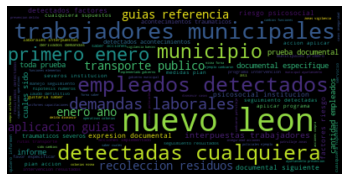

In [14]:
import streamlit as st
from wordcloud import WordCloud
import matplotlib.pyplot as plt
veracruz_data = clean_data_df[clean_data_df['state'] == 'Nuevo León']
veracruz_data_03_2020 = veracruz_data[veracruz_data['month-year'] == '02-2021']

# Create some sample text
text = concat_text(veracruz_data_03_2020['clean_request'])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
from pprint import pprint
# number of topics
import gensim.corpora as corpora

def generate_model(data_source):
    try:
        # Create Dictionary
        data_words = list(data_source.apply(lambda x: x.split()))
        id2word = corpora.Dictionary(data_words)
        # Create Corpus
        texts = data_words
        # Term Document Frequency
        corpus = [id2word.doc2bow(text) for text in texts]
        # View
        print(corpus[:1][0][:30])
        num_topics = 6
        # Build LDA model
        return gensim.models.LdaMulticore(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics)
    except:
        return None

In [16]:
from pprint import pprint
# number of topics
import gensim.corpora as corpora


# Create Dictionary
data_words = list(veracruz_data_03_2020['clean_request'].apply(lambda x: x.split()))
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])
num_topics = 6
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

adding document #0 to Dictionary(0 unique tokens: [])
built Dictionary(892 unique tokens: ['acciones', 'ayuntamiento', 'bancos', 'cambiaron', 'cambios']...) from 76 documents (total 4422 corpus positions)
using symmetric alpha at 0.16666666666666666
using symmetric eta at 0.16666666666666666
using serial LDA version on this node
running online LDA training, 6 topics, 1 passes over the supplied corpus of 76 documents, updating every 22000 documents, evaluating every ~76 documents, iterating 50x with a convergence threshold of 0.001000
too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
training LDA model using 11 processes


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1)]


PROGRESS: pass 0, dispatched chunk #0 = documents up to #76/76, outstanding queue size 1
topic #0 (0.167): 0.010*"nuevo" + 0.010*"salud" + 0.009*"leon" + 0.009*"acciones" + 0.008*"municipio" + 0.007*"publico" + 0.007*"saber" + 0.006*"localidad" + 0.006*"quiero" + 0.006*"transporte"
topic #5 (0.167): 0.016*"resultados" + 0.015*"aplicacion" + 0.015*"institucion" + 0.014*"nom" + 0.014*"detectadas" + 0.013*"empleados" + 0.012*"cualquiera" + 0.012*"seguimiento" + 0.012*"cantidad" + 0.012*"guias"
topic #2 (0.167): 0.024*"municipio" + 0.014*"transporte" + 0.014*"publico" + 0.012*"nuevo" + 0.011*"quiero" + 0.010*"leon" + 0.010*"residuos" + 0.009*"programa" + 0.008*"envien" + 0.007*"enero"
topic #4 (0.167): 0.012*"trabajadores" + 0.010*"municipio" + 0.009*"nuevo" + 0.008*"mes" + 0.008*"monto" + 0.008*"salud" + 0.007*"leon" + 0.006*"servicios" + 0.006*"marzo" + 0.006*"ano"
topic #1 (0.167): 0.018*"trabajadores" + 0.014*"municipales" + 0.014*"nuevo" + 0.013*"area" + 0.012*"informe" + 0.012*"deman

[(0,
  '0.010*"nuevo" + 0.010*"salud" + 0.009*"leon" + 0.009*"acciones" + '
  '0.008*"municipio" + 0.007*"publico" + 0.007*"saber" + 0.006*"localidad" + '
  '0.006*"quiero" + 0.006*"transporte"'),
 (1,
  '0.018*"trabajadores" + 0.014*"municipales" + 0.014*"nuevo" + 0.013*"area" + '
  '0.012*"informe" + 0.012*"demandas" + 0.011*"laborales" + '
  '0.011*"interpuestas" + 0.010*"primero" + 0.010*"ayuntamiento"'),
 (2,
  '0.024*"municipio" + 0.014*"transporte" + 0.014*"publico" + 0.012*"nuevo" + '
  '0.011*"quiero" + 0.010*"leon" + 0.010*"residuos" + 0.009*"programa" + '
  '0.008*"envien" + 0.007*"enero"'),
 (3,
  '0.015*"enero" + 0.011*"acciones" + 0.010*"nuevo" + 0.010*"saber" + '
  '0.010*"informe" + 0.009*"trabajadores" + 0.009*"ano" + 0.009*"ayuntamiento" '
  '+ 0.008*"contingencia" + 0.008*"virus"'),
 (4,
  '0.012*"trabajadores" + 0.010*"municipio" + 0.009*"nuevo" + 0.008*"mes" + '
  '0.008*"monto" + 0.008*"salud" + 0.007*"leon" + 0.006*"servicios" + '
  '0.006*"marzo" + 0.006*"ano"')

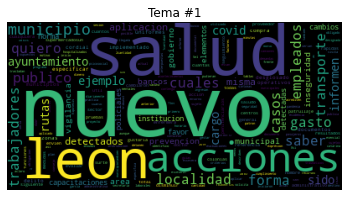

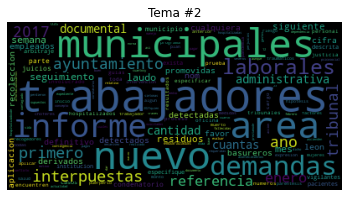

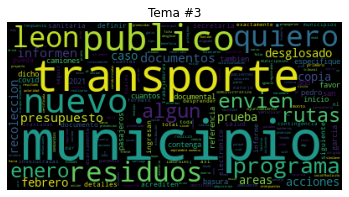

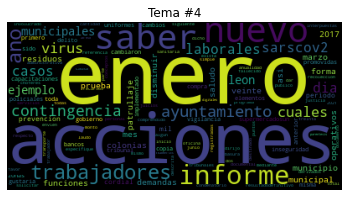

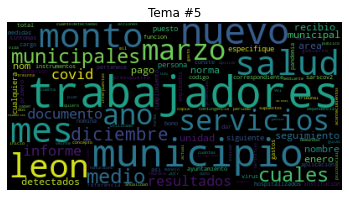

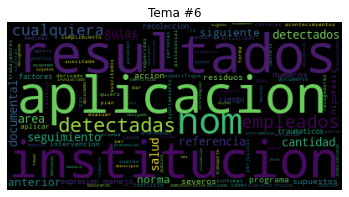

In [32]:
import matplotlib.pyplot as plt
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Tema #" + str(t+1))
    plt.show()

In [21]:
pickle.dump(lda_model, open('lda_pick.rb', 'wb'))

In [22]:
lda_model_pickle =pickle.load(open('lda_pick.rb', 'rb'))

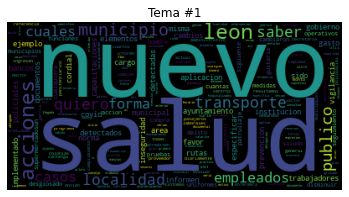

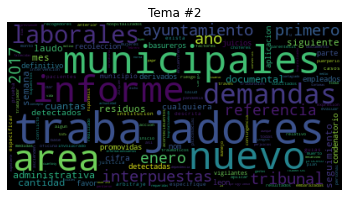

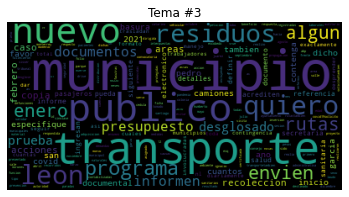

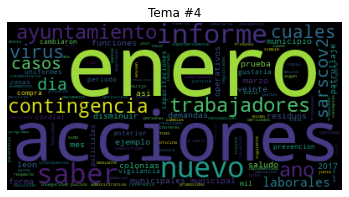

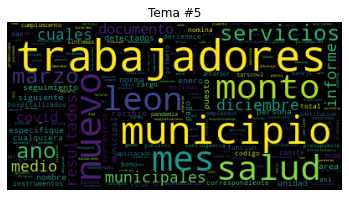

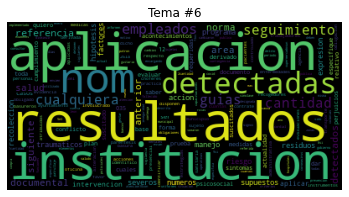

In [23]:
import matplotlib.pyplot as plt
for t in range(lda_model_pickle.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model_pickle.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Tema #" + str(t+1))
    plt.show()

In [42]:
lda_model.num_topics

6

In [25]:
pickle.dump(output_data_base, open('data/output_data_base.pl', 'wb'))

In [26]:
import os

In [30]:
for key in list(output_data_base.keys()):
    os.mkdir(f'source_data/{key.lower()}')
    for datef in list(output_data_base[key].keys()):
        pickle.dump(output_data_base[key][datef], open(f'source_data/{key.lower()}/{datef}.source', 'wb'))